# Imports 

In [1]:
import ROOT as rt
import csv
import re
import sys
import collections
from collections import OrderedDict
import uproot
import numpy as np
import time
import numba
from numba import jit
from matplotlib import pyplot as plt
from numpy import linalg as LA
from ROOT import TLorentzVector
from array import array
# import PyTEX
import os

import math
import random
from optparse import OptionParser

sys.path.append('/storage/user/jmao/gpu/jmao/cms-llp/delayed_jet_analyzer/lib/')

from histo_utilities import create_TH1D, create_TH2D, create_TGraph,std_color_list, make_ratio_plot

import CMS_lumi, tdrstyle 
tdrstyle.setTDRStyle()
CMS_lumi.writeExtraText = 1
CMS_lumi.extraText = "     Simulation Preliminary"

     
print(sys.version)

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
import pandas as pd
import pickle as pickle
import shlex
import uproot
import seaborn as sns

from scipy.spatial.distance import cdist
from collections import Counter 
import datetime
import pytz

from prettytable import PrettyTable
from pyjet import cluster

import xgboost as xgb
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from xgboost import XGBClassifier

from itertools import chain 

Welcome to JupyROOT 6.22/02
3.6.8 (default, Apr  2 2020, 13:34:55) 
[GCC 4.8.5 20150623 (Red Hat 4.8.5-39)]


In [14]:
# root settings
rt.gROOT.SetBatch(True)
rt.gStyle.SetOptStat(0)
rt.gStyle.SetOptFit(111)
rt.gStyle.SetPaintTextFormat("2.1f")

# plt.rcParams["font.family"] = "Arial"
plt.rcParams["axes.unicode_minus"] = False
plt.rcParams["text.usetex"] = False
plt.rcParams["mathtext.fontset"] = "cm"

# test_name = 'xgb_HH_vs_QCD_ebBDT'

lumi_sf_sig = 137.0 # scale lumi from sample to full run2
lumi_sf_bkg = 137.0

#output dir
 
# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20200612/'
# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20201022/2018/'
# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20201102/2018/'
# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20201103/2018/all/'
# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20201104/2018/all/'
# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20201104/2018/1lep/'
# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20201112/2018/cut_based/'
# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20201109/2018/cut_based/'
# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20201109/2018/dnn_based/'
# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20201112/2018/dnn_based/'
# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20201112/2018/dnn_com/'
# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20201112/2018/dnn_com_pts/'
# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20201112/2018/dnn_com_pts/'
# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20201117/2018/dnn_based/'
# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20201117/2018/dnn_based_NoHcal/'
# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20201121/2018_sigmatch/dnn_based_NoHcal/'
# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20201121/2018_sigmatch/cut_based_NoHcal/'
# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20201121/2018_sigmatch/cut_based_Hcal/'
# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20201121/2018_sigmatch/dnn_based_Hcal/'
# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20201121/2018_sigmatch/dnn_based_NoHcal/'
# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20201121/2018_sigmatch/roc_study/'
# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20201128/2018_sigmatch/ef_study/'
# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20201128/2018_sigmatch/ef_num_study/'
# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20201128/2018_sigmatch/withef_jet/'
# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20201128/2018_sigmatch/withef_ht_jet/'
# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20201205/2018_sigmatch/var_plots/'
# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20201205/2018_sigmatch/dnn_v2/'
# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20201205/2018_no_sigmatch/dnn_v2/dnn_v1nosi_v2/'
# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20201205/2018_no_sigmatch/dnn_v2/dnn_v1nosi_v2/simplifiedplots/'
# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20201205/2018_no_sigmatch/dnn_v3/dnn_v1nosi_v2_v3/simplifiedplots/'
# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20201205/2018_sigeff/dnn_v3/'
# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20201205/2018_sigmatch/dnn_v3_1lep/'
# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20210131/2018_sigmatch/dnn_v3_0lep/'
# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20210131/2018_sigmatch/dnn_v3_1lep/'
plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20210131/2018_sigmatch/dnn_v3_0lep_roc/'
# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20201205/2018_wjet_sync/dnn_v2/'
# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20201205/2018_no_sigmatch/ht100_dnn_v2/'
# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20201205/2018_sigmatch/pre_cuts_trial/no_ef/'
# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20201205/2018_sigmatch/pre_cuts_trial/ht100_with_ef/'
# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20201205/2018_sigmatch/pre_cuts_trial/mdphi0p5_ht100_with_ef/'

os.system("mkdir -p "+ plotDir)

0

In [3]:
# std_color_list = [1, 2, 4, 8, 6, 28, 43, 7, 25, 36]
std_color_list_ext = [1, 2, 4, 8, 6, 28, 43, 7, 25, 36, 221, 205, 209]


# ALL BKG TAG EFF

In [4]:
tags = []
tags = [
    
        'H(bb)H(bb), 400 GeV, 1 GeV, 1 m',
        'H(bb)H(bb), 200 GeV, 1 GeV, 1 m',
#         'QCD_HT_all, background',
#         'WLNu_HT_all, background',
#         'ZNunu_HT_all, background',
#         'TT_Lep, background',

        'Data 2018',
    
#         'WLNu_HT_bin, background',
#         'WLNu_no_bin, background',
    
        ]


# directory
home_dir = '/mnt/hadoop/store/group/phys_exotica/delayedjets/displacedJetTimingAnalyzer/'
# file names

fnames = {}

# fnames['H(bb)H(bb), 200 GeV, 1 GeV, 1 m'] = 'V1p17/v24/MC_Fall18/1pb_normalized/n3n2-n1-hbb-hbb_mh200_pl1000_ev100000_1pb_weighted.root'
# fnames['H(bb)H(bb), 400 GeV, 1 GeV, 1 m'] = 'V1p17/v24/MC_Fall18/1pb_normalized/TChiHH_mass400_pl1000_1pb_weighted.root'
fnames['H(bb)H(bb), 400 GeV, 1 GeV, 1 m'] = 'V1p17/v28/MC_Fall18/normalized/TChiHH_mass400_pl1000_1pb_weighted.root'
fnames['H(bb)H(bb), 200 GeV, 1 GeV, 1 m'] = 'V1p17/v28/MC_Fall18/normalized/n3n2-n1-hbb-hbb_mh200_pl1000_ev100000_1pb_weighted.root'
fnames['QCD_HT_all, background'] = 'V1p17/v28/MC_Fall18/normalized/QCD_HT50toInf_TuneCP5_13TeV-madgraphMLM-pythia8_1pb_weighted.root'
fnames['WLNu_HT_all, background'] = 'V1p17/v28/MC_Fall18/normalized/WJetsToLNu_HT-70ToInf_TuneCP5_13TeV-madgraphMLM-pythia8_1pb_weighted.root'
fnames['ZNunu_HT_all, background'] = 'V1p17/v28/MC_Fall18/normalized/ZJetsToNuNu_HT-100ToInf_13TeV-madgraph_1pb_weighted.root'
fnames['TT_Lep, background'] = 'V1p17/v28/MC_Fall18/normalized/TTJets_TuneCP5_13TeV-madgraphMLM-pythia8_1pb_weighted.root'
fnames['Data 2018'] = 'V1p17/v28/Data2018/normalized/Run2_displacedJetMuonNtupler_V1p17_Data2018_Run2018-HighMET-17Sept2018_GoodLumi.root'

fnames['WLNu_HT_bin, background'] = 'V1p17/v24/MC_Fall18/normalized/output_wjet_htbinned.root'
fnames['WLNu_no_bin, background'] = 'V1p17/v24/MC_Fall18/normalized/output_wjet_nobinned.root'

# get all the trees
tree = OrderedDict()

for tag in tags:
    print(home_dir+fnames[tag])

    root_dir = uproot.open(home_dir+fnames[tag])
    tree[tag] = root_dir['SusyLLPTree']

    print ('Open ready')
    print(tag)
    print ('Tree ready')
    print(tree[tag], tree)
    v = tree[tag]
    jet_amax = v['jetGammaMax_ET'].array()
    print(jet_amax[:10])
    jet_amax = v['weight'].array()
    print(jet_amax[:10])
    print(np.unique(jet_amax))
     


/mnt/hadoop/store/group/phys_exotica/delayedjets/displacedJetTimingAnalyzer/V1p17/v28/MC_Fall18/normalized/TChiHH_mass400_pl1000_1pb_weighted.root
Open ready
H(bb)H(bb), 400 GeV, 1 GeV, 1 m
Tree ready
<TTree b'SusyLLPTree' at 0x7f03d5147208> OrderedDict([('H(bb)H(bb), 400 GeV, 1 GeV, 1 m', <TTree b'SusyLLPTree' at 0x7f03d5147208>)])
[[0.006665523 0.025485883 0.28382292 0.4459743] [0.0048089516 0.10799442 0.0] [0.39120468 0.5953183 0.013048594 0.020009799] ... [0.52904016] [0.0082370015 0.18832195 0.37373966] [0.25207704 0.012067724 0.0]]
[6.0883906e-08 6.0883906e-08 6.0883906e-08 6.0883906e-08 6.0883906e-08
 6.0883906e-08 6.0883906e-08 6.0883906e-08 6.0883906e-08 6.0883906e-08]
[6.0883906e-08]
/mnt/hadoop/store/group/phys_exotica/delayedjets/displacedJetTimingAnalyzer/V1p17/v28/MC_Fall18/normalized/n3n2-n1-hbb-hbb_mh200_pl1000_ev100000_1pb_weighted.root
Open ready
H(bb)H(bb), 200 GeV, 1 GeV, 1 m
Tree ready
<TTree b'SusyLLPTree' at 0x7f03c92e4358> OrderedDict([('H(bb)H(bb), 400 GeV, 1 G

# Test/Debug Plot

In [15]:
# trg_path=310
trg_path=467
njet_cut=-1
met_cut=200
mt_cut=100
ht_cut=100
mdphi_cut=0.5
veto=1

# jet_eta_cut=2.4
jet_eta_cut=1.48
jet_pt_cut=30
# fatjet_pt_cut=30
jet_time_cut=-1
jet_phoef_cut=0.8
jet_muef_cut=0.6
jet_eleef_cut=0.6


trg_jet_met = {}
trg_jet_nj = {}
trg_jet_mt = {}
trg_jet_ht = {}
trg_jet_mdphi = {}
trg_jet_w = {} 
trg_jet_puw = {} 

trg_jet_dnnv1 = {}
trg_jet_dnnv3 = {}
trg_jet_dnn = {}
trg_jet_pt = {}
trg_jet_eta = {}
trg_jet_e = {}
trg_jet_phi = {}

trg_jet_nhcalhit = {}
trg_jet_hcalt = {}

trg_jet_chef = {}
trg_jet_muef = {}
trg_jet_eleef = {}
trg_jet_phoef = {}

trg_jet_nhef = {}
trg_jet_cemef = {}
trg_jet_nemef = {}

trg_jet_tmf = {}
trg_jet_dr = {}
trg_jet_time = {}

trg_jet_csv = {}

trg_jet_chm = {}
trg_jet_nseltrk = {}
trg_jet_ecale = {}
trg_jet_nhits = {}
trg_jet_alltrkpt = {}
trg_jet_pvtrkpt = {}
trg_jet_amax = {}
trg_jet_bmax = {}
trg_jet_gmax = {}
trg_jet_gmaxem = {}
trg_jet_gmaxh = {}
trg_jet_drall = {}



jet_csv_cut=0.5803
trg_jet_csvl = {}
trg_jet_nb = {}


for k,v in tree.items():
    print(k,v)

    # branches
    evt = v['evtNum'].array()
    met = v['met'].array()
    mt = v['MT'].array()
    ht = v['HT'].array()
#     mdphi = v['jetMet_dPhi'].array()
    mdphi = v['jetMet_dPhiMin'].array()
    hlt = v['HLTDecision'].array()[:,trg_path]
    nj = v['nJets'].array()
    nlep = v['nLeptons'].array()
    nmu = v['nMuons'].array()
    nele = v['nElectrons'].array()
    ntau = v['nTaus'].array()
    npho = v['nPhotons'].array()
    
    #flags
    flag1 =  v['Flag2_globalSuperTightHalo2016Filter'].array()
#     flag2 =  v['Flag2_globalTightHalo2016Filter'].array() 
#     flag3 =  v['Flag2_goodVertices'].array()
#     flag4 =  v['Flag2_BadChargedCandidateFilter'].array() 
    flag5 =  v['Flag2_BadPFMuonFilter'].array() 
    flag6 =  v['Flag2_EcalDeadCellTriggerPrimitiveFilter'].array() 
    flag7 =  v['Flag2_HBHENoiseFilter'].array() 
    flag8 =  v['Flag2_HBHEIsoNoiseFilter'].array() 
    flag9 =  v['Flag2_ecalBadCalibFilter'].array() 
    flag10 =  v['Flag2_eeBadScFilter'].array() 
    
    nhcalhit = v['jetNRecHitsHcal'].array()
    hcalt = v['jetTimeRecHitsHcal'].array()
    
    #jet var
    pt = v['jetPt'].array()
    eta = v['jetEta'].array()
    e = v['jetE'].array()
    phi = v['jetPhi'].array()
    
#     chef = v['jetChargedHadronEnergyFraction'].array()
    muef = v['jetMuonEnergyFraction'].array()
#     eleef = v['jetElectronEnergyFraction'].array()
#     phoef = v['jetPhotonEnergyFraction'].array()
    
#     nhef = v['jetNeutralHadronEnergyFraction'].array()
#     cemef = v['jetNeutralEMEnergyFraction'].array()
#     nemef = v['jetNeutralEMEnergyFraction'].array()
 
#     tmf = v['jetGammaMax_ET'].array()
#     dr = v['jetMinDeltaRPVTracks'].array()
#     time = v['jetTime'].array()
    
    csv = v['jetCSV'].array()
    
    dnnv1 = v['jetDNNScoreV1'].array()
    dnnv3 = v['jetDNNScoreV3'].array()
    dnn = v['jetDNNScore'].array()
    
#     chem = v['jetChargedHadronMultiplicity'].array()
#     eleem = v['jetElectronMultiplicity'].array()
#     muem = v['jetMuonMultiplicity'].array()

    chm = v['jetChargedMultiplicity'].array()
    nseltrk = v['jetNSelectedTracks'].array()
    time = v['jetTime'].array()
    ecale = v['jetEnergyRecHitsEcal'].array()
    nhits = v['jetNRecHitsEcal'].array()
    chef = v['jetChargedHadronEnergyFraction'].array()
#     nhef = v['jetNeutalHadronEnergyFraction'].array()
    eleef = v['jetElectronEnergyFraction'].array()
    phoef = v['jetPhotonEnergyFraction'].array()
    alltrkpt = v['jetPtAllTracks'].array()
    pvtrkpt = v['jetPtAllPVTracks'].array()
    amax = v['jetAlphaMax'].array()
    bmax = v['jetBetaMax'].array()
    gmax = v['jetGammaMax'].array()
    gmaxem = v['jetGammaMax_EM'].array()
    gmaxh = v['jetGammaMax_Hadronic'].array()
    tmf = v['jetGammaMax_ET'].array()
    drall = v['jetMinDeltaRAllTracks'].array()
    dr = v['jetMinDeltaRPVTracks'].array()

    weight = v['weight'].array()
    
    #pileup weights
    if 'background' in k:
        PUweight = v['pileupWeight'].array()
        
    
    print(weight.shape)
    
    #selection
    
    sel_hlt_triggered = 1
    sel_hlt_str  = np.logical_and(sel_hlt_triggered, hlt)
    
    sel_flag_str = np.logical_and(flag1, flag5)
    sel_flag_str = np.logical_and(sel_flag_str, flag6)
    sel_flag_str = np.logical_and(sel_flag_str, flag7)
    sel_flag_str = np.logical_and(sel_flag_str, flag8)
    sel_flag_str = np.logical_and(sel_flag_str, flag9)
    if 'Data' in k:
        sel_flag_str = np.logical_and(sel_flag_str, flag10)
        


    basic_met_str = np.logical_and(nj>njet_cut, met>met_cut)    
    basic_met_str = np.logical_and(basic_met_str, pt.count()>njet_cut)
#     basic_met_str = np.logical_and(basic_met_str, ht>ht_cut)
    if 'bb' not in k:
#         basic_met_str = np.logical_and(basic_met_str, nlep==1)
        basic_met_str = np.logical_and(basic_met_str, nlep==0)
#     basic_met_str = np.logical_and(basic_met_str, mt<mt_cut)
    if 'background' in k:
        basic_met_str = np.logical_and(basic_met_str, evt%2==1)
        
    
    if veto==1:
#         basic_met_str = np.logical_and(basic_met_str, nmu==0)
#         basic_met_str = np.logical_and(basic_met_str, nele==0)
        basic_met_str = np.logical_and(basic_met_str, ntau==0)
        basic_met_str = np.logical_and(basic_met_str, npho==0)
    
    basic_jet_str = np.logical_and(abs(eta)<jet_eta_cut, pt>jet_pt_cut)   
    basic_jet_str = np.logical_and(basic_jet_str, time>jet_time_cut)   
    basic_jet_str = np.logical_and(basic_jet_str, phoef<jet_phoef_cut)   
    basic_jet_str = np.logical_and(basic_jet_str, muef<jet_muef_cut)   
    basic_jet_str = np.logical_and(basic_jet_str, eleef<jet_eleef_cut) 
#     basic_jet_str = np.logical_and(basic_jet_str, nhcalhit>0)   
#     basic_jet_str = np.logical_and(basic_jet_str, hcalt>-100)   

    # matched requirement
    if 'bb' in k:
        matched0 = v['jet_matched_gLLP0_grandaughter'].array()
        matched1 = v['jet_matched_gLLP1_grandaughter'].array()

        matched_str = np.logical_or(matched0==1, matched1==1)
        
        acc0_eb = v['gLLP0_EB'].array()
        acc1_eb = v['gLLP1_EB'].array()

        acc_eb_str = np.logical_or(acc0_eb==1, acc1_eb==1)
        
        basic_met_str = np.logical_and(basic_met_str, acc_eb_str)

        basic_jet_str = np.logical_and(basic_jet_str, matched_str)

    met_trg_str = np.logical_and(basic_met_str, sel_hlt_str)
    met_trg_str = np.logical_and(basic_met_str, sel_flag_str)
#     met_trg_str = np.logical_and(basic_met_str, mdphi>mdphi_cut)
#     met_trg_str = np.logical_and(basic_met_str, mdphi<=mdphi_cut)
    
#   sel 
#     trg_jet_met[k] = met
#     trg_jet_nj[k] = nj 
#     trg_jet_w[k] = weight 
# #     trg_jet_mt[k] = mt
#     trg_jet_ht[k] = ht
#     trg_jet_mdphi[k] = mdphi
    
#     trg_jet_pt[k] = pt
#     trg_jet_eta[k] = eta
#     trg_jet_e[k] = e
#     trg_jet_phi[k] = phi
#     trg_jet_chef[k] = chef
#     trg_jet_nhef[k] = nhef
#     trg_jet_cemef[k] = cemef
#     trg_jet_nemef[k] = nemef
    
    #apply sel
    trg_jet_met[k] = met[met_trg_str]
    trg_jet_ht[k] = ht[met_trg_str]
    trg_jet_mdphi[k] = mdphi[met_trg_str]
    trg_jet_nj[k] = nj[met_trg_str]
    trg_jet_w[k] = weight[met_trg_str]
    if 'background' in k:
        trg_jet_puw[k] = PUweight[met_trg_str]
        

    trg_jet_pt[k] = pt[basic_jet_str][met_trg_str]
    trg_jet_phi[k] = phi[basic_jet_str][met_trg_str]
    trg_jet_eta[k] = eta[basic_jet_str][met_trg_str]
    trg_jet_e[k] = e[basic_jet_str][met_trg_str]

#     trg_jet_nhm[k] = nhm[basic_jet_str][met_trg_str]
#     trg_jet_chm[k] = chm[basic_jet_str][met_trg_str]
#     trg_jet_mum[k] = mum[basic_jet_str][met_trg_str]
#     trg_jet_elem[k] = elem[basic_jet_str][met_trg_str]
#     trg_jet_phom[k] = phom[basic_jet_str][met_trg_str]
    
#     trg_jet_nhef[k] = nhef[basic_jet_str][met_trg_str]
    trg_jet_chef[k] = chef[basic_jet_str][met_trg_str]
    trg_jet_muef[k] = muef[basic_jet_str][met_trg_str]
    trg_jet_eleef[k] = eleef[basic_jet_str][met_trg_str]
    trg_jet_phoef[k] = phoef[basic_jet_str][met_trg_str]
    
#     trg_jet_csv[k] = csv[basic_jet_str][met_trg_str]
    
#     trg_jet_nrec[k] = nrec[basic_jet_str][met_trg_str]
    trg_jet_time[k] = time[basic_jet_str][met_trg_str]
    trg_jet_dr[k] = dr[basic_jet_str][met_trg_str]
    trg_jet_tmf[k] = tmf[basic_jet_str][met_trg_str]
#     trg_jet_amax[k] = amax[basic_jet_str][met_trg_str]

    trg_jet_csv[k] = csv[basic_jet_str][met_trg_str]
    
    trg_jet_chm[k] = chm[basic_jet_str][met_trg_str]
    trg_jet_nseltrk[k] = nseltrk[basic_jet_str][met_trg_str]
    trg_jet_ecale[k] = ecale[basic_jet_str][met_trg_str]
    trg_jet_nhits[k] = nhits[basic_jet_str][met_trg_str]
    trg_jet_alltrkpt[k] = alltrkpt[basic_jet_str][met_trg_str]
    trg_jet_pvtrkpt[k] = pvtrkpt[basic_jet_str][met_trg_str]
    trg_jet_amax[k] = amax[basic_jet_str][met_trg_str]
    trg_jet_bmax[k] = bmax[basic_jet_str][met_trg_str]
    trg_jet_gmax[k] = gmax[basic_jet_str][met_trg_str]
    trg_jet_gmaxem[k] = gmaxem[basic_jet_str][met_trg_str]
    trg_jet_gmaxh[k] = gmaxh[basic_jet_str][met_trg_str]
    trg_jet_drall[k] = drall[basic_jet_str][met_trg_str]
    
    trg_jet_dnnv3[k] = dnnv3[basic_jet_str][met_trg_str]
    trg_jet_dnnv1[k] = dnnv1[basic_jet_str][met_trg_str]
    trg_jet_dnn[k] = dnn[basic_jet_str][met_trg_str]
    trg_jet_nhcalhit[k] = nhcalhit[basic_jet_str][met_trg_str]
    trg_jet_hcalt[k] = hcalt[basic_jet_str][met_trg_str]
   


    #clean up
    trg_jet_met[k] = trg_jet_met[k][trg_jet_pt[k].count()>njet_cut]
    trg_jet_ht[k] = trg_jet_ht[k][trg_jet_pt[k].count()>njet_cut]
    trg_jet_mdphi[k] = trg_jet_mdphi[k][trg_jet_pt[k].count()>njet_cut]
    trg_jet_nj[k] = trg_jet_nj[k][trg_jet_pt[k].count()>njet_cut]
    trg_jet_w[k] = trg_jet_w[k][trg_jet_pt[k].count()>njet_cut]
    if 'background' in k:
        trg_jet_w[k] = np.array([2*x for x in trg_jet_w[k]])
    if 'background' in k:
        trg_jet_puw[k] = trg_jet_puw[k][trg_jet_pt[k].count()>njet_cut]

    trg_jet_phi[k] = trg_jet_phi[k][trg_jet_pt[k].count()>njet_cut]
    trg_jet_eta[k] = trg_jet_eta[k][trg_jet_pt[k].count()>njet_cut]
    trg_jet_e[k] = trg_jet_e[k][trg_jet_pt[k].count()>njet_cut]

#     trg_jet_nhm[k] = trg_jet_nhm[k][trg_jet_pt[k].count()>njet_cut]
#     trg_jet_chm[k] = trg_jet_chm[k][trg_jet_pt[k].count()>njet_cut]
#     trg_jet_mum[k] = trg_jet_mum[k][trg_jet_pt[k].count()>njet_cut]
#     trg_jet_elem[k] = trg_jet_elem[k][trg_jet_pt[k].count()>njet_cut]
#     trg_jet_phom[k] = trg_jet_phom[k][trg_jet_pt[k].count()>njet_cut]
    
#     trg_jet_nhef[k] = trg_jet_nhef[k][trg_jet_pt[k].count()>njet_cut]
    trg_jet_chef[k] = trg_jet_chef[k][trg_jet_pt[k].count()>njet_cut]
    trg_jet_muef[k] = trg_jet_muef[k][trg_jet_pt[k].count()>njet_cut]
    trg_jet_eleef[k] = trg_jet_eleef[k][trg_jet_pt[k].count()>njet_cut]
    trg_jet_phoef[k] = trg_jet_phoef[k][trg_jet_pt[k].count()>njet_cut]
    
#     trg_jet_csv[k] = trg_jet_csv[k][trg_jet_pt[k].count()>njet_cut]
    
#     trg_jet_nrec[k] = trg_jet_nrec[k][trg_jet_pt[k].count()>njet_cut]
    trg_jet_time[k] = trg_jet_time[k][trg_jet_pt[k].count()>njet_cut]
    trg_jet_dr[k] = trg_jet_dr[k][trg_jet_pt[k].count()>njet_cut]
    trg_jet_tmf[k] = trg_jet_tmf[k][trg_jet_pt[k].count()>njet_cut]
    trg_jet_amax[k] = trg_jet_amax[k][trg_jet_pt[k].count()>njet_cut]
    trg_jet_bmax[k] = trg_jet_bmax[k][trg_jet_pt[k].count()>njet_cut]
    trg_jet_gmax[k] = trg_jet_gmax[k][trg_jet_pt[k].count()>njet_cut]
    trg_jet_gmaxem[k] = trg_jet_gmaxem[k][trg_jet_pt[k].count()>njet_cut]
    trg_jet_gmaxh[k] = trg_jet_gmaxh[k][trg_jet_pt[k].count()>njet_cut]

    trg_jet_csv[k] = trg_jet_csv[k][trg_jet_pt[k].count()>njet_cut]
    trg_jet_csvl[k] = trg_jet_csv[k][trg_jet_csv[k]>jet_csv_cut]
    trg_jet_nb[k] = trg_jet_csvl[k].count()
    
    trg_jet_chm[k] = trg_jet_chm[k][trg_jet_pt[k].count()>njet_cut]
    trg_jet_nseltrk[k] = trg_jet_nseltrk[k][trg_jet_pt[k].count()>njet_cut]
    trg_jet_ecale[k] = trg_jet_ecale[k][trg_jet_pt[k].count()>njet_cut]
    trg_jet_nhits[k] = trg_jet_nhits[k][trg_jet_pt[k].count()>njet_cut]
    trg_jet_alltrkpt[k] = trg_jet_alltrkpt[k][trg_jet_pt[k].count()>njet_cut]
    trg_jet_pvtrkpt[k] = trg_jet_pvtrkpt[k][trg_jet_pt[k].count()>njet_cut]
    trg_jet_drall[k] = trg_jet_drall[k][trg_jet_pt[k].count()>njet_cut]
    
 
    trg_jet_dnnv1[k] = trg_jet_dnnv1[k][trg_jet_pt[k].count()>njet_cut]
    trg_jet_dnnv3[k] = trg_jet_dnnv3[k][trg_jet_pt[k].count()>njet_cut]
    trg_jet_dnn[k] = trg_jet_dnn[k][trg_jet_pt[k].count()>njet_cut]
    trg_jet_nhcalhit[k] = trg_jet_nhcalhit[k][trg_jet_pt[k].count()>njet_cut]
    trg_jet_hcalt[k] = trg_jet_hcalt[k][trg_jet_pt[k].count()>njet_cut]
    
    trg_jet_pt[k] = trg_jet_pt[k][trg_jet_pt[k].count()>njet_cut]

    #print out check


    print(len(trg_jet_w[k]))
    print(len(trg_jet_pt[k]))

    

H(bb)H(bb), 400 GeV, 1 GeV, 1 m <TTree b'SusyLLPTree' at 0x7f03d5147208>
(134019,)
80904
80904
H(bb)H(bb), 200 GeV, 1 GeV, 1 m <TTree b'SusyLLPTree' at 0x7f03c92e4358>
(3502,)
2029
2029
Data 2018 <TTree b'SusyLLPTree' at 0x7f03c884f9e8>
(8428507,)
6518119
6518119


In [ ]:
wall = {}
jetall = {}
tall = {}
phoefall = {}
muefall = {}
eleefall = {}
for k,v in tree.items():
    wall[k] = [np.array([x]*len(y)) for x,y in zip(trg_jet_w[k],trg_jet_pt[k])]
    wall[k] = list(chain.from_iterable(wall[k])) 
    jetall[k] = trg_jet_pt[k].flatten()
    tall[k] = trg_jet_time[k].flatten()
    phoefall[k] = trg_jet_phoef[k].flatten()
    muefall[k] = trg_jet_muef[k].flatten()
    eleefall[k] = trg_jet_eleef[k].flatten()
#     print(np.sum(trg_jet_w[k]))    
    print(len(trg_jet_w[k]))
    print(len(trg_jet_pt[k]))
    print(len(jetall[k]))
    print(len(wall[k]))
    sel1_str = np.logical_and(jetall[k]>jet_pt_cut, tall[k]>jet_time_cut)   
    sel2_str = np.logical_and(sel1_str, phoefall[k]<jet_phoef_cut)   
    sel2_str = np.logical_and(sel2_str, muefall[k]<jet_muef_cut)   
    sel2_str = np.logical_and(sel2_str, eleefall[k]<jet_eleef_cut) 
    

In [28]:
from prettytable import PrettyTable
print('\n\n======================= Summary ==============================')
table =  PrettyTable(['Sample', 'Den', 'Time cut','Ratio 1', 'Plus EF cut', ' Ratio 2'])
for k,v in tree.items():
    idx=6
#     print(len(jetall[k]))
#     print(len(jetall[k][sel1_str]))
#     print(len(jetall[k][sel2_str]))
    row = [k, len(wall[k]), len(jetall[k][sel1_str]), round (len(jetall[k][sel1_str])/len(jetall[k]), idx) , len(jetall[k][sel2_str]), round (len(jetall[k][sel2_str])/len(jetall[k]), idx) ,]
    table.add_row(row)
        
print(table)



======================= Summary ==============================
+---------------------------------+------+----------+----------+-------------+----------+
|              Sample             | Den  | Time cut | Ratio 1  | Plus EF cut |  Ratio 2 |
+---------------------------------+------+----------+----------+-------------+----------+
| H(bb)H(bb), 200 GeV, 1 GeV, 1 m | 2452 |   2272   | 0.926591 |     2190    | 0.893148 |
+---------------------------------+------+----------+----------+-------------+----------+


In [29]:
table_txt = table.get_string()
with open(plotDir+'/TagEffTable.txt','w') as file:
    file.write(table_txt)

In [6]:
variables = [
 
    
        ['minDeltaPhi', trg_jet_mdphi, 50, 0, 3.15],
        ['HT', trg_jet_ht, 200, 0, 2000],
#         ['HT', trg_jet_ht, 40, 0, 2000],
        ['MET', trg_jet_met, 200, 0, 2000],
#         ['MET', trg_jet_met, 20, 0, 2000],
        ['nJets', trg_jet_nj, 20, 0, 20],
    
    
]

var/x_axis minDeltaPhi binning 50 0 3.15
QCD_HT_all, background 178139
WLNu_HT_all, background 1611925
TT_Lep, background 2534562
ZNunu_HT_all, background 3970700
H(bb)H(bb), 200 GeV, 1 GeV, 1 m factor 0.08935743659086975
H(bb)H(bb), 200 GeV, 1 GeV, 1 m 1
cnt H(bb)H(bb), 200 GeV, 1 GeV, 1 m 0 0.0
H(bb)H(bb), 400 GeV, 1 GeV, 1 m factor 0.03231566268800055
H(bb)H(bb), 400 GeV, 1 GeV, 1 m 2
cnt H(bb)H(bb), 400 GeV, 1 GeV, 1 m 0 0.0
Data 2018 1
total 0.0 0.0
59.74 fb^{-1} (13 TeV)
var/x_axis HT binning 200 0 2000
QCD_HT_all, background 178139
WLNu_HT_all, background 1611925
TT_Lep, background 2534562
ZNunu_HT_all, background 3970700
H(bb)H(bb), 200 GeV, 1 GeV, 1 m factor 1.0
H(bb)H(bb), 200 GeV, 1 GeV, 1 m 1
cnt H(bb)H(bb), 200 GeV, 1 GeV, 1 m 0 0.0
H(bb)H(bb), 400 GeV, 1 GeV, 1 m factor 1.0
H(bb)H(bb), 400 GeV, 1 GeV, 1 m 2
cnt H(bb)H(bb), 400 GeV, 1 GeV, 1 m 0 0.0
Data 2018 1
total 0.0 0.0
59.74 fb^{-1} (13 TeV)
var/x_axis MET binning 200 0 2000
QCD_HT_all, background 178139
WLNu_HT_all,

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: total (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: QCD_HT_all, background (Potential memory leak).
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Info in <TH1D::Add>: Attempt to add histograms with different number of bins - trying to use TH1::Merge
Error in <Merge>: Cannot merge histograms - limits are inconsistent:
 first: total (3, 0.000000, 3.000000), second: QCD_HT_all, background (50, 0.000000, 3.150000)
Warning in <TROOT::Append>: Replacing existing TH1: WLNu_HT_all, background (Potential memory leak).
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Info in <TH1D::Add>: Attempt to add histograms with different number of bins - trying to use TH1::Merge
Error in <Merge>: Cannot merge histograms - limits are inconsistent:
 first: total (3, 0.000000, 3.000000), second: WLN

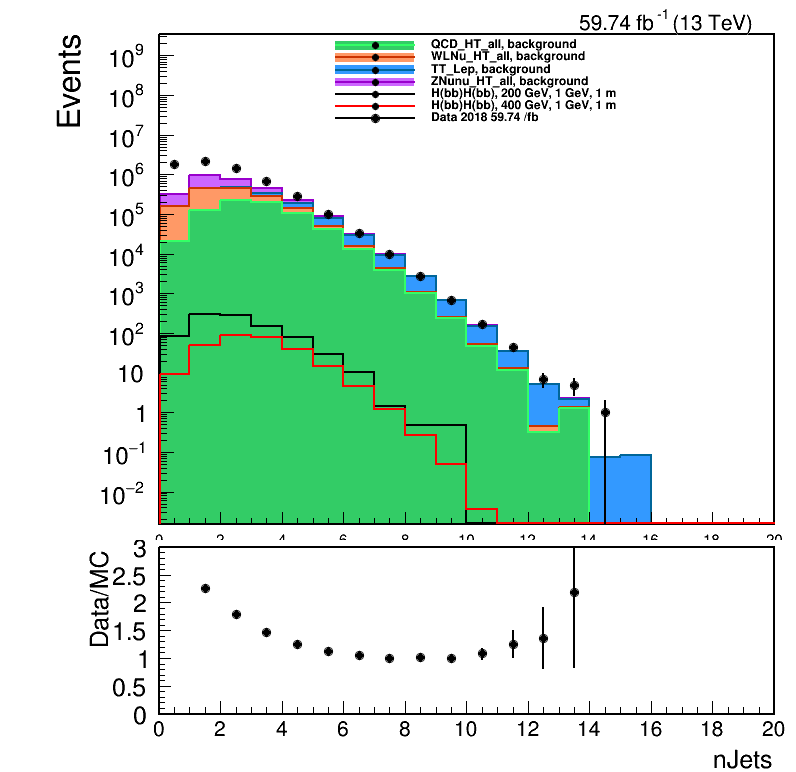

In [9]:
for var in variables:
    print('var/x_axis', var[0], 'binning', var[2], var[3], var[4])
    x_axis = var[0]
    y_axis = 'Events'
    axis_set = [x_axis, y_axis]
    bin_set = [var[2],var[3],var[4]]
    lumi = 59740 
#     outf = var[0]+'_stack.png'
    
    # Plotting THStack
    c = rt.TCanvas('c','c', 800, 800)
    ht = {}
    # leg = rt.TLegend(0.59,0.70,0.97,0.93)
    leg = rt.TLegend(0.40,0.78,0.97,0.94)

    leg.SetTextSize(0.025)
    leg.SetBorderSize(0)
    leg.SetEntrySeparation(0.01)
    
    pad1 = rt.TPad("pad1", "pad1", 0, 0.3, 1, 0.99)
    pad1.SetBottomMargin(0.03)
    # pad1.SetGridx()
    pad1.SetLogy()
    pad1.SetLeftMargin(0.2)
    pad1.SetRightMargin(0.027)
    pad1.Draw()
    pad1.cd()
    
    stack = rt.THStack( "hs" , "H Stack " )
    total = rt.TH1D('total','total',3,0,3)
    color_list = [845,806,861,876,597,625]
#     color_list = [845,800,861,806,876,597,625]
#     keys = ['QCD_HT_all, background']
    keys = ['QCD_HT_all, background', 'WLNu_HT_all, background',  'TT_Lep, background', 'ZNunu_HT_all, background',]
#     keys = ['QCD_HT_all, background', 'WLNu_HT_all, background', 'ZNunu_HT_all, background', 'TT_Lep, background']
#     sig_keys = []
#     sig_keys = ['H(bb)H(bb), 200 GeV, 1 GeV, 1 m' ]
    sig_keys = ['H(bb)H(bb), 200 GeV, 1 GeV, 1 m', 'H(bb)H(bb), 400 GeV, 1 GeV, 1 m' ]
    data_keys = ['Data 2018']
    # sig_keys = ['H(bb)H(bb), N3N2, 200 GeV, 1 GeV, 1 m','H(bb)H(bb), N3N2, 400 GeV, 1 GeV, 1 m','H(bb)H(bb), N3N2, 127 GeV, 1 GeV, 1 m',  ]
    bkg_integral = 0.0
    max_value = 0
    i=0
    for k in keys:
        if 'background' in k or True:


            pt1 = var[1][k] 
            v = pt1 
            w = trg_jet_w[k] 
            pu = trg_jet_puw[k] 
            if 'QCD' in k:
                sf=1.1
                outf = var[0]+'_stack_sf_'+str(sf).replace('.','p')+'.png'   
            else:
                sf=1
            print(k,len(v))
            ht[k] = create_TH1D( v, axis_title=axis_set, name=k, binning=bin_set,weights = w*pu*lumi*sf)
            ht[k].Sumw2()
            total.Add(ht[k])
            stack.Add( ht[k])
            ht[k].SetLineColor(color_list[i]+3)
            ht[k].SetFillColor(color_list[i])
            leg.AddEntry(ht[k],k)
            max_value += ht[k].GetBinContent(ht[k].GetMaximumBin())
            bkg_integral += ht[k].Integral()

            i+=1
    stack.Draw('hist')
    # stack.SetMaximum(max_value*1.5)
    stack.SetMaximum(max_value*1e+03)
    stack.SetMinimum(10e-3)
    stack.GetYaxis().SetTitle(y_axis)
    stack.GetXaxis().SetTitle(x_axis)
    stack.GetXaxis().SetLabelSize(0.03)



    i=0
    for k in sig_keys:
        pt1 = var[1][k] 
        v = pt1 
        w = trg_jet_w[k] 

        factor = bkg_integral/np.sum(w)
        print(k,'factor',1.0*np.sum(w[v>50])/np.sum(w))
        ht[k] = create_TH1D( v, axis_title=axis_set, name=k, binning=bin_set,weights = w*lumi)
        ht[k].Sumw2()
        ht[k].SetLineColor(std_color_list[i])
        print(k, std_color_list[i])
        ht[k].Draw("hist same")
        leg.AddEntry(ht[k],k)
        max_value = max(ht[k].GetBinContent(ht[k].GetMaximumBin()),max_value)
        print('cnt',k,np.count_nonzero(w[v==2]),np.sum(w[v==2]))

        i+=1

    i=0
    for k in data_keys:
        pt1 = var[1][k] 
        v = pt1 
        w = trg_jet_w[k] 

        ht[k] = create_TH1D( v, axis_title=axis_set, name=k, binning=bin_set,weights = w*1)
        ht[k].Sumw2()
        ht[k].SetLineColor(std_color_list[i])
        ht[k].SetMarkerColor(std_color_list[i])
        ht[k].SetMarkerStyle(20)
        ht[k].SetMarkerSize(1.)
        print(k, std_color_list[i])
        ht[k].Draw("p same")
        leg.AddEntry(ht[k],k+' '+str(lumi/1000)+' /fb')

        i+=1

    leg.Draw()

    last = stack.GetStack().Last()
    total.SetFillStyle(3001)
    total.SetLineColor(1)
    total.SetFillColor(1)

    total.GetYaxis().SetTitleOffset(1.6)
#     total.Draw("same e2")
    print("total",total.GetBinContent(1),total.GetBinError(1))
    
    c.cd()
    pad2 = rt.TPad("pad2", "pad2", 0, 0, 1, 0.3)
    pad2.SetTopMargin(0.03)
    pad2.SetBottomMargin(0.25)
    # pad2.SetGrid()
    pad2.SetLeftMargin(0.2)
    pad2.SetRightMargin(0.027)
    pad2.Draw()
    pad2.cd()

    h_copy = ht['Data 2018'].Clone()
    h_copy.Divide(stack.GetStack().Last())
    h_copy.GetYaxis().SetTitleOffset(0.4)
#     h.GetYaxis().SetRangeUser(ratio_bounds[0], ratio_bounds[1])
    h_copy.GetYaxis().SetTitleSize(0.12)
    h_copy.GetYaxis().SetLabelSize(0.12)
    h_copy.GetYaxis().SetNdivisions(506)
    h_copy.SetMaximum(3)
#     h_copy.SetMaximum(1)
#     h_copy.SetMaximum(0.5)
#     h_copy.SetMinimum(-1)
    h_copy.SetMinimum(0)



    h_copy.GetXaxis().SetTitleOffset(1)
    h_copy.GetXaxis().SetTitleSize(0.12)
    h_copy.GetXaxis().SetLabelSize(0.10)
    h_copy.GetXaxis().SetTickSize(0.07)
    h_copy.SetYTitle('Data/MC')
    h_copy.SetTitle("")
#        h.SetStats(0)
    h_copy.DrawCopy('E1')
    pad2.Update()
    
    


#     c = make_ratio_plot([total,ht['Data 2016']], fit = False, logy=True, in_tags = ["MC","Data"], ratio_bounds = [0,3])


    CMS_lumi.lumi_13TeV = str(lumi/1000)+" fb^{-1}"
    CMS_lumi.cmsText = ""
    CMS_lumi.writeExtraText = False
    CMS_lumi.CMS_lumi(c,4,3)


    c.SetLeftMargin(0.2)
    c.SetRightMargin(0.027)
    c.SetLogy()
    c.Draw()
    c.SaveAs(plotDir+outf)
 

In [10]:
variables = [
#         ['jetNeutralHadronMultiplicity', trg_jet_nhm, 20, -0.5, 19.5],
#         ['jetChargedHadronMultiplicity', trg_jet_chm, 50, -0.5, 49.5],
#         ['jetMuonMultiplicity', trg_jet_mum, 20, -0.5, 19.5],
#         ['jetElectronMultiplicity', trg_jet_elem, 20, -0.5, 19.5],
#         ['jetPhotonMultiplicity', trg_jet_phom, 50, -0.5, 49.5],
    
#         ['jetNeutralHadronEnergyFraction', trg_jet_nhef, 50, 0, 1],
#         ['jetChargedHadronEnergyFraction', trg_jet_chef, 50, 0, 1],
#         ['jetChargedEMEnergyFraction', trg_jet_cemef, 50, 0, 1],
#         ['jetNeutralEMEnergyFraction', trg_jet_nemef, 50, 0, 1],
   
#         ['jetEcalEnergy', trg_jet_ecale, 50, 0, 2500],
#         ['jetHcalEnergy', trg_jet_hcale, 50, 0, 2500],
    
#         ['jetCSV', trg_jet_csv, 50, 0, 1],
    
#         ['jetPt', trg_jet_pt, 10, 0, 100],
#         ['jetPt', trg_jet_pt, 50, 0, 1000],
    
#         ['jetChargedHadronEnergyFraction', trg_jet_chef, 50, 0, 0.1],
    
        ['jetTime', trg_jet_time, 50, -13, 13],
        ['jetMinDeltaRPVTracks', trg_jet_dr, 50, 0, 3],
        ['jetTMF', trg_jet_tmf, 50, 0, 1],
    
    
#         ['jetPt', trg_jet_pt, 20, 0, 2000],
        ['jetPt', trg_jet_pt, 200, 0, 2000],
        ['jetEta', trg_jet_eta, 20, -3.15, 3.15],
        ['jetE', trg_jet_e, 50, 0, 1000],
        ['jetPhi', trg_jet_phi, 20, -3.15, 3.15],
    
     
        ['jetMuonEnergyFraction', trg_jet_muef, 50, 0, 1],
        ['jetElectronEnergyFraction', trg_jet_eleef, 50, 0, 1],
        ['jetPhotonEnergyFraction', trg_jet_phoef, 50, 0, 1],
    
        ['jetChargedHadronEnergyFraction', trg_jet_chef, 50, 0, 1],
    
    
        ['jetCSV', trg_jet_csv, 50, 0, 1],
        ['jetDNN', trg_jet_dnn, 50, 0, 1],
        ['jetDNNV3', trg_jet_dnnv3, 50, 0, 1],
 
        ['jetChargedMultiplicity', trg_jet_chm, 50, 0, 50],
        ['jetNSelectedTracks', trg_jet_nseltrk, 50, 0, 50],
        ['jetEnergyRecHitsEcal', trg_jet_ecale, 50, 0, 500],
        ['jetNRecHitsEcal', trg_jet_nhits, 50, 0, 50],
    
        ['jetPtAllTracks', trg_jet_alltrkpt, 50, 0, 2000],
        ['jetPtAllPVTracks', trg_jet_pvtrkpt, 50, 0, 500],
        ['jetAlphaMax', trg_jet_amax, 50, 0, 5],
        ['jetBetaMax', trg_jet_bmax, 50, 0, 1],
        ['jetGammaMax', trg_jet_gmax, 50, 0, 1],
        ['jetGammaMax_EM', trg_jet_gmaxem, 50, 0, 1],
        ['jetGammaMax_Hadronic', trg_jet_gmaxh, 50, 0, 1],
        ['jetMinDeltaRAllTracks', trg_jet_drall, 50, 0, 3],
    


    
]

In [59]:
# variables = [
 
    
   
       
#         ['jetNRecHitsHcal', trg_jet_nhcalhit, 50, 0, 300],
#         ['jetTimeRecHitHcal', trg_jet_hcalt, 50, -100, 20],
  
    


    
# ]

0
var/x_axis jetTime binning 50 -13 13
176493
QCD_HT_all, background 176493 176493
1531091
WLNu_HT_all, background 1531091 1531091
3575628
ZNunu_HT_all, background 3575628 3575628
2446221
TT_Lep, background 2446221 2446221
1581
H(bb)H(bb), 200 GeV, 1 GeV, 1 m factor 0.0
H(bb)H(bb), 200 GeV, 1 GeV, 1 m 1
cnt H(bb)H(bb), 200 GeV, 1 GeV, 1 m 0 0.0
70867
H(bb)H(bb), 400 GeV, 1 GeV, 1 m factor 0.0
H(bb)H(bb), 400 GeV, 1 GeV, 1 m 2
cnt H(bb)H(bb), 400 GeV, 1 GeV, 1 m 0 0.0
4184423
Data 2018 1
total 0.0 0.0
59.74 fb^{-1} (13 TeV)
var/x_axis jetMinDeltaRPVTracks binning 50 0 3
176493
QCD_HT_all, background 176493 176493
1531091
WLNu_HT_all, background 1531091 1531091
3575628
ZNunu_HT_all, background 3575628 3575628
2446221
TT_Lep, background 2446221 2446221
1581
H(bb)H(bb), 200 GeV, 1 GeV, 1 m factor 0.0
H(bb)H(bb), 200 GeV, 1 GeV, 1 m 1
cnt H(bb)H(bb), 200 GeV, 1 GeV, 1 m 0 0.0
70867
H(bb)H(bb), 400 GeV, 1 GeV, 1 m factor 0.0
H(bb)H(bb), 400 GeV, 1 GeV, 1 m 2
cnt H(bb)H(bb), 400 GeV, 1 GeV, 1

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:100: RuntimeWarning: invalid value encountered in greater


1933869
Data 2018 1
total 1514027.0871216252 4197.019497072572
59.74 fb^{-1} (13 TeV)
var/x_axis jetDNNV3 binning 50 0 1
161648
QCD_HT_all, background 161648 161648
1232005
WLNu_HT_all, background 1232005 1232005
2178120
ZNunu_HT_all, background 2178120 2178120
2192637
TT_Lep, background 2192637 2192637
520
H(bb)H(bb), 200 GeV, 1 GeV, 1 m factor 0.0
H(bb)H(bb), 200 GeV, 1 GeV, 1 m 1
cnt H(bb)H(bb), 200 GeV, 1 GeV, 1 m 0 0.0
41276
H(bb)H(bb), 400 GeV, 1 GeV, 1 m factor 0.0
H(bb)H(bb), 400 GeV, 1 GeV, 1 m 2
cnt H(bb)H(bb), 400 GeV, 1 GeV, 1 m 0 0.0
1933869
Data 2018 1
total 1514037.212161549 4197.0228625462
59.74 fb^{-1} (13 TeV)
var/x_axis jetChargedMultiplicity binning 50 0 50
161653
QCD_HT_all, background 161653 161653
1232121
WLNu_HT_all, background 1232121 1232121
2178996
ZNunu_HT_all, background 2178996 2178996
2192817
TT_Lep, background 2192817 2192817
521
H(bb)H(bb), 200 GeV, 1 GeV, 1 m factor 0.0
H(bb)H(bb), 200 GeV, 1 GeV, 1 m 1
cnt H(bb)H(bb), 200 GeV, 1 GeV, 1 m 52 0.00041913

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: total (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: QCD_HT_all, background (Potential memory leak).
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Info in <TH1D::Add>: Attempt to add histograms with different number of bins - trying to use TH1::Merge
Error in <Merge>: Cannot merge histograms - limits are inconsistent:
 first: total (3, 0.000000, 3.000000), second: QCD_HT_all, background (50, -13.000000, 13.000000)
Warning in <TROOT::Append>: Replacing existing TH1: WLNu_HT_all, background (Potential memory leak).
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Info in <TH1D::Add>: Attempt to add histograms with different number of bins - trying to use TH1::Merge
Error in <Merge>: Cannot merge histograms - limits are inconsistent:
 first: total (3, 0.000000, 3.000000), second: 

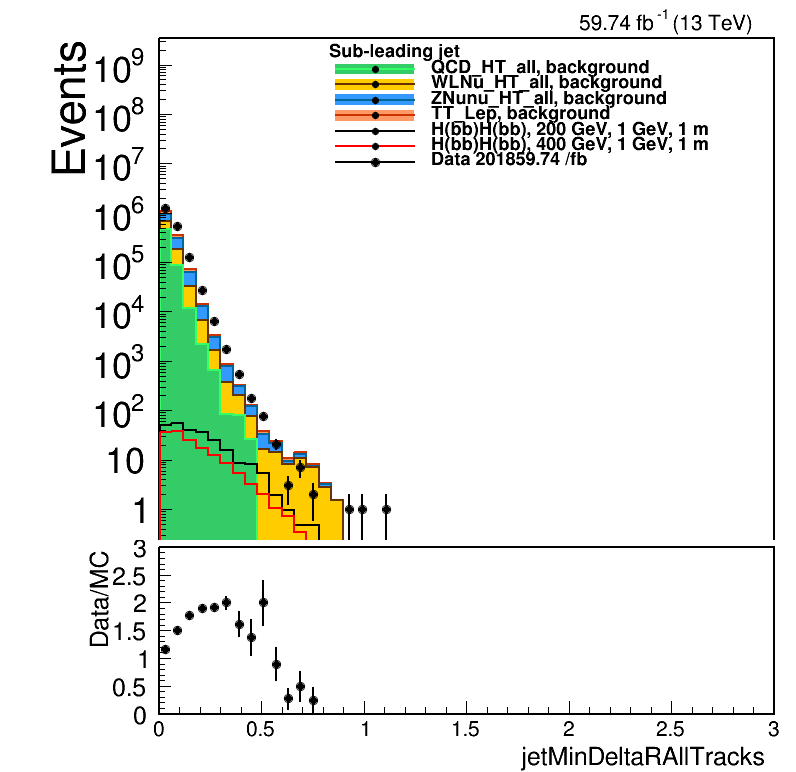

In [13]:
for cnt in range(2):
    print(cnt)
    part = cnt
    if cnt==0:
        cnt_str = 'Leading jet'
        name_str = 'leading_jet'
    else:
        cnt_str = 'Sub-leading jet'
        name_str = 'sub_leading_jet'
    for var in variables:
        print('var/x_axis', var[0], 'binning', var[2], var[3], var[4])
        x_axis = var[0]
        y_axis = 'Events'
        axis_set = [x_axis, y_axis]
        bin_set = [var[2],var[3],var[4]]
        lumi = 59740 
#         outf = var[0]+'_'+name_str+'_stack_pt100.png'
        outf = var[0]+'_'+name_str+'_stack.png'

        # Plotting THStack
        c = rt.TCanvas('c','c', 800, 800)
        ht = {}
        # leg = rt.TLegend(0.59,0.70,0.97,0.93)
        leg = rt.TLegend(0.40,0.78,0.97,0.94)

        leg.SetTextSize(0.025)
        leg.SetBorderSize(0)
        leg.SetEntrySeparation(0.01)
        
    
#         pad1 = rt.TPad("pad1", "pad1", 0, 0.3, 1, 0.99)
#         pad1.SetBottomMargin(0.03)
#         # pad1.SetGridx()
#         pad1.SetLogy()
#         pad1.SetLeftMargin(0.2)
#         pad1.SetRightMargin(0.027)
#         pad1.Draw()
#         pad1.cd()
    
        stack = rt.THStack( "hs" , "H Stack " )
        total = rt.TH1D('total','total',3,0,3)
        color_list = [845,800,861,806,876,597,625]
        keys=[]
#         keys = ['QCD_HT_all, background']
        keys = ['QCD_HT_all, background', 'WLNu_HT_all, background', 'ZNunu_HT_all, background', 'TT_Lep, background']
        sig_keys = [  ]
#         sig_keys = ['H(bb)H(bb), 200 GeV, 1 GeV, 1 m' ]
        sig_keys = ['H(bb)H(bb), 200 GeV, 1 GeV, 1 m', 'H(bb)H(bb), 400 GeV, 1 GeV, 1 m' ]
#         data_keys = []
        data_keys = ['Data 2018']
        # sig_keys = ['H(bb)H(bb), N3N2, 200 GeV, 1 GeV, 1 m','H(bb)H(bb), N3N2, 400 GeV, 1 GeV, 1 m','H(bb)H(bb), N3N2, 127 GeV, 1 GeV, 1 m',  ]
        bkg_integral = 0.0
        max_value = 0
        i=0
        for k in keys:
            if 'background' in k or True:


                pt1 = var[1][k] 
                pt2 = pt1[pt1.count()>part]
                print(len(pt2))
                v = pt2[:,part]
                w = trg_jet_w[k][pt1.count()>part] 
                pu = trg_jet_puw[k][pt1.count()>part]  
                print(k,len(v),len(w))
                if 'QCD' in k:
                    sf=1.1
                else:
                    sf=1
                ht[k] = create_TH1D( v, axis_title=axis_set, name=k, binning=bin_set,weights = w*pu*lumi*sf)
                ht[k].Sumw2()
                total.Add(ht[k])
                stack.Add( ht[k])
                ht[k].SetLineColor(color_list[i]+3)
                ht[k].SetFillColor(color_list[i])
                leg.AddEntry(ht[k],k)
                max_value += ht[k].GetBinContent(ht[k].GetMaximumBin())
                bkg_integral += ht[k].Integral()

                i+=1
        stack.Draw('hist')
        # stack.SetMaximum(max_value*1.5)
        stack.SetMaximum(max_value*1e+03)
        stack.SetMinimum(10e-3)
        stack.GetYaxis().SetTitle(y_axis)
        stack.GetXaxis().SetTitle(x_axis)
        stack.GetXaxis().SetLabelSize(0.03)



        i=0
        for k in sig_keys:
            pt1 = var[1][k] 
            pt2 = pt1[pt1.count()>part]
            print(len(pt2))
            v = pt2[:,part]
            w = trg_jet_w[k][pt1.count()>part] 

            factor = bkg_integral/np.sum(w)
            print(k,'factor',1.0*np.sum(w[v>50])/np.sum(w))
            ht[k] = create_TH1D( v, axis_title=axis_set, name=k, binning=bin_set,weights = w*lumi)
            ht[k].Sumw2()
            ht[k].SetLineColor(std_color_list[i])
            print(k, std_color_list[i])
            ht[k].Draw("hist  same")
            leg.AddEntry(ht[k],k)
            max_value = max(ht[k].GetBinContent(ht[k].GetMaximumBin()),max_value)
            print('cnt',k,np.count_nonzero(w[v==2]),np.sum(w[v==2]))

            i+=1

        i=0
        for k in data_keys:
            pt1 = var[1][k] 
            pt2 = pt1[pt1.count()>part]
            print(len(pt2))
            v = pt2[:,part]
            w = trg_jet_w[k][pt1.count()>part] 

            ht[k] = create_TH1D( v, axis_title=axis_set, name=k, binning=bin_set,weights = w*1)
            ht[k].Sumw2()
            ht[k].SetLineColor(std_color_list[i])
            ht[k].SetMarkerColor(std_color_list[i])
            ht[k].SetMarkerStyle(20)
            ht[k].SetMarkerSize(1.)
            print(k, std_color_list[i])
            ht[k].Draw("p E same")
            leg.AddEntry(ht[k],k+str(lumi/1000)+' /fb')

            i+=1

        leg.SetHeader(cnt_str)
        leg.Draw()

        last = stack.GetStack().Last()
        total.SetFillStyle(3001)
        total.SetLineColor(1)
        total.SetFillColor(1)

        total.GetYaxis().SetTitleOffset(1.6)
#         total.Draw("same e2")
        print("total",total.GetBinContent(1),total.GetBinError(1))

        c.cd()
        pad2 = rt.TPad("pad2", "pad2", 0, 0, 1, 0.3)
        pad2.SetTopMargin(0.03)
        pad2.SetBottomMargin(0.25)
        # pad2.SetGrid()
        pad2.SetLeftMargin(0.2)
        pad2.SetRightMargin(0.027)
        pad2.Draw()
        pad2.cd()

        h_copy = ht['Data 2018'].Clone()
        h_copy.Divide(stack.GetStack().Last())
        h_copy.GetYaxis().SetTitleOffset(0.4)
    #     h.GetYaxis().SetRangeUser(ratio_bounds[0], ratio_bounds[1])
        h_copy.GetYaxis().SetTitleSize(0.12)
        h_copy.GetYaxis().SetLabelSize(0.12)
        h_copy.GetYaxis().SetNdivisions(506)
        h_copy.SetMaximum(3)
        h_copy.SetMinimum(0)



        h_copy.GetXaxis().SetTitleOffset(1)
        h_copy.GetXaxis().SetTitleSize(0.12)
        h_copy.GetXaxis().SetLabelSize(0.10)
        h_copy.GetXaxis().SetTickSize(0.07)
        h_copy.SetYTitle('Data/MC')
        h_copy.SetTitle("")
    #        h.SetStats(0)
        h_copy.DrawCopy('E1')
        pad2.Update()
    



        CMS_lumi.lumi_13TeV = str(lumi/1000)+" fb^{-1}"
        CMS_lumi.cmsText = ""
        CMS_lumi.writeExtraText = False
        CMS_lumi.CMS_lumi(c,4,3)


        c.SetLeftMargin(0.2)
        c.SetRightMargin(0.027)
        c.SetLogy()
        c.Draw()
        c.SaveAs(plotDir+outf)


# Tags

In [12]:
# time_cut = 0.08676443430239597
# tmf_cut = 0.16335152541277656 
# dr_cut = 0.06402562462487048
# chef_cut = 0.061590940809278155

time_cut = 0.09
tmf_cut = 0.16 
dr_cut = 0.06 
chef_cut = 0.06 

# dnn_cut=0.90
# dnn_cut=0.996
# dnn_cut=0.994
dnn_cut=0.99

nTags = {}
nJets = {}


tag_jet_pt = {}
tag_jet_eta = {}
tag_jet_phi = {}
tag_jet_e = {}

tag_jet_chef = {}
tag_jet_tmf = {}
tag_jet_time = {}
tag_jet_dr = {}

tag_jet_phoef = {}
tag_jet_eleef = {}
tag_jet_muef = {}

tag_jet_csv = {}
tag_jet_dnn = {}

tag_jet_chm = {}
tag_jet_nseltrk = {}
tag_jet_ecale = {}
tag_jet_nhits = {}
 

tag_jet_alltrkpt = {}
tag_jet_pvtrkpt = {}
tag_jet_amax = {}
tag_jet_bmax = {}
tag_jet_gmax = {}
tag_jet_gmaxem = {}
tag_jet_gmaxh = {}
tag_jet_drall = {}

untag_jet_pt = {}
untag_jet_eta = {}
untag_jet_phi = {}
untag_jet_e = {}

untag_jet_chef = {}
untag_jet_tmf = {}
untag_jet_time = {}
untag_jet_dr = {}

untag_jet_phoef = {}
untag_jet_eleef = {}
untag_jet_muef = {}

untag_jet_csv = {}
untag_jet_dnn = {}

untag_jet_chm = {}
untag_jet_nseltrk = {}
untag_jet_ecale = {}
untag_jet_nhits = {}
 

untag_jet_alltrkpt = {}
untag_jet_pvtrkpt = {}
untag_jet_amax = {}
untag_jet_bmax = {}
untag_jet_gmax = {}
untag_jet_gmaxem = {}
untag_jet_gmaxh = {}
untag_jet_drall = {}

cut_based_tagger=0

for k,v in tree.items():
    print(k,v)
    
    nJets[k] = trg_jet_pt[k].count()
    
    #tag cuts
#     tagged_jet = np.logical_and(trg_jet_hcalt[k]>-100, trg_jet_nhcalhit[k]>0) 
    tagged_jet = np.logical_and(trg_jet_hcalt[k]>-1000, trg_jet_nhcalhit[k]>-10) 
    if cut_based_tagger==1:
        tagged_jet = np.logical_and(tagged_jet, trg_jet_tmf[k]<tmf_cut)
        tagged_jet = np.logical_and(tagged_jet, trg_jet_dr[k]>dr_cut)
        tagged_jet = np.logical_and(tagged_jet, trg_jet_time[k]>time_cut)
        tagged_jet = np.logical_and(tagged_jet, trg_jet_chef[k]<chef_cut) 
    else:
#         tagged_jet = np.logical_and(tagged_jet, trg_jet_dnn[k]>dnn_cut) 
        tagged_jet = np.logical_and(tagged_jet, trg_jet_dnnv3[k]>dnn_cut) 
    
    untagged_jet = np.logical_not(tagged_jet) 
    
    nTags[k] = trg_jet_pt[k][tagged_jet].count()
    
    tag_jet_pt[k] = trg_jet_pt[k][tagged_jet] 
    tag_jet_eta[k] = trg_jet_eta[k][tagged_jet] 
    tag_jet_e[k] = trg_jet_e[k][tagged_jet] 
    tag_jet_phi[k] = trg_jet_phi[k][tagged_jet]
    
    tag_jet_chef[k] = trg_jet_chef[k][tagged_jet] 
    tag_jet_tmf[k] = trg_jet_tmf[k][tagged_jet] 
    tag_jet_time[k] = trg_jet_time[k][tagged_jet] 
    tag_jet_dr[k] = trg_jet_dr[k][tagged_jet] 
    
    tag_jet_phoef[k] = trg_jet_phoef[k][tagged_jet] 
    tag_jet_muef[k] = trg_jet_muef[k][tagged_jet] 
    tag_jet_eleef[k] = trg_jet_eleef[k][tagged_jet] 
    
    tag_jet_csv[k] = trg_jet_csv[k][tagged_jet] 
    tag_jet_dnn[k] = trg_jet_dnn[k][tagged_jet] 
  
    tag_jet_chm[k] = trg_jet_chm[k][tagged_jet] 
    tag_jet_nseltrk[k] = trg_jet_nseltrk[k][tagged_jet] 
    tag_jet_ecale[k] = trg_jet_ecale[k][tagged_jet] 
    tag_jet_nhits[k] = trg_jet_nhits[k][tagged_jet] 

    tag_jet_alltrkpt[k] = trg_jet_alltrkpt[k][tagged_jet] 
    tag_jet_pvtrkpt[k] = trg_jet_pvtrkpt[k][tagged_jet] 
    tag_jet_amax[k] = trg_jet_amax[k][tagged_jet] 
    tag_jet_bmax[k] = trg_jet_bmax[k][tagged_jet] 
    tag_jet_gmax[k] = trg_jet_gmax[k][tagged_jet] 
    tag_jet_gmaxem[k] = trg_jet_gmaxem[k][tagged_jet] 
    tag_jet_gmaxh[k] = trg_jet_gmaxh[k][tagged_jet] 
    tag_jet_drall[k] = trg_jet_drall[k][tagged_jet] 
    
    untag_jet_pt[k] = trg_jet_pt[k][untagged_jet] 
    untag_jet_eta[k] = trg_jet_eta[k][untagged_jet] 
    untag_jet_e[k] = trg_jet_e[k][untagged_jet] 
    untag_jet_phi[k] = trg_jet_phi[k][untagged_jet]
    
    untag_jet_chef[k] = trg_jet_chef[k][untagged_jet] 
    untag_jet_tmf[k] = trg_jet_tmf[k][untagged_jet] 
    untag_jet_time[k] = trg_jet_time[k][untagged_jet] 
    untag_jet_dr[k] = trg_jet_dr[k][untagged_jet] 
    
    untag_jet_phoef[k] = trg_jet_phoef[k][untagged_jet] 
    untag_jet_muef[k] = trg_jet_muef[k][untagged_jet] 
    untag_jet_eleef[k] = trg_jet_eleef[k][untagged_jet] 
    
    untag_jet_csv[k] = trg_jet_csv[k][untagged_jet] 
    untag_jet_dnn[k] = trg_jet_dnn[k][untagged_jet] 
    
    untag_jet_chm[k] = trg_jet_chm[k][untagged_jet] 
    untag_jet_nseltrk[k] = trg_jet_nseltrk[k][untagged_jet] 
    untag_jet_ecale[k] = trg_jet_ecale[k][untagged_jet] 
    untag_jet_nhits[k] = trg_jet_nhits[k][untagged_jet] 

    
    untag_jet_alltrkpt[k] = trg_jet_alltrkpt[k][untagged_jet] 
    untag_jet_pvtrkpt[k] = trg_jet_pvtrkpt[k][untagged_jet] 
    untag_jet_amax[k] = trg_jet_amax[k][untagged_jet] 
    untag_jet_bmax[k] = trg_jet_bmax[k][untagged_jet] 
    untag_jet_gmax[k] = trg_jet_gmax[k][untagged_jet] 
    untag_jet_gmaxem[k] = trg_jet_gmaxem[k][untagged_jet] 
    untag_jet_gmaxh[k] = trg_jet_gmaxh[k][untagged_jet] 
    untag_jet_drall[k] = trg_jet_drall[k][untagged_jet] 
    
    print(trg_jet_pt[k][:10])
    print(tag_jet_pt[k][:10])
    print(untag_jet_pt[k][:10])
    
    print(np.unique(nJets[k]))
    print(np.unique(nTags[k]))
    
    for i,ele in enumerate(nTags[k]):
        if ele > 2:
            nTags[k][i] = 2
            
    print(np.unique(nTags[k]))
    

H(bb)H(bb), 400 GeV, 1 GeV, 1 m <TTree b'SusyLLPTree' at 0x7fc0655e0cf8>
[[193.38864 89.84608] [217.1944] [393.41394] ... [106.810646 39.014046] [140.65123] [235.29253 37.630882]]
[[193.38864 89.84608] [217.1944] [393.41394] ... [] [140.65123] [235.29253 37.630882]]
[[] [] [] ... [106.810646 39.014046] [] []]
[0 1 2 3 4]
[0 1 2 3 4]
[0 1 2]
H(bb)H(bb), 200 GeV, 1 GeV, 1 m <TTree b'SusyLLPTree' at 0x7fc0656100f0>
[[196.69899] [344.1413 87.39241] [] ... [46.18347] [101.16123 42.667877] [423.45596]]
[[196.69899] [87.39241] [] ... [] [101.16123] []]
[[] [344.1413] [] ... [46.18347] [42.667877] [423.45596]]
[0 1 2 3 4]
[0 1 2 3]
[0 1 2]
QCD_HT_all, background <TTree b'SusyLLPTree' at 0x7fc064b6fb00>
[[496.31833 300.70486 179.36554 37.228172] [271.86807 256.7557 175.94743 146.17781 116.26735 54.96619] [655.567 468.6483] ... [617.2142 436.0523] [668.41486 349.14667 113.12641 87.86591] []]
[[] [] [] ... [] [] []]
[[496.31833 300.70486 179.36554 37.228172] [271.86807 256.7557 175.94743 146.1778

In [14]:
variables = [
 
        ['nTags', nTags, 3, 0, 3],
    
]

var/x_axis nTags binning 3 0 3
QCD_HT_all, background 178139
WLNu_HT_all, background 1611925
TT_Lep, background 2534562
ZNunu_HT_all, background 3970700
H(bb)H(bb), 200 GeV, 1 GeV, 1 m factor 0.0
H(bb)H(bb), 200 GeV, 1 GeV, 1 m 1
cnt H(bb)H(bb), 200 GeV, 1 GeV, 1 m 181 0.0014589126
H(bb)H(bb), 400 GeV, 1 GeV, 1 m factor 0.0
H(bb)H(bb), 400 GeV, 1 GeV, 1 m 2
cnt H(bb)H(bb), 400 GeV, 1 GeV, 1 m 20302 0.001236065
Data 2018 1
total 2878366.7774700574 6583.600097212607
59.74 fb^{-1} (13 TeV)


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: total (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: QCD_HT_all, background (Potential memory leak).
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TROOT::Append>: Replacing existing TH1: WLNu_HT_all, background (Potential memory leak).
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TROOT::Append>: Replacing existing TH1: TT_Lep, background (Potential memory leak).
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TROOT::Append>: Replacing existing TH1: ZNunu_HT_all, background (Potential memory leak).
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structu

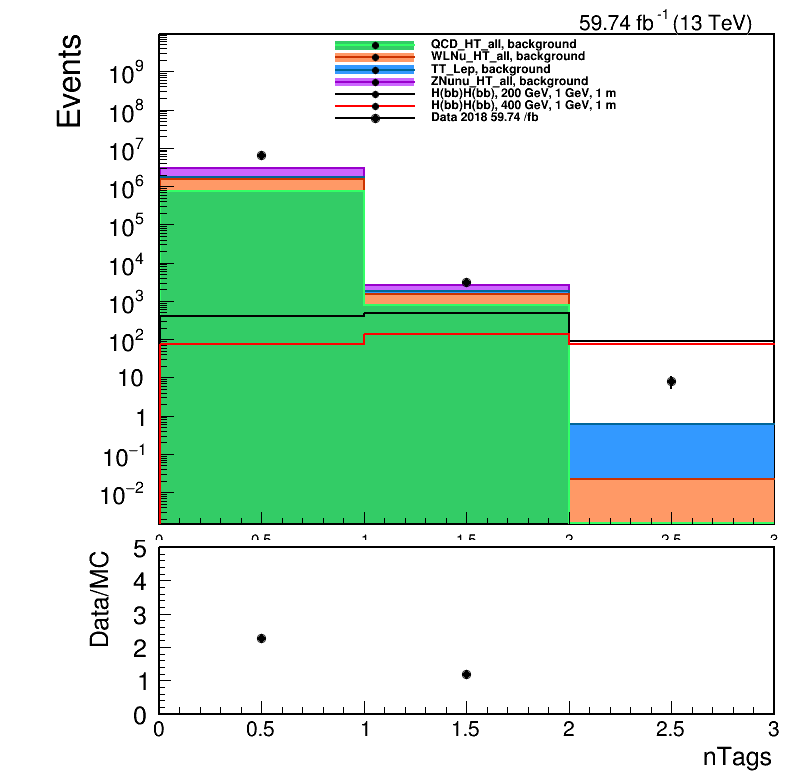

In [15]:
for var in variables:
    print('var/x_axis', var[0], 'binning', var[2], var[3], var[4])
    x_axis = var[0]
    y_axis = 'Events'
    axis_set = [x_axis, y_axis]
    bin_set = [var[2],var[3],var[4]]
    lumi = 59740 
#     outf = var[0]+'_stack.png'
    
    # Plotting THStack
    c = rt.TCanvas('c','c', 800, 800)
    ht = {}
    # leg = rt.TLegend(0.59,0.70,0.97,0.93)
    leg = rt.TLegend(0.40,0.78,0.97,0.94)

    leg.SetTextSize(0.025)
    leg.SetBorderSize(0)
    leg.SetEntrySeparation(0.01)
    
    pad1 = rt.TPad("pad1", "pad1", 0, 0.3, 1, 0.99)
    pad1.SetBottomMargin(0.03)
    # pad1.SetGridx()
    pad1.SetLogy()
    pad1.SetLeftMargin(0.2)
    pad1.SetRightMargin(0.027)
    pad1.Draw()
    pad1.cd()
    
    stack = rt.THStack( "hs" , "H Stack " )
    total = rt.TH1D('total','total',3,0,3)
    color_list = [845,806,861,876,597,625]
#     color_list = [845,800,861,806,876,597,625]
    keys = ['QCD_HT_all, background', 'WLNu_HT_all, background',  'TT_Lep, background', 'ZNunu_HT_all, background',]
#     keys = ['QCD_HT_all, background', 'WLNu_HT_all, background', 'ZNunu_HT_all, background', 'TT_Lep, background']
#     sig_keys = []
#     sig_keys = ['H(bb)H(bb), 200 GeV, 1 GeV, 1 m' ]
    sig_keys = ['H(bb)H(bb), 200 GeV, 1 GeV, 1 m', 'H(bb)H(bb), 400 GeV, 1 GeV, 1 m' ]
    data_keys = ['Data 2018']
    # sig_keys = ['H(bb)H(bb), N3N2, 200 GeV, 1 GeV, 1 m','H(bb)H(bb), N3N2, 400 GeV, 1 GeV, 1 m','H(bb)H(bb), N3N2, 127 GeV, 1 GeV, 1 m',  ]
    bkg_integral = 0.0
    max_value = 0
    i=0
    for k in keys:
        if 'background' in k or True:


            pt1 = var[1][k] 
            v = pt1 
            w = trg_jet_w[k] 
            pu = trg_jet_puw[k] 
            if 'QCD' in k:
                sf=1.1
                outf = var[0]+'_stack_sf_'+str(sf).replace('.','p')+'.png'   
            else:
                sf=1
            print(k,len(v))
            ht[k] = create_TH1D( v, axis_title=axis_set, name=k, binning=bin_set,weights = w*pu*lumi*sf)
            ht[k].Sumw2()
            total.Add(ht[k])
            stack.Add( ht[k])
            ht[k].SetLineColor(color_list[i]+3)
            ht[k].SetFillColor(color_list[i])
            leg.AddEntry(ht[k],k)
            max_value += ht[k].GetBinContent(ht[k].GetMaximumBin())
            bkg_integral += ht[k].Integral()

            i+=1
    stack.Draw('hist')
    # stack.SetMaximum(max_value*1.5)
    stack.SetMaximum(max_value*1e+03)
    stack.SetMinimum(10e-3)
    stack.GetYaxis().SetTitle(y_axis)
    stack.GetXaxis().SetTitle(x_axis)
    stack.GetXaxis().SetLabelSize(0.03)



    i=0
    for k in sig_keys:
        pt1 = var[1][k] 
        v = pt1 
        w = trg_jet_w[k] 

        factor = bkg_integral/np.sum(w)
        print(k,'factor',1.0*np.sum(w[v>50])/np.sum(w))
        ht[k] = create_TH1D( v, axis_title=axis_set, name=k, binning=bin_set,weights = w*lumi)
        ht[k].Sumw2()
        ht[k].SetLineColor(std_color_list[i])
        print(k, std_color_list[i])
        ht[k].Draw("hist  same")
        leg.AddEntry(ht[k],k)
        max_value = max(ht[k].GetBinContent(ht[k].GetMaximumBin()),max_value)
        print('cnt',k,np.count_nonzero(w[v==2]),np.sum(w[v==2]))

        i+=1

    i=0
    for k in data_keys:
        pt1 = var[1][k] 
#         for y,ele in enumerate(pt1):
#             if ele==2:
#                 pt1[y]=3
        v = pt1 
        w = trg_jet_w[k] 

        ht[k] = create_TH1D( v, axis_title=axis_set, name=k, binning=bin_set,weights = w*1)
        ht[k].Sumw2()
        ht[k].SetLineColor(std_color_list[i])
        ht[k].SetMarkerColor(std_color_list[i])
        ht[k].SetMarkerStyle(20)
        ht[k].SetMarkerSize(1.)
        print(k, std_color_list[i])
        ht[k].Draw("p E same")
        leg.AddEntry(ht[k],k+' '+str(lumi/1000)+' /fb')

        i+=1

    leg.Draw()

    last = stack.GetStack().Last()
    total.SetFillStyle(3001)
    total.SetLineColor(1)
    total.SetFillColor(1)

    total.GetYaxis().SetTitleOffset(1.6)
#     total.Draw("same e2")
    print("total",total.GetBinContent(1),total.GetBinError(1))
    
    c.cd()
    pad2 = rt.TPad("pad2", "pad2", 0, 0, 1, 0.3)
    pad2.SetTopMargin(0.03)
    pad2.SetBottomMargin(0.25)
    # pad2.SetGrid()
    pad2.SetLeftMargin(0.2)
    pad2.SetRightMargin(0.027)
    pad2.Draw()
    pad2.cd()

    h_copy = ht['Data 2018'].Clone()
    h_copy.Divide(stack.GetStack().Last())
    h_copy.GetYaxis().SetTitleOffset(0.4)
#     h.GetYaxis().SetRangeUser(ratio_bounds[0], ratio_bounds[1])
    h_copy.GetYaxis().SetTitleSize(0.12)
    h_copy.GetYaxis().SetLabelSize(0.12)
    h_copy.GetYaxis().SetNdivisions(506)
    h_copy.SetMaximum(5)
#     h_copy.SetMaximum(3)
#     h_copy.SetMaximum(1)
#     h_copy.SetMaximum(0.5)
#     h_copy.SetMinimum(-1)
    h_copy.SetMinimum(0)



    h_copy.GetXaxis().SetTitleOffset(1)
    h_copy.GetXaxis().SetTitleSize(0.12)
    h_copy.GetXaxis().SetLabelSize(0.10)
    h_copy.GetXaxis().SetTickSize(0.07)
    h_copy.SetYTitle('Data/MC')
    h_copy.SetTitle("")
#        h.SetStats(0)
    h_copy.DrawCopy('E1')
    pad2.Update()
    
    


#     c = make_ratio_plot([total,ht['Data 2016']], fit = False, logy=True, in_tags = ["MC","Data"], ratio_bounds = [0,3])


    CMS_lumi.lumi_13TeV = str(lumi/1000)+" fb^{-1}"
    CMS_lumi.cmsText = ""
    CMS_lumi.writeExtraText = False
    CMS_lumi.CMS_lumi(c,4,3)


    c.SetLeftMargin(0.2)
    c.SetRightMargin(0.027)
    c.SetLogy()
    c.Draw()
    c.SaveAs(plotDir+outf)
 

var/x_axis nTags binning 3 0 3
QCD_HT_all, background 178139
WLNu_HT_all, background 1611925
TT_Lep, background 2534562
ZNunu_HT_all, background 3970700
H(bb)H(bb), 200 GeV, 1 GeV, 1 m factor 0.0
H(bb)H(bb), 200 GeV, 1 GeV, 1 m 1
cnt H(bb)H(bb), 200 GeV, 1 GeV, 1 m 181 0.0014589126
H(bb)H(bb), 400 GeV, 1 GeV, 1 m factor 0.0
H(bb)H(bb), 400 GeV, 1 GeV, 1 m 2
cnt H(bb)H(bb), 400 GeV, 1 GeV, 1 m 20302 0.001236065
Data 2018 1
total 2878366.7774700574 6583.600097212607
59.74 fb^{-1} (13 TeV)


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: total (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: QCD_HT_all, background (Potential memory leak).
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TROOT::Append>: Replacing existing TH1: WLNu_HT_all, background (Potential memory leak).
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TROOT::Append>: Replacing existing TH1: TT_Lep, background (Potential memory leak).
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TROOT::Append>: Replacing existing TH1: ZNunu_HT_all, background (Potential memory leak).
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structu

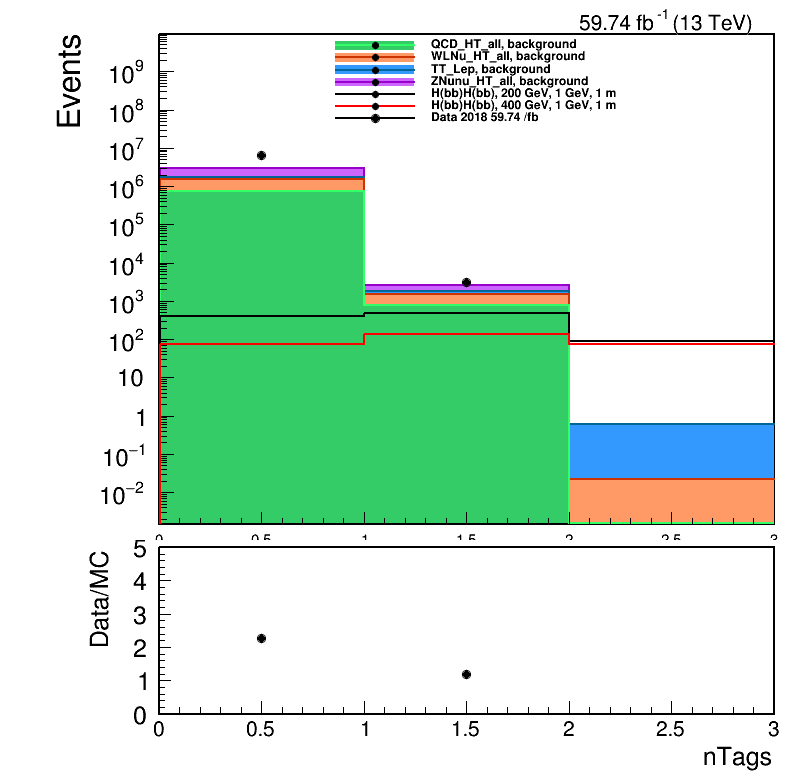

In [16]:
for var in variables:
    print('var/x_axis', var[0], 'binning', var[2], var[3], var[4])
    x_axis = var[0]
    y_axis = 'Events'
    axis_set = [x_axis, y_axis]
    bin_set = [var[2],var[3],var[4]]
    lumi = 59740 
#     outf = var[0]+'_stack.png'
    
    # Plotting THStack
    c = rt.TCanvas('c','c', 800, 800)
    ht = {}
    # leg = rt.TLegend(0.59,0.70,0.97,0.93)
    leg = rt.TLegend(0.40,0.78,0.97,0.94)

    leg.SetTextSize(0.025)
    leg.SetBorderSize(0)
    leg.SetEntrySeparation(0.01)
    
    pad1 = rt.TPad("pad1", "pad1", 0, 0.3, 1, 0.99)
    pad1.SetBottomMargin(0.03)
    # pad1.SetGridx()
    pad1.SetLogy()
    pad1.SetLeftMargin(0.2)
    pad1.SetRightMargin(0.027)
    pad1.Draw()
    pad1.cd()
    
    stack = rt.THStack( "hs" , "H Stack " )
    total = rt.TH1D('total','total',3,0,3)
    color_list = [845,806,861,876,597,625]
#     color_list = [845,800,861,806,876,597,625]
    keys = ['QCD_HT_all, background', 'WLNu_HT_all, background',  'TT_Lep, background', 'ZNunu_HT_all, background',]
#     keys = ['QCD_HT_all, background', 'WLNu_HT_all, background', 'ZNunu_HT_all, background', 'TT_Lep, background']
#     sig_keys = []
#     sig_keys = ['H(bb)H(bb), 200 GeV, 1 GeV, 1 m' ]
    sig_keys = ['H(bb)H(bb), 200 GeV, 1 GeV, 1 m', 'H(bb)H(bb), 400 GeV, 1 GeV, 1 m']
    data_keys = ['Data 2018']
    # sig_keys = ['H(bb)H(bb), N3N2, 200 GeV, 1 GeV, 1 m','H(bb)H(bb), N3N2, 400 GeV, 1 GeV, 1 m','H(bb)H(bb), N3N2, 127 GeV, 1 GeV, 1 m',  ]
    bkg_integral = 0.0
    max_value = 0
    i=0
    for k in keys:
        if 'background' in k or True:


            pt1 = var[1][k] 
            v = pt1 
            w = trg_jet_w[k] 
            pu = trg_jet_puw[k] 
            if 'QCD' in k:
                sf=1.1
                outf = var[0]+'_stack_sf_'+str(sf).replace('.','p')+'_blind.png'   
            else:
                sf=1
            print(k,len(v))
            ht[k] = create_TH1D( v, axis_title=axis_set, name=k, binning=bin_set,weights = w*pu*lumi*sf)
            ht[k].Sumw2()
            total.Add(ht[k])
            stack.Add( ht[k])
            ht[k].SetLineColor(color_list[i]+3)
            ht[k].SetFillColor(color_list[i])
            leg.AddEntry(ht[k],k)
            max_value += ht[k].GetBinContent(ht[k].GetMaximumBin())
            bkg_integral += ht[k].Integral()

            i+=1
    stack.Draw('hist')
    # stack.SetMaximum(max_value*1.5)
    stack.SetMaximum(max_value*1e+03)
    stack.SetMinimum(10e-3)
    stack.GetYaxis().SetTitle(y_axis)
    stack.GetXaxis().SetTitle(x_axis)
    stack.GetXaxis().SetLabelSize(0.03)



    i=0
    for k in sig_keys:
        pt1 = var[1][k] 
        v = pt1 
        w = trg_jet_w[k] 

        factor = bkg_integral/np.sum(w)
        print(k,'factor',1.0*np.sum(w[v>50])/np.sum(w))
        ht[k] = create_TH1D( v, axis_title=axis_set, name=k, binning=bin_set,weights = w*lumi)
        ht[k].Sumw2()
        ht[k].SetLineColor(std_color_list[i])
        print(k, std_color_list[i])
        ht[k].Draw("hist  same")
        leg.AddEntry(ht[k],k)
        max_value = max(ht[k].GetBinContent(ht[k].GetMaximumBin()),max_value)
        print('cnt',k,np.count_nonzero(w[v==2]),np.sum(w[v==2]))

        i+=1

    i=0
    for k in data_keys:
        pt1 = var[1][k] 
        for y,ele in enumerate(pt1):
            if ele==2:
                pt1[y]=3
        v = pt1 
        w = trg_jet_w[k] 

        ht[k] = create_TH1D( v, axis_title=axis_set, name=k, binning=bin_set,weights = w*1)
        ht[k].Sumw2()
        ht[k].SetLineColor(std_color_list[i])
        ht[k].SetMarkerColor(std_color_list[i])
        ht[k].SetMarkerStyle(20)
        ht[k].SetMarkerSize(1.)
        print(k, std_color_list[i])
        ht[k].Draw("p E same")
        leg.AddEntry(ht[k],k+' '+str(lumi/1000)+' /fb')

        i+=1

    leg.Draw()

    last = stack.GetStack().Last()
    total.SetFillStyle(3001)
    total.SetLineColor(1)
    total.SetFillColor(1)

    total.GetYaxis().SetTitleOffset(1.6)
#     total.Draw("same e2")
    print("total",total.GetBinContent(1),total.GetBinError(1))
    
    c.cd()
    pad2 = rt.TPad("pad2", "pad2", 0, 0, 1, 0.3)
    pad2.SetTopMargin(0.03)
    pad2.SetBottomMargin(0.25)
    # pad2.SetGrid()
    pad2.SetLeftMargin(0.2)
    pad2.SetRightMargin(0.027)
    pad2.Draw()
    pad2.cd()

    h_copy = ht['Data 2018'].Clone()
    h_copy.Divide(stack.GetStack().Last())
    h_copy.GetYaxis().SetTitleOffset(0.4)
#     h.GetYaxis().SetRangeUser(ratio_bounds[0], ratio_bounds[1])
    h_copy.GetYaxis().SetTitleSize(0.12)
    h_copy.GetYaxis().SetLabelSize(0.12)
    h_copy.GetYaxis().SetNdivisions(506)
    h_copy.SetMaximum(5)
#     h_copy.SetMaximum(3)
#     h_copy.SetMaximum(1)
#     h_copy.SetMaximum(0.5)
#     h_copy.SetMinimum(-1)
    h_copy.SetMinimum(0)



    h_copy.GetXaxis().SetTitleOffset(1)
    h_copy.GetXaxis().SetTitleSize(0.12)
    h_copy.GetXaxis().SetLabelSize(0.10)
    h_copy.GetXaxis().SetTickSize(0.07)
    h_copy.SetYTitle('Data/MC')
    h_copy.SetTitle("")
#        h.SetStats(0)
    h_copy.DrawCopy('E1')
    pad2.Update()
    
    


#     c = make_ratio_plot([total,ht['Data 2016']], fit = False, logy=True, in_tags = ["MC","Data"], ratio_bounds = [0,3])


    CMS_lumi.lumi_13TeV = str(lumi/1000)+" fb^{-1}"
    CMS_lumi.cmsText = ""
    CMS_lumi.writeExtraText = False
    CMS_lumi.CMS_lumi(c,4,3)


    c.SetLeftMargin(0.2)
    c.SetRightMargin(0.027)
    c.SetLogy()
    c.Draw()
    c.SaveAs(plotDir+outf)
 

In [22]:
# from prettytable import PrettyTable
# print('\n\n======================= Summary ==============================')
# table =  PrettyTable(['Sample', 'Bin 0 Yield', 'Bin 0 Error', 'Bin 1 Yield', 'Bin 1 Error', 'Bin 2 Yield', 'Bin 2 Error'])
# for k,v in tree.items():
#     if 'Data' in k:
#         lumi=1
#         sf=1
#     elif 'QCD' in k:
#         lumi=41500
#         sf=1.2
#     else:
#         lumi=41500
#         sf=1
#     bin0_str=np.logical_and(nTags[k]==0, 1)
#     bin1_str=np.logical_and(nTags[k]==1, 1)
#     bin2_str=np.logical_and(nTags[k]==2, 1)
#     if 'Data' not in k:
#         row = [k, round (sum(trg_jet_w[k][bin0_str])*lumi*sf, 2) , round (math.sqrt(sum(x*x for x in trg_jet_w[k][bin0_str]))*lumi*sf, 2) , round (sum(trg_jet_w[k][bin1_str])*lumi*sf, 2) , round (math.sqrt(sum(x*x for x in trg_jet_w[k][bin1_str]))*lumi*sf, 2) , round (sum(trg_jet_w[k][bin2_str])*lumi*sf, 2) , round (math.sqrt(sum(x*x for x in trg_jet_w[k][bin2_str]))*lumi*sf, 2)  ]
#     else:
#         row = [k, round (sum(trg_jet_w[k][bin0_str])*lumi*sf, 2) , round (math.sqrt(sum(x*x for x in trg_jet_w[k][bin0_str]))*lumi*sf, 2) , round (sum(trg_jet_w[k][bin1_str])*lumi*sf, 2) , round (math.sqrt(sum(x*x for x in trg_jet_w[k][bin1_str]))*lumi*sf, 2) , 0.0 , 0.0  ]
#     table.add_row(row)
        
# print(table)



======================= Summary ==============================
+---------------------------------+-------------+-------------+-------------+-------------+-------------+-------------+
|              Sample             | Bin 0 Yield | Bin 0 Error | Bin 1 Yield | Bin 1 Error | Bin 2 Yield | Bin 2 Error |
+---------------------------------+-------------+-------------+-------------+-------------+-------------+-------------+
| H(bb)H(bb), 200 GeV, 1 GeV, 1 m |    512.46   |    13.09    |    405.42   |    11.65    |    84.63    |     5.32    |
|      QCD_HT_all, background     |  569644.89  |   5573.84   |    848.48   |    84.94    |     0.0     |     0.0     |
|     WLNu_HT_all, background     |  556224.63  |    943.33   |    590.31   |    27.14    |     0.17    |     0.1     |
|     ZNunu_HT_all, background    |  770150.25  |    535.77   |    576.08   |    13.03    |      0      |     0.0     |
|        TT_Lep, background       |  147672.98  |    93.14    |    326.9    |     4.39    |    

In [23]:
# table_txt = table.get_string()
# with open(plotDir+'/BeforePredictionSummaryTable.txt','w') as file:
#     file.write(table_txt)

In [18]:
from prettytable import PrettyTable
print('\n\n======================= Summary ==============================')
table =  PrettyTable(['Sample', 'Bin 0 Yield', 'Bin 0 Error', 'Bin 1 Yield', 'Bin 1 Error', 'Bin 2 Yield', 'Bin 2 Error'])
for k,v in tree.items():
    if 'Data' in k:
        lumi=1
        sf=1
    elif 'QCD' in k:
        lumi=59740
        sf=1.2*2
    elif 'background' in k:
        lumi=59740
        sf=2
    elif '400' in k:
        lumi=59740
        sf=2
    else:
        lumi=59740
        sf=1
    bin0_str=np.logical_and(nTags[k]==0, 1)
    bin1_str=np.logical_and(nTags[k]==1, 1)
    bin2_str=np.logical_and(nTags[k]==2, 1)
    if 'Data' not in k:
        row = [k, round (sum(trg_jet_w[k][bin0_str])*lumi*sf, 2) , round (math.sqrt(sum(x*x for x in trg_jet_w[k][bin0_str]))*lumi*sf, 2) , round (sum(trg_jet_w[k][bin1_str])*lumi*sf, 2) , round (math.sqrt(sum(x*x for x in trg_jet_w[k][bin1_str]))*lumi*sf, 2) , round (sum(trg_jet_w[k][bin2_str])*lumi*sf, 2) , round (math.sqrt(sum(x*x for x in trg_jet_w[k][bin2_str]))*lumi*sf, 2)  ]
    else:
        row = [k, round (sum(trg_jet_w[k][bin0_str])*lumi*sf, 2) , round (math.sqrt(sum(x*x for x in trg_jet_w[k][bin0_str]))*lumi*sf, 2) , round (sum(trg_jet_w[k][bin1_str])*lumi*sf, 2) , round (math.sqrt(sum(x*x for x in trg_jet_w[k][bin1_str]))*lumi*sf, 2) , 0.0 , 0.0  ]
    table.add_row(row)
        
print(table)



======================= Summary ==============================
+---------------------------------+-------------+-------------+-------------+-------------+-------------+-------------+
|              Sample             | Bin 0 Yield | Bin 0 Error | Bin 1 Yield | Bin 1 Error | Bin 2 Yield | Bin 2 Error |
+---------------------------------+-------------+-------------+-------------+-------------+-------------+-------------+
| H(bb)H(bb), 400 GeV, 1 GeV, 1 m |    146.08   |     1.03    |    280.7    |     1.43    |    147.69   |     1.04    |
| H(bb)H(bb), 200 GeV, 1 GeV, 1 m |    395.81   |    13.81    |    476.23   |    15.14    |    87.16    |     6.48    |
|      QCD_HT_all, background     |  1640582.3  |   16047.67  |   1888.73   |    216.75   |     0.0     |     0.0     |
|     WLNu_HT_all, background     |  1601726.33 |   2716.14   |   1389.81   |    70.42    |     0.05    |     0.05    |
|     ZNunu_HT_all, background    |  2217573.75 |    1542.6   |   1405.97   |    34.77    |    

In [19]:
table_txt = table.get_string()
with open(plotDir+'/DNNV3_LUMI_BeforePredictionSummaryTable.txt','w') as file:
# with open(plotDir+'/LUMI_CutBase_BeforePredictionSummaryTable.txt','w') as file:
    file.write(table_txt)

In [16]:
from prettytable import PrettyTable
print('\n\n======================= Summary ==============================')
table =  PrettyTable(['Sample', 'Bin 0 Entries','Bin 0 Yield', 'Bin 0 Error', 'Bin 1 Yield', 'Bin 1 Error', 'Bin 2 Yield', 'Bin 2 Error'])
for k,v in tree.items():
    if 'Data' in k:
        lumi=1
        sf=1
    elif 'QCD' in k:
        lumi=59740
        sf=1.2
    elif '400' in k:
        lumi=59740
        sf=2
    else:
        lumi=59740
        sf=1
    bin0_str=np.logical_and(nTags[k]==0, 1)
    bin1_str=np.logical_and(nTags[k]==1, 1)
    bin2_str=np.logical_and(nTags[k]==2, 1)
    if 'Data' not in k:
        row = [k, len(trg_jet_w[k][bin0_str]),round (sum(trg_jet_w[k][bin0_str])*lumi*sf, 2) , round (math.sqrt(sum(x*x for x in trg_jet_w[k][bin0_str]))*lumi*sf, 2) , round (sum(trg_jet_w[k][bin1_str])*lumi*sf, 2) , round (math.sqrt(sum(x*x for x in trg_jet_w[k][bin1_str]))*lumi*sf, 2) , round (sum(trg_jet_w[k][bin2_str])*lumi*sf, 2) , round (math.sqrt(sum(x*x for x in trg_jet_w[k][bin2_str]))*lumi*sf, 2)  ]
    else:
        row = [k, round (sum(trg_jet_w[k][bin0_str])*lumi*sf, 2) , round (math.sqrt(sum(x*x for x in trg_jet_w[k][bin0_str]))*lumi*sf, 2) , round (sum(trg_jet_w[k][bin1_str])*lumi*sf, 2) , round (math.sqrt(sum(x*x for x in trg_jet_w[k][bin1_str]))*lumi*sf, 2) , 0.0 , 0.0  ]
    table.add_row(row)
        
print(table)



======================= Summary ==============================
+-------------------------+---------------+-------------+-------------+-------------+-------------+-------------+-------------+
|          Sample         | Bin 0 Entries | Bin 0 Yield | Bin 0 Error | Bin 1 Yield | Bin 1 Error | Bin 2 Yield | Bin 2 Error |
+-------------------------+---------------+-------------+-------------+-------------+-------------+-------------+-------------+
| WLNu_HT_bin, background |      182      |  21745360.0 |  1611873.32 |      0      |     0.0     |      0      |     0.0     |
| WLNu_no_bin, background |       3       |   358440.0  |  206945.43  |      0      |     0.0     |      0      |     0.0     |
+-------------------------+---------------+-------------+-------------+-------------+-------------+-------------+-------------+


In [17]:
table_txt = table.get_string()
# with open(plotDir+'/LUMIBeforePredictionSummaryTable.txt','w') as file:
# with open(plotDir+'/LUMI_CutBase_BeforePredictionSummaryTable.txt','w') as file:
with open(plotDir+'/LUMI_DNNv2_BeforePredictionSummaryTable.txt','w') as file:
    file.write(table_txt)

In [26]:
from prettytable import PrettyTable
print('\n\n======================= Summary ==============================')
table =  PrettyTable(['Sample', 'Bin 0 Yield', 'Bin 0 Error', 'Bin 1 Yield', 'Bin 1 Error', 'Bin 2 Yield', 'Bin 2 Error'])
for k,v in tree.items():
    if 'Data' in k:
        lumi=1
        sf=1
    elif 'QCD' in k:
        lumi=59740
        sf=1
    else:
        lumi=59740
        sf=1
    bin0_str=np.logical_and(nTags[k]==0, 1)
    bin1_str=np.logical_and(nTags[k]==1, 1)
    bin2_str=np.logical_and(nTags[k]==2, 1)
    if 'Data' not in k:
        row = [k, round (sum(trg_jet_w[k][bin0_str])*lumi*sf, 2) , round (math.sqrt(sum(x*x for x in trg_jet_w[k][bin0_str]))*lumi*sf, 2) , round (sum(trg_jet_w[k][bin1_str])*lumi*sf, 2) , round (math.sqrt(sum(x*x for x in trg_jet_w[k][bin1_str]))*lumi*sf, 2) , round (sum(trg_jet_w[k][bin2_str])*lumi*sf, 2) , round (math.sqrt(sum(x*x for x in trg_jet_w[k][bin2_str]))*lumi*sf, 2)  ]
    else:
        row = [k, round (sum(trg_jet_w[k][bin0_str])*lumi*sf, 2) , round (math.sqrt(sum(x*x for x in trg_jet_w[k][bin0_str]))*lumi*sf, 2) , round (sum(trg_jet_w[k][bin1_str])*lumi*sf, 2) , round (math.sqrt(sum(x*x for x in trg_jet_w[k][bin1_str]))*lumi*sf, 2) , 0.0 , 0.0  ]
    table.add_row(row)
        
print(table)



======================= Summary ==============================
+---------------------------------+-------------+-------------+-------------+-------------+-------------+-------------+
|              Sample             | Bin 0 Yield | Bin 0 Error | Bin 1 Yield | Bin 1 Error | Bin 2 Yield | Bin 2 Error |
+---------------------------------+-------------+-------------+-------------+-------------+-------------+-------------+
| H(bb)H(bb), 200 GeV, 1 GeV, 1 m |    737.69   |    18.85    |    583.6    |    16.76    |    121.83   |     7.66    |
|      QCD_HT_all, background     |   683345.1  |   6686.36   |   1017.83   |    101.9    |      0      |     0.0     |
|     WLNu_HT_all, background     |  800695.41  |   1357.95   |    849.76   |    39.07    |     0.24    |     0.14    |
|     ZNunu_HT_all, background    |  1108645.21 |    771.26   |    829.28   |    18.76    |      0      |     0.0     |
|        TT_Lep, background       |  212577.93  |    134.08   |    470.58   |     6.31    |    

In [27]:
table_txt = table.get_string()
with open(plotDir+'/NOQCDSF_LUMIBeforePredictionSummaryTable.txt','w') as file:
    file.write(table_txt)

# Tag Eff

In [29]:
from itertools import chain 

wall = {}
wnum = {}

pt_denall = {}
eta_denall = {}
pt_numall = {}
eta_numall = {}

pt_den_all = {}
eta_den_all = {}
pt_num_all = {}
eta_num_all = {}

pt_pEff = {}
eta_pEff = {}

for k,v in tree.items():
    print(k,v)
    
    # denominator
    pt_denall[k] = np.array(trg_jet_pt[k].flatten())
    eta_denall[k] = np.array(trg_jet_eta[k].flatten())
    
    wall[k] = [np.array([x]*len(y)) for x,y in zip(trg_jet_w[k],trg_jet_pt[k])]
    wall[k] = list(chain.from_iterable(wall[k])) 
    
    print(len(pt_denall[k]))
    print(len(eta_denall[k]))
    print(len(wall[k]))
    
  
    #numerator
    pt_numall[k] = np.array(tag_jet_pt[k].flatten())
    eta_numall[k] =  np.array(tag_jet_eta[k].flatten())
    
    wnum[k] = [np.array([x]*len(y)) for x,y in zip(trg_jet_w[k], tag_jet_pt[k])]
    wnum[k] = list(chain.from_iterable(wnum[k])) 
    
#     print(len(trg_jet_w[k]))
#     print(len(tag_jet_pt[k]))
    
    print(len(pt_numall[k]))
    print(len(eta_numall[k]))
#     print(max(eta_numall[k]))
#     print(min(eta_numall[k]))
#     print(eta_numall[k])
#     print(pt_numall[k])
    print(len(wnum[k]))
    
    #histogram
    pt_num_all[k] = create_TH1D( pt_numall[k], axis_title=['jetPt [GeV]', 'fraction of events'], name="", binning=[100,-0,1000], weights=wnum[k])
    pt_den_all[k] = create_TH1D( pt_denall[k], axis_title=['jetPt [GeV]', 'fraction of events'], name="", binning=[100,-0,1000], weights=wall[k])

#     pt_den_all[k] = create_TH1D( pt_denall[k], axis_title=['jetPt [GeV]', 'fraction of events'], name="", binning=[20,-0,1000], weights=wall[k])
#     pt_num_all[k] = create_TH1D( pt_numall[k], axis_title=['jetPt [GeV]', 'fraction of events'], name="", binning=[20,-0,1000], weights=wnum[k])
    
#     pt_den_all[k] = create_TH1D( pt_denall[k], axis_title=['jetPt [GeV]', 'fraction of events'], name="", binning=[10,-0,100], weights=wall[k])
#     pt_num_all[k] = create_TH1D( pt_numall[k], axis_title=['jetPt [GeV]', 'fraction of events'], name="", binning=[10,-0,100], weights=wnum[k])
    
    eta_den_all[k] = create_TH1D( eta_denall[k], axis_title=['jetEta ', 'fraction of events'], name="", binning=[20,-1.5,1.5], weights=wall[k])
    eta_num_all[k] = create_TH1D( eta_numall[k], axis_title=['jetEta', 'fraction of events'], name="", binning=[20,-1.5,1.5], weights=wnum[k])

    #rebin 
    x=array('d', [1,10,20,30,40,50,60,70,80,90,100,200,300,400,500,600,700,800,900,1000])
#     x=array('d', [1,10,20,30,40,50,60,70,80,90,100])
    
    pt_den_all[k]=pt_den_all[k].Rebin(len(x)-1,'',x)
    pt_num_all[k]=pt_num_all[k].Rebin(len(x)-1,'',x)
    
    #efficiency
    pt_pEff[k] = rt.TEfficiency(pt_num_all[k], pt_den_all[k])
#     eta_pEff[k] = rt.TEfficiency(eta_num_all[k], eta_den_all[k])
    

H(bb)H(bb), 400 GeV, 1 GeV, 1 m <TTree b'SusyLLPTree' at 0x7f15f7da6780>
1247
1247
1247
579
579
579
H(bb)H(bb), 200 GeV, 1 GeV, 1 m <TTree b'SusyLLPTree' at 0x7f173fa6ba90>
19
19
19
6
6
6
Data 2018 <TTree b'SusyLLPTree' at 0x7f174b5c7828>
1172577
1172577
1172577
402
402
402


Warning in <TH1D::Rebin>: Bin edge 1 of rebinned histogram does not match any bin edges of the old histogram. Result can be inconsistent
Warning in <TH1D::Rebin>: Bin edge 1 of rebinned histogram does not match any bin edges of the old histogram. Result can be inconsistent
Info in <TEfficiency::TEfficiency>: given histograms are filled with weights
Info in <TROOT::TEfficiency::SetUseWeightedEvents>: Handle weighted events for computing efficiency
Warning in <TH1D::Rebin>: Bin edge 1 of rebinned histogram does not match any bin edges of the old histogram. Result can be inconsistent
Warning in <TH1D::Rebin>: Bin edge 1 of rebinned histogram does not match any bin edges of the old histogram. Result can be inconsistent
Info in <TEfficiency::TEfficiency>: given histograms are filled with weights
Info in <TROOT::TEfficiency::SetUseWeightedEvents>: Handle weighted events for computing efficiency
Warning in <TH1D::Rebin>: Bin edge 1 of rebinned histogram does not match any bin edges of the old

In [30]:
variables = [
    
#         ['jetPt [GeV]', pt_pEff, 'pt', -0.0002, 0.02],
        ['jetPt [GeV]', pt_pEff, 'pt', -0.0002, 0.005],
#         ['jetEta', eta_pEff, 'eta', -0.0002, 0.005],
    
]

var/x_axis jetPt [GeV] name pt range -0.0002 0.005
H(bb)H(bb), 400 GeV, 1 GeV, 1 m <TTree b'SusyLLPTree' at 0x7f15f7da6780>
H(bb)H(bb), 200 GeV, 1 GeV, 1 m <TTree b'SusyLLPTree' at 0x7f173fa6ba90>
Data 2018 <TTree b'SusyLLPTree' at 0x7f174b5c7828>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /storage/user/jmao/gpu/jmao/cms-llp/plots/20201205/2018_sigmatch/dnn_v3_1lep/tag_eff_jet_pt_rebin.png has been created


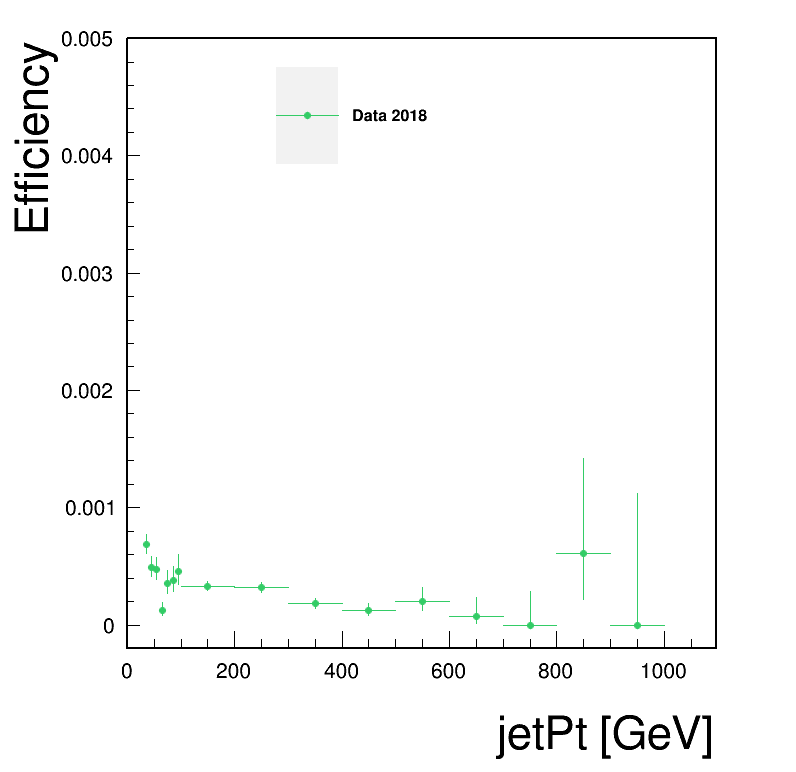

In [31]:

   

color_list = [845,800,861,806,1,876,597,625]

pEff = {}
for var in variables:
    print('var/x_axis', var[0], 'name', var[2], 'range',var[3],var[4])
#     outf = 'tag_eff_jet_'+var[2]+'_pt100.png'
#     outf = 'tag_eff_jet_'+var[2]+'.png'
    outf = 'tag_eff_jet_'+var[2]+'_rebin.png'
    c = rt.TCanvas('c','c', 800, 800)
    leg = rt.TLegend(0.33,0.76,0.78,0.94)
    leg.SetTextSize(0.022)
    leg.SetBorderSize(0)
    leg.SetEntrySeparation(0.01)
    i = 0
    for k,v in tree.items(): 
        print(k,v)


        if 'bb' not in k:
#         if 'QCD' in k:
            pEff[k] = var[1][k]
#             pEff[k] = rt.TEfficiency(eta_num_all[k], eta_den_all[k])
#             pEff[k] = rt.TEfficiency(pt_num_all[k], pt_den_all[k])
            pEff[k].SetTitle("efficiency;"+var[0]+";Efficiency")

            pEff[k].SetLineColor(color_list[i])
            pEff[k].SetMarkerColor(color_list[i])
            pEff[k].SetMarkerSize(0.8)
            pEff[k].SetMarkerStyle(20)

            if i==0:
                pEff[k].Draw("apez")
            else:
                pEff[k].Draw("pezsame")

            rt.gPad.Update()        
            #pEff[k].GetPaintedHistogram().GetXaxis().SetRangeUser(x[0],x[-1])
            pEff[k].GetPaintedGraph().SetMarkerStyle(8)
            pEff[k].GetPaintedGraph().SetMarkerSize(20)        
            pEff[k].GetPaintedGraph().SetLineColor(color_list[i])        
            pEff[k].GetPaintedGraph().SetMarkerColor(color_list[i])        
            pEff[k].GetPaintedGraph().SetMinimum(var[3])
            pEff[k].GetPaintedGraph().SetMaximum(var[4])
            pEff[k].GetPaintedGraph().GetXaxis().SetLabelSize(0.03)
            pEff[k].GetPaintedGraph().GetYaxis().SetLabelSize(0.03)


#             print('dim: ', pEff[k].GetDimension())
#             print('binN: ', pEff[k].GetPaintedGraph().GetN())
#             print('binN: ', pEff[k].GetPassedHistogram().GetNbinsX())
#             for cnt in range(10):
#                 print(cnt)
#                 print('bin central x value: ', pEff[k].GetPassedHistogram().GetBinCenter(cnt))
#                 print('bin central y value: ', pEff[k].GetEfficiency(cnt))
#                 print('bin error y low: ', pEff[k].GetEfficiencyErrorLow(cnt))
#                 print('bin error y up: ', pEff[k].GetEfficiencyErrorUp(cnt))

            i += 1



            leg.AddEntry(pEff[k],k)

    leg.Draw()

    # c.SetLogy()
    c.SetRightMargin(0.1)
    c.Update()
    c.Draw()
    c.SaveAs(plotDir+outf)


var/x_axis jetPt [GeV] name pt range -0.0002 0.005
H(bb)H(bb), 400 GeV, 1 GeV, 1 m <TTree b'SusyLLPTree' at 0x7f15f7da6780>
H(bb)H(bb), 200 GeV, 1 GeV, 1 m <TTree b'SusyLLPTree' at 0x7f173fa6ba90>
Data 2018 <TTree b'SusyLLPTree' at 0x7f174b5c7828>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /storage/user/jmao/gpu/jmao/cms-llp/plots/20201205/2018_sigmatch/dnn_v3_1lep/tag_eff_jet_pt_rebin_logX.png has been created


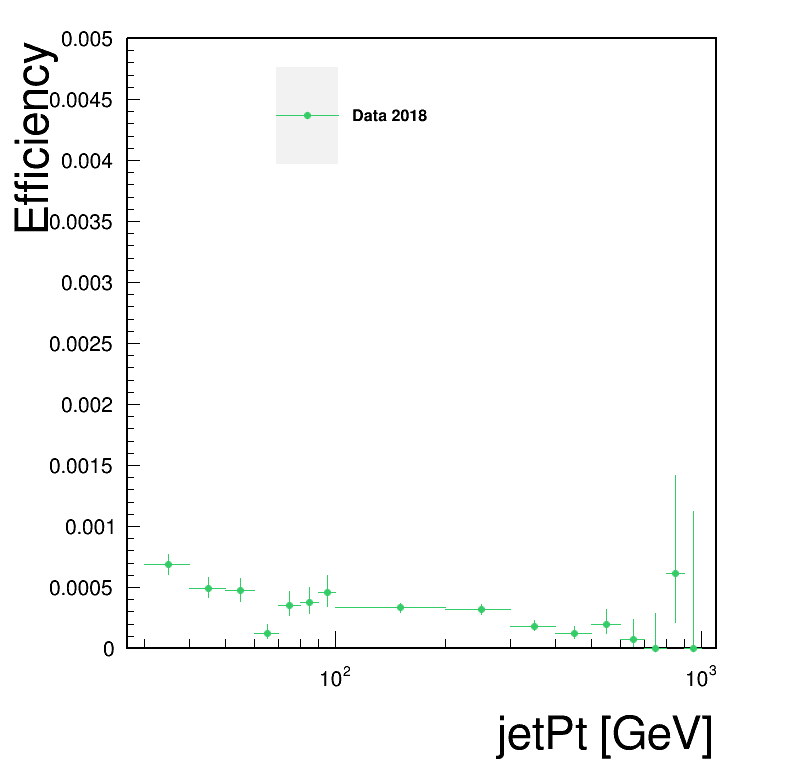

In [32]:

   

color_list = [845,800,861,806,1,876,597,625]

pEff = {}
for var in variables:
    print('var/x_axis', var[0], 'name', var[2], 'range',var[3],var[4])
#     outf = 'tag_eff_jet_'+var[2]+'_pt100.png'
#     outf = 'tag_eff_jet_'+var[2]+'_logX.png'
    outf = 'tag_eff_jet_'+var[2]+'_rebin_logX.png'
    c = rt.TCanvas('c','c', 800, 800)
    leg = rt.TLegend(0.33,0.76,0.78,0.94)
    leg.SetTextSize(0.022)
    leg.SetBorderSize(0)
    leg.SetEntrySeparation(0.01)
    i = 0
    for k,v in tree.items(): 
        print(k,v)


        if 'bb' not in k:
#         if 'QCD' in k:
            pEff[k] = var[1][k]
#             pEff[k] = rt.TEfficiency(eta_num_all[k], eta_den_all[k])
#             pEff[k] = rt.TEfficiency(pt_num_all[k], pt_den_all[k])
            pEff[k].SetTitle("efficiency;"+var[0]+";Efficiency")

            pEff[k].SetLineColor(color_list[i])
            pEff[k].SetMarkerColor(color_list[i])
            pEff[k].SetMarkerSize(0.8)
            pEff[k].SetMarkerStyle(20)

            if i==0:
                pEff[k].Draw("apez")
            else:
                pEff[k].Draw("pezsame")

            rt.gPad.Update()        
            #pEff[k].GetPaintedHistogram().GetXaxis().SetRangeUser(x[0],x[-1])
            pEff[k].GetPaintedGraph().SetMarkerStyle(8)
            pEff[k].GetPaintedGraph().SetMarkerSize(20)        
            pEff[k].GetPaintedGraph().SetLineColor(color_list[i])        
            pEff[k].GetPaintedGraph().SetMarkerColor(color_list[i])        
            pEff[k].GetPaintedGraph().SetMinimum(var[3])
            pEff[k].GetPaintedGraph().SetMaximum(var[4])
            pEff[k].GetPaintedGraph().GetXaxis().SetLabelSize(0.03)
            pEff[k].GetPaintedGraph().GetYaxis().SetLabelSize(0.03)


#             print('dim: ', pEff[k].GetDimension())
#             print('binN: ', pEff[k].GetPaintedGraph().GetN())
#             print('binN: ', pEff[k].GetPassedHistogram().GetNbinsX())
#             for cnt in range(10):
#                 print(cnt)
#                 print('bin central x value: ', pEff[k].GetPassedHistogram().GetBinCenter(cnt))
#                 print('bin central y value: ', pEff[k].GetEfficiency(cnt))
#                 print('bin error y low: ', pEff[k].GetEfficiencyErrorLow(cnt))
#                 print('bin error y up: ', pEff[k].GetEfficiencyErrorUp(cnt))

            i += 1



            leg.AddEntry(pEff[k],k)

    leg.Draw()

    c.SetLogx()
    c.SetRightMargin(0.1)
    c.Update()
    c.Draw()
    c.SaveAs(plotDir+outf)


In [33]:
from prettytable import PrettyTable
print('\n\n======================= Summary ==============================')
table =  PrettyTable(['Sample', 'All Yield', 'Passed Yield', 'Rate'])
SumAll = 0
SumNum = 0
for k,v in tree.items():
    if 'Data' in k:
        lumi=1
        sf=1
    elif 'QCD' in k:
        lumi=59740
        sf=1.2
    elif '400' in k:
        lumi=59740
        sf=2
    else:
        lumi=59740
        sf=1
    row = [k, round (sum(wall[k])*lumi*sf, 2) ,  round (sum(wnum[k])*lumi*sf, 2) ,  round (sum(wnum[k])/sum(wall[k]), 6) ]
    if 'Data' not in k:
        if 'bb' not in k:
            SumAll += sum(wall[k])
            SumNum += sum(wnum[k])
    table.add_row(row)

# row = ['BKG MC', round (SumAll*lumi*sf, 2) ,  round (SumNum*lumi*sf, 2) ,  round (SumNum/SumAll, 6) ]
# table.add_row(row)

print(table)



======================= Summary ==============================
+---------------------------------+-----------+--------------+----------+
|              Sample             | All Yield | Passed Yield |   Rate   |
+---------------------------------+-----------+--------------+----------+
| H(bb)H(bb), 400 GeV, 1 GeV, 1 m |    9.07   |     4.21     | 0.464314 |
| H(bb)H(bb), 200 GeV, 1 GeV, 1 m |    9.15   |     2.89     | 0.315789 |
|            Data 2018            | 1172577.0 |    402.0     | 0.000343 |
+---------------------------------+-----------+--------------+----------+


In [34]:
table_txt = table.get_string()
with open(plotDir+'/CutBased_59p74pb_TagEffSummaryTable.txt','w') as file:
# with open(plotDir+'/TagEffSummaryTable.txt','w') as file:
    file.write(table_txt)

## DATA V3 ROC

In [16]:
flat_jet_dnnv3 = {}

for k,v in tree.items():
    print(k,v)
    
    flat_jet_dnnv3[k] = trg_jet_dnnv3[k].flatten()


H(bb)H(bb), 400 GeV, 1 GeV, 1 m <TTree b'SusyLLPTree' at 0x7f03d5147208>
H(bb)H(bb), 200 GeV, 1 GeV, 1 m <TTree b'SusyLLPTree' at 0x7f03c92e4358>
Data 2018 <TTree b'SusyLLPTree' at 0x7f03c884f9e8>


In [24]:
# 0lep case
data_cutbase_eff = 0.000422
sig200_cutbase_eff = 0.49863
sig400_cutbase_eff = 0.481758
#1lep case
# data_cutbase_eff = 0.000343
# sig200_cutbase_eff = 0.315789
# sig400_cutbase_eff = 0.464314

In [18]:
wall = {}
 
for k,v in tree.items():
    wall[k] = [np.array([x]*len(y)) for x,y in zip(trg_jet_w[k],trg_jet_pt[k])]
    wall[k] = list(chain.from_iterable(wall[k])) 
    
 
    print(len(trg_jet_w[k]))
    print(len(trg_jet_pt[k]))
    print(len(wall[k]))
    
    

80904
80904
131279
2029
2029
2223
6518119
6518119
7179255


In [19]:
### ROC curve v3

var = [flat_jet_dnnv3  ]
axis = [['jetDNNScoreV3','Events']  ]
name = ['jetDNNScoreV3'   ]
bins = [[50,0,1]  ]
maxs = [1 ]
 
for i in range(len(var)):
    v = var[i]
    Noeffv3 = {}

    thre = maxs[i]*np.array(range(1,1000))/1000.0
    print(maxs[i],name[i],'thre range',np.max(thre),np.min(thre))
    print(name[i])
    for k in tree.keys():
        v = var[i][k]
        print(k,len(v))
        if len(v)==0:
            print('no')
            Noeffv3[k] = []
            for th in thre:
                Noeffv3[k].append(1.0)
            Noeffv3[k] = np.array(Noeffv3[k])
        else:
            Noeffv3[k] = []
            McSumNum = np.zeros(len(thre))
            for th in thre:
                pass_str = np.logical_and(1, v>th)
                Noeffv3[k].append(1.0*np.sum(np.array(wall[k])[pass_str])/np.sum(wall[k]))
            Noeffv3[k] = np.array(Noeffv3[k])
 

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in greater


1 jetDNNScoreV3 thre range 0.999 0.001
jetDNNScoreV3
H(bb)H(bb), 400 GeV, 1 GeV, 1 m 131279
H(bb)H(bb), 200 GeV, 1 GeV, 1 m 2223
Data 2018 7179255


In [25]:
# define working points v3
data_keys = ['Data 2018']
for data_k in data_keys:
    print(data_k)
    DataEffv3 = Noeffv3[data_k]
    
aim_nothre_cntv3 = 0
aim_nothre_ptv3 = 1.
dis_noeff_ptv3 = 999

cntv3=0
for cntv3,ele in enumerate(DataEffv3):
    this_nodis = abs(ele-data_cutbase_eff)
    if this_nodis<dis_noeff_ptv3:
        dis_noeff_ptv3 = this_nodis
        aim_nothre_cntv3 = cntv3
        aim_nothre_ptv3 = thre[cntv3]

print(aim_nothre_cntv3,aim_nothre_ptv3,dis_noeff_ptv3)

Data 2018
989 0.99 7.292454439910558e-06


[0.49863] [0.000422]
[0.61943312] [0.00042929]
[0.481758] [0.000422]
[0.64237239] [0.00042929]


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /storage/user/jmao/gpu/jmao/cms-llp/plots/20210131/2018_sigmatch/dnn_v3_0lep_roc/V3_ROC_DNN_Data_BKG_SigH(bb)H(bb), 200 GeV, 1 GeV, 1 mGeV.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /storage/user/jmao/gpu/jmao/cms-llp/plots/20210131/2018_sigmatch/dnn_v3_0lep_roc/V3_ROC_DNN_Data_BKG_SigH(bb)H(bb), 400 GeV, 1 GeV, 1 mGeV.png has been created


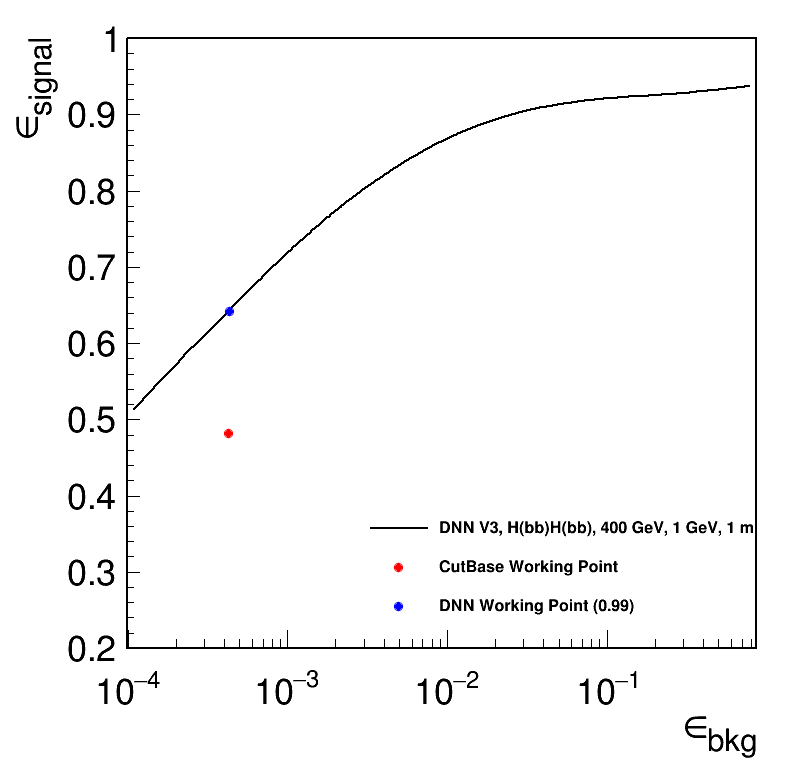

In [26]:
### ROC curve All MC Bkg
 

# sig_keys = ['H(bb)H(bb), 200 GeV, 1 GeV, 1 m',]
minimum_set=0.2
maximum_set=1.0
sig_keys = ['H(bb)H(bb), 200 GeV, 1 GeV, 1 m','H(bb)H(bb), 400 GeV, 1 GeV, 1 m']
sig_cutbase_effs = {}
sig_cutbase_effs['H(bb)H(bb), 200 GeV, 1 GeV, 1 m'] = sig200_cutbase_eff
sig_cutbase_effs['H(bb)H(bb), 400 GeV, 1 GeV, 1 m'] = sig400_cutbase_eff

for sig_k in sig_keys:
    i=0
    c = rt.TCanvas('c','c', 800, 800)
    leg = rt.TLegend(0.45,0.19,0.86,0.34)
#     leg = rt.TLegend(0.65,0.19,0.86,0.34)
    leg.SetTextSize(0.022)
    leg.SetBorderSize(0)
    leg.SetEntrySeparation(0.01)
    gr = {}
    purity = {}

    #     Plotting ROC curve v3
    gr['Datav3'+sig_k] = create_TGraph(DataEffv3,Noeffv3[sig_k],axis_title = ['#epsilon_{bkg}','#epsilon_{signal}'])
    gr['Datav3'+sig_k].SetLineColor(std_color_list[i])
    gr['Datav3'+sig_k].SetLineWidth(2)
    gr['Datav3'+sig_k].SetMinimum(minimum_set)
    gr['Datav3'+sig_k].SetMaximum(maximum_set)
    gr['Datav3'+sig_k].GetYaxis().SetRangeUser(0.0, 1.0)
    gr['Datav3'+sig_k].GetXaxis().SetLimits(0.0, 1.0)

    gr['Datav3'+sig_k].Draw('ac')
    leg.AddEntry(gr['Datav3'+sig_k],'DNN V3, '+sig_k, 'l')
    


    #cutbased working point
    i+=1
    cutbase_eff_sig_pt = np.array([sig_cutbase_effs[sig_k]]) 
    cutbase_eff_bkg_pt = np.array([data_cutbase_eff]) 
    print(cutbase_eff_sig_pt,cutbase_eff_bkg_pt)
    gr['CutBase'+sig_k] = create_TGraph(cutbase_eff_bkg_pt,cutbase_eff_sig_pt,axis_title = ['#epsilon_{bkg}','#epsilon_{signal}'])
    gr['CutBase'+sig_k].SetMarkerSize(1.)
    gr['CutBase'+sig_k].SetMarkerColor(std_color_list[i])
    gr['CutBase'+sig_k].SetLineColor(std_color_list[i])
    gr['CutBase'+sig_k].SetMinimum(minimum_set)
    gr['CutBase'+sig_k].SetMaximum(maximum_set)
    gr['CutBase'+sig_k].GetYaxis().SetRangeUser(0.0, 1.0)
    gr['CutBase'+sig_k].GetXaxis().SetLimits(0.0, 1.0)


    gr['CutBase'+sig_k].Draw('psame')
    leg.AddEntry(gr['CutBase'+sig_k],'CutBase Working Point','p')
    
    #aiming dnn working point
    i+=1
    dnn_eff_sig_pt = np.array([Noeffv3[sig_k][aim_nothre_cntv3]]) 
    dnn_eff_bkg_pt = np.array([DataEffv3[aim_nothre_cntv3]]) 
    print(dnn_eff_sig_pt,dnn_eff_bkg_pt)
    gr['AimDNNv3'+sig_k] = create_TGraph(dnn_eff_bkg_pt,dnn_eff_sig_pt,axis_title = ['#epsilon_{bkg}','#epsilon_{signal}'])
    gr['AimDNNv3'+sig_k].SetMarkerSize(1.)
    gr['AimDNNv3'+sig_k].SetMarkerColor(std_color_list[i])
    gr['AimDNNv3'+sig_k].SetLineColor(std_color_list[i])
    gr['AimDNNv3'+sig_k].SetMinimum(minimum_set)
    gr['AimDNNv3'+sig_k].SetMaximum(maximum_set)
    gr['AimDNNv3'+sig_k].GetYaxis().SetRangeUser(0.0, 1.0)
    gr['AimDNNv3'+sig_k].GetXaxis().SetLimits(0.0, 1.0)


    gr['AimDNNv3'+sig_k].Draw('psame')
    leg.AddEntry(gr['AimDNNv3'+sig_k],'DNN Working Point ('+str(aim_nothre_ptv3)+')','p')
    
    #old aiming dnn working point
#     i+=1
#     old_dnn_eff_sig_pt = np.array([Noeffv3[sig_k][cnt_oldv3]]) 
#     old_dnn_eff_bkg_pt = np.array([DataEffv3[cnt_oldv3]]) 
#     print(old_dnn_eff_sig_pt,old_dnn_eff_bkg_pt)
#     gr['OldAimDNNv3'+sig_k] = create_TGraph(old_dnn_eff_bkg_pt,old_dnn_eff_sig_pt,axis_title = ['#epsilon_{bkg}','#epsilon_{signal}'])
#     gr['OldAimDNNv3'+sig_k].SetMarkerSize(1.)
#     gr['OldAimDNNv3'+sig_k].SetMarkerColor(std_color_list[i])
#     gr['OldAimDNNv3'+sig_k].SetLineColor(std_color_list[i])
#     gr['OldAimDNNv3'+sig_k].SetMinimum(0.4)
#     gr['OldAimDNNv3'+sig_k].GetYaxis().SetRangeUser(0.0, 1.0)
#     gr['OldAimDNNv3'+sig_k].GetXaxis().SetLimits(0.0, 1.0)


#     gr['OldAimDNNv3'+sig_k].Draw('psame')
#     leg.AddEntry(gr['OldAimDNNv3'+sig_k],'DNN Working Point ('+str(pt_thre_oldv3)+')','p')
        
 
    leg.Draw()
    c.SetLogx()

    c.Draw()
    c.SaveAs(plotDir+'V3_ROC_DNN_Data_BKG_Sig'+sig_k+'GeV.png')


[0.49863] [0.000422]
[0.61943312] [0.00042929]
[0.481758] [0.000422]
[0.64237239] [0.00042929]


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /storage/user/jmao/gpu/jmao/cms-llp/plots/20210131/2018_sigmatch/dnn_v3_0lep_roc/V3_ROC_DNN_Data_BKG_SIG.png has been created


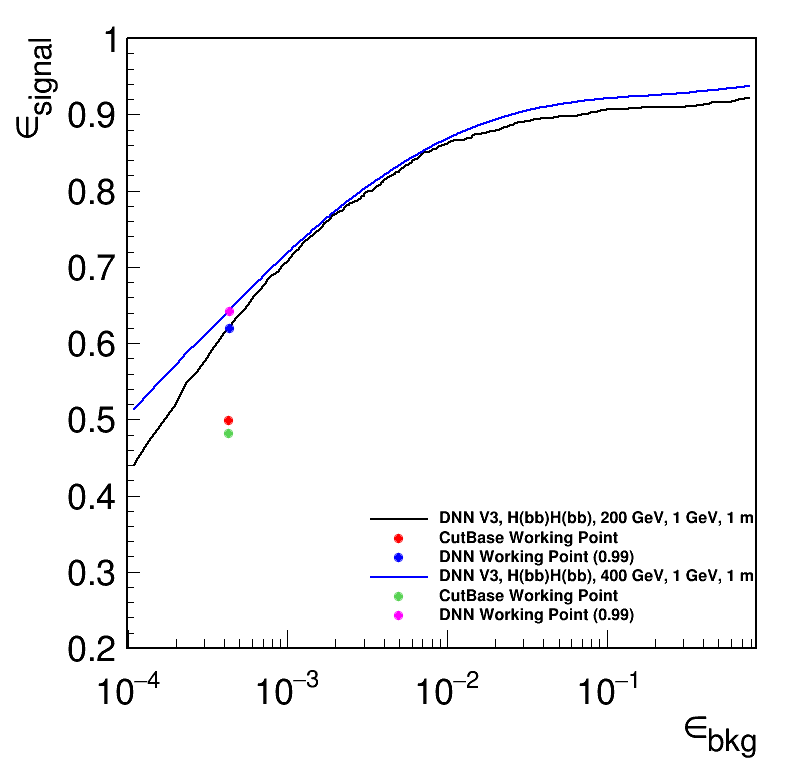

In [27]:
### ROC curve All MC Bkg
 

sig_keys = ['H(bb)H(bb), 200 GeV, 1 GeV, 1 m','H(bb)H(bb), 400 GeV, 1 GeV, 1 m']
sig_cutbase_effs = {}
sig_cutbase_effs['H(bb)H(bb), 200 GeV, 1 GeV, 1 m'] = sig200_cutbase_eff
sig_cutbase_effs['H(bb)H(bb), 400 GeV, 1 GeV, 1 m'] = sig400_cutbase_eff

i=0
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.45,0.19,0.86,0.34)
#     leg = rt.TLegend(0.65,0.19,0.86,0.34)
leg.SetTextSize(0.022)
leg.SetBorderSize(0)
leg.SetEntrySeparation(0.01)
gr = {}
purity = {}
for sig_k in sig_keys:


    #     Plotting ROC curve v3
    gr['Datav3'+sig_k] = create_TGraph(DataEffv3,Noeffv3[sig_k],axis_title = ['#epsilon_{bkg}','#epsilon_{signal}'])
    gr['Datav3'+sig_k].SetLineColor(std_color_list[i])
    gr['Datav3'+sig_k].SetLineWidth(2)
    gr['Datav3'+sig_k].SetMinimum(minimum_set)
    gr['Datav3'+sig_k].SetMaximum(maximum_set)
    gr['Datav3'+sig_k].GetYaxis().SetRangeUser(0.0, 1.0)
    gr['Datav3'+sig_k].GetXaxis().SetLimits(0.0, 1.0)

    gr['Datav3'+sig_k].Draw('ac' if i==0 else 'c')
    leg.AddEntry(gr['Datav3'+sig_k],'DNN V3, '+sig_k, 'l')
    


    #cutbased working point
    i+=1
    cutbase_eff_sig_pt = np.array([sig_cutbase_effs[sig_k]]) 
    cutbase_eff_bkg_pt = np.array([data_cutbase_eff]) 
    print(cutbase_eff_sig_pt,cutbase_eff_bkg_pt)
    gr['CutBase'+sig_k] = create_TGraph(cutbase_eff_bkg_pt,cutbase_eff_sig_pt,axis_title = ['#epsilon_{bkg}','#epsilon_{signal}'])
    gr['CutBase'+sig_k].SetMarkerSize(1.)
    gr['CutBase'+sig_k].SetMarkerColor(std_color_list[i])
    gr['CutBase'+sig_k].SetLineColor(std_color_list[i])
    gr['CutBase'+sig_k].SetMinimum(minimum_set)
    gr['CutBase'+sig_k].SetMaximum(maximum_set)
    gr['CutBase'+sig_k].GetYaxis().SetRangeUser(0.0, 1.0)
    gr['CutBase'+sig_k].GetXaxis().SetLimits(0.0, 1.0)


    gr['CutBase'+sig_k].Draw('psame')
    leg.AddEntry(gr['CutBase'+sig_k],'CutBase Working Point','p')
    
    #aiming dnn working point
    i+=1
    dnn_eff_sig_pt = np.array([Noeffv3[sig_k][aim_nothre_cntv3]]) 
    dnn_eff_bkg_pt = np.array([DataEffv3[aim_nothre_cntv3]]) 
    print(dnn_eff_sig_pt,dnn_eff_bkg_pt)
    gr['AimDNNv3'+sig_k] = create_TGraph(dnn_eff_bkg_pt,dnn_eff_sig_pt,axis_title = ['#epsilon_{bkg}','#epsilon_{signal}'])
    gr['AimDNNv3'+sig_k].SetMarkerSize(1.)
    gr['AimDNNv3'+sig_k].SetMarkerColor(std_color_list[i])
    gr['AimDNNv3'+sig_k].SetLineColor(std_color_list[i])
    gr['AimDNNv3'+sig_k].SetMinimum(minimum_set)
    gr['AimDNNv3'+sig_k].SetMaximum(maximum_set)
    gr['AimDNNv3'+sig_k].GetYaxis().SetRangeUser(0.0, 1.0)
    gr['AimDNNv3'+sig_k].GetXaxis().SetLimits(0.0, 1.0)


    gr['AimDNNv3'+sig_k].Draw('psame')
    leg.AddEntry(gr['AimDNNv3'+sig_k],'DNN Working Point ('+str(aim_nothre_ptv3)+')','p')
    
  
leg.Draw()
c.SetLogx()

c.Draw()
c.SaveAs(plotDir+'V3_ROC_DNN_Data_BKG_SIG.png')


# DNN ROC Data v1 v2 v3

In [16]:
flat_jet_dnnv1 = {}
flat_jet_dnnv3 = {}
flat_jet_dnn = {}

for k,v in tree.items():
    print(k,v)
    
    flat_jet_dnnv1[k] = trg_jet_dnnv1[k].flatten()
    flat_jet_dnnv3[k] = trg_jet_dnnv3[k].flatten()
    flat_jet_dnn[k] = trg_jet_dnn[k].flatten()


H(bb)H(bb), 400 GeV, 1 GeV, 1 m <TTree b'SusyLLPTree' at 0x7f03d5147208>
H(bb)H(bb), 200 GeV, 1 GeV, 1 m <TTree b'SusyLLPTree' at 0x7f03c92e4358>
Data 2018 <TTree b'SusyLLPTree' at 0x7f03c884f9e8>


In [24]:
# 0lep case
data_cutbase_eff = 0.000422
sig200_cutbase_eff = 0.49863
sig400_cutbase_eff = 0.481758
#1lep case
# data_cutbase_eff = 0.000343
# sig200_cutbase_eff = 0.315789
# sig400_cutbase_eff = 0.464314

In [18]:
wall = {}
 
for k,v in tree.items():
    wall[k] = [np.array([x]*len(y)) for x,y in zip(trg_jet_w[k],trg_jet_pt[k])]
    wall[k] = list(chain.from_iterable(wall[k])) 
    
 
    print(len(trg_jet_w[k]))
    print(len(trg_jet_pt[k]))
    print(len(wall[k]))
    
    

80904
80904
131279
2029
2029
2223
6518119
6518119
7179255


In [18]:
### ROC curve

var = [flat_jet_dnn  ]
axis = [['jetDNNScore','Events']  ]
name = ['jetDNNScore'   ]
bins = [[50,0,1]  ]
maxs = [1 ]
 
for i in range(len(var)):
    v = var[i]
    Noeff = {}

    thre = maxs[i]*np.array(range(1,1000))/1000.0
    print(maxs[i],name[i],'thre range',np.max(thre),np.min(thre))
    print(name[i])
    for k in tree.keys():
        v = var[i][k]
        print(k,len(v))
        if len(v)==0:
            print('no')
            Noeff[k] = []
            for th in thre:
                Noeff[k].append(1.0)
            Noeff[k] = np.array(Noeff[k])
        else:
            Noeff[k] = []
            McSumNum = np.zeros(len(thre))
            for th in thre:
                pass_str = np.logical_and(1, v>th)
                Noeff[k].append(1.0*np.sum(np.array(wall[k])[pass_str])/np.sum(wall[k]))
            Noeff[k] = np.array(Noeff[k])
 

1 jetDNNScore thre range 0.999 0.001
jetDNNScore
H(bb)H(bb), 400 GeV, 1 GeV, 1 m 128467


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in greater


H(bb)H(bb), 200 GeV, 1 GeV, 1 m 2190
Data 2018 7179255


In [19]:
### ROC curve v1

var = [flat_jet_dnnv1  ]
axis = [['jetDNNScoreV1','Events']  ]
name = ['jetDNNScoreV1'   ]
bins = [[50,0,1]  ]
maxs = [1 ]
 
for i in range(len(var)):
    v = var[i]
    Noeffv1 = {}

    thre = maxs[i]*np.array(range(1,1000))/1000.0
    print(maxs[i],name[i],'thre range',np.max(thre),np.min(thre))
    print(name[i])
    for k in tree.keys():
        v = var[i][k]
        print(k,len(v))
        if len(v)==0:
            print('no')
            Noeffv1[k] = []
            for th in thre:
                Noeffv1[k].append(1.0)
            Noeffv1[k] = np.array(Noeffv1[k])
        else:
            Noeffv1[k] = []
            McSumNum = np.zeros(len(thre))
            for th in thre:
                pass_str = np.logical_and(1, v>th)
                Noeffv1[k].append(1.0*np.sum(np.array(wall[k])[pass_str])/np.sum(wall[k]))
            Noeffv1[k] = np.array(Noeffv1[k])
 

1 jetDNNScoreV1 thre range 0.999 0.001
jetDNNScoreV1
H(bb)H(bb), 400 GeV, 1 GeV, 1 m 128467


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in greater


H(bb)H(bb), 200 GeV, 1 GeV, 1 m 2190
Data 2018 7179255


In [19]:
### ROC curve v3

var = [flat_jet_dnnv3  ]
axis = [['jetDNNScoreV3','Events']  ]
name = ['jetDNNScoreV3'   ]
bins = [[50,0,1]  ]
maxs = [1 ]
 
for i in range(len(var)):
    v = var[i]
    Noeffv3 = {}

    thre = maxs[i]*np.array(range(1,1000))/1000.0
    print(maxs[i],name[i],'thre range',np.max(thre),np.min(thre))
    print(name[i])
    for k in tree.keys():
        v = var[i][k]
        print(k,len(v))
        if len(v)==0:
            print('no')
            Noeffv3[k] = []
            for th in thre:
                Noeffv3[k].append(1.0)
            Noeffv3[k] = np.array(Noeffv3[k])
        else:
            Noeffv3[k] = []
            McSumNum = np.zeros(len(thre))
            for th in thre:
                pass_str = np.logical_and(1, v>th)
                Noeffv3[k].append(1.0*np.sum(np.array(wall[k])[pass_str])/np.sum(wall[k]))
            Noeffv3[k] = np.array(Noeffv3[k])
 

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in greater


1 jetDNNScoreV3 thre range 0.999 0.001
jetDNNScoreV3
H(bb)H(bb), 400 GeV, 1 GeV, 1 m 131279
H(bb)H(bb), 200 GeV, 1 GeV, 1 m 2223
Data 2018 7179255


In [20]:
# define working points v2
data_keys = ['Data 2018']
for data_k in data_keys:
    print(data_k)
    DataEff = Noeff[data_k]
#     DataEffv1 = Noeffv1[data_k]
#     DataEffv3 = Noeffv3[data_k]
    
# data_cutbase_eff = 0.000422
# sig200_cutbase_eff = 0.49863
# sig400_cutbase_eff = 0.481758

aim_nothre_cnt = 0
aim_nothre_pt = 1.
dis_noeff_pt = 999

cnt=0
for cnt,ele in enumerate(DataEff):
    this_nodis = abs(ele-data_cutbase_eff)
    if this_nodis<dis_noeff_pt:
        dis_noeff_pt = this_nodis
        aim_nothre_cnt = cnt
        aim_nothre_pt = thre[cnt]

print(aim_nothre_cnt,aim_nothre_pt,dis_noeff_pt)

Data 2018
995 0.996 1.4117675162673559e-05


In [21]:
# define working points v1
data_keys = ['Data 2018']
for data_k in data_keys:
    print(data_k)
    DataEffv1 = Noeffv1[data_k]
    
aim_nothre_cntv1 = 0
aim_nothre_ptv1 = 1.
dis_noeff_ptv1 = 999

cntv1=0
for cntv1,ele in enumerate(DataEffv1):
    this_nodis = abs(ele-data_cutbase_eff)
    if this_nodis<dis_noeff_ptv1:
        dis_noeff_ptv1 = this_nodis
        aim_nothre_cntv1 = cntv1
        aim_nothre_ptv1 = thre[cnt]

print(aim_nothre_cntv1,aim_nothre_ptv1,dis_noeff_ptv1)

Data 2018
996 0.999 2.1958491514788108e-05


In [20]:
# define working points v3
data_keys = ['Data 2018']
for data_k in data_keys:
    print(data_k)
    DataEffv3 = Noeffv3[data_k]
    
aim_nothre_cntv3 = 0
aim_nothre_ptv3 = 1.
dis_noeff_ptv3 = 999

cntv3=0
for cntv3,ele in enumerate(DataEffv3):
    this_nodis = abs(ele-data_cutbase_eff)
    if this_nodis<dis_noeff_ptv3:
        dis_noeff_ptv3 = this_nodis
        aim_nothre_cntv3 = cntv3
        aim_nothre_ptv3 = thre[cntv3]

print(aim_nothre_cntv3,aim_nothre_ptv3,dis_noeff_ptv3)

Data 2018
992 0.993 5.639089989142323e-06


In [21]:
print(thre[994-1])
print(thre[996-1])
cnt_old=994-1
cnt_oldv1=996-1
pt_thre_old = thre[cnt_old]
pt_thre_oldv1 = thre[cnt_oldv1]

0.994
0.996


In [11]:
sig_keys = ['H(bb)H(bb), 200 GeV, 1 GeV, 1 m','H(bb)H(bb), 400 GeV, 1 GeV, 1 m']
for sig_k in sig_keys:
    print(sig_k)
    print(type(sig_k))
    print(len(sig_k))
#     print(str(sig_k)split[" "][1])
#     print(len(Noeff[sig_k]))    
#     print(min(Noeffv1[sig_k]))    
#     print(min(Noeff[sig_k]))    
#     print(max(Noeff[sig_k]))    
#     print(len(DataEff ))    
#     print(min(DataEffv1 ))
#     print(min(DataEff ))
#     print(max(DataEff ))
    

H(bb)H(bb), 200 GeV, 1 GeV, 1 m
<class 'str'>
31
H(bb)H(bb), 400 GeV, 1 GeV, 1 m
<class 'str'>
31


# ROC DNN V2

[0.49863] [0.000422]
[0.62328766] [0.00043612]
[0.65388127] [0.00054254]
[0.481758] [0.000422]
[0.65921985] [0.00043612]
[0.67786279] [0.00054254]


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /storage/user/jmao/gpu/jmao/cms-llp/plots/20201205/2018_no_sigmatch/dnn_v3/dnn_v1nosi_v2_v3/simplifiedplots/V2_ROC_DNN_Data_BKG_SigH(bb)H(bb), 200 GeV, 1 GeV, 1 mGeV.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /storage/user/jmao/gpu/jmao/cms-llp/plots/20201205/2018_no_sigmatch/dnn_v3/dnn_v1nosi_v2_v3/simplifiedplots/V2_ROC_DNN_Data_BKG_SigH(bb)H(bb), 400 GeV, 1 GeV, 1 mGeV.png has been created


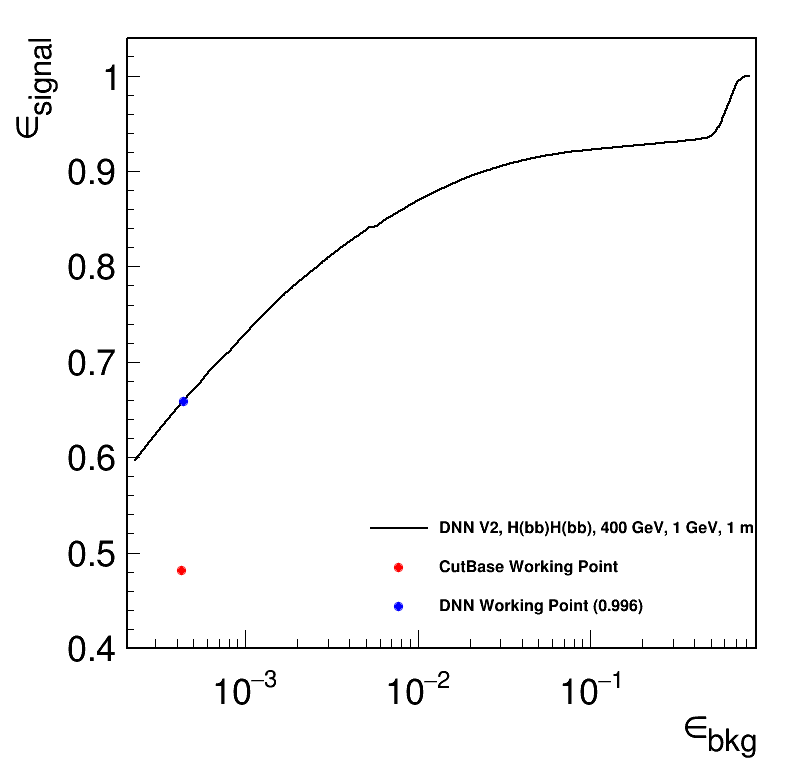

In [24]:
### ROC curve All MC Bkg
 

sig_keys = ['H(bb)H(bb), 200 GeV, 1 GeV, 1 m','H(bb)H(bb), 400 GeV, 1 GeV, 1 m']
sig_cutbase_effs = {}
sig_cutbase_effs['H(bb)H(bb), 200 GeV, 1 GeV, 1 m'] = sig200_cutbase_eff
sig_cutbase_effs['H(bb)H(bb), 400 GeV, 1 GeV, 1 m'] = sig400_cutbase_eff

for sig_k in sig_keys:
    i=0
    c = rt.TCanvas('c','c', 800, 800)
    leg = rt.TLegend(0.45,0.19,0.86,0.34)
#     leg = rt.TLegend(0.65,0.19,0.86,0.34)
    leg.SetTextSize(0.022)
    leg.SetBorderSize(0)
    leg.SetEntrySeparation(0.01)
    gr = {}
    purity = {}

    #     Plotting ROC curve v2
    gr['Datav2'+sig_k] = create_TGraph(DataEff,Noeff[sig_k],axis_title = ['#epsilon_{bkg}','#epsilon_{signal}'])
    gr['Datav2'+sig_k].SetLineColor(std_color_list[i])
    gr['Datav2'+sig_k].SetLineWidth(2)
    gr['Datav2'+sig_k].SetMinimum(0.4)
    gr['Datav2'+sig_k].GetYaxis().SetRangeUser(0.0, 1.0)
    gr['Datav2'+sig_k].GetXaxis().SetLimits(0.0, 1.0)

    gr['Datav2'+sig_k].Draw('ac')
    leg.AddEntry(gr['Datav2'+sig_k],'DNN V2, '+sig_k, 'l')
    


    #cutbased working point
    i+=1
    cutbase_eff_sig_pt = np.array([sig_cutbase_effs[sig_k]]) 
    cutbase_eff_bkg_pt = np.array([data_cutbase_eff]) 
    print(cutbase_eff_sig_pt,cutbase_eff_bkg_pt)
    gr['CutBase'+sig_k] = create_TGraph(cutbase_eff_bkg_pt,cutbase_eff_sig_pt,axis_title = ['#epsilon_{bkg}','#epsilon_{signal}'])
    gr['CutBase'+sig_k].SetMarkerSize(1.)
    gr['CutBase'+sig_k].SetMarkerColor(std_color_list[i])
    gr['CutBase'+sig_k].SetLineColor(std_color_list[i])
    gr['CutBase'+sig_k].SetMinimum(0.4)
    gr['CutBase'+sig_k].GetYaxis().SetRangeUser(0.0, 1.0)
    gr['CutBase'+sig_k].GetXaxis().SetLimits(0.0, 1.0)


    gr['CutBase'+sig_k].Draw('psame')
    leg.AddEntry(gr['CutBase'+sig_k],'CutBase Working Point','p')
    
    #aiming dnn working point
    i+=1
    dnn_eff_sig_pt = np.array([Noeff[sig_k][aim_nothre_cnt]]) 
    dnn_eff_bkg_pt = np.array([DataEff[aim_nothre_cnt]]) 
    print(dnn_eff_sig_pt,dnn_eff_bkg_pt)
    gr['AimDNNv2'+sig_k] = create_TGraph(dnn_eff_bkg_pt,dnn_eff_sig_pt,axis_title = ['#epsilon_{bkg}','#epsilon_{signal}'])
    gr['AimDNNv2'+sig_k].SetMarkerSize(1.)
    gr['AimDNNv2'+sig_k].SetMarkerColor(std_color_list[i])
    gr['AimDNNv2'+sig_k].SetLineColor(std_color_list[i])
    gr['AimDNNv2'+sig_k].SetMinimum(0.4)
    gr['AimDNNv2'+sig_k].GetYaxis().SetRangeUser(0.0, 1.0)
    gr['AimDNNv2'+sig_k].GetXaxis().SetLimits(0.0, 1.0)


    gr['AimDNNv2'+sig_k].Draw('psame')
    leg.AddEntry(gr['AimDNNv2'+sig_k],'DNN Working Point ('+str(aim_nothre_pt)+')','p')
    
    #old aiming dnn working point
    i+=1
    old_dnn_eff_sig_pt = np.array([Noeff[sig_k][cnt_old]]) 
    old_dnn_eff_bkg_pt = np.array([DataEff[cnt_old]]) 
    print(old_dnn_eff_sig_pt,old_dnn_eff_bkg_pt)
    gr['OldAimDNNv2'+sig_k] = create_TGraph(old_dnn_eff_bkg_pt,old_dnn_eff_sig_pt,axis_title = ['#epsilon_{bkg}','#epsilon_{signal}'])
    gr['OldAimDNNv2'+sig_k].SetMarkerSize(1.)
    gr['OldAimDNNv2'+sig_k].SetMarkerColor(std_color_list[i])
    gr['OldAimDNNv2'+sig_k].SetLineColor(std_color_list[i])
    gr['OldAimDNNv2'+sig_k].SetMinimum(0.4)
    gr['OldAimDNNv2'+sig_k].GetYaxis().SetRangeUser(0.0, 1.0)
    gr['OldAimDNNv2'+sig_k].GetXaxis().SetLimits(0.0, 1.0)


#     gr['OldAimDNNv2'+sig_k].Draw('psame')
#     leg.AddEntry(gr['OldAimDNNv2'+sig_k],'DNN Working Point ('+str(pt_thre_old)+')','p')
        
 
    leg.Draw()
    c.SetLogx()

    c.Draw()
    c.SaveAs(plotDir+'V2_ROC_DNN_Data_BKG_Sig'+sig_k+'GeV.png')


[0.49863] [0.000422]
[0.62328766] [0.00043612]
[0.65388127] [0.00054254]
[0.481758] [0.000422]
[0.65921985] [0.00043612]
[0.67786279] [0.00054254]


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /storage/user/jmao/gpu/jmao/cms-llp/plots/20201205/2018_no_sigmatch/dnn_v3/dnn_v1nosi_v2_v3/simplifiedplots/V2_ROC_DNN_Data_BKG_SIG.png has been created


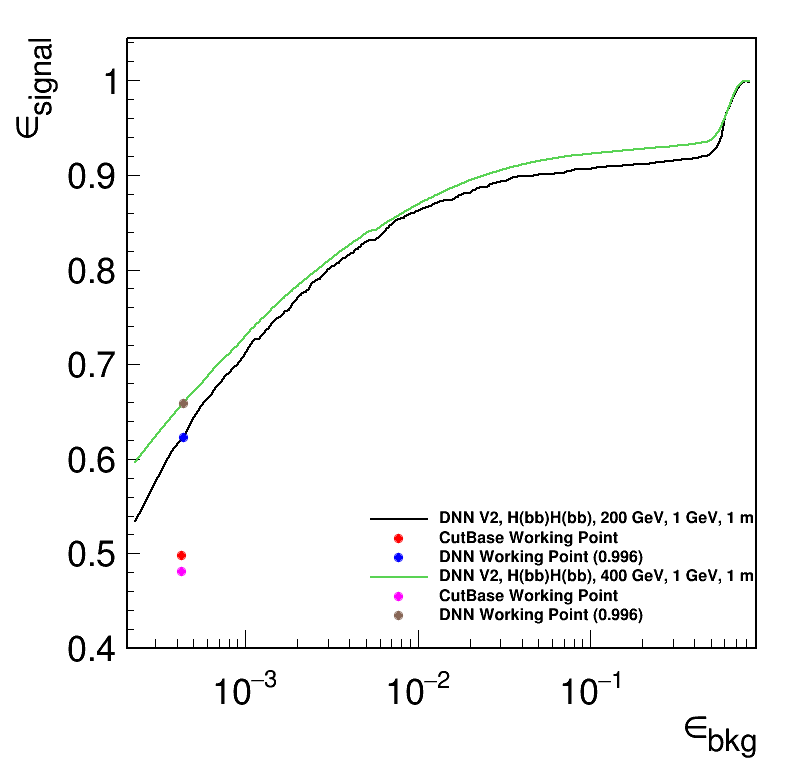

In [25]:
### ROC curve All MC Bkg
 

sig_keys = ['H(bb)H(bb), 200 GeV, 1 GeV, 1 m','H(bb)H(bb), 400 GeV, 1 GeV, 1 m']
sig_cutbase_effs = {}
sig_cutbase_effs['H(bb)H(bb), 200 GeV, 1 GeV, 1 m'] = sig200_cutbase_eff
sig_cutbase_effs['H(bb)H(bb), 400 GeV, 1 GeV, 1 m'] = sig400_cutbase_eff

i=0
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.45,0.19,0.86,0.34)
#     leg = rt.TLegend(0.65,0.19,0.86,0.34)
leg.SetTextSize(0.022)
leg.SetBorderSize(0)
leg.SetEntrySeparation(0.01)
gr = {}
purity = {}
for sig_k in sig_keys:

    #     Plotting ROC curve v2
    gr['Datav2'+sig_k] = create_TGraph(DataEff,Noeff[sig_k],axis_title = ['#epsilon_{bkg}','#epsilon_{signal}'])
    gr['Datav2'+sig_k].SetLineColor(std_color_list[i])
    gr['Datav2'+sig_k].SetLineWidth(2)
    gr['Datav2'+sig_k].SetMinimum(0.4)
    gr['Datav2'+sig_k].GetYaxis().SetRangeUser(0.0, 1.0)
    gr['Datav2'+sig_k].GetXaxis().SetLimits(0.0, 1.0)

    gr['Datav2'+sig_k].Draw('ac' if i==0 else 'c')
    leg.AddEntry(gr['Datav2'+sig_k],'DNN V2, '+sig_k, 'l')
    


    #cutbased working point
    i+=1
    cutbase_eff_sig_pt = np.array([sig_cutbase_effs[sig_k]]) 
    cutbase_eff_bkg_pt = np.array([data_cutbase_eff]) 
    print(cutbase_eff_sig_pt,cutbase_eff_bkg_pt)
    gr['CutBase'+sig_k] = create_TGraph(cutbase_eff_bkg_pt,cutbase_eff_sig_pt,axis_title = ['#epsilon_{bkg}','#epsilon_{signal}'])
    gr['CutBase'+sig_k].SetMarkerSize(1.)
    gr['CutBase'+sig_k].SetMarkerColor(std_color_list[i])
    gr['CutBase'+sig_k].SetLineColor(std_color_list[i])
    gr['CutBase'+sig_k].SetMinimum(0.4)
    gr['CutBase'+sig_k].GetYaxis().SetRangeUser(0.0, 1.0)
    gr['CutBase'+sig_k].GetXaxis().SetLimits(0.0, 1.0)


    gr['CutBase'+sig_k].Draw('psame')
    leg.AddEntry(gr['CutBase'+sig_k],'CutBase Working Point','p')
    
    #aiming dnn working point
    i+=1
    dnn_eff_sig_pt = np.array([Noeff[sig_k][aim_nothre_cnt]]) 
    dnn_eff_bkg_pt = np.array([DataEff[aim_nothre_cnt]]) 
    print(dnn_eff_sig_pt,dnn_eff_bkg_pt)
    gr['AimDNNv2'+sig_k] = create_TGraph(dnn_eff_bkg_pt,dnn_eff_sig_pt,axis_title = ['#epsilon_{bkg}','#epsilon_{signal}'])
    gr['AimDNNv2'+sig_k].SetMarkerSize(1.)
    gr['AimDNNv2'+sig_k].SetMarkerColor(std_color_list[i])
    gr['AimDNNv2'+sig_k].SetLineColor(std_color_list[i])
    gr['AimDNNv2'+sig_k].SetMinimum(0.4)
    gr['AimDNNv2'+sig_k].GetYaxis().SetRangeUser(0.0, 1.0)
    gr['AimDNNv2'+sig_k].GetXaxis().SetLimits(0.0, 1.0)


    gr['AimDNNv2'+sig_k].Draw('psame')
    leg.AddEntry(gr['AimDNNv2'+sig_k],'DNN Working Point ('+str(aim_nothre_pt)+')','p')
    
    #old aiming dnn working point
    i+=1
    old_dnn_eff_sig_pt = np.array([Noeff[sig_k][cnt_old]]) 
    old_dnn_eff_bkg_pt = np.array([DataEff[cnt_old]]) 
    print(old_dnn_eff_sig_pt,old_dnn_eff_bkg_pt)
    gr['OldAimDNNv2'+sig_k] = create_TGraph(old_dnn_eff_bkg_pt,old_dnn_eff_sig_pt,axis_title = ['#epsilon_{bkg}','#epsilon_{signal}'])
    gr['OldAimDNNv2'+sig_k].SetMarkerSize(1.)
    gr['OldAimDNNv2'+sig_k].SetMarkerColor(std_color_list[i])
    gr['OldAimDNNv2'+sig_k].SetLineColor(std_color_list[i])
    gr['OldAimDNNv2'+sig_k].SetMinimum(0.4)
    gr['OldAimDNNv2'+sig_k].GetYaxis().SetRangeUser(0.0, 1.0)
    gr['OldAimDNNv2'+sig_k].GetXaxis().SetLimits(0.0, 1.0)


#     gr['OldAimDNNv2'+sig_k].Draw('psame')
#     leg.AddEntry(gr['OldAimDNNv2'+sig_k],'DNN Working Point ('+str(pt_thre_old)+')','p')
        
 
leg.Draw()
c.SetLogx()

c.Draw()
c.SaveAs(plotDir+'V2_ROC_DNN_Data_BKG_SIG.png')


# ROC DNN V1

[0.49863] [0.000422]
[0.57625576] [0.00040004]
[0.60456617] [0.00048445]
[0.481758] [0.000422]
[0.62718052] [0.00040004]
[0.64372948] [0.00048445]


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /storage/user/jmao/gpu/jmao/cms-llp/plots/20201205/2018_no_sigmatch/dnn_v3/dnn_v1nosi_v2_v3/simplifiedplots/V1_ROC_DNN_Data_BKG_SigH(bb)H(bb), 200 GeV, 1 GeV, 1 mGeV.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /storage/user/jmao/gpu/jmao/cms-llp/plots/20201205/2018_no_sigmatch/dnn_v3/dnn_v1nosi_v2_v3/simplifiedplots/V1_ROC_DNN_Data_BKG_SigH(bb)H(bb), 400 GeV, 1 GeV, 1 mGeV.png has been created


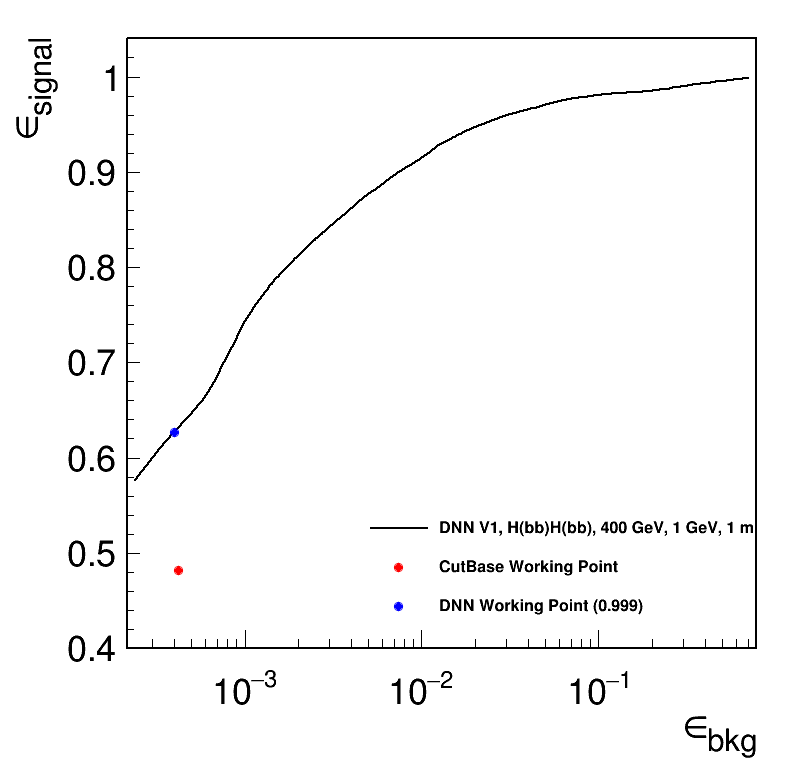

In [26]:
### ROC curve All MC Bkg
 

sig_keys = ['H(bb)H(bb), 200 GeV, 1 GeV, 1 m','H(bb)H(bb), 400 GeV, 1 GeV, 1 m']
sig_cutbase_effs = {}
sig_cutbase_effs['H(bb)H(bb), 200 GeV, 1 GeV, 1 m'] = sig200_cutbase_eff
sig_cutbase_effs['H(bb)H(bb), 400 GeV, 1 GeV, 1 m'] = sig400_cutbase_eff

for sig_k in sig_keys:
    i=0
    c = rt.TCanvas('c','c', 800, 800)
    leg = rt.TLegend(0.45,0.19,0.86,0.34)
#     leg = rt.TLegend(0.65,0.19,0.86,0.34)
    leg.SetTextSize(0.022)
    leg.SetBorderSize(0)
    leg.SetEntrySeparation(0.01)
    gr = {}
    purity = {}

    #     Plotting ROC curve v1
    gr['Datav1'+sig_k] = create_TGraph(DataEffv1,Noeffv1[sig_k],axis_title = ['#epsilon_{bkg}','#epsilon_{signal}'])
    gr['Datav1'+sig_k].SetLineColor(std_color_list[i])
    gr['Datav1'+sig_k].SetLineWidth(2)
    gr['Datav1'+sig_k].SetMinimum(0.4)
    gr['Datav1'+sig_k].GetYaxis().SetRangeUser(0.0, 1.0)
    gr['Datav1'+sig_k].GetXaxis().SetLimits(0.0, 1.0)

    gr['Datav1'+sig_k].Draw('ac')
    leg.AddEntry(gr['Datav1'+sig_k],'DNN V1, '+sig_k, 'l')
    


    #cutbased working point
    i+=1
    cutbase_eff_sig_pt = np.array([sig_cutbase_effs[sig_k]]) 
    cutbase_eff_bkg_pt = np.array([data_cutbase_eff]) 
    print(cutbase_eff_sig_pt,cutbase_eff_bkg_pt)
    gr['CutBase'+sig_k] = create_TGraph(cutbase_eff_bkg_pt,cutbase_eff_sig_pt,axis_title = ['#epsilon_{bkg}','#epsilon_{signal}'])
    gr['CutBase'+sig_k].SetMarkerSize(1.)
    gr['CutBase'+sig_k].SetMarkerColor(std_color_list[i])
    gr['CutBase'+sig_k].SetLineColor(std_color_list[i])
    gr['CutBase'+sig_k].SetMinimum(0.4)
    gr['CutBase'+sig_k].GetYaxis().SetRangeUser(0.0, 1.0)
    gr['CutBase'+sig_k].GetXaxis().SetLimits(0.0, 1.0)


    gr['CutBase'+sig_k].Draw('psame')
    leg.AddEntry(gr['CutBase'+sig_k],'CutBase Working Point','p')
    
    #aiming dnn working point
    i+=1
    dnn_eff_sig_pt = np.array([Noeffv1[sig_k][aim_nothre_cntv1]]) 
    dnn_eff_bkg_pt = np.array([DataEffv1[aim_nothre_cntv1]]) 
    print(dnn_eff_sig_pt,dnn_eff_bkg_pt)
    gr['AimDNNv1'+sig_k] = create_TGraph(dnn_eff_bkg_pt,dnn_eff_sig_pt,axis_title = ['#epsilon_{bkg}','#epsilon_{signal}'])
    gr['AimDNNv1'+sig_k].SetMarkerSize(1.)
    gr['AimDNNv1'+sig_k].SetMarkerColor(std_color_list[i])
    gr['AimDNNv1'+sig_k].SetLineColor(std_color_list[i])
    gr['AimDNNv1'+sig_k].SetMinimum(0.4)
    gr['AimDNNv1'+sig_k].GetYaxis().SetRangeUser(0.0, 1.0)
    gr['AimDNNv1'+sig_k].GetXaxis().SetLimits(0.0, 1.0)


    gr['AimDNNv1'+sig_k].Draw('psame')
    leg.AddEntry(gr['AimDNNv1'+sig_k],'DNN Working Point ('+str(aim_nothre_ptv1)+')','p')
    
    #old aiming dnn working point
    i+=1
    old_dnn_eff_sig_pt = np.array([Noeffv1[sig_k][cnt_oldv1]]) 
    old_dnn_eff_bkg_pt = np.array([DataEffv1[cnt_oldv1]]) 
    print(old_dnn_eff_sig_pt,old_dnn_eff_bkg_pt)
    gr['OldAimDNNv1'+sig_k] = create_TGraph(old_dnn_eff_bkg_pt,old_dnn_eff_sig_pt,axis_title = ['#epsilon_{bkg}','#epsilon_{signal}'])
    gr['OldAimDNNv1'+sig_k].SetMarkerSize(1.)
    gr['OldAimDNNv1'+sig_k].SetMarkerColor(std_color_list[i])
    gr['OldAimDNNv1'+sig_k].SetLineColor(std_color_list[i])
    gr['OldAimDNNv1'+sig_k].SetMinimum(0.4)
    gr['OldAimDNNv1'+sig_k].GetYaxis().SetRangeUser(0.0, 1.0)
    gr['OldAimDNNv1'+sig_k].GetXaxis().SetLimits(0.0, 1.0)


#     gr['OldAimDNNv1'+sig_k].Draw('psame')
#     leg.AddEntry(gr['OldAimDNNv1'+sig_k],'DNN Working Point ('+str(pt_thre_oldv1)+')','p')
        
 
    leg.Draw()
    c.SetLogx()

    c.Draw()
    c.SaveAs(plotDir+'V1_ROC_DNN_Data_BKG_Sig'+sig_k+'GeV.png')


[0.49863] [0.000422]
[0.57625576] [0.00040004]
[0.60456617] [0.00048445]
[0.481758] [0.000422]
[0.62718052] [0.00040004]
[0.64372948] [0.00048445]


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /storage/user/jmao/gpu/jmao/cms-llp/plots/20201205/2018_no_sigmatch/dnn_v3/dnn_v1nosi_v2_v3/simplifiedplots/V1_ROC_DNN_Data_BKG_SIG.png has been created


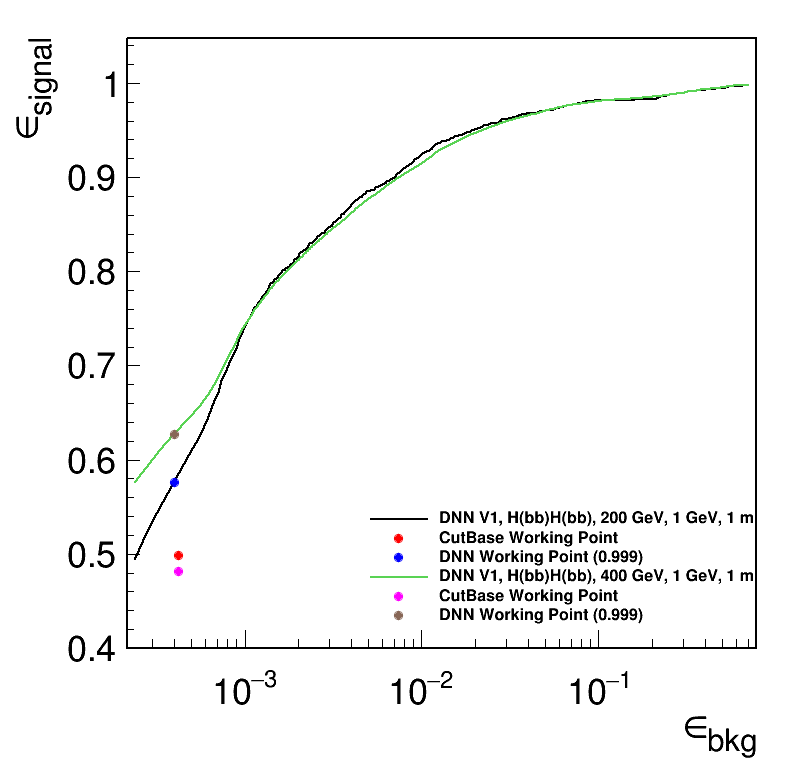

In [27]:
### ROC curve All MC Bkg
 

sig_keys = ['H(bb)H(bb), 200 GeV, 1 GeV, 1 m','H(bb)H(bb), 400 GeV, 1 GeV, 1 m']
sig_cutbase_effs = {}
sig_cutbase_effs['H(bb)H(bb), 200 GeV, 1 GeV, 1 m'] = sig200_cutbase_eff
sig_cutbase_effs['H(bb)H(bb), 400 GeV, 1 GeV, 1 m'] = sig400_cutbase_eff

i=0
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.45,0.19,0.86,0.34)
#     leg = rt.TLegend(0.65,0.19,0.86,0.34)
leg.SetTextSize(0.022)
leg.SetBorderSize(0)
leg.SetEntrySeparation(0.01)
gr = {}
purity = {}
for sig_k in sig_keys:


    #     Plotting ROC curve v1
    gr['Datav1'+sig_k] = create_TGraph(DataEffv1,Noeffv1[sig_k],axis_title = ['#epsilon_{bkg}','#epsilon_{signal}'])
    gr['Datav1'+sig_k].SetLineColor(std_color_list[i])
    gr['Datav1'+sig_k].SetLineWidth(2)
    gr['Datav1'+sig_k].SetMinimum(0.4)
    gr['Datav1'+sig_k].GetYaxis().SetRangeUser(0.0, 1.0)
    gr['Datav1'+sig_k].GetXaxis().SetLimits(0.0, 1.0)

    gr['Datav1'+sig_k].Draw('ac' if i==0 else 'c')
    leg.AddEntry(gr['Datav1'+sig_k],'DNN V1, '+sig_k, 'l')
    


    #cutbased working point
    i+=1
    cutbase_eff_sig_pt = np.array([sig_cutbase_effs[sig_k]]) 
    cutbase_eff_bkg_pt = np.array([data_cutbase_eff]) 
    print(cutbase_eff_sig_pt,cutbase_eff_bkg_pt)
    gr['CutBase'+sig_k] = create_TGraph(cutbase_eff_bkg_pt,cutbase_eff_sig_pt,axis_title = ['#epsilon_{bkg}','#epsilon_{signal}'])
    gr['CutBase'+sig_k].SetMarkerSize(1.)
    gr['CutBase'+sig_k].SetMarkerColor(std_color_list[i])
    gr['CutBase'+sig_k].SetLineColor(std_color_list[i])
    gr['CutBase'+sig_k].SetMinimum(0.4)
    gr['CutBase'+sig_k].GetYaxis().SetRangeUser(0.0, 1.0)
    gr['CutBase'+sig_k].GetXaxis().SetLimits(0.0, 1.0)


    gr['CutBase'+sig_k].Draw('psame')
    leg.AddEntry(gr['CutBase'+sig_k],'CutBase Working Point','p')
    
    #aiming dnn working point
    i+=1
    dnn_eff_sig_pt = np.array([Noeffv1[sig_k][aim_nothre_cntv1]]) 
    dnn_eff_bkg_pt = np.array([DataEffv1[aim_nothre_cntv1]]) 
    print(dnn_eff_sig_pt,dnn_eff_bkg_pt)
    gr['AimDNNv1'+sig_k] = create_TGraph(dnn_eff_bkg_pt,dnn_eff_sig_pt,axis_title = ['#epsilon_{bkg}','#epsilon_{signal}'])
    gr['AimDNNv1'+sig_k].SetMarkerSize(1.)
    gr['AimDNNv1'+sig_k].SetMarkerColor(std_color_list[i])
    gr['AimDNNv1'+sig_k].SetLineColor(std_color_list[i])
    gr['AimDNNv1'+sig_k].SetMinimum(0.4)
    gr['AimDNNv1'+sig_k].GetYaxis().SetRangeUser(0.0, 1.0)
    gr['AimDNNv1'+sig_k].GetXaxis().SetLimits(0.0, 1.0)


    gr['AimDNNv1'+sig_k].Draw('psame')
    leg.AddEntry(gr['AimDNNv1'+sig_k],'DNN Working Point ('+str(aim_nothre_ptv1)+')','p')
    
    #old aiming dnn working point
    i+=1
    old_dnn_eff_sig_pt = np.array([Noeffv1[sig_k][cnt_oldv1]]) 
    old_dnn_eff_bkg_pt = np.array([DataEffv1[cnt_oldv1]]) 
    print(old_dnn_eff_sig_pt,old_dnn_eff_bkg_pt)
    gr['OldAimDNNv1'+sig_k] = create_TGraph(old_dnn_eff_bkg_pt,old_dnn_eff_sig_pt,axis_title = ['#epsilon_{bkg}','#epsilon_{signal}'])
    gr['OldAimDNNv1'+sig_k].SetMarkerSize(1.)
    gr['OldAimDNNv1'+sig_k].SetMarkerColor(std_color_list[i])
    gr['OldAimDNNv1'+sig_k].SetLineColor(std_color_list[i])
    gr['OldAimDNNv1'+sig_k].SetMinimum(0.4)
    gr['OldAimDNNv1'+sig_k].GetYaxis().SetRangeUser(0.0, 1.0)
    gr['OldAimDNNv1'+sig_k].GetXaxis().SetLimits(0.0, 1.0)


#     gr['OldAimDNNv1'+sig_k].Draw('psame')
#     leg.AddEntry(gr['OldAimDNNv1'+sig_k],'DNN Working Point ('+str(pt_thre_oldv1)+')','p')
        
 
leg.Draw()
c.SetLogx()

c.Draw()
c.SaveAs(plotDir+'V1_ROC_DNN_Data_BKG_SIG.png')


# ROC DNN V3

[0.315789] [0.000343]
[0.59109306] [0.00033736]
[0.464314] [0.000343]
[0.62009157] [0.00033736]


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /storage/user/jmao/gpu/jmao/cms-llp/plots/20210131/2018_sigmatch/dnn_v3_0lep_roc/V3_ROC_DNN_Data_BKG_SigH(bb)H(bb), 200 GeV, 1 GeV, 1 mGeV.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /storage/user/jmao/gpu/jmao/cms-llp/plots/20210131/2018_sigmatch/dnn_v3_0lep_roc/V3_ROC_DNN_Data_BKG_SigH(bb)H(bb), 400 GeV, 1 GeV, 1 mGeV.png has been created


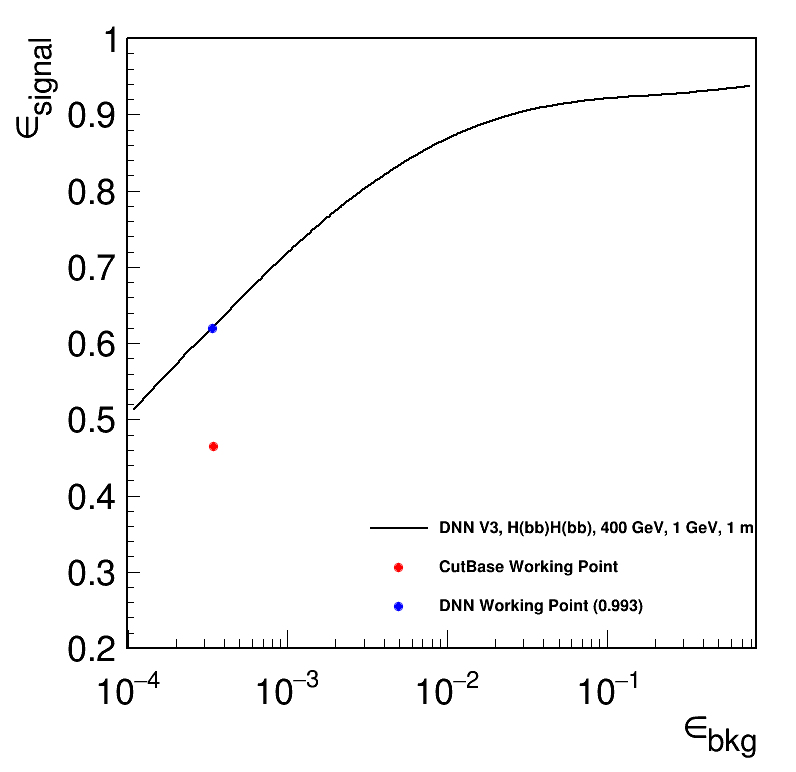

In [22]:
### ROC curve All MC Bkg
 

# sig_keys = ['H(bb)H(bb), 200 GeV, 1 GeV, 1 m',]
minimum_set=0.2
maximum_set=1.0
sig_keys = ['H(bb)H(bb), 200 GeV, 1 GeV, 1 m','H(bb)H(bb), 400 GeV, 1 GeV, 1 m']
sig_cutbase_effs = {}
sig_cutbase_effs['H(bb)H(bb), 200 GeV, 1 GeV, 1 m'] = sig200_cutbase_eff
sig_cutbase_effs['H(bb)H(bb), 400 GeV, 1 GeV, 1 m'] = sig400_cutbase_eff

for sig_k in sig_keys:
    i=0
    c = rt.TCanvas('c','c', 800, 800)
    leg = rt.TLegend(0.45,0.19,0.86,0.34)
#     leg = rt.TLegend(0.65,0.19,0.86,0.34)
    leg.SetTextSize(0.022)
    leg.SetBorderSize(0)
    leg.SetEntrySeparation(0.01)
    gr = {}
    purity = {}

    #     Plotting ROC curve v3
    gr['Datav3'+sig_k] = create_TGraph(DataEffv3,Noeffv3[sig_k],axis_title = ['#epsilon_{bkg}','#epsilon_{signal}'])
    gr['Datav3'+sig_k].SetLineColor(std_color_list[i])
    gr['Datav3'+sig_k].SetLineWidth(2)
    gr['Datav3'+sig_k].SetMinimum(minimum_set)
    gr['Datav3'+sig_k].SetMaximum(maximum_set)
    gr['Datav3'+sig_k].GetYaxis().SetRangeUser(0.0, 1.0)
    gr['Datav3'+sig_k].GetXaxis().SetLimits(0.0, 1.0)

    gr['Datav3'+sig_k].Draw('ac')
    leg.AddEntry(gr['Datav3'+sig_k],'DNN V3, '+sig_k, 'l')
    


    #cutbased working point
    i+=1
    cutbase_eff_sig_pt = np.array([sig_cutbase_effs[sig_k]]) 
    cutbase_eff_bkg_pt = np.array([data_cutbase_eff]) 
    print(cutbase_eff_sig_pt,cutbase_eff_bkg_pt)
    gr['CutBase'+sig_k] = create_TGraph(cutbase_eff_bkg_pt,cutbase_eff_sig_pt,axis_title = ['#epsilon_{bkg}','#epsilon_{signal}'])
    gr['CutBase'+sig_k].SetMarkerSize(1.)
    gr['CutBase'+sig_k].SetMarkerColor(std_color_list[i])
    gr['CutBase'+sig_k].SetLineColor(std_color_list[i])
    gr['CutBase'+sig_k].SetMinimum(minimum_set)
    gr['CutBase'+sig_k].SetMaximum(maximum_set)
    gr['CutBase'+sig_k].GetYaxis().SetRangeUser(0.0, 1.0)
    gr['CutBase'+sig_k].GetXaxis().SetLimits(0.0, 1.0)


    gr['CutBase'+sig_k].Draw('psame')
    leg.AddEntry(gr['CutBase'+sig_k],'CutBase Working Point','p')
    
    #aiming dnn working point
    i+=1
    dnn_eff_sig_pt = np.array([Noeffv3[sig_k][aim_nothre_cntv3]]) 
    dnn_eff_bkg_pt = np.array([DataEffv3[aim_nothre_cntv3]]) 
    print(dnn_eff_sig_pt,dnn_eff_bkg_pt)
    gr['AimDNNv3'+sig_k] = create_TGraph(dnn_eff_bkg_pt,dnn_eff_sig_pt,axis_title = ['#epsilon_{bkg}','#epsilon_{signal}'])
    gr['AimDNNv3'+sig_k].SetMarkerSize(1.)
    gr['AimDNNv3'+sig_k].SetMarkerColor(std_color_list[i])
    gr['AimDNNv3'+sig_k].SetLineColor(std_color_list[i])
    gr['AimDNNv3'+sig_k].SetMinimum(minimum_set)
    gr['AimDNNv3'+sig_k].SetMaximum(maximum_set)
    gr['AimDNNv3'+sig_k].GetYaxis().SetRangeUser(0.0, 1.0)
    gr['AimDNNv3'+sig_k].GetXaxis().SetLimits(0.0, 1.0)


    gr['AimDNNv3'+sig_k].Draw('psame')
    leg.AddEntry(gr['AimDNNv3'+sig_k],'DNN Working Point ('+str(aim_nothre_ptv3)+')','p')
    
    #old aiming dnn working point
#     i+=1
#     old_dnn_eff_sig_pt = np.array([Noeffv3[sig_k][cnt_oldv3]]) 
#     old_dnn_eff_bkg_pt = np.array([DataEffv3[cnt_oldv3]]) 
#     print(old_dnn_eff_sig_pt,old_dnn_eff_bkg_pt)
#     gr['OldAimDNNv3'+sig_k] = create_TGraph(old_dnn_eff_bkg_pt,old_dnn_eff_sig_pt,axis_title = ['#epsilon_{bkg}','#epsilon_{signal}'])
#     gr['OldAimDNNv3'+sig_k].SetMarkerSize(1.)
#     gr['OldAimDNNv3'+sig_k].SetMarkerColor(std_color_list[i])
#     gr['OldAimDNNv3'+sig_k].SetLineColor(std_color_list[i])
#     gr['OldAimDNNv3'+sig_k].SetMinimum(0.4)
#     gr['OldAimDNNv3'+sig_k].GetYaxis().SetRangeUser(0.0, 1.0)
#     gr['OldAimDNNv3'+sig_k].GetXaxis().SetLimits(0.0, 1.0)


#     gr['OldAimDNNv3'+sig_k].Draw('psame')
#     leg.AddEntry(gr['OldAimDNNv3'+sig_k],'DNN Working Point ('+str(pt_thre_oldv3)+')','p')
        
 
    leg.Draw()
    c.SetLogx()

    c.Draw()
    c.SaveAs(plotDir+'V3_ROC_DNN_Data_BKG_Sig'+sig_k+'GeV.png')


[0.315789] [0.000343]
[0.59109306] [0.00033736]
[0.464314] [0.000343]
[0.62009157] [0.00033736]


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /storage/user/jmao/gpu/jmao/cms-llp/plots/20210131/2018_sigmatch/dnn_v3_0lep_roc/V3_ROC_DNN_Data_BKG_SIG.png has been created


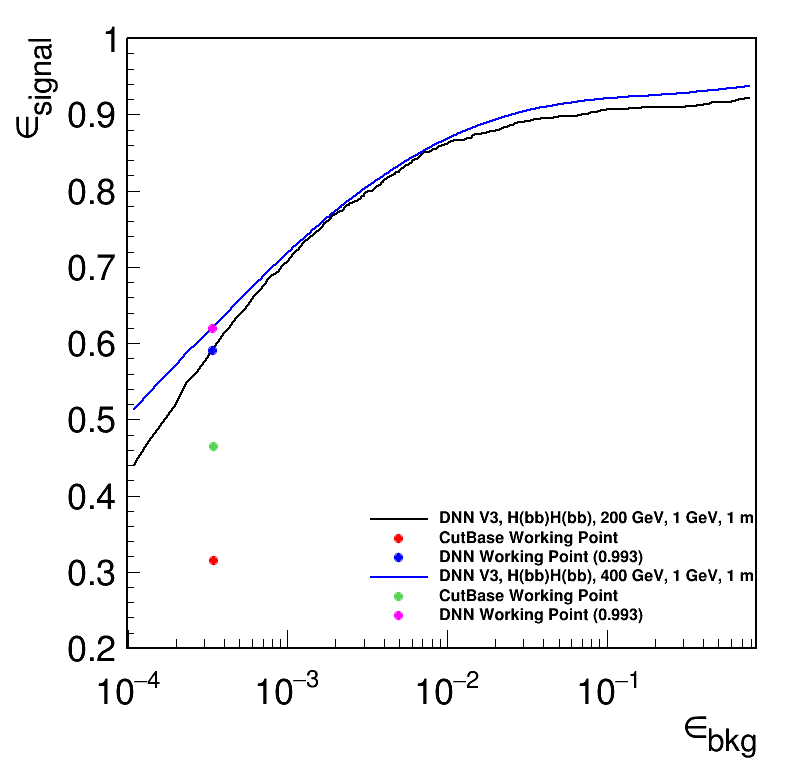

In [23]:
### ROC curve All MC Bkg
 

sig_keys = ['H(bb)H(bb), 200 GeV, 1 GeV, 1 m','H(bb)H(bb), 400 GeV, 1 GeV, 1 m']
sig_cutbase_effs = {}
sig_cutbase_effs['H(bb)H(bb), 200 GeV, 1 GeV, 1 m'] = sig200_cutbase_eff
sig_cutbase_effs['H(bb)H(bb), 400 GeV, 1 GeV, 1 m'] = sig400_cutbase_eff

i=0
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.45,0.19,0.86,0.34)
#     leg = rt.TLegend(0.65,0.19,0.86,0.34)
leg.SetTextSize(0.022)
leg.SetBorderSize(0)
leg.SetEntrySeparation(0.01)
gr = {}
purity = {}
for sig_k in sig_keys:


    #     Plotting ROC curve v3
    gr['Datav3'+sig_k] = create_TGraph(DataEffv3,Noeffv3[sig_k],axis_title = ['#epsilon_{bkg}','#epsilon_{signal}'])
    gr['Datav3'+sig_k].SetLineColor(std_color_list[i])
    gr['Datav3'+sig_k].SetLineWidth(2)
    gr['Datav3'+sig_k].SetMinimum(minimum_set)
    gr['Datav3'+sig_k].SetMaximum(maximum_set)
    gr['Datav3'+sig_k].GetYaxis().SetRangeUser(0.0, 1.0)
    gr['Datav3'+sig_k].GetXaxis().SetLimits(0.0, 1.0)

    gr['Datav3'+sig_k].Draw('ac' if i==0 else 'c')
    leg.AddEntry(gr['Datav3'+sig_k],'DNN V3, '+sig_k, 'l')
    


    #cutbased working point
    i+=1
    cutbase_eff_sig_pt = np.array([sig_cutbase_effs[sig_k]]) 
    cutbase_eff_bkg_pt = np.array([data_cutbase_eff]) 
    print(cutbase_eff_sig_pt,cutbase_eff_bkg_pt)
    gr['CutBase'+sig_k] = create_TGraph(cutbase_eff_bkg_pt,cutbase_eff_sig_pt,axis_title = ['#epsilon_{bkg}','#epsilon_{signal}'])
    gr['CutBase'+sig_k].SetMarkerSize(1.)
    gr['CutBase'+sig_k].SetMarkerColor(std_color_list[i])
    gr['CutBase'+sig_k].SetLineColor(std_color_list[i])
    gr['CutBase'+sig_k].SetMinimum(minimum_set)
    gr['CutBase'+sig_k].SetMaximum(maximum_set)
    gr['CutBase'+sig_k].GetYaxis().SetRangeUser(0.0, 1.0)
    gr['CutBase'+sig_k].GetXaxis().SetLimits(0.0, 1.0)


    gr['CutBase'+sig_k].Draw('psame')
    leg.AddEntry(gr['CutBase'+sig_k],'CutBase Working Point','p')
    
    #aiming dnn working point
    i+=1
    dnn_eff_sig_pt = np.array([Noeffv3[sig_k][aim_nothre_cntv3]]) 
    dnn_eff_bkg_pt = np.array([DataEffv3[aim_nothre_cntv3]]) 
    print(dnn_eff_sig_pt,dnn_eff_bkg_pt)
    gr['AimDNNv3'+sig_k] = create_TGraph(dnn_eff_bkg_pt,dnn_eff_sig_pt,axis_title = ['#epsilon_{bkg}','#epsilon_{signal}'])
    gr['AimDNNv3'+sig_k].SetMarkerSize(1.)
    gr['AimDNNv3'+sig_k].SetMarkerColor(std_color_list[i])
    gr['AimDNNv3'+sig_k].SetLineColor(std_color_list[i])
    gr['AimDNNv3'+sig_k].SetMinimum(minimum_set)
    gr['AimDNNv3'+sig_k].SetMaximum(maximum_set)
    gr['AimDNNv3'+sig_k].GetYaxis().SetRangeUser(0.0, 1.0)
    gr['AimDNNv3'+sig_k].GetXaxis().SetLimits(0.0, 1.0)


    gr['AimDNNv3'+sig_k].Draw('psame')
    leg.AddEntry(gr['AimDNNv3'+sig_k],'DNN Working Point ('+str(aim_nothre_ptv3)+')','p')
    
    #old aiming dnn working point
#     i+=1
#     old_dnn_eff_sig_pt = np.array([Noeffv3[sig_k][cnt_oldv3]]) 
#     old_dnn_eff_bkg_pt = np.array([DataEffv3[cnt_oldv3]]) 
#     print(old_dnn_eff_sig_pt,old_dnn_eff_bkg_pt)
#     gr['OldAimDNNv3'+sig_k] = create_TGraph(old_dnn_eff_bkg_pt,old_dnn_eff_sig_pt,axis_title = ['#epsilon_{bkg}','#epsilon_{signal}'])
#     gr['OldAimDNNv3'+sig_k].SetMarkerSize(1.)
#     gr['OldAimDNNv3'+sig_k].SetMarkerColor(std_color_list[i])
#     gr['OldAimDNNv3'+sig_k].SetLineColor(std_color_list[i])
#     gr['OldAimDNNv3'+sig_k].SetMinimum(minimum_set)
#     gr['OldAimDNNv3'+sig_k].GetYaxis().SetRangeUser(0.0, 1.0)
#     gr['OldAimDNNv3'+sig_k].GetXaxis().SetLimits(0.0, 1.0)


#     gr['OldAimDNNv3'+sig_k].Draw('psame')
#     leg.AddEntry(gr['OldAimDNNv3'+sig_k],'DNN Working Point ('+str(pt_thre_oldv3)+')','p')
        
 
leg.Draw()
c.SetLogx()

c.Draw()
c.SaveAs(plotDir+'V3_ROC_DNN_Data_BKG_SIG.png')


# compare DNN versions

## v3v2

[0.49863] [0.000422]
[0.6219178] [0.00042929]
[0.62328766] [0.00043612]
[0.65388127] [0.00054254]
[0.481758] [0.000422]
[0.64327802] [0.00042929]
[0.65921985] [0.00043612]
[0.67786279] [0.00054254]


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /storage/user/jmao/gpu/jmao/cms-llp/plots/20201205/2018_no_sigmatch/dnn_v3/dnn_v1nosi_v2_v3/simplifiedplots/V3V2_ROC_DNN_Data_BKG_SigH(bb)H(bb), 200 GeV, 1 GeV, 1 mGeV.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /storage/user/jmao/gpu/jmao/cms-llp/plots/20201205/2018_no_sigmatch/dnn_v3/dnn_v1nosi_v2_v3/simplifiedplots/V3V2_ROC_DNN_Data_BKG_SigH(bb)H(bb), 400 GeV, 1 GeV, 1 mGeV.png has been created


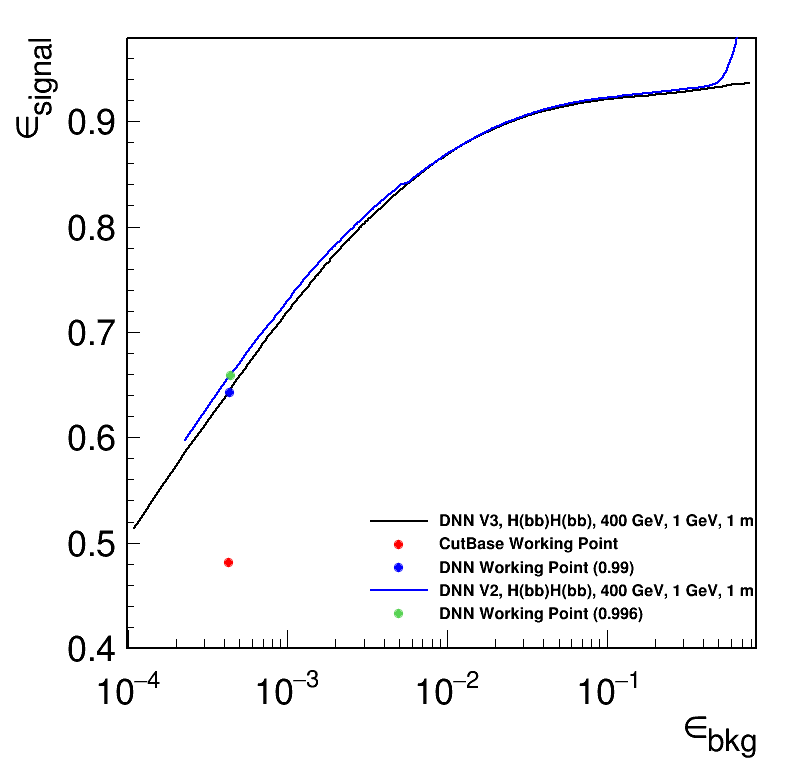

In [28]:
### ROC curve All MC Bkg
 

sig_keys = ['H(bb)H(bb), 200 GeV, 1 GeV, 1 m','H(bb)H(bb), 400 GeV, 1 GeV, 1 m']
sig_cutbase_effs = {}
sig_cutbase_effs['H(bb)H(bb), 200 GeV, 1 GeV, 1 m'] = sig200_cutbase_eff
sig_cutbase_effs['H(bb)H(bb), 400 GeV, 1 GeV, 1 m'] = sig400_cutbase_eff

for sig_k in sig_keys:
    i=0
    c = rt.TCanvas('c','c', 800, 800)
    leg = rt.TLegend(0.45,0.19,0.86,0.34)
#     leg = rt.TLegend(0.65,0.19,0.86,0.34)
    leg.SetTextSize(0.022)
    leg.SetBorderSize(0)
    leg.SetEntrySeparation(0.01)
    gr = {}
    purity = {}

    #     Plotting ROC curve v3
    gr['Datav3'+sig_k] = create_TGraph(DataEffv3,Noeffv3[sig_k],axis_title = ['#epsilon_{bkg}','#epsilon_{signal}'])
    gr['Datav3'+sig_k].SetLineColor(std_color_list_ext[i])
    gr['Datav3'+sig_k].SetLineWidth(2)
    gr['Datav3'+sig_k].SetMinimum(0.4)
    gr['Datav3'+sig_k].GetYaxis().SetRangeUser(0.0, 1.0)
    gr['Datav3'+sig_k].GetXaxis().SetLimits(0.0, 1.0)

    gr['Datav3'+sig_k].Draw('ac')
    leg.AddEntry(gr['Datav3'+sig_k],'DNN V3, '+sig_k, 'l')
    


    #cutbased working point
    i+=1
    cutbase_eff_sig_pt = np.array([sig_cutbase_effs[sig_k]]) 
    cutbase_eff_bkg_pt = np.array([data_cutbase_eff]) 
    print(cutbase_eff_sig_pt,cutbase_eff_bkg_pt)
    gr['CutBase'+sig_k] = create_TGraph(cutbase_eff_bkg_pt,cutbase_eff_sig_pt,axis_title = ['#epsilon_{bkg}','#epsilon_{signal}'])
    gr['CutBase'+sig_k].SetMarkerSize(1.)
    gr['CutBase'+sig_k].SetMarkerColor(std_color_list_ext[i])
    gr['CutBase'+sig_k].SetLineColor(std_color_list_ext[i])
    gr['CutBase'+sig_k].SetMinimum(0.4)
    gr['CutBase'+sig_k].GetYaxis().SetRangeUser(0.0, 1.0)
    gr['CutBase'+sig_k].GetXaxis().SetLimits(0.0, 1.0)


    gr['CutBase'+sig_k].Draw('psame')
    leg.AddEntry(gr['CutBase'+sig_k],'CutBase Working Point','p')
    
    #aiming dnn working point
    i+=1
    dnn_eff_sig_pt = np.array([Noeffv3[sig_k][aim_nothre_cntv3]]) 
    dnn_eff_bkg_pt = np.array([DataEffv3[aim_nothre_cntv3]]) 
    print(dnn_eff_sig_pt,dnn_eff_bkg_pt)
    gr['AimDNNv3'+sig_k] = create_TGraph(dnn_eff_bkg_pt,dnn_eff_sig_pt,axis_title = ['#epsilon_{bkg}','#epsilon_{signal}'])
    gr['AimDNNv3'+sig_k].SetMarkerSize(1.)
    gr['AimDNNv3'+sig_k].SetMarkerColor(std_color_list_ext[i])
    gr['AimDNNv3'+sig_k].SetLineColor(std_color_list_ext[i])
    gr['AimDNNv3'+sig_k].SetMinimum(0.4)
    gr['AimDNNv3'+sig_k].GetYaxis().SetRangeUser(0.0, 1.0)
    gr['AimDNNv3'+sig_k].GetXaxis().SetLimits(0.0, 1.0)


    gr['AimDNNv3'+sig_k].Draw('psame')
    leg.AddEntry(gr['AimDNNv3'+sig_k],'DNN Working Point ('+str(aim_nothre_ptv3)+')','p')
    
    #old aiming dnn working point
#     i+=1
#     old_dnn_eff_sig_pt = np.array([Noeffv3[sig_k][cnt_oldv3]]) 
#     old_dnn_eff_bkg_pt = np.array([DataEffv3[cnt_oldv3]]) 
#     print(old_dnn_eff_sig_pt,old_dnn_eff_bkg_pt)
#     gr['OldAimDNNv3'+sig_k] = create_TGraph(old_dnn_eff_bkg_pt,old_dnn_eff_sig_pt,axis_title = ['#epsilon_{bkg}','#epsilon_{signal}'])
#     gr['OldAimDNNv3'+sig_k].SetMarkerSize(1.)
#     gr['OldAimDNNv3'+sig_k].SetMarkerColor(std_color_list_ext[i])
#     gr['OldAimDNNv3'+sig_k].SetLineColor(std_color_list_ext[i])
#     gr['OldAimDNNv3'+sig_k].SetMinimum(0.4)
#     gr['OldAimDNNv3'+sig_k].GetYaxis().SetRangeUser(0.0, 1.0)
#     gr['OldAimDNNv3'+sig_k].GetXaxis().SetLimits(0.0, 1.0)


#     gr['OldAimDNNv3'+sig_k].Draw('psame')
#     leg.AddEntry(gr['OldAimDNNv3'+sig_k],'DNN Working Point ('+str(pt_thre_oldv3)+')','p')
    
    #     Plotting ROC curve v2
    gr['Datav2'+sig_k] = create_TGraph(DataEff,Noeff[sig_k],axis_title = ['#epsilon_{bkg}','#epsilon_{signal}'])
    gr['Datav2'+sig_k].SetLineColor(std_color_list_ext[i])
    gr['Datav2'+sig_k].SetLineWidth(2)
    gr['Datav2'+sig_k].SetMinimum(0.4)
    gr['Datav2'+sig_k].GetYaxis().SetRangeUser(0.0, 1.0)
    gr['Datav2'+sig_k].GetXaxis().SetLimits(0.0, 1.0)

    gr['Datav2'+sig_k].Draw('ac' if i==0 else 'c')
    leg.AddEntry(gr['Datav2'+sig_k],'DNN V2, '+sig_k, 'l')
    


#     #cutbased working point
#     i+=1
#     cutbase_eff_sig_pt = np.array([sig_cutbase_effs[sig_k]]) 
#     cutbase_eff_bkg_pt = np.array([data_cutbase_eff]) 
#     print(cutbase_eff_sig_pt,cutbase_eff_bkg_pt)
#     gr['CutBase'+sig_k] = create_TGraph(cutbase_eff_bkg_pt,cutbase_eff_sig_pt,axis_title = ['#epsilon_{bkg}','#epsilon_{signal}'])
#     gr['CutBase'+sig_k].SetMarkerSize(1.)
#     gr['CutBase'+sig_k].SetMarkerColor(std_color_list_ext[i])
#     gr['CutBase'+sig_k].SetLineColor(std_color_list_ext[i])
#     gr['CutBase'+sig_k].SetMinimum(0.4)
#     gr['CutBase'+sig_k].GetYaxis().SetRangeUser(0.0, 1.0)
#     gr['CutBase'+sig_k].GetXaxis().SetLimits(0.0, 1.0)


#     gr['CutBase'+sig_k].Draw('psame')
#     leg.AddEntry(gr['CutBase'+sig_k],'CutBase Working Point','p')
    
    #aiming dnn working point
    i+=1
    dnn_eff_sig_pt = np.array([Noeff[sig_k][aim_nothre_cnt]]) 
    dnn_eff_bkg_pt = np.array([DataEff[aim_nothre_cnt]]) 
    print(dnn_eff_sig_pt,dnn_eff_bkg_pt)
    gr['AimDNNv2'+sig_k] = create_TGraph(dnn_eff_bkg_pt,dnn_eff_sig_pt,axis_title = ['#epsilon_{bkg}','#epsilon_{signal}'])
    gr['AimDNNv2'+sig_k].SetMarkerSize(1.)
    gr['AimDNNv2'+sig_k].SetMarkerColor(std_color_list_ext[i])
    gr['AimDNNv2'+sig_k].SetLineColor(std_color_list_ext[i])
    gr['AimDNNv2'+sig_k].SetMinimum(0.4)
    gr['AimDNNv2'+sig_k].GetYaxis().SetRangeUser(0.0, 1.0)
    gr['AimDNNv2'+sig_k].GetXaxis().SetLimits(0.0, 1.0)


    gr['AimDNNv2'+sig_k].Draw('psame')
    leg.AddEntry(gr['AimDNNv2'+sig_k],'DNN Working Point ('+str(aim_nothre_pt)+')','p')
    
    #old aiming dnn working point
    i+=1
    old_dnn_eff_sig_pt = np.array([Noeff[sig_k][cnt_old]]) 
    old_dnn_eff_bkg_pt = np.array([DataEff[cnt_old]]) 
    print(old_dnn_eff_sig_pt,old_dnn_eff_bkg_pt)
    gr['OldAimDNNv2'+sig_k] = create_TGraph(old_dnn_eff_bkg_pt,old_dnn_eff_sig_pt,axis_title = ['#epsilon_{bkg}','#epsilon_{signal}'])
    gr['OldAimDNNv2'+sig_k].SetMarkerSize(1.)
    gr['OldAimDNNv2'+sig_k].SetMarkerColor(std_color_list_ext[i])
    gr['OldAimDNNv2'+sig_k].SetLineColor(std_color_list_ext[i])
    gr['OldAimDNNv2'+sig_k].SetMinimum(0.4)
    gr['OldAimDNNv2'+sig_k].GetYaxis().SetRangeUser(0.0, 1.0)
    gr['OldAimDNNv2'+sig_k].GetXaxis().SetLimits(0.0, 1.0)


#     gr['OldAimDNNv2'+sig_k].Draw('psame')
#     leg.AddEntry(gr['OldAimDNNv2'+sig_k],'DNN Working Point ('+str(pt_thre_old)+')','p')
        
 
    leg.Draw()
    c.SetLogx()

    c.Draw()
    c.SaveAs(plotDir+'V3V2_ROC_DNN_Data_BKG_Sig'+sig_k+'GeV.png')


[0.49863] [0.000422]
[0.6219178] [0.00042929]
[0.62328766] [0.00043612]
3
[0.481758] [0.000422]
[0.64327802] [0.00042929]
[0.65921985] [0.00043612]
6


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /storage/user/jmao/gpu/jmao/cms-llp/plots/20201205/2018_no_sigmatch/dnn_v3/dnn_v1nosi_v2_v3/simplifiedplots/V3V2_ROC_DNN_Data_BKG_SIG.png has been created


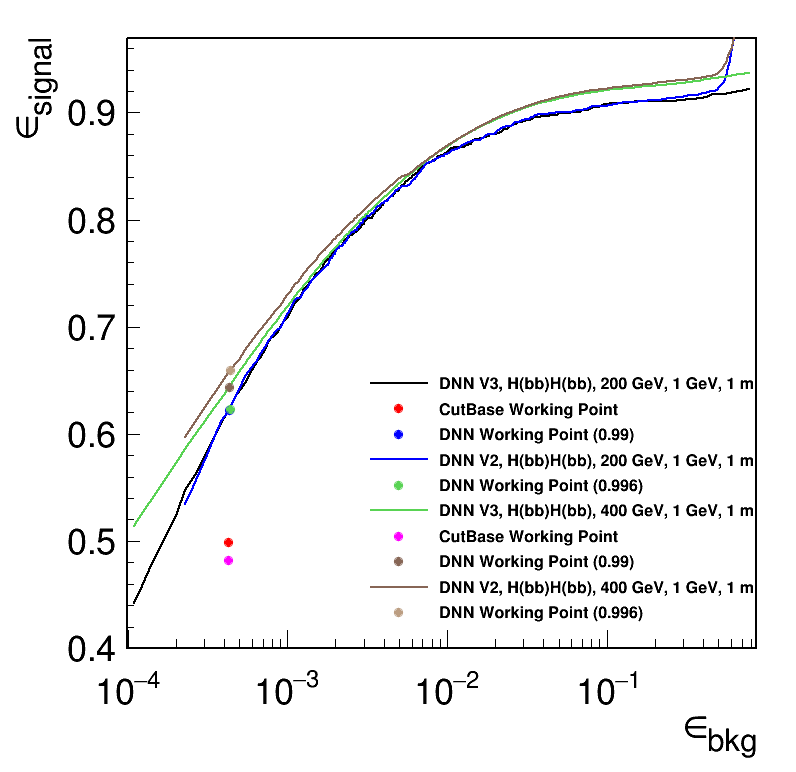

In [29]:
### ROC curve All MC Bkg
 

sig_keys = ['H(bb)H(bb), 200 GeV, 1 GeV, 1 m','H(bb)H(bb), 400 GeV, 1 GeV, 1 m']
sig_cutbase_effs = {}
sig_cutbase_effs['H(bb)H(bb), 200 GeV, 1 GeV, 1 m'] = sig200_cutbase_eff
sig_cutbase_effs['H(bb)H(bb), 400 GeV, 1 GeV, 1 m'] = sig400_cutbase_eff

i=0
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.45,0.19,0.86,0.52)
#     leg = rt.TLegend(0.65,0.19,0.86,0.34)
leg.SetTextSize(0.022)
leg.SetBorderSize(0)
leg.SetEntrySeparation(0.01)
gr = {}
purity = {}
for sig_k in sig_keys:


    #     Plotting ROC curve v3
    gr['Datav3'+sig_k] = create_TGraph(DataEffv3,Noeffv3[sig_k],axis_title = ['#epsilon_{bkg}','#epsilon_{signal}'])
    gr['Datav3'+sig_k].SetLineColor(std_color_list_ext[i])
    gr['Datav3'+sig_k].SetLineWidth(2)
    gr['Datav3'+sig_k].SetMinimum(0.4)
    gr['Datav3'+sig_k].GetYaxis().SetRangeUser(0.0, 1.0)
    gr['Datav3'+sig_k].GetXaxis().SetLimits(0.0, 1.0)

    gr['Datav3'+sig_k].Draw('ac' if i==0 else 'c')
    leg.AddEntry(gr['Datav3'+sig_k],'DNN V3, '+sig_k, 'l')
    


    #cutbased working point
    i+=1
    cutbase_eff_sig_pt = np.array([sig_cutbase_effs[sig_k]]) 
    cutbase_eff_bkg_pt = np.array([data_cutbase_eff]) 
    print(cutbase_eff_sig_pt,cutbase_eff_bkg_pt)
    gr['CutBase'+sig_k] = create_TGraph(cutbase_eff_bkg_pt,cutbase_eff_sig_pt,axis_title = ['#epsilon_{bkg}','#epsilon_{signal}'])
    gr['CutBase'+sig_k].SetMarkerSize(1.)
    gr['CutBase'+sig_k].SetMarkerColor(std_color_list_ext[i])
    gr['CutBase'+sig_k].SetLineColor(std_color_list_ext[i])
    gr['CutBase'+sig_k].SetMinimum(0.4)
    gr['CutBase'+sig_k].GetYaxis().SetRangeUser(0.0, 1.0)
    gr['CutBase'+sig_k].GetXaxis().SetLimits(0.0, 1.0)


    gr['CutBase'+sig_k].Draw('psame')
    leg.AddEntry(gr['CutBase'+sig_k],'CutBase Working Point','p')
    
    #aiming dnn working point
    i+=1
    dnn_eff_sig_pt = np.array([Noeffv3[sig_k][aim_nothre_cntv3]]) 
    dnn_eff_bkg_pt = np.array([DataEffv3[aim_nothre_cntv3]]) 
    print(dnn_eff_sig_pt,dnn_eff_bkg_pt)
    gr['AimDNNv3'+sig_k] = create_TGraph(dnn_eff_bkg_pt,dnn_eff_sig_pt,axis_title = ['#epsilon_{bkg}','#epsilon_{signal}'])
    gr['AimDNNv3'+sig_k].SetMarkerSize(1.)
    gr['AimDNNv3'+sig_k].SetMarkerColor(std_color_list_ext[i])
    gr['AimDNNv3'+sig_k].SetLineColor(std_color_list_ext[i])
    gr['AimDNNv3'+sig_k].SetMinimum(0.4)
    gr['AimDNNv3'+sig_k].GetYaxis().SetRangeUser(0.0, 1.0)
    gr['AimDNNv3'+sig_k].GetXaxis().SetLimits(0.0, 1.0)


    gr['AimDNNv3'+sig_k].Draw('psame')
    leg.AddEntry(gr['AimDNNv3'+sig_k],'DNN Working Point ('+str(aim_nothre_ptv3)+')','p')
    
    #old aiming dnn working point
#     i+=1
#     old_dnn_eff_sig_pt = np.array([Noeffv3[sig_k][cnt_oldv3]]) 
#     old_dnn_eff_bkg_pt = np.array([DataEffv3[cnt_oldv3]]) 
#     print(old_dnn_eff_sig_pt,old_dnn_eff_bkg_pt)
#     gr['OldAimDNNv3'+sig_k] = create_TGraph(old_dnn_eff_bkg_pt,old_dnn_eff_sig_pt,axis_title = ['#epsilon_{bkg}','#epsilon_{signal}'])
#     gr['OldAimDNNv3'+sig_k].SetMarkerSize(1.)
#     gr['OldAimDNNv3'+sig_k].SetMarkerColor(std_color_list_ext[i])
#     gr['OldAimDNNv3'+sig_k].SetLineColor(std_color_list_ext[i])
#     gr['OldAimDNNv3'+sig_k].SetMinimum(0.4)
#     gr['OldAimDNNv3'+sig_k].GetYaxis().SetRangeUser(0.0, 1.0)
#     gr['OldAimDNNv3'+sig_k].GetXaxis().SetLimits(0.0, 1.0)


#     gr['OldAimDNNv3'+sig_k].Draw('psame')
#     leg.AddEntry(gr['OldAimDNNv3'+sig_k],'DNN Working Point ('+str(pt_thre_oldv3)+')','p')
    
    #     Plotting ROC curve v2
    gr['Datav2'+sig_k] = create_TGraph(DataEff,Noeff[sig_k],axis_title = ['#epsilon_{bkg}','#epsilon_{signal}'])
    gr['Datav2'+sig_k].SetLineColor(std_color_list_ext[i])
    gr['Datav2'+sig_k].SetLineWidth(2)
    gr['Datav2'+sig_k].SetMinimum(0.4)
    gr['Datav2'+sig_k].GetYaxis().SetRangeUser(0.0, 1.0)
    gr['Datav2'+sig_k].GetXaxis().SetLimits(0.0, 1.0)

    gr['Datav2'+sig_k].Draw('ac' if i==0 else 'c')
    leg.AddEntry(gr['Datav2'+sig_k],'DNN V2, '+sig_k, 'l')
    


#     #cutbased working point
#     i+=1
#     cutbase_eff_sig_pt = np.array([sig_cutbase_effs[sig_k]]) 
#     cutbase_eff_bkg_pt = np.array([data_cutbase_eff]) 
#     print(cutbase_eff_sig_pt,cutbase_eff_bkg_pt)
#     gr['CutBase'+sig_k] = create_TGraph(cutbase_eff_bkg_pt,cutbase_eff_sig_pt,axis_title = ['#epsilon_{bkg}','#epsilon_{signal}'])
#     gr['CutBase'+sig_k].SetMarkerSize(1.)
#     gr['CutBase'+sig_k].SetMarkerColor(std_color_list_ext[i])
#     gr['CutBase'+sig_k].SetLineColor(std_color_list_ext[i])
#     gr['CutBase'+sig_k].SetMinimum(0.4)
#     gr['CutBase'+sig_k].GetYaxis().SetRangeUser(0.0, 1.0)
#     gr['CutBase'+sig_k].GetXaxis().SetLimits(0.0, 1.0)


#     gr['CutBase'+sig_k].Draw('psame')
#     leg.AddEntry(gr['CutBase'+sig_k],'CutBase Working Point','p')
    
    #aiming dnn working point
    i+=1
    dnn_eff_sig_pt = np.array([Noeff[sig_k][aim_nothre_cnt]]) 
    dnn_eff_bkg_pt = np.array([DataEff[aim_nothre_cnt]]) 
    print(dnn_eff_sig_pt,dnn_eff_bkg_pt)
    gr['AimDNNv2'+sig_k] = create_TGraph(dnn_eff_bkg_pt,dnn_eff_sig_pt,axis_title = ['#epsilon_{bkg}','#epsilon_{signal}'])
    gr['AimDNNv2'+sig_k].SetMarkerSize(1.)
    gr['AimDNNv2'+sig_k].SetMarkerColor(std_color_list_ext[i])
    gr['AimDNNv2'+sig_k].SetLineColor(std_color_list_ext[i])
    gr['AimDNNv2'+sig_k].SetMinimum(0.4)
    gr['AimDNNv2'+sig_k].GetYaxis().SetRangeUser(0.0, 1.0)
    gr['AimDNNv2'+sig_k].GetXaxis().SetLimits(0.0, 1.0)


    gr['AimDNNv2'+sig_k].Draw('psame')
    leg.AddEntry(gr['AimDNNv2'+sig_k],'DNN Working Point ('+str(aim_nothre_pt)+')','p')
    
    print(i)
    #old aiming dnn working point
#     i+=1
#     old_dnn_eff_sig_pt = np.array([Noeff[sig_k][cnt_old]]) 
#     old_dnn_eff_bkg_pt = np.array([DataEff[cnt_old]]) 
#     print(old_dnn_eff_sig_pt,old_dnn_eff_bkg_pt)
# #     if i>8:
# #         std_color_list_ext[i]=209
#     gr['OldAimDNNv2'+sig_k] = create_TGraph(old_dnn_eff_bkg_pt,old_dnn_eff_sig_pt,axis_title = ['#epsilon_{bkg}','#epsilon_{signal}'])
#     gr['OldAimDNNv2'+sig_k].SetMarkerSize(1.)
#     gr['OldAimDNNv2'+sig_k].SetMarkerColor(std_color_list_ext[i])
#     gr['OldAimDNNv2'+sig_k].SetLineColor(std_color_list_ext[i])
#     gr['OldAimDNNv2'+sig_k].SetMinimum(0.4)
#     gr['OldAimDNNv2'+sig_k].GetYaxis().SetRangeUser(0.0, 1.0)
#     gr['OldAimDNNv2'+sig_k].GetXaxis().SetLimits(0.0, 1.0)


#     gr['OldAimDNNv2'+sig_k].Draw('psame')
#     leg.AddEntry(gr['OldAimDNNv2'+sig_k],'DNN Working Point ('+str(pt_thre_old)+')','p')
        
 
leg.Draw()
c.SetLogx()

c.Draw()
c.SaveAs(plotDir+'V3V2_ROC_DNN_Data_BKG_SIG.png')


## v1v2

[0.49863] [0.000422]
[0.57625576] [0.00040004]
[0.60456617] [0.00048445]
[0.62328766] [0.00043612]
[0.65388127] [0.00054254]
[0.481758] [0.000422]
[0.62718052] [0.00040004]
[0.64372948] [0.00048445]
[0.65921985] [0.00043612]
[0.67786279] [0.00054254]


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /storage/user/jmao/gpu/jmao/cms-llp/plots/20201205/2018_no_sigmatch/dnn_v3/dnn_v1nosi_v2_v3/simplifiedplots/V1V2_ROC_DNN_Data_BKG_SigH(bb)H(bb), 200 GeV, 1 GeV, 1 mGeV.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /storage/user/jmao/gpu/jmao/cms-llp/plots/20201205/2018_no_sigmatch/dnn_v3/dnn_v1nosi_v2_v3/simplifiedplots/V1V2_ROC_DNN_Data_BKG_SigH(bb)H(bb), 400 GeV, 1 GeV, 1 mGeV.png has been created


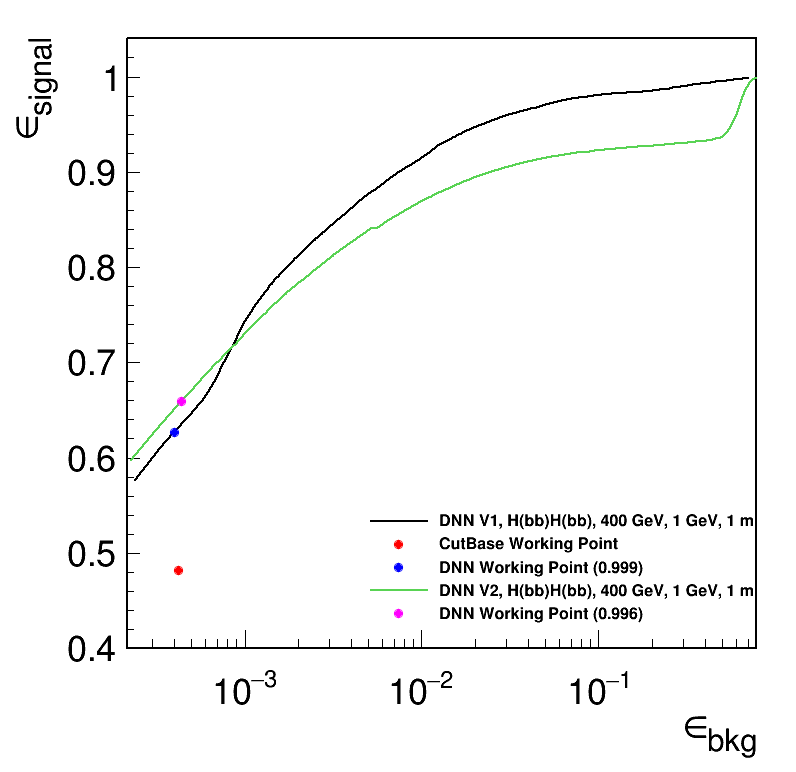

In [30]:
### ROC curve All MC Bkg
 

sig_keys = ['H(bb)H(bb), 200 GeV, 1 GeV, 1 m','H(bb)H(bb), 400 GeV, 1 GeV, 1 m']
sig_cutbase_effs = {}
sig_cutbase_effs['H(bb)H(bb), 200 GeV, 1 GeV, 1 m'] = sig200_cutbase_eff
sig_cutbase_effs['H(bb)H(bb), 400 GeV, 1 GeV, 1 m'] = sig400_cutbase_eff

for sig_k in sig_keys:
    i=0
    c = rt.TCanvas('c','c', 800, 800)
    leg = rt.TLegend(0.45,0.19,0.86,0.34)
#     leg = rt.TLegend(0.65,0.19,0.86,0.34)
    leg.SetTextSize(0.022)
    leg.SetBorderSize(0)
    leg.SetEntrySeparation(0.01)
    gr = {}
    purity = {}

    #     Plotting ROC curve v1
    gr['Datav1'+sig_k] = create_TGraph(DataEffv1,Noeffv1[sig_k],axis_title = ['#epsilon_{bkg}','#epsilon_{signal}'])
    gr['Datav1'+sig_k].SetLineColor(std_color_list_ext[i])
    gr['Datav1'+sig_k].SetLineWidth(2)
    gr['Datav1'+sig_k].SetMinimum(0.4)
    gr['Datav1'+sig_k].GetYaxis().SetRangeUser(0.0, 1.0)
    gr['Datav1'+sig_k].GetXaxis().SetLimits(0.0, 1.0)

    gr['Datav1'+sig_k].Draw('ac')
    leg.AddEntry(gr['Datav1'+sig_k],'DNN V1, '+sig_k, 'l')
    


    #cutbased working point
    i+=1
    cutbase_eff_sig_pt = np.array([sig_cutbase_effs[sig_k]]) 
    cutbase_eff_bkg_pt = np.array([data_cutbase_eff]) 
    print(cutbase_eff_sig_pt,cutbase_eff_bkg_pt)
    gr['CutBase'+sig_k] = create_TGraph(cutbase_eff_bkg_pt,cutbase_eff_sig_pt,axis_title = ['#epsilon_{bkg}','#epsilon_{signal}'])
    gr['CutBase'+sig_k].SetMarkerSize(1.)
    gr['CutBase'+sig_k].SetMarkerColor(std_color_list_ext[i])
    gr['CutBase'+sig_k].SetLineColor(std_color_list_ext[i])
    gr['CutBase'+sig_k].SetMinimum(0.4)
    gr['CutBase'+sig_k].GetYaxis().SetRangeUser(0.0, 1.0)
    gr['CutBase'+sig_k].GetXaxis().SetLimits(0.0, 1.0)


    gr['CutBase'+sig_k].Draw('psame')
    leg.AddEntry(gr['CutBase'+sig_k],'CutBase Working Point','p')
    
    #aiming dnn working point
    i+=1
    dnn_eff_sig_pt = np.array([Noeffv1[sig_k][aim_nothre_cntv1]]) 
    dnn_eff_bkg_pt = np.array([DataEffv1[aim_nothre_cntv1]]) 
    print(dnn_eff_sig_pt,dnn_eff_bkg_pt)
    gr['AimDNNv1'+sig_k] = create_TGraph(dnn_eff_bkg_pt,dnn_eff_sig_pt,axis_title = ['#epsilon_{bkg}','#epsilon_{signal}'])
    gr['AimDNNv1'+sig_k].SetMarkerSize(1.)
    gr['AimDNNv1'+sig_k].SetMarkerColor(std_color_list_ext[i])
    gr['AimDNNv1'+sig_k].SetLineColor(std_color_list_ext[i])
    gr['AimDNNv1'+sig_k].SetMinimum(0.4)
    gr['AimDNNv1'+sig_k].GetYaxis().SetRangeUser(0.0, 1.0)
    gr['AimDNNv1'+sig_k].GetXaxis().SetLimits(0.0, 1.0)


    gr['AimDNNv1'+sig_k].Draw('psame')
    leg.AddEntry(gr['AimDNNv1'+sig_k],'DNN Working Point ('+str(aim_nothre_ptv1)+')','p')
    
    #old aiming dnn working point
    i+=1
    old_dnn_eff_sig_pt = np.array([Noeffv1[sig_k][cnt_oldv1]]) 
    old_dnn_eff_bkg_pt = np.array([DataEffv1[cnt_oldv1]]) 
    print(old_dnn_eff_sig_pt,old_dnn_eff_bkg_pt)
    gr['OldAimDNNv1'+sig_k] = create_TGraph(old_dnn_eff_bkg_pt,old_dnn_eff_sig_pt,axis_title = ['#epsilon_{bkg}','#epsilon_{signal}'])
    gr['OldAimDNNv1'+sig_k].SetMarkerSize(1.)
    gr['OldAimDNNv1'+sig_k].SetMarkerColor(std_color_list_ext[i])
    gr['OldAimDNNv1'+sig_k].SetLineColor(std_color_list_ext[i])
    gr['OldAimDNNv1'+sig_k].SetMinimum(0.4)
    gr['OldAimDNNv1'+sig_k].GetYaxis().SetRangeUser(0.0, 1.0)
    gr['OldAimDNNv1'+sig_k].GetXaxis().SetLimits(0.0, 1.0)


#     gr['OldAimDNNv1'+sig_k].Draw('psame')
#     leg.AddEntry(gr['OldAimDNNv1'+sig_k],'DNN Working Point ('+str(pt_thre_oldv1)+')','p')
    
    #     Plotting ROC curve v2
    gr['Datav2'+sig_k] = create_TGraph(DataEff,Noeff[sig_k],axis_title = ['#epsilon_{bkg}','#epsilon_{signal}'])
    gr['Datav2'+sig_k].SetLineColor(std_color_list_ext[i])
    gr['Datav2'+sig_k].SetLineWidth(2)
    gr['Datav2'+sig_k].SetMinimum(0.4)
    gr['Datav2'+sig_k].GetYaxis().SetRangeUser(0.0, 1.0)
    gr['Datav2'+sig_k].GetXaxis().SetLimits(0.0, 1.0)

    gr['Datav2'+sig_k].Draw('ac' if i==0 else 'c')
    leg.AddEntry(gr['Datav2'+sig_k],'DNN V2, '+sig_k, 'l')
    


#     #cutbased working point
#     i+=1
#     cutbase_eff_sig_pt = np.array([sig_cutbase_effs[sig_k]]) 
#     cutbase_eff_bkg_pt = np.array([data_cutbase_eff]) 
#     print(cutbase_eff_sig_pt,cutbase_eff_bkg_pt)
#     gr['CutBase'+sig_k] = create_TGraph(cutbase_eff_bkg_pt,cutbase_eff_sig_pt,axis_title = ['#epsilon_{bkg}','#epsilon_{signal}'])
#     gr['CutBase'+sig_k].SetMarkerSize(1.)
#     gr['CutBase'+sig_k].SetMarkerColor(std_color_list_ext[i])
#     gr['CutBase'+sig_k].SetLineColor(std_color_list_ext[i])
#     gr['CutBase'+sig_k].SetMinimum(0.4)
#     gr['CutBase'+sig_k].GetYaxis().SetRangeUser(0.0, 1.0)
#     gr['CutBase'+sig_k].GetXaxis().SetLimits(0.0, 1.0)


#     gr['CutBase'+sig_k].Draw('psame')
#     leg.AddEntry(gr['CutBase'+sig_k],'CutBase Working Point','p')
    
    #aiming dnn working point
    i+=1
    dnn_eff_sig_pt = np.array([Noeff[sig_k][aim_nothre_cnt]]) 
    dnn_eff_bkg_pt = np.array([DataEff[aim_nothre_cnt]]) 
    print(dnn_eff_sig_pt,dnn_eff_bkg_pt)
    gr['AimDNNv2'+sig_k] = create_TGraph(dnn_eff_bkg_pt,dnn_eff_sig_pt,axis_title = ['#epsilon_{bkg}','#epsilon_{signal}'])
    gr['AimDNNv2'+sig_k].SetMarkerSize(1.)
    gr['AimDNNv2'+sig_k].SetMarkerColor(std_color_list_ext[i])
    gr['AimDNNv2'+sig_k].SetLineColor(std_color_list_ext[i])
    gr['AimDNNv2'+sig_k].SetMinimum(0.4)
    gr['AimDNNv2'+sig_k].GetYaxis().SetRangeUser(0.0, 1.0)
    gr['AimDNNv2'+sig_k].GetXaxis().SetLimits(0.0, 1.0)


    gr['AimDNNv2'+sig_k].Draw('psame')
    leg.AddEntry(gr['AimDNNv2'+sig_k],'DNN Working Point ('+str(aim_nothre_pt)+')','p')
    
    #old aiming dnn working point
    i+=1
    old_dnn_eff_sig_pt = np.array([Noeff[sig_k][cnt_old]]) 
    old_dnn_eff_bkg_pt = np.array([DataEff[cnt_old]]) 
    print(old_dnn_eff_sig_pt,old_dnn_eff_bkg_pt)
    gr['OldAimDNNv2'+sig_k] = create_TGraph(old_dnn_eff_bkg_pt,old_dnn_eff_sig_pt,axis_title = ['#epsilon_{bkg}','#epsilon_{signal}'])
    gr['OldAimDNNv2'+sig_k].SetMarkerSize(1.)
    gr['OldAimDNNv2'+sig_k].SetMarkerColor(std_color_list_ext[i])
    gr['OldAimDNNv2'+sig_k].SetLineColor(std_color_list_ext[i])
    gr['OldAimDNNv2'+sig_k].SetMinimum(0.4)
    gr['OldAimDNNv2'+sig_k].GetYaxis().SetRangeUser(0.0, 1.0)
    gr['OldAimDNNv2'+sig_k].GetXaxis().SetLimits(0.0, 1.0)


#     gr['OldAimDNNv2'+sig_k].Draw('psame')
#     leg.AddEntry(gr['OldAimDNNv2'+sig_k],'DNN Working Point ('+str(pt_thre_old)+')','p')
        
 
    leg.Draw()
    c.SetLogx()

    c.Draw()
    c.SaveAs(plotDir+'V1V2_ROC_DNN_Data_BKG_Sig'+sig_k+'GeV.png')


[0.49863] [0.000422]
[0.57625576] [0.00040004]
[0.60456617] [0.00048445]
[0.62328766] [0.00043612]
4
[0.65388127] [0.00054254]
[0.481758] [0.000422]
[0.62718052] [0.00040004]
[0.64372948] [0.00048445]
[0.65921985] [0.00043612]
9
[0.67786279] [0.00054254]


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /storage/user/jmao/gpu/jmao/cms-llp/plots/20201205/2018_no_sigmatch/dnn_v3/dnn_v1nosi_v2_v3/simplifiedplots/V1V2_ROC_DNN_Data_BKG_SIG.png has been created


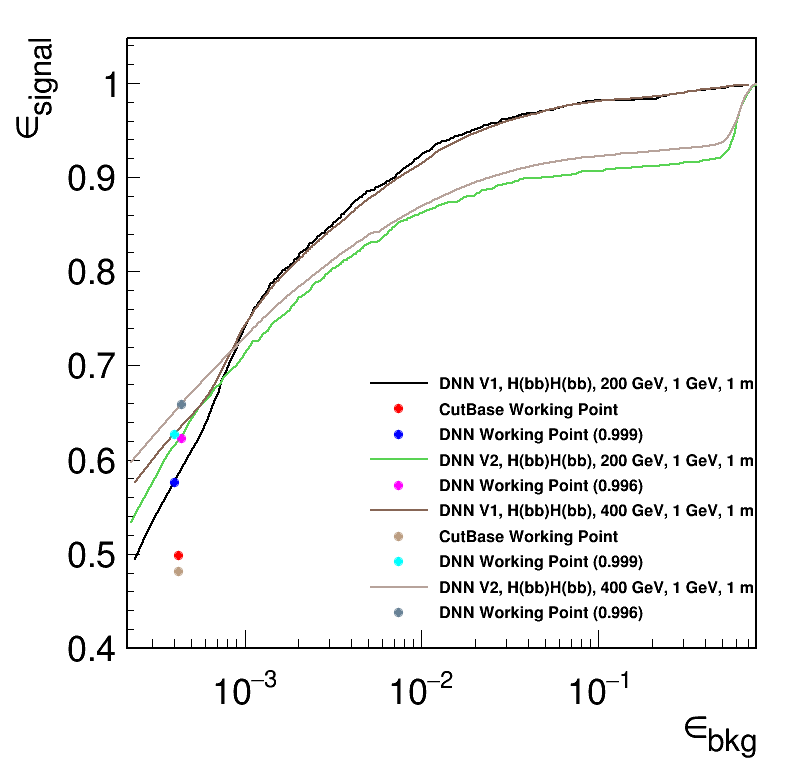

In [31]:
### ROC curve All MC Bkg
 

sig_keys = ['H(bb)H(bb), 200 GeV, 1 GeV, 1 m','H(bb)H(bb), 400 GeV, 1 GeV, 1 m']
sig_cutbase_effs = {}
sig_cutbase_effs['H(bb)H(bb), 200 GeV, 1 GeV, 1 m'] = sig200_cutbase_eff
sig_cutbase_effs['H(bb)H(bb), 400 GeV, 1 GeV, 1 m'] = sig400_cutbase_eff

i=0
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.45,0.19,0.86,0.52)
#     leg = rt.TLegend(0.65,0.19,0.86,0.34)
leg.SetTextSize(0.022)
leg.SetBorderSize(0)
leg.SetEntrySeparation(0.01)
gr = {}
purity = {}
for sig_k in sig_keys:


    #     Plotting ROC curve v1
    gr['Datav1'+sig_k] = create_TGraph(DataEffv1,Noeffv1[sig_k],axis_title = ['#epsilon_{bkg}','#epsilon_{signal}'])
    gr['Datav1'+sig_k].SetLineColor(std_color_list_ext[i])
    gr['Datav1'+sig_k].SetLineWidth(2)
    gr['Datav1'+sig_k].SetMinimum(0.4)
    gr['Datav1'+sig_k].GetYaxis().SetRangeUser(0.0, 1.0)
    gr['Datav1'+sig_k].GetXaxis().SetLimits(0.0, 1.0)

    gr['Datav1'+sig_k].Draw('ac' if i==0 else 'c')
    leg.AddEntry(gr['Datav1'+sig_k],'DNN V1, '+sig_k, 'l')
    


    #cutbased working point
    i+=1
    cutbase_eff_sig_pt = np.array([sig_cutbase_effs[sig_k]]) 
    cutbase_eff_bkg_pt = np.array([data_cutbase_eff]) 
    print(cutbase_eff_sig_pt,cutbase_eff_bkg_pt)
    gr['CutBase'+sig_k] = create_TGraph(cutbase_eff_bkg_pt,cutbase_eff_sig_pt,axis_title = ['#epsilon_{bkg}','#epsilon_{signal}'])
    gr['CutBase'+sig_k].SetMarkerSize(1.)
    gr['CutBase'+sig_k].SetMarkerColor(std_color_list_ext[i])
    gr['CutBase'+sig_k].SetLineColor(std_color_list_ext[i])
    gr['CutBase'+sig_k].SetMinimum(0.4)
    gr['CutBase'+sig_k].GetYaxis().SetRangeUser(0.0, 1.0)
    gr['CutBase'+sig_k].GetXaxis().SetLimits(0.0, 1.0)


    gr['CutBase'+sig_k].Draw('psame')
    leg.AddEntry(gr['CutBase'+sig_k],'CutBase Working Point','p')
    
    #aiming dnn working point
    i+=1
    dnn_eff_sig_pt = np.array([Noeffv1[sig_k][aim_nothre_cntv1]]) 
    dnn_eff_bkg_pt = np.array([DataEffv1[aim_nothre_cntv1]]) 
    print(dnn_eff_sig_pt,dnn_eff_bkg_pt)
    gr['AimDNNv1'+sig_k] = create_TGraph(dnn_eff_bkg_pt,dnn_eff_sig_pt,axis_title = ['#epsilon_{bkg}','#epsilon_{signal}'])
    gr['AimDNNv1'+sig_k].SetMarkerSize(1.)
    gr['AimDNNv1'+sig_k].SetMarkerColor(std_color_list_ext[i])
    gr['AimDNNv1'+sig_k].SetLineColor(std_color_list_ext[i])
    gr['AimDNNv1'+sig_k].SetMinimum(0.4)
    gr['AimDNNv1'+sig_k].GetYaxis().SetRangeUser(0.0, 1.0)
    gr['AimDNNv1'+sig_k].GetXaxis().SetLimits(0.0, 1.0)


    gr['AimDNNv1'+sig_k].Draw('psame')
    leg.AddEntry(gr['AimDNNv1'+sig_k],'DNN Working Point ('+str(aim_nothre_ptv1)+')','p')
    
    #old aiming dnn working point
    i+=1
    old_dnn_eff_sig_pt = np.array([Noeffv1[sig_k][cnt_oldv1]]) 
    old_dnn_eff_bkg_pt = np.array([DataEffv1[cnt_oldv1]]) 
    print(old_dnn_eff_sig_pt,old_dnn_eff_bkg_pt)
    gr['OldAimDNNv1'+sig_k] = create_TGraph(old_dnn_eff_bkg_pt,old_dnn_eff_sig_pt,axis_title = ['#epsilon_{bkg}','#epsilon_{signal}'])
    gr['OldAimDNNv1'+sig_k].SetMarkerSize(1.)
    gr['OldAimDNNv1'+sig_k].SetMarkerColor(std_color_list_ext[i])
    gr['OldAimDNNv1'+sig_k].SetLineColor(std_color_list_ext[i])
    gr['OldAimDNNv1'+sig_k].SetMinimum(0.4)
    gr['OldAimDNNv1'+sig_k].GetYaxis().SetRangeUser(0.0, 1.0)
    gr['OldAimDNNv1'+sig_k].GetXaxis().SetLimits(0.0, 1.0)


#     gr['OldAimDNNv1'+sig_k].Draw('psame')
#     leg.AddEntry(gr['OldAimDNNv1'+sig_k],'DNN Working Point ('+str(pt_thre_oldv1)+')','p')
    
    #     Plotting ROC curve v2
    gr['Datav2'+sig_k] = create_TGraph(DataEff,Noeff[sig_k],axis_title = ['#epsilon_{bkg}','#epsilon_{signal}'])
    gr['Datav2'+sig_k].SetLineColor(std_color_list_ext[i])
    gr['Datav2'+sig_k].SetLineWidth(2)
    gr['Datav2'+sig_k].SetMinimum(0.4)
    gr['Datav2'+sig_k].GetYaxis().SetRangeUser(0.0, 1.0)
    gr['Datav2'+sig_k].GetXaxis().SetLimits(0.0, 1.0)

    gr['Datav2'+sig_k].Draw('ac' if i==0 else 'c')
    leg.AddEntry(gr['Datav2'+sig_k],'DNN V2, '+sig_k, 'l')
    


#     #cutbased working point
#     i+=1
#     cutbase_eff_sig_pt = np.array([sig_cutbase_effs[sig_k]]) 
#     cutbase_eff_bkg_pt = np.array([data_cutbase_eff]) 
#     print(cutbase_eff_sig_pt,cutbase_eff_bkg_pt)
#     gr['CutBase'+sig_k] = create_TGraph(cutbase_eff_bkg_pt,cutbase_eff_sig_pt,axis_title = ['#epsilon_{bkg}','#epsilon_{signal}'])
#     gr['CutBase'+sig_k].SetMarkerSize(1.)
#     gr['CutBase'+sig_k].SetMarkerColor(std_color_list_ext[i])
#     gr['CutBase'+sig_k].SetLineColor(std_color_list_ext[i])
#     gr['CutBase'+sig_k].SetMinimum(0.4)
#     gr['CutBase'+sig_k].GetYaxis().SetRangeUser(0.0, 1.0)
#     gr['CutBase'+sig_k].GetXaxis().SetLimits(0.0, 1.0)


#     gr['CutBase'+sig_k].Draw('psame')
#     leg.AddEntry(gr['CutBase'+sig_k],'CutBase Working Point','p')
    
    #aiming dnn working point
    i+=1
    dnn_eff_sig_pt = np.array([Noeff[sig_k][aim_nothre_cnt]]) 
    dnn_eff_bkg_pt = np.array([DataEff[aim_nothre_cnt]]) 
    print(dnn_eff_sig_pt,dnn_eff_bkg_pt)
    gr['AimDNNv2'+sig_k] = create_TGraph(dnn_eff_bkg_pt,dnn_eff_sig_pt,axis_title = ['#epsilon_{bkg}','#epsilon_{signal}'])
    gr['AimDNNv2'+sig_k].SetMarkerSize(1.)
    gr['AimDNNv2'+sig_k].SetMarkerColor(std_color_list_ext[i])
    gr['AimDNNv2'+sig_k].SetLineColor(std_color_list_ext[i])
    gr['AimDNNv2'+sig_k].SetMinimum(0.4)
    gr['AimDNNv2'+sig_k].GetYaxis().SetRangeUser(0.0, 1.0)
    gr['AimDNNv2'+sig_k].GetXaxis().SetLimits(0.0, 1.0)


    gr['AimDNNv2'+sig_k].Draw('psame')
    leg.AddEntry(gr['AimDNNv2'+sig_k],'DNN Working Point ('+str(aim_nothre_pt)+')','p')
    
    print(i)
    #old aiming dnn working point
    i+=1
    old_dnn_eff_sig_pt = np.array([Noeff[sig_k][cnt_old]]) 
    old_dnn_eff_bkg_pt = np.array([DataEff[cnt_old]]) 
    print(old_dnn_eff_sig_pt,old_dnn_eff_bkg_pt)
#     if i>8:
#         std_color_list_ext[i]=209
    gr['OldAimDNNv2'+sig_k] = create_TGraph(old_dnn_eff_bkg_pt,old_dnn_eff_sig_pt,axis_title = ['#epsilon_{bkg}','#epsilon_{signal}'])
    gr['OldAimDNNv2'+sig_k].SetMarkerSize(1.)
    gr['OldAimDNNv2'+sig_k].SetMarkerColor(std_color_list_ext[i])
    gr['OldAimDNNv2'+sig_k].SetLineColor(std_color_list_ext[i])
    gr['OldAimDNNv2'+sig_k].SetMinimum(0.4)
    gr['OldAimDNNv2'+sig_k].GetYaxis().SetRangeUser(0.0, 1.0)
    gr['OldAimDNNv2'+sig_k].GetXaxis().SetLimits(0.0, 1.0)


#     gr['OldAimDNNv2'+sig_k].Draw('psame')
#     leg.AddEntry(gr['OldAimDNNv2'+sig_k],'DNN Working Point ('+str(pt_thre_old)+')','p')
        
 
leg.Draw()
c.SetLogx()

c.Draw()
c.SaveAs(plotDir+'V1V2_ROC_DNN_Data_BKG_SIG.png')


## v1v3

[0.49863] [0.000422]
[0.57625576] [0.00040004]
[0.60456617] [0.00048445]
[0.6219178] [0.00042929]
[0.481758] [0.000422]
[0.62718052] [0.00040004]
[0.64372948] [0.00048445]
[0.64327802] [0.00042929]


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /storage/user/jmao/gpu/jmao/cms-llp/plots/20201205/2018_no_sigmatch/dnn_v3/dnn_v1nosi_v2_v3/simplifiedplots/V1V3_ROC_DNN_Data_BKG_SigH(bb)H(bb), 200 GeV, 1 GeV, 1 mGeV.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /storage/user/jmao/gpu/jmao/cms-llp/plots/20201205/2018_no_sigmatch/dnn_v3/dnn_v1nosi_v2_v3/simplifiedplots/V1V3_ROC_DNN_Data_BKG_SigH(bb)H(bb), 400 GeV, 1 GeV, 1 mGeV.png has been created


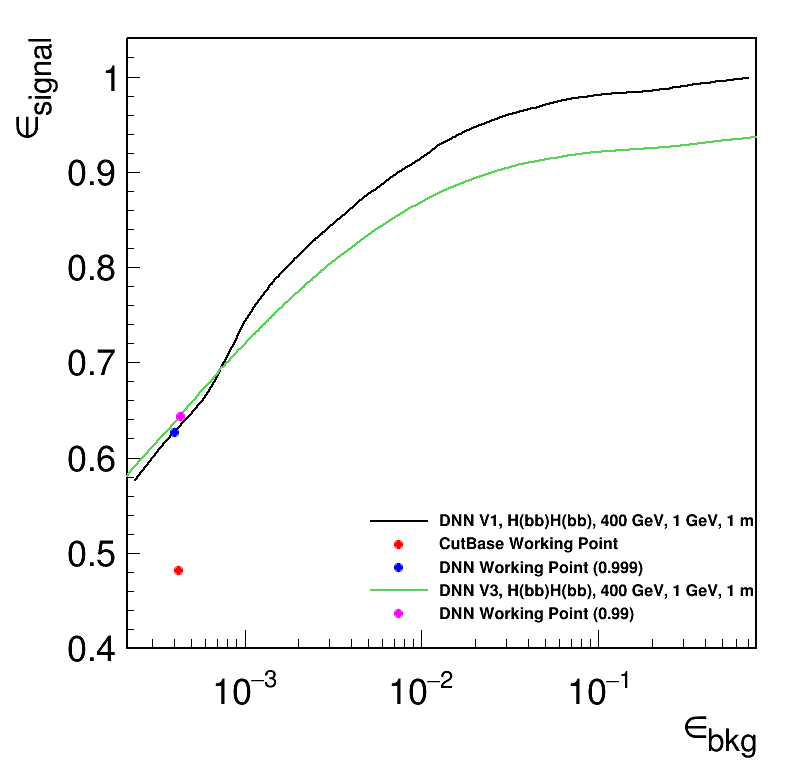

In [34]:
### ROC curve All MC Bkg
 

sig_keys = ['H(bb)H(bb), 200 GeV, 1 GeV, 1 m','H(bb)H(bb), 400 GeV, 1 GeV, 1 m']
sig_cutbase_effs = {}
sig_cutbase_effs['H(bb)H(bb), 200 GeV, 1 GeV, 1 m'] = sig200_cutbase_eff
sig_cutbase_effs['H(bb)H(bb), 400 GeV, 1 GeV, 1 m'] = sig400_cutbase_eff

for sig_k in sig_keys:
    i=0
    c = rt.TCanvas('c','c', 800, 800)
    leg = rt.TLegend(0.45,0.19,0.86,0.34)
#     leg = rt.TLegend(0.65,0.19,0.86,0.34)
    leg.SetTextSize(0.022)
    leg.SetBorderSize(0)
    leg.SetEntrySeparation(0.01)
    gr = {}
    purity = {}

    #     Plotting ROC curve v1
    gr['Datav1'+sig_k] = create_TGraph(DataEffv1,Noeffv1[sig_k],axis_title = ['#epsilon_{bkg}','#epsilon_{signal}'])
    gr['Datav1'+sig_k].SetLineColor(std_color_list_ext[i])
    gr['Datav1'+sig_k].SetLineWidth(2)
    gr['Datav1'+sig_k].SetMinimum(0.4)
    gr['Datav1'+sig_k].GetYaxis().SetRangeUser(0.0, 1.0)
    gr['Datav1'+sig_k].GetXaxis().SetLimits(0.0, 1.0)

    gr['Datav1'+sig_k].Draw('ac')
    leg.AddEntry(gr['Datav1'+sig_k],'DNN V1, '+sig_k, 'l')
    


    #cutbased working point
    i+=1
    cutbase_eff_sig_pt = np.array([sig_cutbase_effs[sig_k]]) 
    cutbase_eff_bkg_pt = np.array([data_cutbase_eff]) 
    print(cutbase_eff_sig_pt,cutbase_eff_bkg_pt)
    gr['CutBase'+sig_k] = create_TGraph(cutbase_eff_bkg_pt,cutbase_eff_sig_pt,axis_title = ['#epsilon_{bkg}','#epsilon_{signal}'])
    gr['CutBase'+sig_k].SetMarkerSize(1.)
    gr['CutBase'+sig_k].SetMarkerColor(std_color_list_ext[i])
    gr['CutBase'+sig_k].SetLineColor(std_color_list_ext[i])
    gr['CutBase'+sig_k].SetMinimum(0.4)
    gr['CutBase'+sig_k].GetYaxis().SetRangeUser(0.0, 1.0)
    gr['CutBase'+sig_k].GetXaxis().SetLimits(0.0, 1.0)


    gr['CutBase'+sig_k].Draw('psame')
    leg.AddEntry(gr['CutBase'+sig_k],'CutBase Working Point','p')
    
    #aiming dnn working point
    i+=1
    dnn_eff_sig_pt = np.array([Noeffv1[sig_k][aim_nothre_cntv1]]) 
    dnn_eff_bkg_pt = np.array([DataEffv1[aim_nothre_cntv1]]) 
    print(dnn_eff_sig_pt,dnn_eff_bkg_pt)
    gr['AimDNNv1'+sig_k] = create_TGraph(dnn_eff_bkg_pt,dnn_eff_sig_pt,axis_title = ['#epsilon_{bkg}','#epsilon_{signal}'])
    gr['AimDNNv1'+sig_k].SetMarkerSize(1.)
    gr['AimDNNv1'+sig_k].SetMarkerColor(std_color_list_ext[i])
    gr['AimDNNv1'+sig_k].SetLineColor(std_color_list_ext[i])
    gr['AimDNNv1'+sig_k].SetMinimum(0.4)
    gr['AimDNNv1'+sig_k].GetYaxis().SetRangeUser(0.0, 1.0)
    gr['AimDNNv1'+sig_k].GetXaxis().SetLimits(0.0, 1.0)


    gr['AimDNNv1'+sig_k].Draw('psame')
    leg.AddEntry(gr['AimDNNv1'+sig_k],'DNN Working Point ('+str(aim_nothre_ptv1)+')','p')
    
    #old aiming dnn working point
    i+=1
    old_dnn_eff_sig_pt = np.array([Noeffv1[sig_k][cnt_oldv1]]) 
    old_dnn_eff_bkg_pt = np.array([DataEffv1[cnt_oldv1]]) 
    print(old_dnn_eff_sig_pt,old_dnn_eff_bkg_pt)
    gr['OldAimDNNv1'+sig_k] = create_TGraph(old_dnn_eff_bkg_pt,old_dnn_eff_sig_pt,axis_title = ['#epsilon_{bkg}','#epsilon_{signal}'])
    gr['OldAimDNNv1'+sig_k].SetMarkerSize(1.)
    gr['OldAimDNNv1'+sig_k].SetMarkerColor(std_color_list_ext[i])
    gr['OldAimDNNv1'+sig_k].SetLineColor(std_color_list_ext[i])
    gr['OldAimDNNv1'+sig_k].SetMinimum(0.4)
    gr['OldAimDNNv1'+sig_k].GetYaxis().SetRangeUser(0.0, 1.0)
    gr['OldAimDNNv1'+sig_k].GetXaxis().SetLimits(0.0, 1.0)


#     gr['OldAimDNNv1'+sig_k].Draw('psame')
#     leg.AddEntry(gr['OldAimDNNv1'+sig_k],'DNN Working Point ('+str(pt_thre_oldv1)+')','p')

    #     Plotting ROC curve v3
    gr['Datav3'+sig_k] = create_TGraph(DataEffv3,Noeffv3[sig_k],axis_title = ['#epsilon_{bkg}','#epsilon_{signal}'])
    gr['Datav3'+sig_k].SetLineColor(std_color_list_ext[i])
    gr['Datav3'+sig_k].SetLineWidth(2)
    gr['Datav3'+sig_k].SetMinimum(0.4)
    gr['Datav3'+sig_k].GetYaxis().SetRangeUser(0.0, 1.0)
    gr['Datav3'+sig_k].GetXaxis().SetLimits(0.0, 1.0)

    gr['Datav3'+sig_k].Draw('ac' if i==0 else 'c')
    leg.AddEntry(gr['Datav3'+sig_k],'DNN V3, '+sig_k, 'l')
    


    #cutbased working point
#     i+=1
#     cutbase_eff_sig_pt = np.array([sig_cutbase_effs[sig_k]]) 
#     cutbase_eff_bkg_pt = np.array([data_cutbase_eff]) 
#     print(cutbase_eff_sig_pt,cutbase_eff_bkg_pt)
#     gr['CutBase'+sig_k] = create_TGraph(cutbase_eff_bkg_pt,cutbase_eff_sig_pt,axis_title = ['#epsilon_{bkg}','#epsilon_{signal}'])
#     gr['CutBase'+sig_k].SetMarkerSize(1.)
#     gr['CutBase'+sig_k].SetMarkerColor(std_color_list_ext[i])
#     gr['CutBase'+sig_k].SetLineColor(std_color_list_ext[i])
#     gr['CutBase'+sig_k].SetMinimum(0.4)
#     gr['CutBase'+sig_k].GetYaxis().SetRangeUser(0.0, 1.0)
#     gr['CutBase'+sig_k].GetXaxis().SetLimits(0.0, 1.0)


#     gr['CutBase'+sig_k].Draw('psame')
#     leg.AddEntry(gr['CutBase'+sig_k],'CutBase Working Point','p')
    
    #aiming dnn working point
    i+=1
    dnn_eff_sig_pt = np.array([Noeffv3[sig_k][aim_nothre_cntv3]]) 
    dnn_eff_bkg_pt = np.array([DataEffv3[aim_nothre_cntv3]]) 
    print(dnn_eff_sig_pt,dnn_eff_bkg_pt)
    gr['AimDNNv3'+sig_k] = create_TGraph(dnn_eff_bkg_pt,dnn_eff_sig_pt,axis_title = ['#epsilon_{bkg}','#epsilon_{signal}'])
    gr['AimDNNv3'+sig_k].SetMarkerSize(1.)
    gr['AimDNNv3'+sig_k].SetMarkerColor(std_color_list_ext[i])
    gr['AimDNNv3'+sig_k].SetLineColor(std_color_list_ext[i])
    gr['AimDNNv3'+sig_k].SetMinimum(0.4)
    gr['AimDNNv3'+sig_k].GetYaxis().SetRangeUser(0.0, 1.0)
    gr['AimDNNv3'+sig_k].GetXaxis().SetLimits(0.0, 1.0)


    gr['AimDNNv3'+sig_k].Draw('psame')
    leg.AddEntry(gr['AimDNNv3'+sig_k],'DNN Working Point ('+str(aim_nothre_ptv3)+')','p')
    
  
 
    leg.Draw()
    c.SetLogx()

    c.Draw()
    c.SaveAs(plotDir+'V1V3_ROC_DNN_Data_BKG_Sig'+sig_k+'GeV.png')


[0.49863] [0.000422]
[0.57625576] [0.00040004]
[0.60456617] [0.00048445]
[0.6219178] [0.00042929]
[0.481758] [0.000422]
[0.62718052] [0.00040004]
[0.64372948] [0.00048445]
[0.64327802] [0.00042929]


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /storage/user/jmao/gpu/jmao/cms-llp/plots/20201205/2018_no_sigmatch/dnn_v3/dnn_v1nosi_v2_v3/simplifiedplots/V1V3_ROC_DNN_Data_BKG_SIG.png has been created


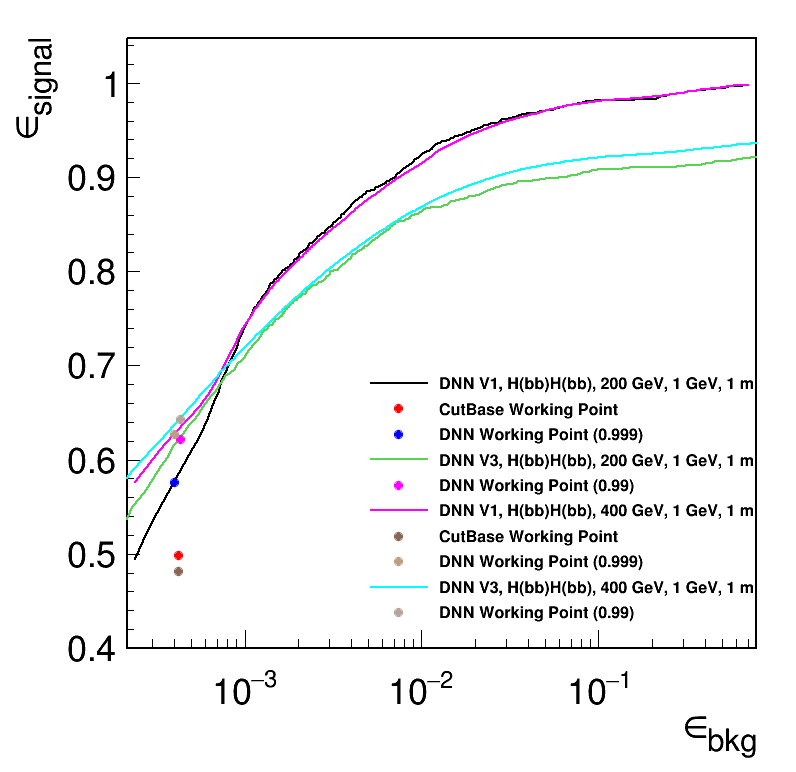

In [33]:
### ROC curve All MC Bkg
 

sig_keys = ['H(bb)H(bb), 200 GeV, 1 GeV, 1 m','H(bb)H(bb), 400 GeV, 1 GeV, 1 m']
sig_cutbase_effs = {}
sig_cutbase_effs['H(bb)H(bb), 200 GeV, 1 GeV, 1 m'] = sig200_cutbase_eff
sig_cutbase_effs['H(bb)H(bb), 400 GeV, 1 GeV, 1 m'] = sig400_cutbase_eff

i=0
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.45,0.19,0.86,0.52)
#     leg = rt.TLegend(0.65,0.19,0.86,0.34)
leg.SetTextSize(0.022)
leg.SetBorderSize(0)
leg.SetEntrySeparation(0.01)
gr = {}
purity = {}
for sig_k in sig_keys:


    #     Plotting ROC curve v1
    gr['Datav1'+sig_k] = create_TGraph(DataEffv1,Noeffv1[sig_k],axis_title = ['#epsilon_{bkg}','#epsilon_{signal}'])
    gr['Datav1'+sig_k].SetLineColor(std_color_list_ext[i])
    gr['Datav1'+sig_k].SetLineWidth(2)
    gr['Datav1'+sig_k].SetMinimum(0.4)
    gr['Datav1'+sig_k].GetYaxis().SetRangeUser(0.0, 1.0)
    gr['Datav1'+sig_k].GetXaxis().SetLimits(0.0, 1.0)

    gr['Datav1'+sig_k].Draw('ac' if i==0 else 'c')
    leg.AddEntry(gr['Datav1'+sig_k],'DNN V1, '+sig_k, 'l')
    


    #cutbased working point
    i+=1
    cutbase_eff_sig_pt = np.array([sig_cutbase_effs[sig_k]]) 
    cutbase_eff_bkg_pt = np.array([data_cutbase_eff]) 
    print(cutbase_eff_sig_pt,cutbase_eff_bkg_pt)
    gr['CutBase'+sig_k] = create_TGraph(cutbase_eff_bkg_pt,cutbase_eff_sig_pt,axis_title = ['#epsilon_{bkg}','#epsilon_{signal}'])
    gr['CutBase'+sig_k].SetMarkerSize(1.)
    gr['CutBase'+sig_k].SetMarkerColor(std_color_list_ext[i])
    gr['CutBase'+sig_k].SetLineColor(std_color_list_ext[i])
    gr['CutBase'+sig_k].SetMinimum(0.4)
    gr['CutBase'+sig_k].GetYaxis().SetRangeUser(0.0, 1.0)
    gr['CutBase'+sig_k].GetXaxis().SetLimits(0.0, 1.0)


    gr['CutBase'+sig_k].Draw('psame')
    leg.AddEntry(gr['CutBase'+sig_k],'CutBase Working Point','p')
    
    #aiming dnn working point
    i+=1
    dnn_eff_sig_pt = np.array([Noeffv1[sig_k][aim_nothre_cntv1]]) 
    dnn_eff_bkg_pt = np.array([DataEffv1[aim_nothre_cntv1]]) 
    print(dnn_eff_sig_pt,dnn_eff_bkg_pt)
    gr['AimDNNv1'+sig_k] = create_TGraph(dnn_eff_bkg_pt,dnn_eff_sig_pt,axis_title = ['#epsilon_{bkg}','#epsilon_{signal}'])
    gr['AimDNNv1'+sig_k].SetMarkerSize(1.)
    gr['AimDNNv1'+sig_k].SetMarkerColor(std_color_list_ext[i])
    gr['AimDNNv1'+sig_k].SetLineColor(std_color_list_ext[i])
    gr['AimDNNv1'+sig_k].SetMinimum(0.4)
    gr['AimDNNv1'+sig_k].GetYaxis().SetRangeUser(0.0, 1.0)
    gr['AimDNNv1'+sig_k].GetXaxis().SetLimits(0.0, 1.0)


    gr['AimDNNv1'+sig_k].Draw('psame')
    leg.AddEntry(gr['AimDNNv1'+sig_k],'DNN Working Point ('+str(aim_nothre_ptv1)+')','p')
    
    #old aiming dnn working point
    i+=1
    old_dnn_eff_sig_pt = np.array([Noeffv1[sig_k][cnt_oldv1]]) 
    old_dnn_eff_bkg_pt = np.array([DataEffv1[cnt_oldv1]]) 
    print(old_dnn_eff_sig_pt,old_dnn_eff_bkg_pt)
    gr['OldAimDNNv1'+sig_k] = create_TGraph(old_dnn_eff_bkg_pt,old_dnn_eff_sig_pt,axis_title = ['#epsilon_{bkg}','#epsilon_{signal}'])
    gr['OldAimDNNv1'+sig_k].SetMarkerSize(1.)
    gr['OldAimDNNv1'+sig_k].SetMarkerColor(std_color_list_ext[i])
    gr['OldAimDNNv1'+sig_k].SetLineColor(std_color_list_ext[i])
    gr['OldAimDNNv1'+sig_k].SetMinimum(0.4)
    gr['OldAimDNNv1'+sig_k].GetYaxis().SetRangeUser(0.0, 1.0)
    gr['OldAimDNNv1'+sig_k].GetXaxis().SetLimits(0.0, 1.0)


#     gr['OldAimDNNv1'+sig_k].Draw('psame')
#     leg.AddEntry(gr['OldAimDNNv1'+sig_k],'DNN Working Point ('+str(pt_thre_oldv1)+')','p')
    
    #     Plotting ROC curve v3
    gr['Datav3'+sig_k] = create_TGraph(DataEffv3,Noeffv3[sig_k],axis_title = ['#epsilon_{bkg}','#epsilon_{signal}'])
    gr['Datav3'+sig_k].SetLineColor(std_color_list_ext[i])
    gr['Datav3'+sig_k].SetLineWidth(2)
    gr['Datav3'+sig_k].SetMinimum(0.4)
    gr['Datav3'+sig_k].GetYaxis().SetRangeUser(0.0, 1.0)
    gr['Datav3'+sig_k].GetXaxis().SetLimits(0.0, 1.0)

    gr['Datav3'+sig_k].Draw('ac' if i==0 else 'c')
    leg.AddEntry(gr['Datav3'+sig_k],'DNN V3, '+sig_k, 'l')
    


    #cutbased working point
#     i+=1
#     cutbase_eff_sig_pt = np.array([sig_cutbase_effs[sig_k]]) 
#     cutbase_eff_bkg_pt = np.array([data_cutbase_eff]) 
#     print(cutbase_eff_sig_pt,cutbase_eff_bkg_pt)
#     gr['CutBase'+sig_k] = create_TGraph(cutbase_eff_bkg_pt,cutbase_eff_sig_pt,axis_title = ['#epsilon_{bkg}','#epsilon_{signal}'])
#     gr['CutBase'+sig_k].SetMarkerSize(1.)
#     gr['CutBase'+sig_k].SetMarkerColor(std_color_list_ext[i])
#     gr['CutBase'+sig_k].SetLineColor(std_color_list_ext[i])
#     gr['CutBase'+sig_k].SetMinimum(0.4)
#     gr['CutBase'+sig_k].GetYaxis().SetRangeUser(0.0, 1.0)
#     gr['CutBase'+sig_k].GetXaxis().SetLimits(0.0, 1.0)


#     gr['CutBase'+sig_k].Draw('psame')
#     leg.AddEntry(gr['CutBase'+sig_k],'CutBase Working Point','p')
    
    #aiming dnn working point
    i+=1
    dnn_eff_sig_pt = np.array([Noeffv3[sig_k][aim_nothre_cntv3]]) 
    dnn_eff_bkg_pt = np.array([DataEffv3[aim_nothre_cntv3]]) 
    print(dnn_eff_sig_pt,dnn_eff_bkg_pt)
    gr['AimDNNv3'+sig_k] = create_TGraph(dnn_eff_bkg_pt,dnn_eff_sig_pt,axis_title = ['#epsilon_{bkg}','#epsilon_{signal}'])
    gr['AimDNNv3'+sig_k].SetMarkerSize(1.)
    gr['AimDNNv3'+sig_k].SetMarkerColor(std_color_list_ext[i])
    gr['AimDNNv3'+sig_k].SetLineColor(std_color_list_ext[i])
    gr['AimDNNv3'+sig_k].SetMinimum(0.4)
    gr['AimDNNv3'+sig_k].GetYaxis().SetRangeUser(0.0, 1.0)
    gr['AimDNNv3'+sig_k].GetXaxis().SetLimits(0.0, 1.0)


    gr['AimDNNv3'+sig_k].Draw('psame')
    leg.AddEntry(gr['AimDNNv3'+sig_k],'DNN Working Point ('+str(aim_nothre_ptv3)+')','p')  
        
 
leg.Draw()
c.SetLogx()

c.Draw()
c.SaveAs(plotDir+'V1V3_ROC_DNN_Data_BKG_SIG.png')


## v1v2v3

[0.49863] [0.000422]
[0.57625576] [0.00040004]
[0.60456617] [0.00048445]
[0.62328766] [0.00043612]
4
[0.65388127] [0.00054254]
[0.6219178] [0.00042929]
[0.481758] [0.000422]
[0.62718052] [0.00040004]
[0.64372948] [0.00048445]
[0.65921985] [0.00043612]
4
[0.67786279] [0.00054254]
[0.64327802] [0.00042929]


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /storage/user/jmao/gpu/jmao/cms-llp/plots/20201205/2018_no_sigmatch/dnn_v3/dnn_v1nosi_v2_v3/simplifiedplots/V1V2V3_ROC_DNN_Data_BKG_SigH(bb)H(bb), 200 GeV, 1 GeV, 1 mGeV.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /storage/user/jmao/gpu/jmao/cms-llp/plots/20201205/2018_no_sigmatch/dnn_v3/dnn_v1nosi_v2_v3/simplifiedplots/V1V2V3_ROC_DNN_Data_BKG_SigH(bb)H(bb), 400 GeV, 1 GeV, 1 mGeV.png has been created


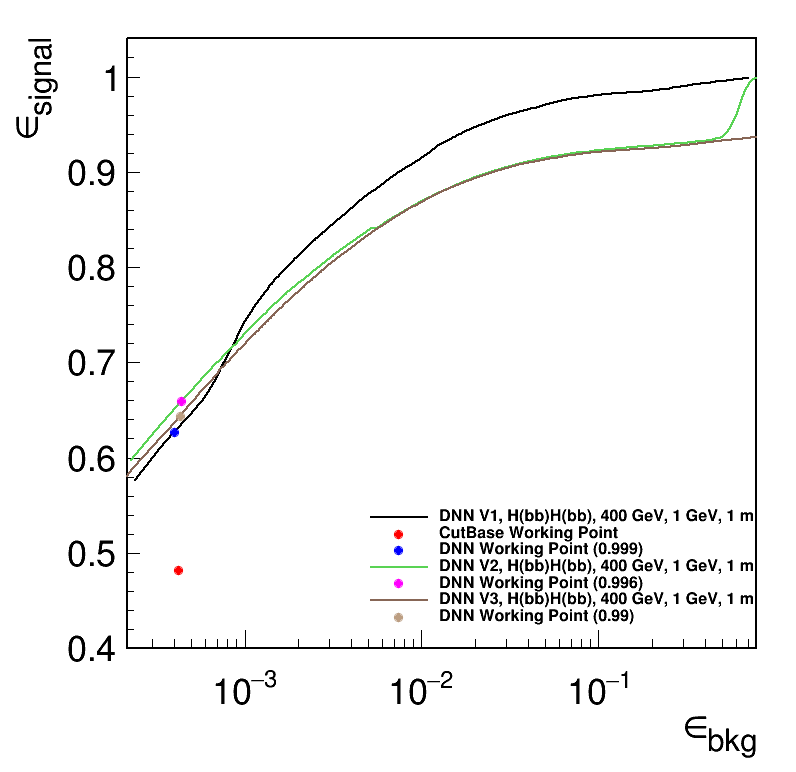

In [35]:
### ROC curve All MC Bkg
 

sig_keys = ['H(bb)H(bb), 200 GeV, 1 GeV, 1 m','H(bb)H(bb), 400 GeV, 1 GeV, 1 m']
sig_cutbase_effs = {}
sig_cutbase_effs['H(bb)H(bb), 200 GeV, 1 GeV, 1 m'] = sig200_cutbase_eff
sig_cutbase_effs['H(bb)H(bb), 400 GeV, 1 GeV, 1 m'] = sig400_cutbase_eff

for sig_k in sig_keys:
    i=0
    c = rt.TCanvas('c','c', 800, 800)
    leg = rt.TLegend(0.45,0.19,0.86,0.34)
#     leg = rt.TLegend(0.65,0.19,0.86,0.34)
    leg.SetTextSize(0.022)
    leg.SetBorderSize(0)
    leg.SetEntrySeparation(0.01)
    gr = {}
    purity = {}

    #     Plotting ROC curve v1
    gr['Datav1'+sig_k] = create_TGraph(DataEffv1,Noeffv1[sig_k],axis_title = ['#epsilon_{bkg}','#epsilon_{signal}'])
    gr['Datav1'+sig_k].SetLineColor(std_color_list_ext[i])
    gr['Datav1'+sig_k].SetLineWidth(2)
    gr['Datav1'+sig_k].SetMinimum(0.4)
    gr['Datav1'+sig_k].GetYaxis().SetRangeUser(0.0, 1.0)
    gr['Datav1'+sig_k].GetXaxis().SetLimits(0.0, 1.0)

    gr['Datav1'+sig_k].Draw('ac')
    leg.AddEntry(gr['Datav1'+sig_k],'DNN V1, '+sig_k, 'l')
    


    #cutbased working point
    i+=1
    cutbase_eff_sig_pt = np.array([sig_cutbase_effs[sig_k]]) 
    cutbase_eff_bkg_pt = np.array([data_cutbase_eff]) 
    print(cutbase_eff_sig_pt,cutbase_eff_bkg_pt)
    gr['CutBase'+sig_k] = create_TGraph(cutbase_eff_bkg_pt,cutbase_eff_sig_pt,axis_title = ['#epsilon_{bkg}','#epsilon_{signal}'])
    gr['CutBase'+sig_k].SetMarkerSize(1.)
    gr['CutBase'+sig_k].SetMarkerColor(std_color_list_ext[i])
    gr['CutBase'+sig_k].SetLineColor(std_color_list_ext[i])
    gr['CutBase'+sig_k].SetMinimum(0.4)
    gr['CutBase'+sig_k].GetYaxis().SetRangeUser(0.0, 1.0)
    gr['CutBase'+sig_k].GetXaxis().SetLimits(0.0, 1.0)


    gr['CutBase'+sig_k].Draw('psame')
    leg.AddEntry(gr['CutBase'+sig_k],'CutBase Working Point','p')
    
    #aiming dnn working point
    i+=1
    dnn_eff_sig_pt = np.array([Noeffv1[sig_k][aim_nothre_cntv1]]) 
    dnn_eff_bkg_pt = np.array([DataEffv1[aim_nothre_cntv1]]) 
    print(dnn_eff_sig_pt,dnn_eff_bkg_pt)
    gr['AimDNNv1'+sig_k] = create_TGraph(dnn_eff_bkg_pt,dnn_eff_sig_pt,axis_title = ['#epsilon_{bkg}','#epsilon_{signal}'])
    gr['AimDNNv1'+sig_k].SetMarkerSize(1.)
    gr['AimDNNv1'+sig_k].SetMarkerColor(std_color_list_ext[i])
    gr['AimDNNv1'+sig_k].SetLineColor(std_color_list_ext[i])
    gr['AimDNNv1'+sig_k].SetMinimum(0.4)
    gr['AimDNNv1'+sig_k].GetYaxis().SetRangeUser(0.0, 1.0)
    gr['AimDNNv1'+sig_k].GetXaxis().SetLimits(0.0, 1.0)


    gr['AimDNNv1'+sig_k].Draw('psame')
    leg.AddEntry(gr['AimDNNv1'+sig_k],'DNN Working Point ('+str(aim_nothre_ptv1)+')','p')
    
    #old aiming dnn working point
    i+=1
    old_dnn_eff_sig_pt = np.array([Noeffv1[sig_k][cnt_oldv1]]) 
    old_dnn_eff_bkg_pt = np.array([DataEffv1[cnt_oldv1]]) 
    print(old_dnn_eff_sig_pt,old_dnn_eff_bkg_pt)
    gr['OldAimDNNv1'+sig_k] = create_TGraph(old_dnn_eff_bkg_pt,old_dnn_eff_sig_pt,axis_title = ['#epsilon_{bkg}','#epsilon_{signal}'])
    gr['OldAimDNNv1'+sig_k].SetMarkerSize(1.)
    gr['OldAimDNNv1'+sig_k].SetMarkerColor(std_color_list_ext[i])
    gr['OldAimDNNv1'+sig_k].SetLineColor(std_color_list_ext[i])
    gr['OldAimDNNv1'+sig_k].SetMinimum(0.4)
    gr['OldAimDNNv1'+sig_k].GetYaxis().SetRangeUser(0.0, 1.0)
    gr['OldAimDNNv1'+sig_k].GetXaxis().SetLimits(0.0, 1.0)


#     gr['OldAimDNNv1'+sig_k].Draw('psame')
#     leg.AddEntry(gr['OldAimDNNv1'+sig_k],'DNN Working Point ('+str(pt_thre_oldv1)+')','p')

    #     Plotting ROC curve v2
    gr['Datav2'+sig_k] = create_TGraph(DataEff,Noeff[sig_k],axis_title = ['#epsilon_{bkg}','#epsilon_{signal}'])
    gr['Datav2'+sig_k].SetLineColor(std_color_list_ext[i])
    gr['Datav2'+sig_k].SetLineWidth(2)
    gr['Datav2'+sig_k].SetMinimum(0.4)
    gr['Datav2'+sig_k].GetYaxis().SetRangeUser(0.0, 1.0)
    gr['Datav2'+sig_k].GetXaxis().SetLimits(0.0, 1.0)

    gr['Datav2'+sig_k].Draw('ac' if i==0 else 'c')
    leg.AddEntry(gr['Datav2'+sig_k],'DNN V2, '+sig_k, 'l')
    


#     #cutbased working point
#     i+=1
#     cutbase_eff_sig_pt = np.array([sig_cutbase_effs[sig_k]]) 
#     cutbase_eff_bkg_pt = np.array([data_cutbase_eff]) 
#     print(cutbase_eff_sig_pt,cutbase_eff_bkg_pt)
#     gr['CutBase'+sig_k] = create_TGraph(cutbase_eff_bkg_pt,cutbase_eff_sig_pt,axis_title = ['#epsilon_{bkg}','#epsilon_{signal}'])
#     gr['CutBase'+sig_k].SetMarkerSize(1.)
#     gr['CutBase'+sig_k].SetMarkerColor(std_color_list_ext[i])
#     gr['CutBase'+sig_k].SetLineColor(std_color_list_ext[i])
#     gr['CutBase'+sig_k].SetMinimum(0.4)
#     gr['CutBase'+sig_k].GetYaxis().SetRangeUser(0.0, 1.0)
#     gr['CutBase'+sig_k].GetXaxis().SetLimits(0.0, 1.0)


#     gr['CutBase'+sig_k].Draw('psame')
#     leg.AddEntry(gr['CutBase'+sig_k],'CutBase Working Point','p')
    
    #aiming dnn working point
    i+=1
    dnn_eff_sig_pt = np.array([Noeff[sig_k][aim_nothre_cnt]]) 
    dnn_eff_bkg_pt = np.array([DataEff[aim_nothre_cnt]]) 
    print(dnn_eff_sig_pt,dnn_eff_bkg_pt)
    gr['AimDNNv2'+sig_k] = create_TGraph(dnn_eff_bkg_pt,dnn_eff_sig_pt,axis_title = ['#epsilon_{bkg}','#epsilon_{signal}'])
    gr['AimDNNv2'+sig_k].SetMarkerSize(1.)
    gr['AimDNNv2'+sig_k].SetMarkerColor(std_color_list_ext[i])
    gr['AimDNNv2'+sig_k].SetLineColor(std_color_list_ext[i])
    gr['AimDNNv2'+sig_k].SetMinimum(0.4)
    gr['AimDNNv2'+sig_k].GetYaxis().SetRangeUser(0.0, 1.0)
    gr['AimDNNv2'+sig_k].GetXaxis().SetLimits(0.0, 1.0)


    gr['AimDNNv2'+sig_k].Draw('psame')
    leg.AddEntry(gr['AimDNNv2'+sig_k],'DNN Working Point ('+str(aim_nothre_pt)+')','p')
    
    print(i)
    #old aiming dnn working point
    i+=1
    old_dnn_eff_sig_pt = np.array([Noeff[sig_k][cnt_old]]) 
    old_dnn_eff_bkg_pt = np.array([DataEff[cnt_old]]) 
    print(old_dnn_eff_sig_pt,old_dnn_eff_bkg_pt)
#     if i>8:
#         std_color_list_ext[i]=209
    gr['OldAimDNNv2'+sig_k] = create_TGraph(old_dnn_eff_bkg_pt,old_dnn_eff_sig_pt,axis_title = ['#epsilon_{bkg}','#epsilon_{signal}'])
    gr['OldAimDNNv2'+sig_k].SetMarkerSize(1.)
    gr['OldAimDNNv2'+sig_k].SetMarkerColor(std_color_list_ext[i])
    gr['OldAimDNNv2'+sig_k].SetLineColor(std_color_list_ext[i])
    gr['OldAimDNNv2'+sig_k].SetMinimum(0.4)
    gr['OldAimDNNv2'+sig_k].GetYaxis().SetRangeUser(0.0, 1.0)
    gr['OldAimDNNv2'+sig_k].GetXaxis().SetLimits(0.0, 1.0)


#     gr['OldAimDNNv2'+sig_k].Draw('psame')
#     leg.AddEntry(gr['OldAimDNNv2'+sig_k],'DNN Working Point ('+str(pt_thre_old)+')','p')

    #     Plotting ROC curve v3
    gr['Datav3'+sig_k] = create_TGraph(DataEffv3,Noeffv3[sig_k],axis_title = ['#epsilon_{bkg}','#epsilon_{signal}'])
    gr['Datav3'+sig_k].SetLineColor(std_color_list_ext[i])
    gr['Datav3'+sig_k].SetLineWidth(2)
    gr['Datav3'+sig_k].SetMinimum(0.4)
    gr['Datav3'+sig_k].GetYaxis().SetRangeUser(0.0, 1.0)
    gr['Datav3'+sig_k].GetXaxis().SetLimits(0.0, 1.0)

    gr['Datav3'+sig_k].Draw('ac' if i==0 else 'c')
    leg.AddEntry(gr['Datav3'+sig_k],'DNN V3, '+sig_k, 'l')
    


    #cutbased working point
#     i+=1
#     cutbase_eff_sig_pt = np.array([sig_cutbase_effs[sig_k]]) 
#     cutbase_eff_bkg_pt = np.array([data_cutbase_eff]) 
#     print(cutbase_eff_sig_pt,cutbase_eff_bkg_pt)
#     gr['CutBase'+sig_k] = create_TGraph(cutbase_eff_bkg_pt,cutbase_eff_sig_pt,axis_title = ['#epsilon_{bkg}','#epsilon_{signal}'])
#     gr['CutBase'+sig_k].SetMarkerSize(1.)
#     gr['CutBase'+sig_k].SetMarkerColor(std_color_list_ext[i])
#     gr['CutBase'+sig_k].SetLineColor(std_color_list_ext[i])
#     gr['CutBase'+sig_k].SetMinimum(0.4)
#     gr['CutBase'+sig_k].GetYaxis().SetRangeUser(0.0, 1.0)
#     gr['CutBase'+sig_k].GetXaxis().SetLimits(0.0, 1.0)


#     gr['CutBase'+sig_k].Draw('psame')
#     leg.AddEntry(gr['CutBase'+sig_k],'CutBase Working Point','p')
    
    #aiming dnn working point
    i+=1
    dnn_eff_sig_pt = np.array([Noeffv3[sig_k][aim_nothre_cntv3]]) 
    dnn_eff_bkg_pt = np.array([DataEffv3[aim_nothre_cntv3]]) 
    print(dnn_eff_sig_pt,dnn_eff_bkg_pt)
    gr['AimDNNv3'+sig_k] = create_TGraph(dnn_eff_bkg_pt,dnn_eff_sig_pt,axis_title = ['#epsilon_{bkg}','#epsilon_{signal}'])
    gr['AimDNNv3'+sig_k].SetMarkerSize(1.)
    gr['AimDNNv3'+sig_k].SetMarkerColor(std_color_list_ext[i])
    gr['AimDNNv3'+sig_k].SetLineColor(std_color_list_ext[i])
    gr['AimDNNv3'+sig_k].SetMinimum(0.4)
    gr['AimDNNv3'+sig_k].GetYaxis().SetRangeUser(0.0, 1.0)
    gr['AimDNNv3'+sig_k].GetXaxis().SetLimits(0.0, 1.0)


    gr['AimDNNv3'+sig_k].Draw('psame')
    leg.AddEntry(gr['AimDNNv3'+sig_k],'DNN Working Point ('+str(aim_nothre_ptv3)+')','p')
    
  
 
    leg.Draw()
    c.SetLogx()

    c.Draw()
    c.SaveAs(plotDir+'V1V2V3_ROC_DNN_Data_BKG_Sig'+sig_k+'GeV.png')


[0.49863] [0.000422]
[0.57625576] [0.00040004]
[0.60456617] [0.00048445]
[0.62328766] [0.00043612]
4
[0.65388127] [0.00054254]
[0.6219178] [0.00042929]
[0.481758] [0.000422]
[0.62718052] [0.00040004]
[0.64372948] [0.00048445]
[0.65921985] [0.00043612]
10
[0.67786279] [0.00054254]
[0.64327802] [0.00042929]


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /storage/user/jmao/gpu/jmao/cms-llp/plots/20201205/2018_no_sigmatch/dnn_v3/dnn_v1nosi_v2_v3/simplifiedplots/V1V2V3_ROC_DNN_Data_BKG_SIG.png has been created


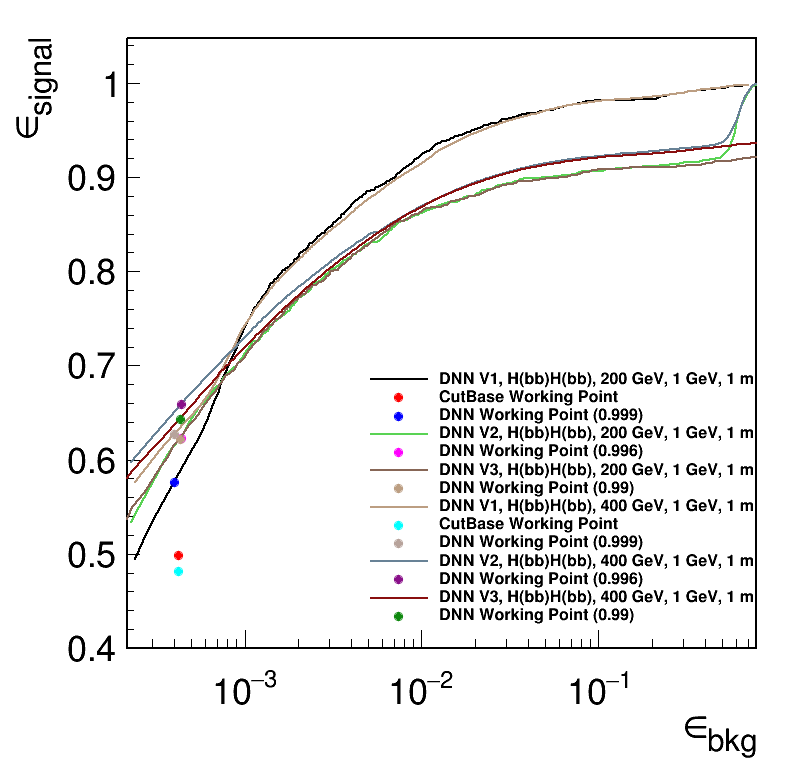

In [36]:
### ROC curve All MC Bkg
 

sig_keys = ['H(bb)H(bb), 200 GeV, 1 GeV, 1 m','H(bb)H(bb), 400 GeV, 1 GeV, 1 m']
sig_cutbase_effs = {}
sig_cutbase_effs['H(bb)H(bb), 200 GeV, 1 GeV, 1 m'] = sig200_cutbase_eff
sig_cutbase_effs['H(bb)H(bb), 400 GeV, 1 GeV, 1 m'] = sig400_cutbase_eff

i=0
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.45,0.19,0.86,0.52)
#     leg = rt.TLegend(0.65,0.19,0.86,0.34)
leg.SetTextSize(0.022)
leg.SetBorderSize(0)
leg.SetEntrySeparation(0.01)
gr = {}
purity = {}
for sig_k in sig_keys:


    #     Plotting ROC curve v1
    gr['Datav1'+sig_k] = create_TGraph(DataEffv1,Noeffv1[sig_k],axis_title = ['#epsilon_{bkg}','#epsilon_{signal}'])
    gr['Datav1'+sig_k].SetLineColor(std_color_list_ext[i])
    gr['Datav1'+sig_k].SetLineWidth(2)
    gr['Datav1'+sig_k].SetMinimum(0.4)
    gr['Datav1'+sig_k].GetYaxis().SetRangeUser(0.0, 1.0)
    gr['Datav1'+sig_k].GetXaxis().SetLimits(0.0, 1.0)

    gr['Datav1'+sig_k].Draw('ac' if i==0 else 'c')
    leg.AddEntry(gr['Datav1'+sig_k],'DNN V1, '+sig_k, 'l')
    


    #cutbased working point
    i+=1
    cutbase_eff_sig_pt = np.array([sig_cutbase_effs[sig_k]]) 
    cutbase_eff_bkg_pt = np.array([data_cutbase_eff]) 
    print(cutbase_eff_sig_pt,cutbase_eff_bkg_pt)
    gr['CutBase'+sig_k] = create_TGraph(cutbase_eff_bkg_pt,cutbase_eff_sig_pt,axis_title = ['#epsilon_{bkg}','#epsilon_{signal}'])
    gr['CutBase'+sig_k].SetMarkerSize(1.)
    gr['CutBase'+sig_k].SetMarkerColor(std_color_list_ext[i])
    gr['CutBase'+sig_k].SetLineColor(std_color_list_ext[i])
    gr['CutBase'+sig_k].SetMinimum(0.4)
    gr['CutBase'+sig_k].GetYaxis().SetRangeUser(0.0, 1.0)
    gr['CutBase'+sig_k].GetXaxis().SetLimits(0.0, 1.0)


    gr['CutBase'+sig_k].Draw('psame')
    leg.AddEntry(gr['CutBase'+sig_k],'CutBase Working Point','p')
    
    #aiming dnn working point
    i+=1
    dnn_eff_sig_pt = np.array([Noeffv1[sig_k][aim_nothre_cntv1]]) 
    dnn_eff_bkg_pt = np.array([DataEffv1[aim_nothre_cntv1]]) 
    print(dnn_eff_sig_pt,dnn_eff_bkg_pt)
    gr['AimDNNv1'+sig_k] = create_TGraph(dnn_eff_bkg_pt,dnn_eff_sig_pt,axis_title = ['#epsilon_{bkg}','#epsilon_{signal}'])
    gr['AimDNNv1'+sig_k].SetMarkerSize(1.)
    gr['AimDNNv1'+sig_k].SetMarkerColor(std_color_list_ext[i])
    gr['AimDNNv1'+sig_k].SetLineColor(std_color_list_ext[i])
    gr['AimDNNv1'+sig_k].SetMinimum(0.4)
    gr['AimDNNv1'+sig_k].GetYaxis().SetRangeUser(0.0, 1.0)
    gr['AimDNNv1'+sig_k].GetXaxis().SetLimits(0.0, 1.0)


    gr['AimDNNv1'+sig_k].Draw('psame')
    leg.AddEntry(gr['AimDNNv1'+sig_k],'DNN Working Point ('+str(aim_nothre_ptv1)+')','p')
    
    #old aiming dnn working point
    i+=1
    old_dnn_eff_sig_pt = np.array([Noeffv1[sig_k][cnt_oldv1]]) 
    old_dnn_eff_bkg_pt = np.array([DataEffv1[cnt_oldv1]]) 
    print(old_dnn_eff_sig_pt,old_dnn_eff_bkg_pt)
    gr['OldAimDNNv1'+sig_k] = create_TGraph(old_dnn_eff_bkg_pt,old_dnn_eff_sig_pt,axis_title = ['#epsilon_{bkg}','#epsilon_{signal}'])
    gr['OldAimDNNv1'+sig_k].SetMarkerSize(1.)
    gr['OldAimDNNv1'+sig_k].SetMarkerColor(std_color_list_ext[i])
    gr['OldAimDNNv1'+sig_k].SetLineColor(std_color_list_ext[i])
    gr['OldAimDNNv1'+sig_k].SetMinimum(0.4)
    gr['OldAimDNNv1'+sig_k].GetYaxis().SetRangeUser(0.0, 1.0)
    gr['OldAimDNNv1'+sig_k].GetXaxis().SetLimits(0.0, 1.0)


#     gr['OldAimDNNv1'+sig_k].Draw('psame')
#     leg.AddEntry(gr['OldAimDNNv1'+sig_k],'DNN Working Point ('+str(pt_thre_oldv1)+')','p')

    #     Plotting ROC curve v2
    gr['Datav2'+sig_k] = create_TGraph(DataEff,Noeff[sig_k],axis_title = ['#epsilon_{bkg}','#epsilon_{signal}'])
    gr['Datav2'+sig_k].SetLineColor(std_color_list_ext[i])
    gr['Datav2'+sig_k].SetLineWidth(2)
    gr['Datav2'+sig_k].SetMinimum(0.4)
    gr['Datav2'+sig_k].GetYaxis().SetRangeUser(0.0, 1.0)
    gr['Datav2'+sig_k].GetXaxis().SetLimits(0.0, 1.0)

    gr['Datav2'+sig_k].Draw('ac' if i==0 else 'c')
    leg.AddEntry(gr['Datav2'+sig_k],'DNN V2, '+sig_k, 'l')
    


#     #cutbased working point
#     i+=1
#     cutbase_eff_sig_pt = np.array([sig_cutbase_effs[sig_k]]) 
#     cutbase_eff_bkg_pt = np.array([data_cutbase_eff]) 
#     print(cutbase_eff_sig_pt,cutbase_eff_bkg_pt)
#     gr['CutBase'+sig_k] = create_TGraph(cutbase_eff_bkg_pt,cutbase_eff_sig_pt,axis_title = ['#epsilon_{bkg}','#epsilon_{signal}'])
#     gr['CutBase'+sig_k].SetMarkerSize(1.)
#     gr['CutBase'+sig_k].SetMarkerColor(std_color_list_ext[i])
#     gr['CutBase'+sig_k].SetLineColor(std_color_list_ext[i])
#     gr['CutBase'+sig_k].SetMinimum(0.4)
#     gr['CutBase'+sig_k].GetYaxis().SetRangeUser(0.0, 1.0)
#     gr['CutBase'+sig_k].GetXaxis().SetLimits(0.0, 1.0)


#     gr['CutBase'+sig_k].Draw('psame')
#     leg.AddEntry(gr['CutBase'+sig_k],'CutBase Working Point','p')
    
    #aiming dnn working point
    i+=1
    dnn_eff_sig_pt = np.array([Noeff[sig_k][aim_nothre_cnt]]) 
    dnn_eff_bkg_pt = np.array([DataEff[aim_nothre_cnt]]) 
    print(dnn_eff_sig_pt,dnn_eff_bkg_pt)
    gr['AimDNNv2'+sig_k] = create_TGraph(dnn_eff_bkg_pt,dnn_eff_sig_pt,axis_title = ['#epsilon_{bkg}','#epsilon_{signal}'])
    gr['AimDNNv2'+sig_k].SetMarkerSize(1.)
    gr['AimDNNv2'+sig_k].SetMarkerColor(std_color_list_ext[i])
    gr['AimDNNv2'+sig_k].SetLineColor(std_color_list_ext[i])
    gr['AimDNNv2'+sig_k].SetMinimum(0.4)
    gr['AimDNNv2'+sig_k].GetYaxis().SetRangeUser(0.0, 1.0)
    gr['AimDNNv2'+sig_k].GetXaxis().SetLimits(0.0, 1.0)


    gr['AimDNNv2'+sig_k].Draw('psame')
    leg.AddEntry(gr['AimDNNv2'+sig_k],'DNN Working Point ('+str(aim_nothre_pt)+')','p')
    
    print(i)
    #old aiming dnn working point
    i+=1
    old_dnn_eff_sig_pt = np.array([Noeff[sig_k][cnt_old]]) 
    old_dnn_eff_bkg_pt = np.array([DataEff[cnt_old]]) 
    print(old_dnn_eff_sig_pt,old_dnn_eff_bkg_pt)
#     if i>8:
#         std_color_list_ext[i]=209
    gr['OldAimDNNv2'+sig_k] = create_TGraph(old_dnn_eff_bkg_pt,old_dnn_eff_sig_pt,axis_title = ['#epsilon_{bkg}','#epsilon_{signal}'])
    gr['OldAimDNNv2'+sig_k].SetMarkerSize(1.)
    gr['OldAimDNNv2'+sig_k].SetMarkerColor(std_color_list_ext[i])
    gr['OldAimDNNv2'+sig_k].SetLineColor(std_color_list_ext[i])
    gr['OldAimDNNv2'+sig_k].SetMinimum(0.4)
    gr['OldAimDNNv2'+sig_k].GetYaxis().SetRangeUser(0.0, 1.0)
    gr['OldAimDNNv2'+sig_k].GetXaxis().SetLimits(0.0, 1.0)


#     gr['OldAimDNNv2'+sig_k].Draw('psame')
#     leg.AddEntry(gr['OldAimDNNv2'+sig_k],'DNN Working Point ('+str(pt_thre_old)+')','p')
    
    #     Plotting ROC curve v3
    gr['Datav3'+sig_k] = create_TGraph(DataEffv3,Noeffv3[sig_k],axis_title = ['#epsilon_{bkg}','#epsilon_{signal}'])
    gr['Datav3'+sig_k].SetLineColor(std_color_list_ext[i])
    gr['Datav3'+sig_k].SetLineWidth(2)
    gr['Datav3'+sig_k].SetMinimum(0.4)
    gr['Datav3'+sig_k].GetYaxis().SetRangeUser(0.0, 1.0)
    gr['Datav3'+sig_k].GetXaxis().SetLimits(0.0, 1.0)

    gr['Datav3'+sig_k].Draw('ac' if i==0 else 'c')
    leg.AddEntry(gr['Datav3'+sig_k],'DNN V3, '+sig_k, 'l')
    


    #cutbased working point
#     i+=1
#     cutbase_eff_sig_pt = np.array([sig_cutbase_effs[sig_k]]) 
#     cutbase_eff_bkg_pt = np.array([data_cutbase_eff]) 
#     print(cutbase_eff_sig_pt,cutbase_eff_bkg_pt)
#     gr['CutBase'+sig_k] = create_TGraph(cutbase_eff_bkg_pt,cutbase_eff_sig_pt,axis_title = ['#epsilon_{bkg}','#epsilon_{signal}'])
#     gr['CutBase'+sig_k].SetMarkerSize(1.)
#     gr['CutBase'+sig_k].SetMarkerColor(std_color_list_ext[i])
#     gr['CutBase'+sig_k].SetLineColor(std_color_list_ext[i])
#     gr['CutBase'+sig_k].SetMinimum(0.4)
#     gr['CutBase'+sig_k].GetYaxis().SetRangeUser(0.0, 1.0)
#     gr['CutBase'+sig_k].GetXaxis().SetLimits(0.0, 1.0)


#     gr['CutBase'+sig_k].Draw('psame')
#     leg.AddEntry(gr['CutBase'+sig_k],'CutBase Working Point','p')
    
    #aiming dnn working point
    i+=1
    dnn_eff_sig_pt = np.array([Noeffv3[sig_k][aim_nothre_cntv3]]) 
    dnn_eff_bkg_pt = np.array([DataEffv3[aim_nothre_cntv3]]) 
    print(dnn_eff_sig_pt,dnn_eff_bkg_pt)
    gr['AimDNNv3'+sig_k] = create_TGraph(dnn_eff_bkg_pt,dnn_eff_sig_pt,axis_title = ['#epsilon_{bkg}','#epsilon_{signal}'])
    gr['AimDNNv3'+sig_k].SetMarkerSize(1.)
    gr['AimDNNv3'+sig_k].SetMarkerColor(std_color_list_ext[i])
    gr['AimDNNv3'+sig_k].SetLineColor(std_color_list_ext[i])
    gr['AimDNNv3'+sig_k].SetMinimum(0.4)
    gr['AimDNNv3'+sig_k].GetYaxis().SetRangeUser(0.0, 1.0)
    gr['AimDNNv3'+sig_k].GetXaxis().SetLimits(0.0, 1.0)


    gr['AimDNNv3'+sig_k].Draw('psame')
    leg.AddEntry(gr['AimDNNv3'+sig_k],'DNN Working Point ('+str(aim_nothre_ptv3)+')','p')  
        
 
leg.Draw()
c.SetLogx()

c.Draw()
c.SaveAs(plotDir+'V1V2V3_ROC_DNN_Data_BKG_SIG.png')


# DNN ROC No HCAL ONLY

In [10]:
# flat weight and sum over bkg mc
wall = {}
SumAll = 0
from itertools import chain 

for k,v in tree.items():
    print(k,v)
    
    wall[k] = [np.array([x]*len(y)) for x,y in zip(trg_jet_w[k],trg_jet_pt[k])]
    wall[k] = list(chain.from_iterable(wall[k])) 
    
    print(len(wall[k]))
    
    if 'Data' not in k:
        if 'bb' not in k:
            SumAll += sum(wall[k])

    

H(bb)H(bb), 200 GeV, 1 GeV, 1 m <TTree b'SusyLLPTree' at 0x7f48d8019d30>
2190
QCD_HT_all, background <TTree b'SusyLLPTree' at 0x7f48d7b48b38>
555320
WLNu_HT_all, background <TTree b'SusyLLPTree' at 0x7f48c36d25f8>
4160329
ZNunu_HT_all, background <TTree b'SusyLLPTree' at 0x7f47a4cc89b0>
7147509
TT_Lep, background <TTree b'SusyLLPTree' at 0x7f479f131080>
8018158
Data 2018 <TTree b'SusyLLPTree' at 0x7f479a044160>
7179255


In [11]:
flat_jet_dnn = {}
flat_jet_nhcalhit = {}
flat_jet_hcalt = {}

for k,v in tree.items():
    print(k,v)
    
    flat_jet_dnn[k] = trg_jet_dnn[k].flatten()
    flat_jet_nhcalhit[k] = trg_jet_nhcalhit[k].flatten()
    flat_jet_hcalt[k] = trg_jet_hcalt[k].flatten()


H(bb)H(bb), 200 GeV, 1 GeV, 1 m <TTree b'SusyLLPTree' at 0x7f48d8019d30>
QCD_HT_all, background <TTree b'SusyLLPTree' at 0x7f48d7b48b38>
WLNu_HT_all, background <TTree b'SusyLLPTree' at 0x7f48c36d25f8>
ZNunu_HT_all, background <TTree b'SusyLLPTree' at 0x7f47a4cc89b0>
TT_Lep, background <TTree b'SusyLLPTree' at 0x7f479f131080>
Data 2018 <TTree b'SusyLLPTree' at 0x7f479a044160>


In [14]:
### ROC curve

var = [flat_jet_dnn  ]
axis = [['jetDNNScore','Events']  ]
name = ['jetDNNScore'   ]
bins = [[50,0,1]  ]
maxs = [1 ]
# var = [flat_jet_dnn,   flat_jet_nhcalhit, flat_jet_hcalt ]
# axis = [['jetDNNScore','Events'],  ['jetNRecHitsHcal','Events'],['jetTimeRecHitHcal','Events']  ]
# name = ['jetDNNScore','jetNRecHitsHcal', 'jetTimeRecHitHcal'  ]
# bins = [[50,0,1], [50,0,300],[50,-10,20] ]
# maxs = [1, 300, 20]

 
for i in range(len(var)):
    v = var[i]
    Noeff = {}

    thre = maxs[i]*np.array(range(1,1000))/1000.0
    print(maxs[i],name[i],'thre range',np.max(thre),np.min(thre))
    print(name[i])
    for k in tree.keys():
        v = var[i][k]
        print(k,len(v))
        if len(v)==0:
            print('no')
            Noeff[k] = []
#             McSumNum = np.zeros(len(thre))
            for th in thre:
                Noeff[k].append(1.0)
            Noeff[k] = np.array(Noeff[k])
        else:
            Noeff[k] = []
            McSumNum = np.zeros(len(thre))
#             cnt=0
            for th in thre:
#                 pass_str = np.logical_and(flat_jet_nhcalhit[k]>0, flat_jet_hcalt[k]>-100)
                pass_str = np.logical_and(flat_jet_nhcalhit[k]>-10, flat_jet_hcalt[k]>-1000)
                pass_str = np.logical_and(pass_str, v>th)
                Noeff[k].append(1.0*np.sum(np.array(wall[k])[pass_str])/np.sum(wall[k]))
#                 McSumNum[cnt] += np.sum(np.array(wall[k])[pass_str])
#                 cnt += 1
            Noeff[k] = np.array(Noeff[k])
#     McSumNum = np.array(McSumNum)
 

1 jetDNNScore thre range 0.999 0.001
jetDNNScore
H(bb)H(bb), 200 GeV, 1 GeV, 1 m 2190


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in greater


QCD_HT_all, background 555320
WLNu_HT_all, background 4160329
ZNunu_HT_all, background 7147509
TT_Lep, background 8018158
Data 2018 7179255


In [16]:
#Adds up MC BKG 
NoSumMcNumEle = np.zeros(len(thre))
NoSumMcNum = np.zeros(len(thre))
NoMcEff = np.ones(len(thre))

for k in tree.keys():
    if 'background' in k:
#     if 'bb' in k:
#         print(k)
        NoSumMcNumEle = Noeff[k]*np.sum(wall[k])
#         print(len(eff[k]))
#         print(eff[k][:10])
#         print(len(SumMcNumEle))
#         print(SumMcNumEle[:10])
        NoSumMcNum += NoSumMcNumEle
#         print(len(SumMcNum))
#         print(SumMcNum[:10])
    
NoMcEff = NoSumMcNum/SumAll


In [17]:
print(thre[900-1])
# cnt=899
# dnn_sig_eff = eff[sig_k][cnt]
# dnn_bkg_eff = McEff[cnt]
# print(dnn_sig_eff,dnn_bkg_eff)
dnn_nosig_eff = Noeff[sig_k][cnt]
dnn_nobkg_eff = NoMcEff[cnt]
print(dnn_nosig_eff,dnn_nobkg_eff)

0.9
0.6502283191751703 0.0019859320528613647
0.8123287606186222 0.004188960937136036


In [19]:
#no gen match no hcal
# sig_noeff_pt = 0.215807
# bkg_noeff_pt = 0.000616
dis_noeff_pt = 999.
#gen match no hcal
sig_noeff_pt = 0.49863
bkg_noeff_pt = 0.000616

aim_nothre_cnt = 0
aim_nothre_pt = 1.
aim_nosig_pt = 0.

sig_keys = ['H(bb)H(bb), 200 GeV, 1 GeV, 1 m',]
for sig_k in sig_keys:
    print(sig_k)
#     eff[sig_k]

cnt=0
for cnt,ele in enumerate(NoMcEff):
#     print(cnt,ele)
    this_nodis = abs(ele-bkg_noeff_pt)
    if this_nodis<dis_noeff_pt:
        dis_noeff_pt = this_nodis
        aim_nothre_cnt = cnt
        aim_nothre_pt = thre[cnt]
        aim_nosig_pt = Noeff[sig_k][cnt]
#     if cnt>10:
#         break;

print(aim_thre_cnt,aim_thre_pt,aim_sig_pt,dis_eff_pt)
print(NoMcEff[aim_nothre_cnt])
aim_nobkg_pt=NoMcEff[aim_nothre_cnt]

H(bb)H(bb), 200 GeV, 1 GeV, 1 m
995 0.996 0.522831020595946 3.2619748935232306e-06
0.000627505728674731


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /storage/user/jmao/gpu/jmao/cms-llp/plots/20201205/2018_sigmatch/var_plots/NoHcalReq_ROC_DNN_All_MC_BKG.png has been created


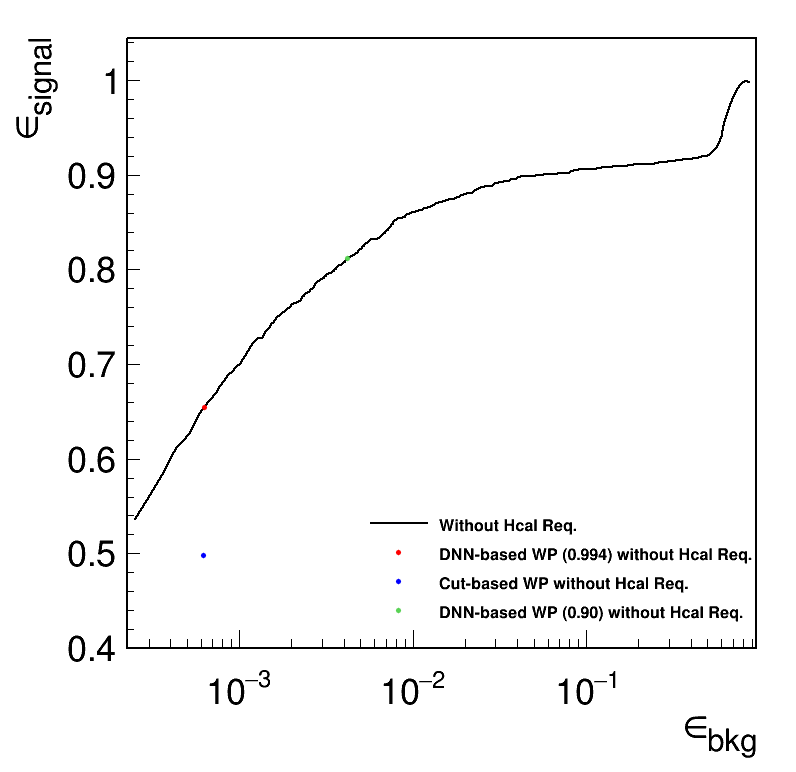

In [21]:
### ROC curve All MC Bkg
 

sig_keys = ['H(bb)H(bb), 200 GeV, 1 GeV, 1 m',]
 

i=0
for sig_k in sig_keys:
    c = rt.TCanvas('c','c', 800, 800)
    leg = rt.TLegend(0.45,0.19,0.86,0.34)
#     leg = rt.TLegend(0.65,0.19,0.86,0.34)
    leg.SetTextSize(0.022)
    leg.SetBorderSize(0)
    leg.SetEntrySeparation(0.01)
    gr = {}
    purity = {}

    #     Plotting ROC curve
    gr[name[i]] = create_TGraph(NoMcEff,Noeff[sig_k],axis_title = ['#epsilon_{bkg}','#epsilon_{signal}'])
    gr[name[i]].SetLineColor(std_color_list[i])
    gr[name[i]].SetLineWidth(2)
    gr[name[i]].SetMinimum(0.4)
    gr[name[i]].GetYaxis().SetRangeUser(0.0, 1.0)
    gr[name[i]].GetXaxis().SetLimits(0.0, 1.0)


    gr[name[i]].Draw('ac' if i==0 else 'c')
    leg.AddEntry(gr[name[i]],'Without Hcal Req.', 'l')
        
# print(aim_thre_cnt,aim_thre_pt,aim_sig_pt,dis_eff_pt)
    i+=1

    eff_sig_pt = np.array([aim_nosig_pt]) 
    eff_bkg_pt = np.array([aim_nobkg_pt]) 
    gr['DNNpt'] = create_TGraph(eff_bkg_pt,eff_sig_pt,axis_title = ['#epsilon_{bkg}','#epsilon_{signal}'])
    gr['DNNpt'].SetMarkerSize(0.5)
    gr['DNNpt'].SetMarkerColor(std_color_list[i])
    gr['DNNpt'].SetLineColor(std_color_list[i])
    gr['DNNpt'].SetLineWidth(2)
    gr['DNNpt'].GetYaxis().SetRangeUser(0.0, 1.0)
    gr['DNNpt'].GetXaxis().SetLimits(0.0, 1.0)


    gr['DNNpt'].Draw('psame')
    leg.AddEntry(gr['DNNpt'],'DNN-based WP ('+str(aim_nothre_pt)+') without Hcal Req.','p')

    i+=1

    eff_sig_pt = np.array([sig_noeff_pt]) 
    eff_bkg_pt = np.array([bkg_noeff_pt]) 
    gr['pt'] = create_TGraph(eff_bkg_pt,eff_sig_pt,axis_title = ['#epsilon_{bkg}','#epsilon_{signal}'])
    gr['pt'].SetMarkerSize(0.5)
    gr['pt'].SetMarkerColor(std_color_list[i])
    gr['pt'].SetLineColor(std_color_list[i])
    gr['pt'].SetLineWidth(2)
    gr['pt'].GetYaxis().SetRangeUser(0.0, 1.0)
    gr['pt'].GetXaxis().SetLimits(0.0, 1.0)


    gr['pt'].Draw('psame')
    leg.AddEntry(gr['pt'],'Cut-based WP without Hcal Req.','p')
    
    i+=1

    eff_sig_pt = np.array([dnn_nosig_eff]) 
    eff_bkg_pt = np.array([dnn_nobkg_eff]) 
    gr['DNNptL'] = create_TGraph(eff_bkg_pt,eff_sig_pt,axis_title = ['#epsilon_{bkg}','#epsilon_{signal}'])
    gr['DNNptL'].SetMarkerSize(0.5)
    gr['DNNptL'].SetMarkerColor(std_color_list[i])
    gr['DNNptL'].SetLineColor(std_color_list[i])
    gr['DNNptL'].SetLineWidth(2)
    gr['DNNptL'].GetYaxis().SetRangeUser(0.0, 1.0)
    gr['DNNptL'].GetXaxis().SetLimits(0.0, 1.0)


    gr['DNNptL'].Draw('psame')
    leg.AddEntry(gr['DNNptL'],'DNN-based WP (0.90) without Hcal Req.','p')
    

        

#     leg.AddEntry(gr[name[i]],axis[i][0])
    leg.Draw()

#     leg.AddEntry(gr[name[i]],axis[i][0])
#     leg.Draw()
    c.SetLogx()

    c.Draw()
    c.SaveAs(plotDir+'NoHcalReq_ROC_DNN_All_MC_BKG.png')
#     c.SaveAs(plotDir+'ROC_DNN_All_MC_BKG.png')
#         print(plotDir+'ROC_DNN_'+bkg_k.replace(', background','').replace(' ','_')+'.png')


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /storage/user/jmao/gpu/jmao/cms-llp/plots/20201205/2018_sigmatch/dnn_v2/ROC_DNN_All_MC_BKG.png has been created


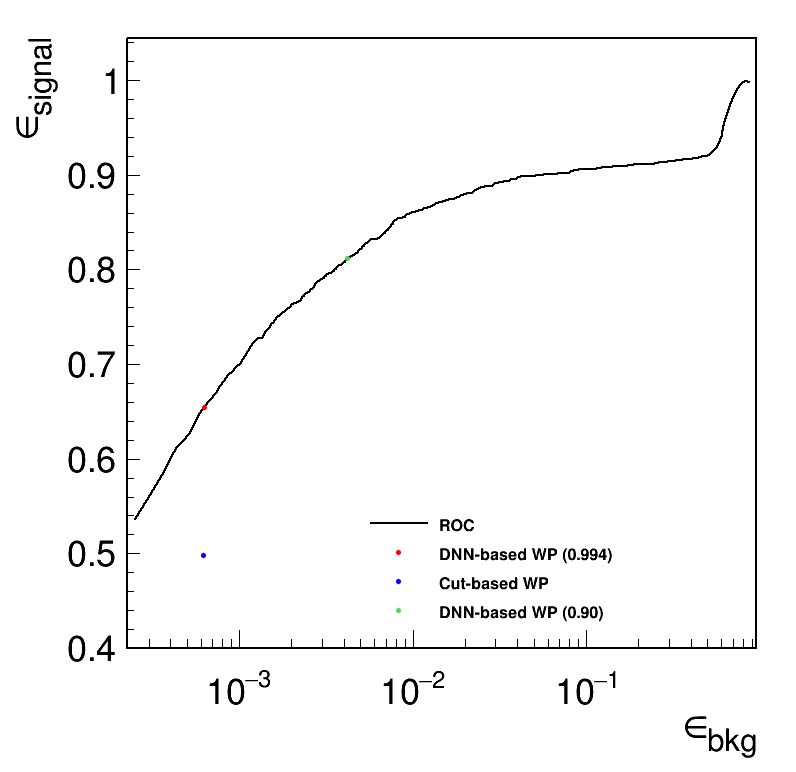

In [36]:
### ROC curve All MC Bkg
 

sig_keys = ['H(bb)H(bb), 200 GeV, 1 GeV, 1 m',]
 

i=0
for sig_k in sig_keys:
    c = rt.TCanvas('c','c', 800, 800)
    leg = rt.TLegend(0.45,0.19,0.86,0.34)
#     leg = rt.TLegend(0.65,0.19,0.86,0.34)
    leg.SetTextSize(0.022)
    leg.SetBorderSize(0)
    leg.SetEntrySeparation(0.01)
    gr = {}
    purity = {}

    #     Plotting ROC curve
    gr[name[i]] = create_TGraph(NoMcEff,Noeff[sig_k],axis_title = ['#epsilon_{bkg}','#epsilon_{signal}'])
    gr[name[i]].SetLineColor(std_color_list[i])
    gr[name[i]].SetLineWidth(2)
    gr[name[i]].SetMinimum(0.4)
    gr[name[i]].GetYaxis().SetRangeUser(0.0, 1.0)
    gr[name[i]].GetXaxis().SetLimits(0.0, 1.0)


    gr[name[i]].Draw('ac' if i==0 else 'c')
    leg.AddEntry(gr[name[i]],'ROC', 'l')
        
# print(aim_thre_cnt,aim_thre_pt,aim_sig_pt,dis_eff_pt)
    i+=1

    eff_sig_pt = np.array([aim_nosig_pt]) 
    eff_bkg_pt = np.array([aim_nobkg_pt]) 
    gr['DNNpt'] = create_TGraph(eff_bkg_pt,eff_sig_pt,axis_title = ['#epsilon_{bkg}','#epsilon_{signal}'])
    gr['DNNpt'].SetMarkerSize(0.5)
    gr['DNNpt'].SetMarkerColor(std_color_list[i])
    gr['DNNpt'].SetLineColor(std_color_list[i])
    gr['DNNpt'].SetLineWidth(2)
    gr['DNNpt'].GetYaxis().SetRangeUser(0.0, 1.0)
    gr['DNNpt'].GetXaxis().SetLimits(0.0, 1.0)


    gr['DNNpt'].Draw('psame')
    leg.AddEntry(gr['DNNpt'],'DNN-based WP ('+str(aim_nothre_pt)+')','p')

    i+=1

    eff_sig_pt = np.array([sig_noeff_pt]) 
    eff_bkg_pt = np.array([bkg_noeff_pt]) 
    gr['pt'] = create_TGraph(eff_bkg_pt,eff_sig_pt,axis_title = ['#epsilon_{bkg}','#epsilon_{signal}'])
    gr['pt'].SetMarkerSize(0.5)
    gr['pt'].SetMarkerColor(std_color_list[i])
    gr['pt'].SetLineColor(std_color_list[i])
    gr['pt'].SetLineWidth(2)
    gr['pt'].GetYaxis().SetRangeUser(0.0, 1.0)
    gr['pt'].GetXaxis().SetLimits(0.0, 1.0)


    gr['pt'].Draw('psame')
    leg.AddEntry(gr['pt'],'Cut-based WP','p')
    
    i+=1

    eff_sig_pt = np.array([dnn_nosig_eff]) 
    eff_bkg_pt = np.array([dnn_nobkg_eff]) 
    gr['DNNptL'] = create_TGraph(eff_bkg_pt,eff_sig_pt,axis_title = ['#epsilon_{bkg}','#epsilon_{signal}'])
    gr['DNNptL'].SetMarkerSize(0.5)
    gr['DNNptL'].SetMarkerColor(std_color_list[i])
    gr['DNNptL'].SetLineColor(std_color_list[i])
    gr['DNNptL'].SetLineWidth(2)
    gr['DNNptL'].GetYaxis().SetRangeUser(0.0, 1.0)
    gr['DNNptL'].GetXaxis().SetLimits(0.0, 1.0)


    gr['DNNptL'].Draw('psame')
    leg.AddEntry(gr['DNNptL'],'DNN-based WP (0.90)','p')
    

        

#     leg.AddEntry(gr[name[i]],axis[i][0])
    leg.Draw()

#     leg.AddEntry(gr[name[i]],axis[i][0])
#     leg.Draw()
    c.SetLogx()

    c.Draw()
    c.SaveAs(plotDir+'ROC_DNN_All_MC_BKG.png')
#     c.SaveAs(plotDir+'ROC_DNN_All_MC_BKG.png')
#         print(plotDir+'ROC_DNN_'+bkg_k.replace(', background','').replace(' ','_')+'.png')


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /storage/user/jmao/gpu/jmao/cms-llp/plots/20201205/2018_sigmatch/dnn_v2/ROC_DNN_All_MC_BKG_COM.png has been created


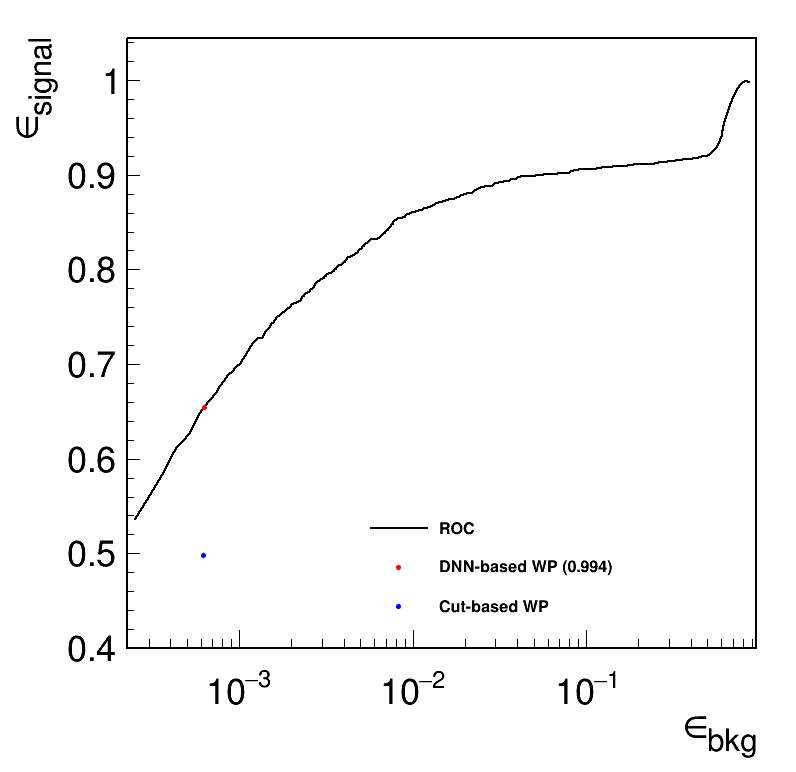

In [37]:
### ROC curve All MC Bkg
 

sig_keys = ['H(bb)H(bb), 200 GeV, 1 GeV, 1 m',]
 

i=0
for sig_k in sig_keys:
    c = rt.TCanvas('c','c', 800, 800)
    leg = rt.TLegend(0.45,0.19,0.86,0.34)
#     leg = rt.TLegend(0.65,0.19,0.86,0.34)
    leg.SetTextSize(0.022)
    leg.SetBorderSize(0)
    leg.SetEntrySeparation(0.01)
    gr = {}
    purity = {}

    #     Plotting ROC curve
    gr[name[i]] = create_TGraph(NoMcEff,Noeff[sig_k],axis_title = ['#epsilon_{bkg}','#epsilon_{signal}'])
    gr[name[i]].SetLineColor(std_color_list[i])
    gr[name[i]].SetLineWidth(2)
    gr[name[i]].SetMinimum(0.4)
    gr[name[i]].GetYaxis().SetRangeUser(0.0, 1.0)
    gr[name[i]].GetXaxis().SetLimits(0.0, 1.0)


    gr[name[i]].Draw('ac' if i==0 else 'c')
    leg.AddEntry(gr[name[i]],'ROC', 'l')
        
# print(aim_thre_cnt,aim_thre_pt,aim_sig_pt,dis_eff_pt)
    i+=1

    eff_sig_pt = np.array([aim_nosig_pt]) 
    eff_bkg_pt = np.array([aim_nobkg_pt]) 
    gr['DNNpt'] = create_TGraph(eff_bkg_pt,eff_sig_pt,axis_title = ['#epsilon_{bkg}','#epsilon_{signal}'])
    gr['DNNpt'].SetMarkerSize(0.5)
    gr['DNNpt'].SetMarkerColor(std_color_list[i])
    gr['DNNpt'].SetLineColor(std_color_list[i])
    gr['DNNpt'].SetLineWidth(2)
    gr['DNNpt'].GetYaxis().SetRangeUser(0.0, 1.0)
    gr['DNNpt'].GetXaxis().SetLimits(0.0, 1.0)


    gr['DNNpt'].Draw('psame')
    leg.AddEntry(gr['DNNpt'],'DNN-based WP ('+str(aim_nothre_pt)+')','p')

    i+=1

    eff_sig_pt = np.array([sig_noeff_pt]) 
    eff_bkg_pt = np.array([bkg_noeff_pt]) 
    gr['pt'] = create_TGraph(eff_bkg_pt,eff_sig_pt,axis_title = ['#epsilon_{bkg}','#epsilon_{signal}'])
    gr['pt'].SetMarkerSize(0.5)
    gr['pt'].SetMarkerColor(std_color_list[i])
    gr['pt'].SetLineColor(std_color_list[i])
    gr['pt'].SetLineWidth(2)
    gr['pt'].GetYaxis().SetRangeUser(0.0, 1.0)
    gr['pt'].GetXaxis().SetLimits(0.0, 1.0)


    gr['pt'].Draw('psame')
    leg.AddEntry(gr['pt'],'Cut-based WP','p')
    
#     i+=1

#     eff_sig_pt = np.array([dnn_nosig_eff]) 
#     eff_bkg_pt = np.array([dnn_nobkg_eff]) 
#     gr['DNNptL'] = create_TGraph(eff_bkg_pt,eff_sig_pt,axis_title = ['#epsilon_{bkg}','#epsilon_{signal}'])
#     gr['DNNptL'].SetMarkerSize(0.5)
#     gr['DNNptL'].SetMarkerColor(std_color_list[i])
#     gr['DNNptL'].SetLineColor(std_color_list[i])
#     gr['DNNptL'].SetLineWidth(2)
#     gr['DNNptL'].GetYaxis().SetRangeUser(0.0, 1.0)
#     gr['DNNptL'].GetXaxis().SetLimits(0.0, 1.0)


#     gr['DNNptL'].Draw('psame')
#     leg.AddEntry(gr['DNNptL'],'DNN-based WP (0.90)','p')
    

        

#     leg.AddEntry(gr[name[i]],axis[i][0])
    leg.Draw()

#     leg.AddEntry(gr[name[i]],axis[i][0])
#     leg.Draw()
    c.SetLogx()

    c.Draw()
    c.SaveAs(plotDir+'ROC_DNN_All_MC_BKG_COM.png')
#     c.SaveAs(plotDir+'ROC_DNN_All_MC_BKG.png')
#         print(plotDir+'ROC_DNN_'+bkg_k.replace(', background','').replace(' ','_')+'.png')


# DNN ROC

In [10]:
# flat weight and sum over bkg mc
wall = {}
SumAll = 0
from itertools import chain 

for k,v in tree.items():
    print(k,v)
    
    wall[k] = [np.array([x]*len(y)) for x,y in zip(trg_jet_w[k],trg_jet_pt[k])]
    wall[k] = list(chain.from_iterable(wall[k])) 
    
    print(len(wall[k]))
    
    if 'Data' not in k:
        if 'bb' not in k:
            SumAll += sum(wall[k])

    

H(bb)H(bb), 200 GeV, 1 GeV, 1 m <TTree b'SusyLLPTree' at 0x7f48d8019d30>
2190
QCD_HT_all, background <TTree b'SusyLLPTree' at 0x7f48d7b48b38>
555320
WLNu_HT_all, background <TTree b'SusyLLPTree' at 0x7f48c36d25f8>
4160329
ZNunu_HT_all, background <TTree b'SusyLLPTree' at 0x7f47a4cc89b0>
7147509
TT_Lep, background <TTree b'SusyLLPTree' at 0x7f479f131080>
8018158
Data 2018 <TTree b'SusyLLPTree' at 0x7f479a044160>
7179255


In [11]:
flat_jet_dnn = {}
flat_jet_nhcalhit = {}
flat_jet_hcalt = {}

for k,v in tree.items():
    print(k,v)
    
    flat_jet_dnn[k] = trg_jet_dnn[k].flatten()
    flat_jet_nhcalhit[k] = trg_jet_nhcalhit[k].flatten()
    flat_jet_hcalt[k] = trg_jet_hcalt[k].flatten()


H(bb)H(bb), 200 GeV, 1 GeV, 1 m <TTree b'SusyLLPTree' at 0x7f48d8019d30>
QCD_HT_all, background <TTree b'SusyLLPTree' at 0x7f48d7b48b38>
WLNu_HT_all, background <TTree b'SusyLLPTree' at 0x7f48c36d25f8>
ZNunu_HT_all, background <TTree b'SusyLLPTree' at 0x7f47a4cc89b0>
TT_Lep, background <TTree b'SusyLLPTree' at 0x7f479f131080>
Data 2018 <TTree b'SusyLLPTree' at 0x7f479a044160>


In [ ]:
# flat_jet_dnn = {}
# flat_jet_nhcalhit = {}
# flat_jet_hcalt = {}

# for k,v in tree.items():
#     print(k,v)
    
#     flat_jet_dnn[k] = trg_jet_dnn[k].flatten()
#     flat_jet_nhcalhit[k] = trg_jet_nhcalhit[k].flatten()
#     flat_jet_hcalt[k] = trg_jet_hcalt[k].flatten()


In [12]:
### ROC curve


var = [flat_jet_dnn  ]
axis = [['jetDNNScore','Events']  ]
name = ['jetDNNScore'   ]
bins = [[50,0,1]  ]
maxs = [1 ]
# var = [flat_jet_dnn,   flat_jet_nhcalhit, flat_jet_hcalt ]
# axis = [['jetDNNScore','Events'],  ['jetNRecHitsHcal','Events'],['jetTimeRecHitHcal','Events']  ]
# name = ['jetDNNScore','jetNRecHitsHcal', 'jetTimeRecHitHcal'  ]
# bins = [[50,0,1], [50,0,300],[50,-10,20] ]
# maxs = [1, 300, 20]

 
for i in range(len(var)):
    v = var[i]
    eff = {}

    thre = maxs[i]*np.array(range(1,1000))/1000.0
    print(maxs[i],name[i],'thre range',np.max(thre),np.min(thre))
    print(name[i])
    for k in tree.keys():
        v = var[i][k]
        print(k,len(v))
        if len(v)==0:
            print('no')
            eff[k] = []
#             McSumNum = np.zeros(len(thre))
            for th in thre:
                eff[k].append(1.0)
            eff[k] = np.array(eff[k])
        else:
            eff[k] = []
            McSumNum = np.zeros(len(thre))
#             cnt=0
            for th in thre:
                pass_str = np.logical_and(flat_jet_nhcalhit[k]>0, flat_jet_hcalt[k]>-100)
#                 pass_str = np.logical_and(flat_jet_nhcalhit[k]>-10, flat_jet_hcalt[k]>-1000)
                pass_str = np.logical_and(pass_str, v>th)
                eff[k].append(1.0*np.sum(np.array(wall[k])[pass_str])/np.sum(wall[k]))
#                 McSumNum[cnt] += np.sum(np.array(wall[k])[pass_str])
#                 cnt += 1
            eff[k] = np.array(eff[k])
#     McSumNum = np.array(McSumNum)
 

1 jetDNNScore thre range 0.999 0.001
jetDNNScore
H(bb)H(bb), 200 GeV, 1 GeV, 1 m 2190


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in greater


QCD_HT_all, background 555320
WLNu_HT_all, background 4160329
ZNunu_HT_all, background 7147509
TT_Lep, background 8018158
Data 2018 7179255


In [14]:
### ROC curve

var = [flat_jet_dnn  ]
axis = [['jetDNNScore','Events']  ]
name = ['jetDNNScore'   ]
bins = [[50,0,1]  ]
maxs = [1 ]
# var = [flat_jet_dnn,   flat_jet_nhcalhit, flat_jet_hcalt ]
# axis = [['jetDNNScore','Events'],  ['jetNRecHitsHcal','Events'],['jetTimeRecHitHcal','Events']  ]
# name = ['jetDNNScore','jetNRecHitsHcal', 'jetTimeRecHitHcal'  ]
# bins = [[50,0,1], [50,0,300],[50,-10,20] ]
# maxs = [1, 300, 20]

 
for i in range(len(var)):
    v = var[i]
    Noeff = {}

    thre = maxs[i]*np.array(range(1,1000))/1000.0
    print(maxs[i],name[i],'thre range',np.max(thre),np.min(thre))
    print(name[i])
    for k in tree.keys():
        v = var[i][k]
        print(k,len(v))
        if len(v)==0:
            print('no')
            Noeff[k] = []
#             McSumNum = np.zeros(len(thre))
            for th in thre:
                Noeff[k].append(1.0)
            Noeff[k] = np.array(Noeff[k])
        else:
            Noeff[k] = []
            McSumNum = np.zeros(len(thre))
#             cnt=0
            for th in thre:
#                 pass_str = np.logical_and(flat_jet_nhcalhit[k]>0, flat_jet_hcalt[k]>-100)
                pass_str = np.logical_and(flat_jet_nhcalhit[k]>-10, flat_jet_hcalt[k]>-1000)
                pass_str = np.logical_and(pass_str, v>th)
                Noeff[k].append(1.0*np.sum(np.array(wall[k])[pass_str])/np.sum(wall[k]))
#                 McSumNum[cnt] += np.sum(np.array(wall[k])[pass_str])
#                 cnt += 1
            Noeff[k] = np.array(Noeff[k])
#     McSumNum = np.array(McSumNum)
 

1 jetDNNScore thre range 0.999 0.001
jetDNNScore
H(bb)H(bb), 200 GeV, 1 GeV, 1 m 2190


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in greater


QCD_HT_all, background 555320
WLNu_HT_all, background 4160329
ZNunu_HT_all, background 7147509
TT_Lep, background 8018158
Data 2018 7179255


In [13]:
#Adds up MC BKG 
SumMcNumEle = np.zeros(len(thre))
SumMcNum = np.zeros(len(thre))
McEff = np.ones(len(thre))

for k in tree.keys():
    if 'background' in k:
#     if 'bb' in k:
#         print(k)
        SumMcNumEle = eff[k]*np.sum(wall[k])
#         print(len(eff[k]))
#         print(eff[k][:10])
#         print(len(SumMcNumEle))
#         print(SumMcNumEle[:10])
        SumMcNum += SumMcNumEle
#         print(len(SumMcNum))
#         print(SumMcNum[:10])
    
McEff = SumMcNum/SumAll


In [15]:
#no gen match hcal
# sig_eff_pt = 0.175448
# bkg_eff_pt = 0.000303
#gen match hcal
sig_eff_pt = 0.413699 
bkg_eff_pt = 0.000303


dis_eff_pt = 999.
aim_thre_cnt = 0
aim_thre_pt = 1.
aim_sig_pt = 0.

sig_keys = ['H(bb)H(bb), 200 GeV, 1 GeV, 1 m',]
for sig_k in sig_keys:
    print(sig_k)
#     eff[sig_k]

cnt=0
for cnt,ele in enumerate(McEff):
#     print(cnt,ele)
    this_dis = abs(ele-bkg_eff_pt)
    if this_dis<dis_eff_pt:
        dis_eff_pt = this_dis
        aim_thre_cnt = cnt
        aim_thre_pt = thre[cnt]
        aim_sig_pt = eff[sig_k][cnt]
#     if cnt>10:
#         break;

print(aim_thre_cnt,aim_thre_pt,aim_sig_pt,dis_eff_pt)
# print(McEff[aim_thre_cnt])
aim_bkg_pt=McEff[aim_thre_cnt]

H(bb)H(bb), 200 GeV, 1 GeV, 1 m
995 0.996 0.522831020595946 3.2619748935232306e-06


In [16]:
#Adds up MC BKG 
NoSumMcNumEle = np.zeros(len(thre))
NoSumMcNum = np.zeros(len(thre))
NoMcEff = np.ones(len(thre))

for k in tree.keys():
    if 'background' in k:
#     if 'bb' in k:
#         print(k)
        NoSumMcNumEle = Noeff[k]*np.sum(wall[k])
#         print(len(eff[k]))
#         print(eff[k][:10])
#         print(len(SumMcNumEle))
#         print(SumMcNumEle[:10])
        NoSumMcNum += NoSumMcNumEle
#         print(len(SumMcNum))
#         print(SumMcNum[:10])
    
NoMcEff = NoSumMcNum/SumAll


In [17]:
print(thre[900-1])
cnt=899
dnn_sig_eff = eff[sig_k][cnt]
dnn_bkg_eff = McEff[cnt]
print(dnn_sig_eff,dnn_bkg_eff)
dnn_nosig_eff = Noeff[sig_k][cnt]
dnn_nobkg_eff = NoMcEff[cnt]
print(dnn_nosig_eff,dnn_nobkg_eff)

0.9
0.6502283191751703 0.0019859320528613647
0.8123287606186222 0.004188960937136036


In [18]:
print(thre[900-1])
cnt=899
dnn_sig_eff = eff[sig_k][cnt]
dnn_bkg_eff = McEff[cnt]
print(dnn_sig_eff,dnn_bkg_eff)
dnn_nosig_eff = Noeff[sig_k][cnt]
dnn_nobkg_eff = NoMcEff[cnt]
print(dnn_nosig_eff,dnn_nobkg_eff)

0.9
0.6502283191751703 0.0019859320528613647
0.8123287606186222 0.004188960937136036


In [19]:
#no gen match no hcal
# sig_noeff_pt = 0.215807
# bkg_noeff_pt = 0.000616
dis_noeff_pt = 999.
#gen match no hcal
sig_noeff_pt = 0.49863
bkg_noeff_pt = 0.000616

aim_nothre_cnt = 0
aim_nothre_pt = 1.
aim_nosig_pt = 0.

sig_keys = ['H(bb)H(bb), 200 GeV, 1 GeV, 1 m',]
for sig_k in sig_keys:
    print(sig_k)
#     eff[sig_k]

cnt=0
for cnt,ele in enumerate(NoMcEff):
#     print(cnt,ele)
    this_nodis = abs(ele-bkg_noeff_pt)
    if this_nodis<dis_noeff_pt:
        dis_noeff_pt = this_nodis
        aim_nothre_cnt = cnt
        aim_nothre_pt = thre[cnt]
        aim_nosig_pt = Noeff[sig_k][cnt]
#     if cnt>10:
#         break;

print(aim_thre_cnt,aim_thre_pt,aim_sig_pt,dis_eff_pt)
print(NoMcEff[aim_nothre_cnt])
aim_nobkg_pt=NoMcEff[aim_nothre_cnt]

H(bb)H(bb), 200 GeV, 1 GeV, 1 m
995 0.996 0.522831020595946 3.2619748935232306e-06
0.000627505728674731


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /storage/user/jmao/gpu/jmao/cms-llp/plots/20201112/2018/dnn_com_pts/ROC_DNN_QCD_HT_all.png has been created


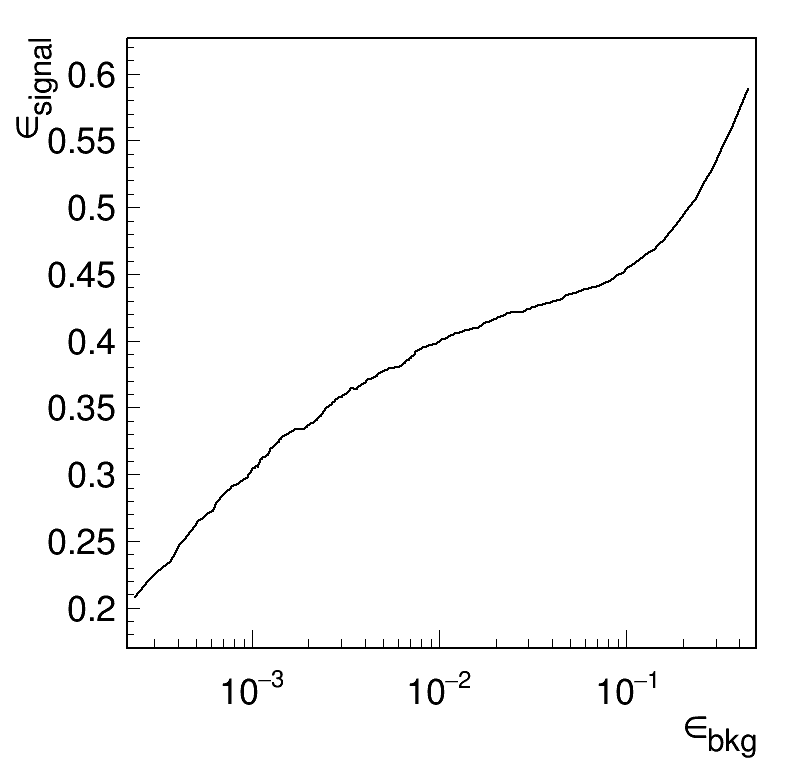

In [37]:
### ROC curve
 

sig_keys = ['H(bb)H(bb), 200 GeV, 1 GeV, 1 m',]
bkg_keys = ['QCD_HT_all, background']
# bkg_keys = ['QCD_HT_all, background', 'WLNu_HT_all, background', 'ZNunu_HT_all, background', 'TT_Lep, background', 'Data 2018']
 

i=0
for sig_k in sig_keys:
    for bkg_k in bkg_keys:
        c = rt.TCanvas('c','c', 800, 800)
        leg = rt.TLegend(0.55,0.19,0.86,0.34)
    #     leg = rt.TLegend(0.65,0.19,0.86,0.34)
        leg.SetTextSize(0.022)
        leg.SetBorderSize(0)
        leg.SetEntrySeparation(0.01)
        gr = {}
        purity = {}

        #     Plotting ROC curve
        gr[name[i]] = create_TGraph(eff[bkg_k],eff[sig_k],axis_title = ['#epsilon_{bkg}','#epsilon_{signal}'])
        gr[name[i]].SetLineColor(std_color_list[i])
        gr[name[i]].SetLineWidth(2)
        gr[name[i]].GetYaxis().SetRangeUser(0.0, 1.0)
        gr[name[i]].GetXaxis().SetLimits(0.0, 1.0)


        gr[name[i]].Draw('ac' if i==0 else 'c')
#         leg.AddEntry(gr[name[i]],'With Hcal Req.', 'l')
        
# # print(aim_thre_cnt,aim_thre_pt,aim_sig_pt,dis_eff_pt)
#         i+=1
        
#         eff_sig_pt = np.array([aim_sig_pt]) 
#         eff_bkg_pt = np.array([aim_bkg_pt]) 
#         gr['DNNpt'] = create_TGraph(eff_bkg_pt,eff_sig_pt,axis_title = ['#epsilon_{bkg}','#epsilon_{signal}'])
#         gr['DNNpt'].SetMarkerSize(0.5)
#         gr['DNNpt'].SetMarkerColor(std_color_list[i])
#         gr['DNNpt'].SetLineColor(std_color_list[i])
#         gr['DNNpt'].SetLineWidth(2)
#         gr['DNNpt'].GetYaxis().SetRangeUser(0.0, 1.0)
#         gr['DNNpt'].GetXaxis().SetLimits(0.0, 1.0)


#         gr['DNNpt'].Draw('psame')
#         leg.AddEntry(gr['DNNpt'],'DNN-based WP with Hcal Req.','p')
        
#         i+=1
        
#         eff_sig_pt = np.array([sig_eff_pt]) 
#         eff_bkg_pt = np.array([bkg_eff_pt]) 
#         gr['pt'] = create_TGraph(eff_bkg_pt,eff_sig_pt,axis_title = ['#epsilon_{bkg}','#epsilon_{signal}'])
#         gr['pt'].SetMarkerSize(0.5)
#         gr['pt'].SetMarkerColor(std_color_list[i])
#         gr['pt'].SetLineColor(std_color_list[i])
#         gr['pt'].SetLineWidth(2)
#         gr['pt'].GetYaxis().SetRangeUser(0.0, 1.0)
#         gr['pt'].GetXaxis().SetLimits(0.0, 1.0)


#         gr['pt'].Draw('psame')
#         leg.AddEntry(gr['pt'],'Cut-based WP with Hcal Req.','p')
        
#         leg.Draw()
        c.SetLogx()
        c.Draw()
        c.SaveAs(plotDir+'ROC_DNN_'+bkg_k.replace(', background','').replace(' ','_')+'.png')
#         print(plotDir+'ROC_DNN_'+bkg_k.replace(', background','').replace(' ','_')+'.png')
    

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /storage/user/jmao/gpu/jmao/cms-llp/plots/20201205/2018_sigmatch/var_plots/WithHcalReq_ROC_DNN_All_MC_BKG.png has been created


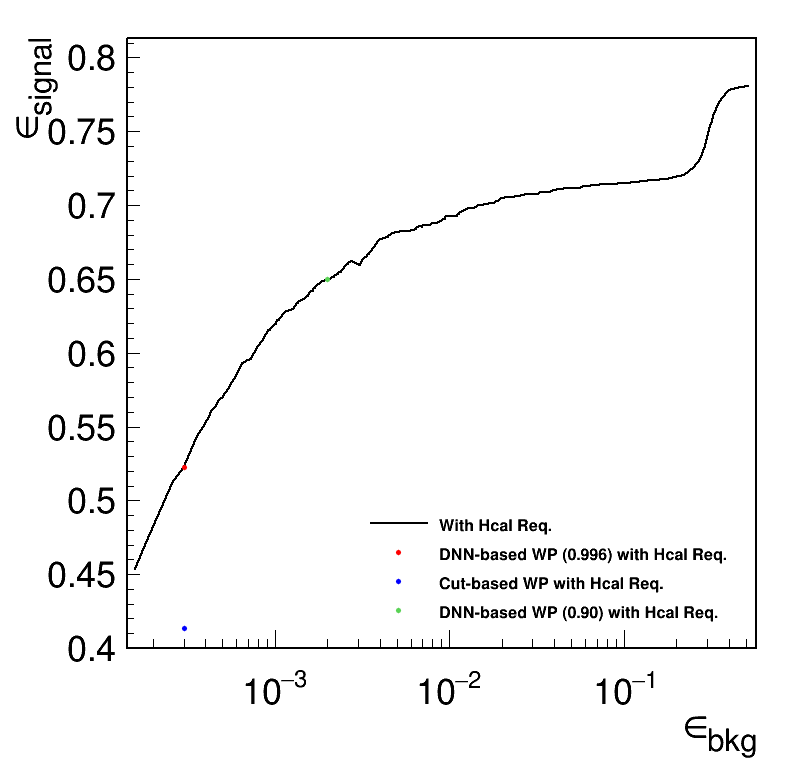

In [20]:
### ROC curve All MC Bkg
 

sig_keys = ['H(bb)H(bb), 200 GeV, 1 GeV, 1 m',]
 

i=0
for sig_k in sig_keys:
    c = rt.TCanvas('c','c', 800, 800)
    leg = rt.TLegend(0.45,0.19,0.86,0.34)
#     leg = rt.TLegend(0.65,0.19,0.86,0.34)
    leg.SetTextSize(0.022)
    leg.SetBorderSize(0)
    leg.SetEntrySeparation(0.01)
    gr = {}
    purity = {}

    #     Plotting ROC curve
    gr[name[i]] = create_TGraph(McEff,eff[sig_k],axis_title = ['#epsilon_{bkg}','#epsilon_{signal}'])
    gr[name[i]].SetLineColor(std_color_list[i])
    gr[name[i]].SetLineWidth(2)
    gr[name[i]].SetMinimum(0.4)
    gr[name[i]].GetYaxis().SetRangeUser(0.0, 1.0)
    gr[name[i]].GetXaxis().SetLimits(0.0, 1.0)


    gr[name[i]].Draw('ac' if i==0 else 'c')
    leg.AddEntry(gr[name[i]],'With Hcal Req.', 'l')
        
# print(aim_thre_cnt,aim_thre_pt,aim_sig_pt,dis_eff_pt)
    i+=1

    eff_sig_pt = np.array([aim_sig_pt]) 
    eff_bkg_pt = np.array([aim_bkg_pt]) 
    gr['DNNpt'] = create_TGraph(eff_bkg_pt,eff_sig_pt,axis_title = ['#epsilon_{bkg}','#epsilon_{signal}'])
    gr['DNNpt'].SetMarkerSize(0.5)
    gr['DNNpt'].SetMarkerColor(std_color_list[i])
    gr['DNNpt'].SetLineColor(std_color_list[i])
    gr['DNNpt'].SetLineWidth(2)
    gr['DNNpt'].GetYaxis().SetRangeUser(0.0, 1.0)
    gr['DNNpt'].GetXaxis().SetLimits(0.0, 1.0)


    gr['DNNpt'].Draw('psame')
    leg.AddEntry(gr['DNNpt'],'DNN-based WP ('+str(aim_thre_pt)+') with Hcal Req.','p')

    i+=1

    eff_sig_pt = np.array([sig_eff_pt]) 
    eff_bkg_pt = np.array([bkg_eff_pt]) 
    gr['pt'] = create_TGraph(eff_bkg_pt,eff_sig_pt,axis_title = ['#epsilon_{bkg}','#epsilon_{signal}'])
    gr['pt'].SetMarkerSize(0.5)
    gr['pt'].SetMarkerColor(std_color_list[i])
    gr['pt'].SetLineColor(std_color_list[i])
    gr['pt'].SetLineWidth(2)
    gr['pt'].GetYaxis().SetRangeUser(0.0, 1.0)
    gr['pt'].GetXaxis().SetLimits(0.0, 1.0)


    gr['pt'].Draw('psame')
    leg.AddEntry(gr['pt'],'Cut-based WP with Hcal Req.','p')
    
#     print(dnn_sig_eff,dnn_bkg_eff)
    i+=1

    eff_sig_pt = np.array([dnn_sig_eff]) 
    eff_bkg_pt = np.array([dnn_bkg_eff]) 
    gr['DNNptL'] = create_TGraph(eff_bkg_pt,eff_sig_pt,axis_title = ['#epsilon_{bkg}','#epsilon_{signal}'])
    gr['DNNptL'].SetMarkerSize(0.5)
    gr['DNNptL'].SetMarkerColor(std_color_list[i])
    gr['DNNptL'].SetLineColor(std_color_list[i])
    gr['DNNptL'].SetLineWidth(2)
    gr['DNNptL'].GetYaxis().SetRangeUser(0.0, 1.0)
    gr['DNNptL'].GetXaxis().SetLimits(0.0, 1.0)


    gr['DNNptL'].Draw('psame')
    leg.AddEntry(gr['DNNptL'],'DNN-based WP (0.90) with Hcal Req.','p')

 
        

#     leg.AddEntry(gr[name[i]],axis[i][0])
    leg.Draw()
    c.SetLogx()

    c.Draw()
    c.SaveAs(plotDir+'WithHcalReq_ROC_DNN_All_MC_BKG.png')
#     c.SaveAs(plotDir+'ROC_DNN_All_MC_BKG.png')
#         print(plotDir+'ROC_DNN_'+bkg_k.replace(', background','').replace(' ','_')+'.png')


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /storage/user/jmao/gpu/jmao/cms-llp/plots/20201205/2018_sigmatch/var_plots/NoHcalReq_ROC_DNN_All_MC_BKG.png has been created


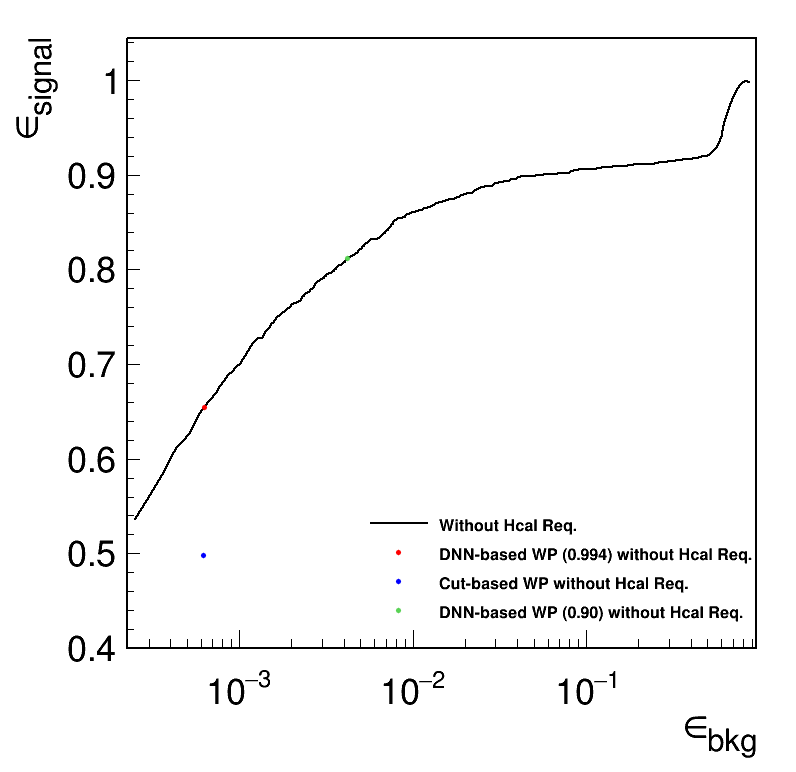

In [21]:
### ROC curve All MC Bkg
 

sig_keys = ['H(bb)H(bb), 200 GeV, 1 GeV, 1 m',]
 

i=0
for sig_k in sig_keys:
    c = rt.TCanvas('c','c', 800, 800)
    leg = rt.TLegend(0.45,0.19,0.86,0.34)
#     leg = rt.TLegend(0.65,0.19,0.86,0.34)
    leg.SetTextSize(0.022)
    leg.SetBorderSize(0)
    leg.SetEntrySeparation(0.01)
    gr = {}
    purity = {}

    #     Plotting ROC curve
    gr[name[i]] = create_TGraph(NoMcEff,Noeff[sig_k],axis_title = ['#epsilon_{bkg}','#epsilon_{signal}'])
    gr[name[i]].SetLineColor(std_color_list[i])
    gr[name[i]].SetLineWidth(2)
    gr[name[i]].SetMinimum(0.4)
    gr[name[i]].GetYaxis().SetRangeUser(0.0, 1.0)
    gr[name[i]].GetXaxis().SetLimits(0.0, 1.0)


    gr[name[i]].Draw('ac' if i==0 else 'c')
    leg.AddEntry(gr[name[i]],'Without Hcal Req.', 'l')
        
# print(aim_thre_cnt,aim_thre_pt,aim_sig_pt,dis_eff_pt)
    i+=1

    eff_sig_pt = np.array([aim_nosig_pt]) 
    eff_bkg_pt = np.array([aim_nobkg_pt]) 
    gr['DNNpt'] = create_TGraph(eff_bkg_pt,eff_sig_pt,axis_title = ['#epsilon_{bkg}','#epsilon_{signal}'])
    gr['DNNpt'].SetMarkerSize(0.5)
    gr['DNNpt'].SetMarkerColor(std_color_list[i])
    gr['DNNpt'].SetLineColor(std_color_list[i])
    gr['DNNpt'].SetLineWidth(2)
    gr['DNNpt'].GetYaxis().SetRangeUser(0.0, 1.0)
    gr['DNNpt'].GetXaxis().SetLimits(0.0, 1.0)


    gr['DNNpt'].Draw('psame')
    leg.AddEntry(gr['DNNpt'],'DNN-based WP ('+str(aim_nothre_pt)+') without Hcal Req.','p')

    i+=1

    eff_sig_pt = np.array([sig_noeff_pt]) 
    eff_bkg_pt = np.array([bkg_noeff_pt]) 
    gr['pt'] = create_TGraph(eff_bkg_pt,eff_sig_pt,axis_title = ['#epsilon_{bkg}','#epsilon_{signal}'])
    gr['pt'].SetMarkerSize(0.5)
    gr['pt'].SetMarkerColor(std_color_list[i])
    gr['pt'].SetLineColor(std_color_list[i])
    gr['pt'].SetLineWidth(2)
    gr['pt'].GetYaxis().SetRangeUser(0.0, 1.0)
    gr['pt'].GetXaxis().SetLimits(0.0, 1.0)


    gr['pt'].Draw('psame')
    leg.AddEntry(gr['pt'],'Cut-based WP without Hcal Req.','p')
    
    i+=1

    eff_sig_pt = np.array([dnn_nosig_eff]) 
    eff_bkg_pt = np.array([dnn_nobkg_eff]) 
    gr['DNNptL'] = create_TGraph(eff_bkg_pt,eff_sig_pt,axis_title = ['#epsilon_{bkg}','#epsilon_{signal}'])
    gr['DNNptL'].SetMarkerSize(0.5)
    gr['DNNptL'].SetMarkerColor(std_color_list[i])
    gr['DNNptL'].SetLineColor(std_color_list[i])
    gr['DNNptL'].SetLineWidth(2)
    gr['DNNptL'].GetYaxis().SetRangeUser(0.0, 1.0)
    gr['DNNptL'].GetXaxis().SetLimits(0.0, 1.0)


    gr['DNNptL'].Draw('psame')
    leg.AddEntry(gr['DNNptL'],'DNN-based WP (0.90) without Hcal Req.','p')
    

        

#     leg.AddEntry(gr[name[i]],axis[i][0])
    leg.Draw()

#     leg.AddEntry(gr[name[i]],axis[i][0])
#     leg.Draw()
    c.SetLogx()

    c.Draw()
    c.SaveAs(plotDir+'NoHcalReq_ROC_DNN_All_MC_BKG.png')
#     c.SaveAs(plotDir+'ROC_DNN_All_MC_BKG.png')
#         print(plotDir+'ROC_DNN_'+bkg_k.replace(', background','').replace(' ','_')+'.png')


In [16]:
# McEffNoHcalReq=McEff

In [17]:
# print(sig_k)
# SigEffNoHcalReq=eff[sig_k]

H(bb)H(bb), 200 GeV, 1 GeV, 1 m


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /storage/user/jmao/gpu/jmao/cms-llp/plots/20201205/2018_sigmatch/var_plots/Com_ROC_DNN_All_MC_BKG.png has been created


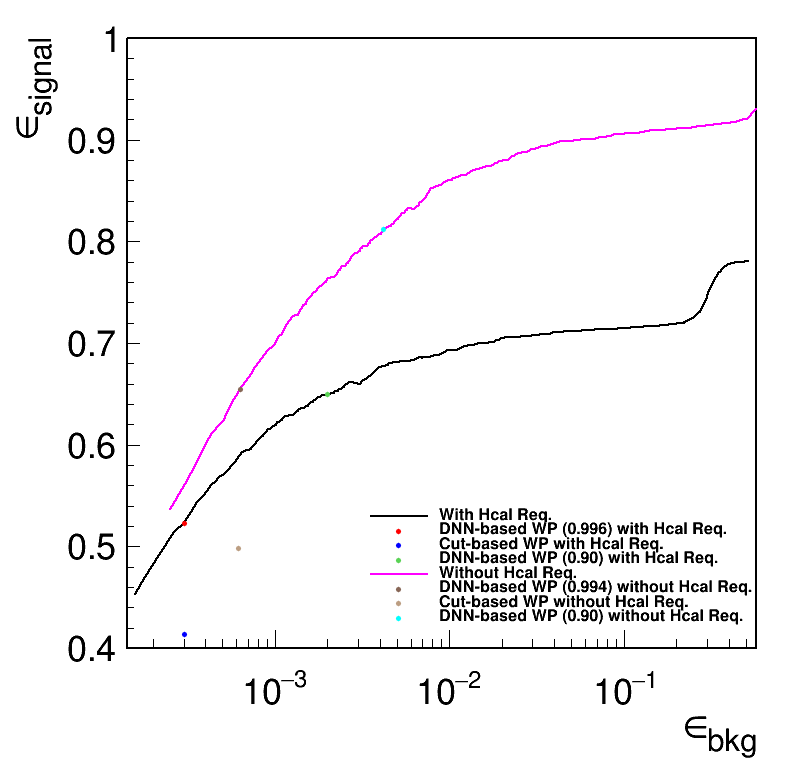

In [22]:
### ROC curve All MC Bkg
 

sig_keys = ['H(bb)H(bb), 200 GeV, 1 GeV, 1 m',]
 

i=0
for sig_k in sig_keys:
    c = rt.TCanvas('c','c', 800, 800)
    leg = rt.TLegend(0.45,0.19,0.86,0.34)
#     leg = rt.TLegend(0.65,0.19,0.86,0.34)
    leg.SetTextSize(0.022)
    leg.SetBorderSize(0)
    leg.SetEntrySeparation(0.01)
    gr = {}
    purity = {}   

    i=0
    #     Plotting ROC curve
    gr[name[i]] = create_TGraph(McEff ,eff[sig_k], axis_title = ['#epsilon_{bkg}','#epsilon_{signal}'])
    gr[name[i]].SetLineColor(std_color_list[i])
    gr[name[i]].SetMinimum(0.4)
    gr[name[i]].SetMaximum(1.0)
    gr[name[i]].SetLineWidth(2)
    gr[name[i]].GetYaxis().SetRangeUser(0.0, 1.0)
    gr[name[i]].GetXaxis().SetLimits(0.0, 1.0)


    gr[name[i]].Draw('acsame')
    leg.AddEntry(gr[name[i]],'With Hcal Req.', 'l')
    
    i+=1

    eff_sig_pt = np.array([aim_sig_pt]) 
    eff_bkg_pt = np.array([aim_bkg_pt]) 
    gr['DNNpt'] = create_TGraph(eff_bkg_pt,eff_sig_pt,axis_title = ['#epsilon_{bkg}','#epsilon_{signal}'])
    gr['DNNpt'].SetMarkerSize(0.5)
    gr['DNNpt'].SetMarkerColor(std_color_list[i])
    gr['DNNpt'].SetLineColor(std_color_list[i])
    gr['DNNpt'].SetLineWidth(2)
    gr['DNNpt'].GetYaxis().SetRangeUser(0.0, 1.0)
    gr['DNNpt'].GetXaxis().SetLimits(0.0, 1.0)


    gr['DNNpt'].Draw('psame')
#     leg.AddEntry(gr['DNNpt'],'DNN-based WP with Hcal Req.','p')
    leg.AddEntry(gr['DNNpt'],'DNN-based WP ('+str(aim_thre_pt)+') with Hcal Req.','p')

    i+=1

    eff_sig_pt = np.array([sig_eff_pt]) 
    eff_bkg_pt = np.array([bkg_eff_pt]) 
    gr['pt'] = create_TGraph(eff_bkg_pt,eff_sig_pt,axis_title = ['#epsilon_{bkg}','#epsilon_{signal}'])
    gr['pt'].SetMarkerSize(0.5)
    gr['pt'].SetMarkerColor(std_color_list[i])
    gr['pt'].SetLineColor(std_color_list[i])
    gr['pt'].SetLineWidth(2)
    gr['pt'].GetYaxis().SetRangeUser(0.0, 1.0)
    gr['pt'].GetXaxis().SetLimits(0.0, 1.0)


    gr['pt'].Draw('psame')
    leg.AddEntry(gr['pt'],'Cut-based WP with Hcal Req.','p')
    
    i+=1

    eff_sig_pt = np.array([dnn_sig_eff]) 
    eff_bkg_pt = np.array([dnn_bkg_eff]) 
    gr['DNNptL'] = create_TGraph(eff_bkg_pt,eff_sig_pt,axis_title = ['#epsilon_{bkg}','#epsilon_{signal}'])
    gr['DNNptL'].SetMarkerSize(0.5)
    gr['DNNptL'].SetMarkerColor(std_color_list[i])
    gr['DNNptL'].SetLineColor(std_color_list[i])
    gr['DNNptL'].SetLineWidth(2)
    gr['DNNptL'].GetYaxis().SetRangeUser(0.0, 1.0)
    gr['DNNptL'].GetXaxis().SetLimits(0.0, 1.0)


    gr['DNNptL'].Draw('psame')
    leg.AddEntry(gr['DNNptL'],'DNN-based WP (0.90) with Hcal Req.','p')
        
# print(aim_thre_cnt,aim_thre_pt,aim_sig_pt,dis_eff_pt)
    i+=1
    gr['NoHcalReq'] = create_TGraph(NoMcEff,Noeff[sig_k],axis_title = ['#epsilon_{bkg}','#epsilon_{signal}'])
    gr['NoHcalReq'].SetLineColor(std_color_list[i])
    gr['NoHcalReq'].SetLineWidth(2)
    gr['NoHcalReq'].GetYaxis().SetRangeUser(0.0, 1.0)
    gr['NoHcalReq'].GetXaxis().SetLimits(0.0, 1.0)


    gr['NoHcalReq'].Draw('csame')    
    leg.AddEntry(gr['NoHcalReq'],'Without Hcal Req.', 'l')
    
    i+=1

    eff_sig_pt = np.array([aim_nosig_pt]) 
    eff_bkg_pt = np.array([aim_nobkg_pt]) 
    gr['DNNptN'] = create_TGraph(eff_bkg_pt,eff_sig_pt,axis_title = ['#epsilon_{bkg}','#epsilon_{signal}'])
    gr['DNNptN'].SetMarkerSize(0.5)
    gr['DNNptN'].SetMarkerColor(std_color_list[i])
    gr['DNNptN'].SetLineColor(std_color_list[i])
    gr['DNNptN'].SetLineWidth(2)
    gr['DNNptN'].GetYaxis().SetRangeUser(0.0, 1.0)
    gr['DNNptN'].GetXaxis().SetLimits(0.0, 1.0)


    gr['DNNptN'].Draw('psame')
#     leg.AddEntry(gr['DNNptN'],'DNN-based WP without Hcal Req.','p')
    leg.AddEntry(gr['DNNptN'],'DNN-based WP ('+str(aim_nothre_pt)+') without Hcal Req.','p')

    i+=1

    eff_sig_pt = np.array([sig_noeff_pt]) 
    eff_bkg_pt = np.array([bkg_noeff_pt]) 
    gr['ptN'] = create_TGraph(eff_bkg_pt,eff_sig_pt,axis_title = ['#epsilon_{bkg}','#epsilon_{signal}'])
    gr['ptN'].SetMarkerSize(0.5)
    gr['ptN'].SetMarkerColor(std_color_list[i])
    gr['ptN'].SetLineColor(std_color_list[i])
    gr['ptN'].SetLineWidth(2)
    gr['ptN'].GetYaxis().SetRangeUser(0.0, 1.0)
    gr['ptN'].GetXaxis().SetLimits(0.0, 1.0)


    gr['ptN'].Draw('psame')
    leg.AddEntry(gr['ptN'],'Cut-based WP without Hcal Req.','p')
    
    

    i+=1

    eff_sig_pt = np.array([dnn_nosig_eff]) 
    eff_bkg_pt = np.array([dnn_nobkg_eff]) 
    gr['DNNptLN'] = create_TGraph(eff_bkg_pt,eff_sig_pt,axis_title = ['#epsilon_{bkg}','#epsilon_{signal}'])
    gr['DNNptLN'].SetMarkerSize(0.5)
    gr['DNNptLN'].SetMarkerColor(std_color_list[i])
    gr['DNNptLN'].SetLineColor(std_color_list[i])
    gr['DNNptLN'].SetLineWidth(2)
    gr['DNNptLN'].GetYaxis().SetRangeUser(0.0, 1.0)
    gr['DNNptLN'].GetXaxis().SetLimits(0.0, 1.0)


    gr['DNNptLN'].Draw('psame')
    leg.AddEntry(gr['DNNptLN'],'DNN-based WP (0.90) without Hcal Req.','p')
        
# print(aim_thre_cnt,aim_thre_pt,aim_sig_pt,dis_eff_pt)

        
    
    leg.Draw()
    c.SetLogx()
    c.Draw()
    c.SaveAs(plotDir+'Com_ROC_DNN_All_MC_BKG.png')
#         print(plotDir+'ROC_DNN_'+bkg_k.replace(', background','').replace(' ','_')+'.png')


# Tag bins

In [30]:
variables = [
 
#         ['jetChargedHadronEnergyFraction', trg_jet_chef, 50, 0, 1],
 
#         ['jetTime', trg_jet_time, 50, -13, 13],
#         ['jetMinDeltaRPVTracks', trg_jet_dr, 50, 0, 3],
#         ['jetTMF', trg_jet_tmf, 50, 0, 1],
    
    
# #         ['jetPt', trg_jet_pt, 10, 0, 100],
#         ['jetPt', trg_jet_pt, 20, 0, 2000],
#         ['jetEta', trg_jet_eta, 20, -3.15, 3.15],
#         ['jetE', trg_jet_e, 50, 0, 1000],
#         ['jetPhi', trg_jet_phi, 20, -3.15, 3.15],
    
#         ['jetMuonEnergyFraction', trg_jet_muef, 50, 0, 1],
#         ['jetElectronEnergyFraction', trg_jet_eleef, 50, 0, 1],
#         ['jetPhotonEnergyFraction', trg_jet_phoef, 50, 0, 1],
    

        ['jetTime', trg_jet_time, 50, -13, 13],
        ['jetMinDeltaRPVTracks', trg_jet_dr, 50, 0, 3],
        ['jetTMF', trg_jet_tmf, 50, 0, 1],
    
    
#         ['jetPt', trg_jet_pt, 20, 0, 2000],
        ['jetPt', trg_jet_pt, 200, 0, 2000],
        ['jetEta', trg_jet_eta, 20, -3.15, 3.15],
        ['jetE', trg_jet_e, 50, 0, 1000],
        ['jetPhi', trg_jet_phi, 20, -3.15, 3.15],
    
     
        ['jetMuonEnergyFraction', trg_jet_muef, 50, 0, 1],
        ['jetElectronEnergyFraction', trg_jet_eleef, 50, 0, 1],
        ['jetPhotonEnergyFraction', trg_jet_phoef, 50, 0, 1],
    
        ['jetChargedHadronEnergyFraction', trg_jet_chef, 50, 0, 1],
    
    
        ['jetCSV', trg_jet_csv, 50, 0, 1],
        ['jetDNN', trg_jet_dnn, 50, 0, 1],
 
        ['jetChargedMultiplicity', trg_jet_chm, 50, 0, 50],
        ['jetNSelectedTracks', trg_jet_nseltrk, 50, 0, 50],
        ['jetEnergyRecHitsEcal', trg_jet_ecale, 50, 0, 500],
        ['jetNRecHitsEcal', trg_jet_nhits, 50, 0, 50],
    
        ['jetPtAllTracks', trg_jet_alltrkpt, 50, 0, 2000],
        ['jetPtAllPVTracks', trg_jet_pvtrkpt, 50, 0, 500],
        ['jetAlphaMax', trg_jet_amax, 50, 0, 5],
        ['jetBetaMax', trg_jet_bmax, 50, 0, 1],
        ['jetGammaMax', trg_jet_gmax, 50, 0, 1],
        ['jetGammaMax_EM', trg_jet_gmaxem, 50, 0, 1],
        ['jetGammaMax_Hadronic', trg_jet_gmaxh, 50, 0, 1],
        ['jetMinDeltaRAllTracks', trg_jet_drall, 50, 0, 3],
        
    
]

In [31]:
# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20201022/2018/tags/'
# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20201102/2018/tags/'
# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20201103/2018/tags/'
# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20201104/2018/tags/'
# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20201104/2018/1lep_tags/'
# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20201117/2018/tags/'
plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20201128/2018_tag_bins/'
print(plotDir)
os.system("mkdir -p "+ plotDir)

/storage/user/jmao/gpu/jmao/cms-llp/plots/20201128/2018_tag_bins/


0

0
var/x_axis jetTime binning 50 -13 13
351967
QCD_HT_all, background 351967 351967
3056002
WLNu_HT_all, background 3056002 3056002
7142324
ZNunu_HT_all, background 7142324 7142324
4881557
TT_Lep, background 4881557 4881557
367
H(bb)H(bb), 200 GeV, 1 GeV, 1 m factor 0.0
H(bb)H(bb), 200 GeV, 1 GeV, 1 m 1
cnt H(bb)H(bb), 200 GeV, 1 GeV, 1 m 0 0.0
4180935
Data 2018 1
total 0.0 0.0
35.9 fb^{-1} (13 TeV)
var/x_axis jetMinDeltaRPVTracks binning 50 0 3
351967
QCD_HT_all, background 351967 351967
3056002
WLNu_HT_all, background 3056002 3056002
7142324
ZNunu_HT_all, background 7142324 7142324
4881557
TT_Lep, background 4881557 4881557
367
H(bb)H(bb), 200 GeV, 1 GeV, 1 m factor 0.0
H(bb)H(bb), 200 GeV, 1 GeV, 1 m 1
cnt H(bb)H(bb), 200 GeV, 1 GeV, 1 m 0 0.0
4180935
Data 2018 1
total 0.0 0.0
35.9 fb^{-1} (13 TeV)
var/x_axis jetTMF binning 50 0 1
351967
QCD_HT_all, background 351967 351967
3056002
WLNu_HT_all, background 3056002 3056002
7142324
ZNunu_HT_all, background 7142324 7142324
4881557
TT_Lep

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: total (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: QCD_HT_all, background (Potential memory leak).
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Info in <TH1D::Add>: Attempt to add histograms with different number of bins - trying to use TH1::Merge
Error in <Merge>: Cannot merge histograms - limits are inconsistent:
 first: total (3, 0.000000, 3.000000), second: QCD_HT_all, background (50, -13.000000, 13.000000)
Warning in <TROOT::Append>: Replacing existing TH1: WLNu_HT_all, background (Potential memory leak).
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Info in <TH1D::Add>: Attempt to add histograms with different number of bins - trying to use TH1::Merge
Error in <Merge>: Cannot merge histograms - limits are inconsistent:
 first: total (3, 0.000000, 3.000000), second: 

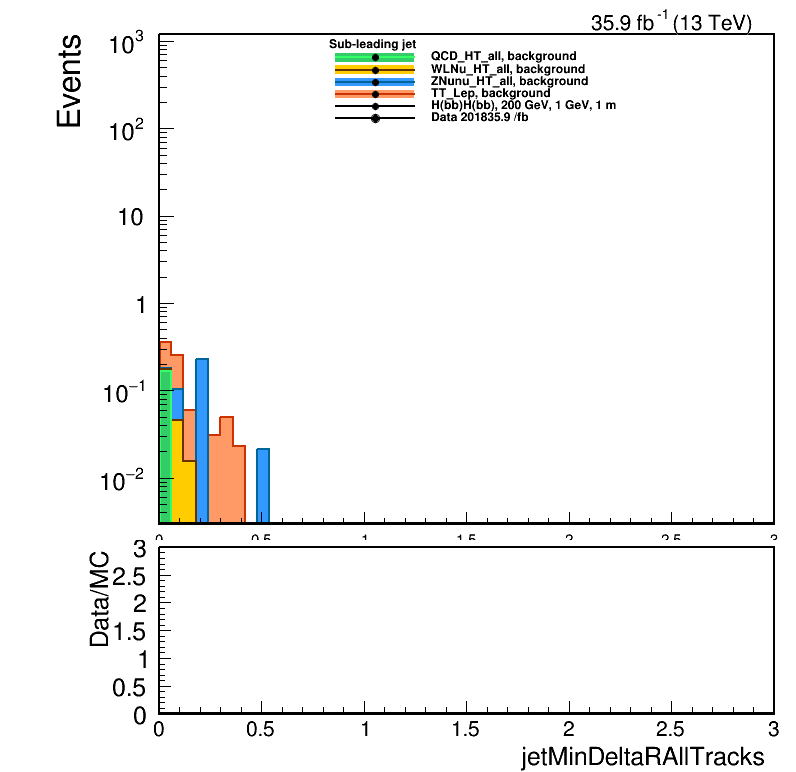

In [32]:
for binN in range(3):
    bin_str = 'Bin'+str(binN)
    for cnt in range(2):
        print(cnt)
        part = cnt
        if cnt==0:
            cnt_str = 'Leading jet'
            name_str = 'leading_jet'
        else:
            cnt_str = 'Sub-leading jet'
            name_str = 'sub_leading_jet'
        for var in variables:
            print('var/x_axis', var[0], 'binning', var[2], var[3], var[4])
            x_axis = var[0]
            y_axis = 'Events'
            axis_set = [x_axis, y_axis]
            bin_set = [var[2],var[3],var[4]]
            lumi = 35900 
#             outf = bin_str+'_'+var[0]+'_'+name_str+'_stack_pt100.png'
            outf = bin_str+'_'+var[0]+'_'+name_str+'_stack.png'

            # Plotting THStack
            c = rt.TCanvas('c','c', 800, 800)
            ht = {}
            # leg = rt.TLegend(0.59,0.70,0.97,0.93)
            leg = rt.TLegend(0.40,0.78,0.97,0.94)

            leg.SetTextSize(0.025)
            leg.SetBorderSize(0)
            leg.SetEntrySeparation(0.01)


            pad1 = rt.TPad("pad1", "pad1", 0, 0.3, 1, 0.99)
            pad1.SetBottomMargin(0.03)
            # pad1.SetGridx()
            pad1.SetLogy()
            pad1.SetLeftMargin(0.2)
            pad1.SetRightMargin(0.027)
            pad1.Draw()
            pad1.cd()

            stack = rt.THStack( "hs" , "H Stack " )
            total = rt.TH1D('total','total',3,0,3)
            color_list = [845,800,861,806,876,597,625]
#             keys = ['QCD_HT_all, background']
            keys = ['QCD_HT_all, background', 'WLNu_HT_all, background', 'ZNunu_HT_all, background', 'TT_Lep, background']
#             sig_keys = [  ]
            sig_keys = ['H(bb)H(bb), 200 GeV, 1 GeV, 1 m' ]
            data_keys = ['Data 2018']
            # sig_keys = ['H(bb)H(bb), N3N2, 200 GeV, 1 GeV, 1 m','H(bb)H(bb), N3N2, 400 GeV, 1 GeV, 1 m','H(bb)H(bb), N3N2, 127 GeV, 1 GeV, 1 m',  ]
            bkg_integral = 0.0
            max_value = 0
            i=0
            for k in keys:
                if 'background' in k or True:


                    pt1 = var[1][k] 
                    sel_str = np.logical_and(pt1.count()>part, nTags[k]==binN)
                    pt2 = pt1[sel_str]
                    print(len(pt2))
                    v = pt2[:,part]
                    w = trg_jet_w[k][sel_str] 
                    pu = trg_jet_puw[k][sel_str] 
                    print(k,len(v),len(w))
                    if 'QCD' in k:
                        sf=1.1
                    else:
                        sf=1
                    ht[k] = create_TH1D( v, axis_title=axis_set, name=k, binning=bin_set,weights = w*pu*lumi*sf)
                    ht[k].Sumw2()
                    total.Add(ht[k])
                    stack.Add( ht[k])
                    ht[k].SetLineColor(color_list[i]+3)
                    ht[k].SetFillColor(color_list[i])
                    leg.AddEntry(ht[k],k)
                    max_value += ht[k].GetBinContent(ht[k].GetMaximumBin())
                    bkg_integral += ht[k].Integral()

                    i+=1
            stack.Draw('hist')
            # stack.SetMaximum(max_value*1.5)
            stack.SetMaximum(max_value*1e+03)
            stack.SetMinimum(10e-3)
            stack.GetYaxis().SetTitle(y_axis)
            stack.GetXaxis().SetTitle(x_axis)
            stack.GetXaxis().SetLabelSize(0.03)



            i=0
            for k in sig_keys:
                pt1 = var[1][k] 
                sel_str = np.logical_and(pt1.count()>part, nTags[k]==binN)
                pt2 = pt1[sel_str]
                print(len(pt2))
                v = pt2[:,part]
                w = trg_jet_w[k][sel_str] 

                factor = bkg_integral/np.sum(w)
                print(k,'factor',1.0*np.sum(w[v>50])/np.sum(w))
                ht[k] = create_TH1D( v, axis_title=axis_set, name=k, binning=bin_set,weights = w*lumi)
                ht[k].Sumw2()
                ht[k].SetLineColor(std_color_list[i])
                print(k, std_color_list[i])
                ht[k].Draw("hist E same")
                leg.AddEntry(ht[k],k)
                max_value = max(ht[k].GetBinContent(ht[k].GetMaximumBin()),max_value)
                print('cnt',k,np.count_nonzero(w[v==2]),np.sum(w[v==2]))

                i+=1

            i=0
            for k in data_keys:
                pt1 = var[1][k] 
                sel_str = np.logical_and(pt1.count()>part, nTags[k]==binN)
                pt2 = pt1[sel_str]
                print(len(pt2))
                v = pt2[:,part]
                w = trg_jet_w[k][sel_str] 

                ht[k] = create_TH1D( v, axis_title=axis_set, name=k, binning=bin_set,weights = w*1)
                ht[k].Sumw2()
                ht[k].SetLineColor(std_color_list[i])
                ht[k].SetMarkerColor(std_color_list[i])
                ht[k].SetMarkerStyle(20)
                ht[k].SetMarkerSize(1.)
                print(k, std_color_list[i])
                ht[k].Draw("p E same")
                leg.AddEntry(ht[k],k+str(lumi/1000)+' /fb')

                i+=1

            leg.SetHeader(cnt_str)
            leg.Draw()

            last = stack.GetStack().Last()
            total.SetFillStyle(3001)
            total.SetLineColor(1)
            total.SetFillColor(1)

            total.GetYaxis().SetTitleOffset(1.6)
            total.Draw("same e2")
            print("total",total.GetBinContent(1),total.GetBinError(1))

            c.cd()
            pad2 = rt.TPad("pad2", "pad2", 0, 0, 1, 0.3)
            pad2.SetTopMargin(0.03)
            pad2.SetBottomMargin(0.25)
            # pad2.SetGrid()
            pad2.SetLeftMargin(0.2)
            pad2.SetRightMargin(0.027)
            pad2.Draw()
            pad2.cd()

            h_copy = ht['Data 2018'].Clone()
            h_copy.Divide(stack.GetStack().Last())
            h_copy.GetYaxis().SetTitleOffset(0.4)
        #     h.GetYaxis().SetRangeUser(ratio_bounds[0], ratio_bounds[1])
            h_copy.GetYaxis().SetTitleSize(0.12)
            h_copy.GetYaxis().SetLabelSize(0.12)
            h_copy.GetYaxis().SetNdivisions(506)
            h_copy.SetMaximum(3)
            h_copy.SetMinimum(0)



            h_copy.GetXaxis().SetTitleOffset(1)
            h_copy.GetXaxis().SetTitleSize(0.12)
            h_copy.GetXaxis().SetLabelSize(0.10)
            h_copy.GetXaxis().SetTickSize(0.07)
            h_copy.SetYTitle('Data/MC')
            h_copy.SetTitle("")
        #        h.SetStats(0)
            h_copy.DrawCopy('E1')
            pad2.Update()




            CMS_lumi.lumi_13TeV = str(lumi/1000)+" fb^{-1}"
            CMS_lumi.cmsText = ""
            CMS_lumi.writeExtraText = False
            CMS_lumi.CMS_lumi(c,4,3)


            c.SetLeftMargin(0.2)
            c.SetRightMargin(0.027)
            c.SetLogy()
            c.Draw()
            c.SaveAs(plotDir+outf)


# Tagged jets

In [25]:
variables = [
 
#         ['jetChargedHadronEnergyFraction', tag_jet_chef, 50, 0, 1],
 
#         ['jetTime', tag_jet_time, 50, -13, 13],
#         ['jetMinDeltaRPVTracks', tag_jet_dr, 50, 0, 3],
#         ['jetTMF', tag_jet_tmf, 50, 0, 1],
    
    
#         ['jetPt', tag_jet_pt, 10, 0, 100],
        ['jetPt', tag_jet_pt, 200, 0, 2000],
#         ['jetPt', tag_jet_pt, 20, 0, 2000],
#         ['jetEta', tag_jet_eta, 20, -3.15, 3.15],
#         ['jetE', tag_jet_e, 50, 0, 1000],
#         ['jetPhi', tag_jet_phi, 20, -3.15, 3.15],
    
#         ['jetMuonEnergyFraction', tag_jet_muef, 50, 0, 1],
#         ['jetElectronEnergyFraction', tag_jet_eleef, 50, 0, 1],
#         ['jetPhotonEnergyFraction', tag_jet_phoef, 50, 0, 1],
    
    
    
]

In [23]:
# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20201022/2018/tagged_jets/'
plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20201128/2018_dnn_tagged_jets/'
 
print(plotDir)
os.system("mkdir -p "+ plotDir)

/storage/user/jmao/gpu/jmao/cms-llp/plots/20201128/2018_dnn_tagged_jets/


0

0
var/x_axis jetPt binning 200 0 2000
665
QCD_HT_all, background 665 665
5882
WLNu_HT_all, background 5882 5882
7650
ZNunu_HT_all, background 7650 7650
9815
TT_Lep, background 9815 9815
1214
H(bb)H(bb), 200 GeV, 1 GeV, 1 m factor 0.9596376431576974
H(bb)H(bb), 200 GeV, 1 GeV, 1 m 1
cnt H(bb)H(bb), 200 GeV, 1 GeV, 1 m 0 0.0
3488
Data 2018 1
total 0.0 0.0
35.9 fb^{-1} (13 TeV)
1
var/x_axis jetPt binning 200 0 2000
1
QCD_HT_all, background 1 1
6
WLNu_HT_all, background 6 6
7
ZNunu_HT_all, background 7 7
17
TT_Lep, background 17 17
203
H(bb)H(bb), 200 GeV, 1 GeV, 1 m factor 0.7241379801021488
H(bb)H(bb), 200 GeV, 1 GeV, 1 m 1
cnt H(bb)H(bb), 200 GeV, 1 GeV, 1 m 0 0.0
7
Data 2018 1
total 0.0 0.0
35.9 fb^{-1} (13 TeV)


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: total (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: QCD_HT_all, background (Potential memory leak).
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Info in <TH1D::Add>: Attempt to add histograms with different number of bins - trying to use TH1::Merge
Warning in <TROOT::Append>: Replacing existing TH1: WLNu_HT_all, background (Potential memory leak).
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TROOT::Append>: Replacing existing TH1: ZNunu_HT_all, background (Potential memory leak).
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TROOT::Append>: Replacing existing TH1: TT_Lep, background (Potential memory leak).
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of 

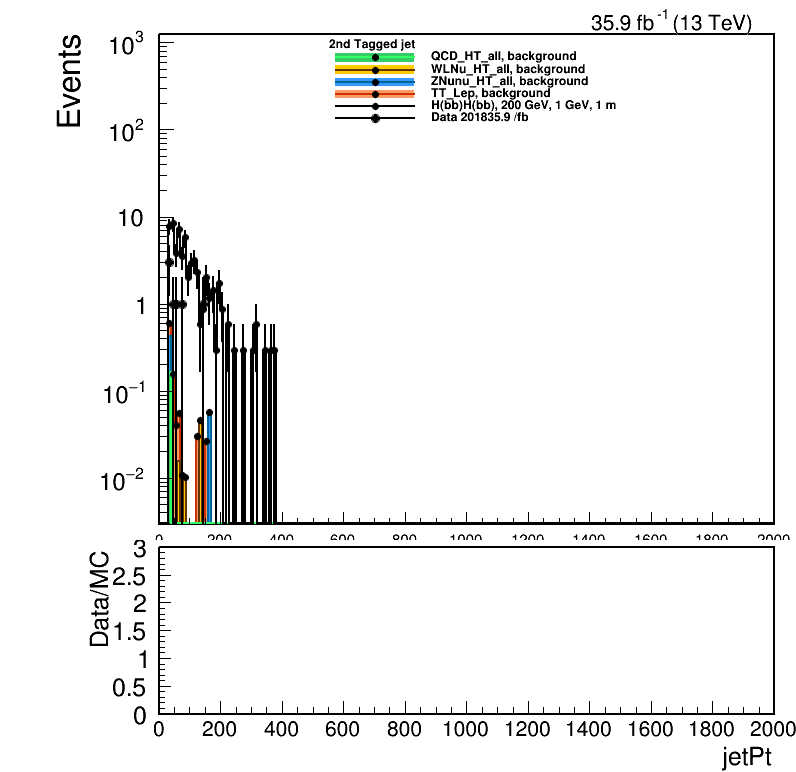

In [26]:
for cnt in range(2):
    print(cnt)
    part = cnt
    if cnt==0:
        cnt_str = '1st Tagged jet'
        name_str = 'first_tagged_jet'
    else:
        cnt_str = '2nd Tagged jet'
        name_str = 'second_tagged_jet'
    for var in variables:
        print('var/x_axis', var[0], 'binning', var[2], var[3], var[4])
        x_axis = var[0]
        y_axis = 'Events'
        axis_set = [x_axis, y_axis]
        bin_set = [var[2],var[3],var[4]]
        lumi = 35900 
        outf = var[0]+'_'+name_str+'_stack_pt100.png'
#         outf = var[0]+'_'+name_str+'_stack.png'

        # Plotting THStack
        c = rt.TCanvas('c','c', 800, 800)
        ht = {}
        # leg = rt.TLegend(0.59,0.70,0.97,0.93)
        leg = rt.TLegend(0.40,0.78,0.97,0.94)

        leg.SetTextSize(0.025)
        leg.SetBorderSize(0)
        leg.SetEntrySeparation(0.01)


        pad1 = rt.TPad("pad1", "pad1", 0, 0.3, 1, 0.99)
        pad1.SetBottomMargin(0.03)
        # pad1.SetGridx()
        pad1.SetLogy()
        pad1.SetLeftMargin(0.2)
        pad1.SetRightMargin(0.027)
        pad1.Draw()
        pad1.cd()

        stack = rt.THStack( "hs" , "H Stack " )
        total = rt.TH1D('total','total',3,0,3)
        color_list = [845,800,861,806,876,597,625]
        keys = ['QCD_HT_all, background', 'WLNu_HT_all, background', 'ZNunu_HT_all, background', 'TT_Lep, background']
#             sig_keys = [  ]
        sig_keys = ['H(bb)H(bb), 200 GeV, 1 GeV, 1 m' ]
        data_keys = ['Data 2018']
        # sig_keys = ['H(bb)H(bb), N3N2, 200 GeV, 1 GeV, 1 m','H(bb)H(bb), N3N2, 400 GeV, 1 GeV, 1 m','H(bb)H(bb), N3N2, 127 GeV, 1 GeV, 1 m',  ]
        bkg_integral = 0.0
        max_value = 0
        i=0
        for k in keys:
            if 'background' in k or True:


                pt1 = var[1][k] 
                sel_str = np.logical_and(pt1.count()>part, 1)
                pt2 = pt1[sel_str]
                print(len(pt2))
                v = pt2[:,part]
                w = trg_jet_w[k][sel_str] 
                pu = trg_jet_puw[k][sel_str] 
                print(k,len(v),len(w))
                if 'QCD' in k:
                    sf=1.1
                else:
                    sf=1
                ht[k] = create_TH1D( v, axis_title=axis_set, name=k, binning=bin_set,weights = w*pu*lumi*sf)
                ht[k].Sumw2()
                total.Add(ht[k])
                stack.Add( ht[k])
                ht[k].SetLineColor(color_list[i]+3)
                ht[k].SetFillColor(color_list[i])
                leg.AddEntry(ht[k],k)
                max_value += ht[k].GetBinContent(ht[k].GetMaximumBin())
                bkg_integral += ht[k].Integral()

                i+=1
        stack.Draw('hist')
        # stack.SetMaximum(max_value*1.5)
        stack.SetMaximum(max_value*1e+03)
        stack.SetMinimum(10e-3)
        stack.GetYaxis().SetTitle(y_axis)
        stack.GetXaxis().SetTitle(x_axis)
        stack.GetXaxis().SetLabelSize(0.03)



        i=0
        for k in sig_keys:
            pt1 = var[1][k] 
            sel_str = np.logical_and(pt1.count()>part, 1)
            pt2 = pt1[sel_str]
            print(len(pt2))
            v = pt2[:,part]
            w = trg_jet_w[k][sel_str] 

            factor = bkg_integral/np.sum(w)
            print(k,'factor',1.0*np.sum(w[v>50])/np.sum(w))
            ht[k] = create_TH1D( v, axis_title=axis_set, name=k, binning=bin_set,weights = w*lumi)
            ht[k].Sumw2()
            ht[k].SetLineColor(std_color_list[i])
            print(k, std_color_list[i])
            ht[k].Draw("hist E same")
            leg.AddEntry(ht[k],k)
            max_value = max(ht[k].GetBinContent(ht[k].GetMaximumBin()),max_value)
            print('cnt',k,np.count_nonzero(w[v==2]),np.sum(w[v==2]))

            i+=1

        i=0
        for k in data_keys:
            pt1 = var[1][k] 
            sel_str = np.logical_and(pt1.count()>part, 1)
            pt2 = pt1[sel_str]
            print(len(pt2))
            v = pt2[:,part]
            w = trg_jet_w[k][sel_str] 

            ht[k] = create_TH1D( v, axis_title=axis_set, name=k, binning=bin_set,weights = w*1)
            ht[k].Sumw2()
            ht[k].SetLineColor(std_color_list[i])
            ht[k].SetMarkerColor(std_color_list[i])
            ht[k].SetMarkerStyle(20)
            ht[k].SetMarkerSize(1.)
            print(k, std_color_list[i])
            ht[k].Draw("p E same")
            leg.AddEntry(ht[k],k+str(lumi/1000)+' /fb')

            i+=1

        leg.SetHeader(cnt_str)
        leg.Draw()

        last = stack.GetStack().Last()
        total.SetFillStyle(3001)
        total.SetLineColor(1)
        total.SetFillColor(1)

        total.GetYaxis().SetTitleOffset(1.6)
        total.Draw("same e2")
        print("total",total.GetBinContent(1),total.GetBinError(1))

        c.cd()
        pad2 = rt.TPad("pad2", "pad2", 0, 0, 1, 0.3)
        pad2.SetTopMargin(0.03)
        pad2.SetBottomMargin(0.25)
        # pad2.SetGrid()
        pad2.SetLeftMargin(0.2)
        pad2.SetRightMargin(0.027)
        pad2.Draw()
        pad2.cd()

        h_copy = ht['Data 2018'].Clone()
        h_copy.Divide(stack.GetStack().Last())
        h_copy.GetYaxis().SetTitleOffset(0.4)
    #     h.GetYaxis().SetRangeUser(ratio_bounds[0], ratio_bounds[1])
        h_copy.GetYaxis().SetTitleSize(0.12)
        h_copy.GetYaxis().SetLabelSize(0.12)
        h_copy.GetYaxis().SetNdivisions(506)
        h_copy.SetMaximum(3)
        h_copy.SetMinimum(0)



        h_copy.GetXaxis().SetTitleOffset(1)
        h_copy.GetXaxis().SetTitleSize(0.12)
        h_copy.GetXaxis().SetLabelSize(0.10)
        h_copy.GetXaxis().SetTickSize(0.07)
        h_copy.SetYTitle('Data/MC')
        h_copy.SetTitle("")
    #        h.SetStats(0)
        h_copy.DrawCopy('E1')
        pad2.Update()




        CMS_lumi.lumi_13TeV = str(lumi/1000)+" fb^{-1}"
        CMS_lumi.cmsText = ""
        CMS_lumi.writeExtraText = False
        CMS_lumi.CMS_lumi(c,4,3)


        c.SetLeftMargin(0.2)
        c.SetRightMargin(0.027)
        c.SetLogy()
        c.Draw()
        c.SaveAs(plotDir+outf)


# Estimation

# Tagged jets

In [27]:
variables = [
 
        ['jetChargedHadronEnergyFraction', tag_jet_chef, 50, 0, 1],
 
        ['jetTime', tag_jet_time, 50, -13, 13],
        ['jetMinDeltaRPVTracks', tag_jet_dr, 50, 0, 3],
        ['jetTMF', tag_jet_tmf, 50, 0, 1],
    
    
        ['jetPt', tag_jet_pt, 200, 0, 2000],
#         ['jetPt', tag_jet_pt, 20, 0, 2000],
#         ['jetPt', tag_jet_pt, 10, 0, 100],
        ['jetEta', tag_jet_eta, 20, -3.15, 3.15],
        ['jetE', tag_jet_e, 50, 0, 1000],
        ['jetPhi', tag_jet_phi, 20, -3.15, 3.15],
    
    
        ['jetMuonEnergyFraction', tag_jet_muef, 50, 0, 1],
        ['jetElectronEnergyFraction', tag_jet_eleef, 50, 0, 1],
        ['jetPhotonEnergyFraction', tag_jet_phoef, 50, 0, 1],
    
        ['jetCSV', tag_jet_csv, 50, 0, 1],
        ['jetDNN', tag_jet_dnn, 50, 0, 1],
 
        ['jetChargedMultiplicity', tag_jet_chm, 50, 0, 50],
        ['jetNSelectedTracks', tag_jet_nseltrk, 50, 0, 50],
        ['jetEnergyRecHitsEcal', tag_jet_ecale, 50, 0, 500],
        ['jetNRecHitsEcal', tag_jet_nhits, 50, 0, 50],
    
        ['jetPtAllTracks', tag_jet_alltrkpt, 50, 0, 2000],
        ['jetPtAllPVTracks', tag_jet_pvtrkpt, 50, 0, 500],
        ['jetAlphaMax', tag_jet_amax, 50, 0, 5],
        ['jetBetaMax', tag_jet_bmax, 50, 0, 1],
        ['jetGammaMax', tag_jet_gmax, 50, 0, 1],
        ['jetGammaMax_EM', tag_jet_gmaxem, 50, 0, 1],
        ['jetGammaMax_Hadronic', tag_jet_gmaxh, 50, 0, 1],
        ['jetMinDeltaRAllTracks', tag_jet_drall, 50, 0, 3],        
    
]

In [28]:
plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20201128/2018_Tagged_jets/'
 
print(plotDir)
os.system("mkdir -p "+ plotDir)

/storage/user/jmao/gpu/jmao/cms-llp/plots/20201128/2018_Tagged_jets/


0

0
var/x_axis jetChargedHadronEnergyFraction binning 50 0 1
665
QCD_HT_all, background 665 665
1214
H(bb)H(bb), 200 GeV, 1 GeV, 1 m factor 0.0
H(bb)H(bb), 200 GeV, 1 GeV, 1 m 1
cnt H(bb)H(bb), 200 GeV, 1 GeV, 1 m 0 0.0
3488
Data 2018 1
total 637.4293144498952 51.8583535070388
35.9 fb^{-1} (13 TeV)
var/x_axis jetTime binning 50 -13 13
665
QCD_HT_all, background 665 665
1214
H(bb)H(bb), 200 GeV, 1 GeV, 1 m factor 0.0
H(bb)H(bb), 200 GeV, 1 GeV, 1 m 1
cnt H(bb)H(bb), 200 GeV, 1 GeV, 1 m 0 0.0
3488
Data 2018 1
total 0.0 0.0
35.9 fb^{-1} (13 TeV)
var/x_axis jetMinDeltaRPVTracks binning 50 0 3
665
QCD_HT_all, background 665 665
1214
H(bb)H(bb), 200 GeV, 1 GeV, 1 m factor 0.0
H(bb)H(bb), 200 GeV, 1 GeV, 1 m 1
cnt H(bb)H(bb), 200 GeV, 1 GeV, 1 m 0 0.0
3488
Data 2018 1
total 0.0 0.0
35.9 fb^{-1} (13 TeV)
var/x_axis jetTMF binning 50 0 1
665
QCD_HT_all, background 665 665
1214
H(bb)H(bb), 200 GeV, 1 GeV, 1 m factor 0.0
H(bb)H(bb), 200 GeV, 1 GeV, 1 m 1
cnt H(bb)H(bb), 200 GeV, 1 GeV, 1 m 0 0.0
34

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: total (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: QCD_HT_all, background (Potential memory leak).
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Info in <TH1D::Add>: Attempt to add histograms with different number of bins - trying to use TH1::Merge
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TROOT::Append>: Replacing existing TH1: Data 2018 (Potential memory leak).
Info in <TCanvas::Print>: png file /storage/user/jmao/gpu/jmao/cms-llp/plots/20201128/2018_Tagged_jets/jetChargedHadronEnergyFraction_first_tagged_jet_stack.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: total (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: QCD_HT_all, backgro

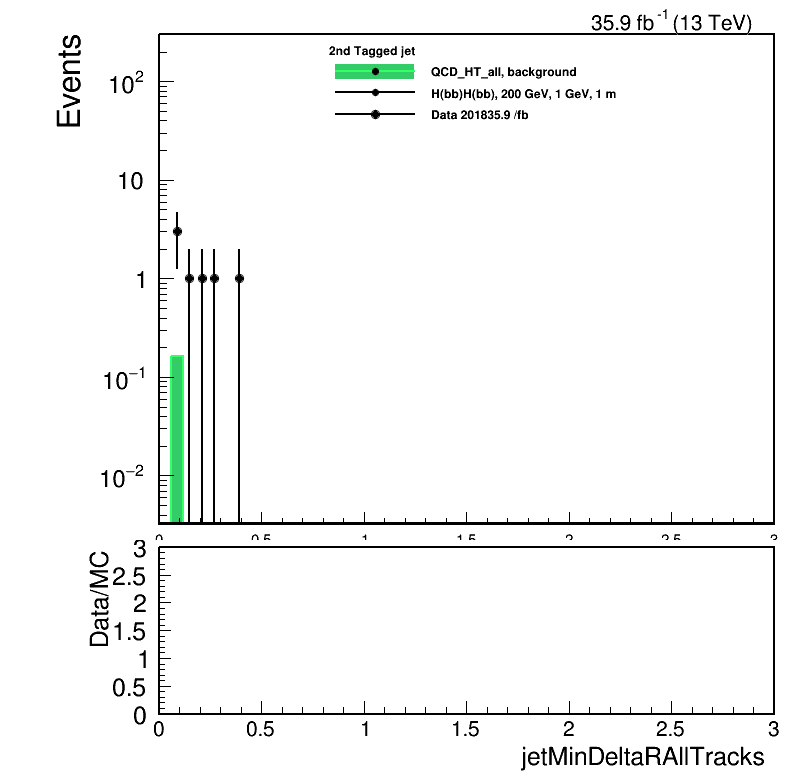

In [29]:
for cnt in range(2):
    print(cnt)
    part = cnt
    if cnt==0:
        cnt_str = '1st Tagged jet'
        name_str = 'first_tagged_jet'
    else:
        cnt_str = '2nd Tagged jet'
        name_str = 'second_tagged_jet'
    for var in variables:
        print('var/x_axis', var[0], 'binning', var[2], var[3], var[4])
        x_axis = var[0]
        y_axis = 'Events'
        axis_set = [x_axis, y_axis]
        bin_set = [var[2],var[3],var[4]]
        lumi = 35900 
#         outf = var[0]+'_'+name_str+'_stack_pt100.png'
        outf = var[0]+'_'+name_str+'_stack.png'

        # Plotting THStack
        c = rt.TCanvas('c','c', 800, 800)
        ht = {}
        # leg = rt.TLegend(0.59,0.70,0.97,0.93)
        leg = rt.TLegend(0.40,0.78,0.97,0.94)

        leg.SetTextSize(0.025)
        leg.SetBorderSize(0)
        leg.SetEntrySeparation(0.01)


        pad1 = rt.TPad("pad1", "pad1", 0, 0.3, 1, 0.99)
        pad1.SetBottomMargin(0.03)
        # pad1.SetGridx()
        pad1.SetLogy()
        pad1.SetLeftMargin(0.2)
        pad1.SetRightMargin(0.027)
        pad1.Draw()
        pad1.cd()

        stack = rt.THStack( "hs" , "H Stack " )
        total = rt.TH1D('total','total',3,0,3)
        color_list = [845,800,861,806,876,597,625]
        keys = ['QCD_HT_all, background']
#         keys = ['QCD_HT_all, background', 'WLNu_HT_all, background', 'ZNunu_HT_all, background', 'TT_Lep, background']
#             sig_keys = [  ]
        sig_keys = ['H(bb)H(bb), 200 GeV, 1 GeV, 1 m' ]
        data_keys = ['Data 2018']
        # sig_keys = ['H(bb)H(bb), N3N2, 200 GeV, 1 GeV, 1 m','H(bb)H(bb), N3N2, 400 GeV, 1 GeV, 1 m','H(bb)H(bb), N3N2, 127 GeV, 1 GeV, 1 m',  ]
        bkg_integral = 0.0
        max_value = 0
        i=0
        for k in keys:
            if 'background' in k or True:


                pt1 = var[1][k] 
                sel_str = np.logical_and(pt1.count()>part, 1)
                pt2 = pt1[sel_str]
                print(len(pt2))
                v = pt2[:,part]
                w = trg_jet_w[k][sel_str] 
                pu = trg_jet_puw[k][sel_str] 
                print(k,len(v),len(w))
                if 'QCD' in k:
                    sf=1.1
                else:
                    sf=1
                ht[k] = create_TH1D( v, axis_title=axis_set, name=k, binning=bin_set,weights = w*pu*lumi*sf)
                ht[k].Sumw2()
                total.Add(ht[k])
                stack.Add( ht[k])
                ht[k].SetLineColor(color_list[i]+3)
                ht[k].SetFillColor(color_list[i])
                leg.AddEntry(ht[k],k)
                max_value += ht[k].GetBinContent(ht[k].GetMaximumBin())
                bkg_integral += ht[k].Integral()

                i+=1
        stack.Draw('hist')
        # stack.SetMaximum(max_value*1.5)
        stack.SetMaximum(max_value*1e+03)
        stack.SetMinimum(10e-3)
        stack.GetYaxis().SetTitle(y_axis)
        stack.GetXaxis().SetTitle(x_axis)
        stack.GetXaxis().SetLabelSize(0.03)



        i=0
        for k in sig_keys:
            pt1 = var[1][k] 
            sel_str = np.logical_and(pt1.count()>part, 1)
            pt2 = pt1[sel_str]
            print(len(pt2))
            v = pt2[:,part]
            w = trg_jet_w[k][sel_str] 

            factor = bkg_integral/np.sum(w)
            print(k,'factor',1.0*np.sum(w[v>50])/np.sum(w))
            ht[k] = create_TH1D( v, axis_title=axis_set, name=k, binning=bin_set,weights = w*lumi)
            ht[k].Sumw2()
            ht[k].SetLineColor(std_color_list[i])
            print(k, std_color_list[i])
            ht[k].Draw("hist E same")
            leg.AddEntry(ht[k],k)
            max_value = max(ht[k].GetBinContent(ht[k].GetMaximumBin()),max_value)
            print('cnt',k,np.count_nonzero(w[v==2]),np.sum(w[v==2]))

            i+=1

        i=0
        for k in data_keys:
            pt1 = var[1][k] 
            sel_str = np.logical_and(pt1.count()>part, 1)
            pt2 = pt1[sel_str]
            print(len(pt2))
            v = pt2[:,part]
            w = trg_jet_w[k][sel_str] 

            ht[k] = create_TH1D( v, axis_title=axis_set, name=k, binning=bin_set,weights = w*1)
            ht[k].Sumw2()
            ht[k].SetLineColor(std_color_list[i])
            ht[k].SetMarkerColor(std_color_list[i])
            ht[k].SetMarkerStyle(20)
            ht[k].SetMarkerSize(1.)
            print(k, std_color_list[i])
            ht[k].Draw("p E same")
            leg.AddEntry(ht[k],k+str(lumi/1000)+' /fb')

            i+=1

        leg.SetHeader(cnt_str)
        leg.Draw()

        last = stack.GetStack().Last()
        total.SetFillStyle(3001)
        total.SetLineColor(1)
        total.SetFillColor(1)

        total.GetYaxis().SetTitleOffset(1.6)
        total.Draw("same e2")
        print("total",total.GetBinContent(1),total.GetBinError(1))

        c.cd()
        pad2 = rt.TPad("pad2", "pad2", 0, 0, 1, 0.3)
        pad2.SetTopMargin(0.03)
        pad2.SetBottomMargin(0.25)
        # pad2.SetGrid()
        pad2.SetLeftMargin(0.2)
        pad2.SetRightMargin(0.027)
        pad2.Draw()
        pad2.cd()

        h_copy = ht['Data 2018'].Clone()
        h_copy.Divide(stack.GetStack().Last())
        h_copy.GetYaxis().SetTitleOffset(0.4)
    #     h.GetYaxis().SetRangeUser(ratio_bounds[0], ratio_bounds[1])
        h_copy.GetYaxis().SetTitleSize(0.12)
        h_copy.GetYaxis().SetLabelSize(0.12)
        h_copy.GetYaxis().SetNdivisions(506)
        h_copy.SetMaximum(3)
        h_copy.SetMinimum(0)



        h_copy.GetXaxis().SetTitleOffset(1)
        h_copy.GetXaxis().SetTitleSize(0.12)
        h_copy.GetXaxis().SetLabelSize(0.10)
        h_copy.GetXaxis().SetTickSize(0.07)
        h_copy.SetYTitle('Data/MC')
        h_copy.SetTitle("")
    #        h.SetStats(0)
        h_copy.DrawCopy('E1')
        pad2.Update()




        CMS_lumi.lumi_13TeV = str(lumi/1000)+" fb^{-1}"
        CMS_lumi.cmsText = ""
        CMS_lumi.writeExtraText = False
        CMS_lumi.CMS_lumi(c,4,3)


        c.SetLeftMargin(0.2)
        c.SetRightMargin(0.027)
        c.SetLogy()
        c.Draw()
        c.SaveAs(plotDir+outf)


# UN-Tagged jets

In [28]:
variables = [
 
        ['jetChargedHadronEnergyFraction', untag_jet_chef, 50, 0, 1],
 
        ['jetTime', untag_jet_time, 50, -13, 13],
        ['jetMinDeltaRPVTracks', untag_jet_dr, 50, 0, 3],
        ['jetTMF', untag_jet_tmf, 50, 0, 1],
    
    
        ['jetPt', untag_jet_pt, 20, 0, 2000],
#         ['jetPt', untag_jet_pt, 10, 0, 100],
        ['jetEta', untag_jet_eta, 20, -3.15, 3.15],
        ['jetE', untag_jet_e, 50, 0, 1000],
        ['jetPhi', untag_jet_phi, 20, -3.15, 3.15],
    
    
        ['jetMuonEnergyFraction', untag_jet_muef, 50, 0, 1],
        ['jetElectronEnergyFraction', untag_jet_eleef, 50, 0, 1],
        ['jetPhotonEnergyFraction', untag_jet_phoef, 50, 0, 1],
    
        ['jetCSV', untag_jet_csv, 50, 0, 1],
        ['jetDNN', untag_jet_dnn, 50, 0, 1],
 
        ['jetChargedMultiplicity', untag_jet_chm, 50, 0, 50],
        ['jetNSelectedTracks', untag_jet_nseltrk, 50, 0, 50],
        ['jetEnergyRecHitsEcal', untag_jet_ecale, 50, 0, 500],
        ['jetNRecHitsEcal', untag_jet_nhits, 50, 0, 50],
    
        ['jetPtAllTracks', untag_jet_alltrkpt, 50, 0, 2000],
        ['jetPtAllPVTracks', untag_jet_pvtrkpt, 50, 0, 500],
        ['jetAlphaMax', untag_jet_amax, 50, 0, 5],
        ['jetBetaMax', untag_jet_bmax, 50, 0, 1],
        ['jetGammaMax', untag_jet_gmax, 50, 0, 1],
        ['jetGammaMax_EM', untag_jet_gmaxem, 50, 0, 1],
        ['jetGammaMax_Hadronic', untag_jet_gmaxh, 50, 0, 1],
        ['jetMinDeltaRAllTracks', untag_jet_drall, 50, 0, 3],        
    
]

In [29]:
# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20201022/2018/untagged_jets/'
plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20201102/2018/untagged_jets/'
 
print(plotDir)
os.system("mkdir -p "+ plotDir)

/storage/user/jmao/gpu/jmao/cms-llp/plots/20201102/2018/untagged_jets/


0

0
var/x_axis jetChargedHadronEnergyFraction binning 50 0 1
352908
QCD_HT_all, background 352908 352908
1815
H(bb)H(bb), 200 GeV, 1 GeV, 1 m factor 0.0
H(bb)H(bb), 200 GeV, 1 GeV, 1 m 1
cnt H(bb)H(bb), 200 GeV, 1 GeV, 1 m 0 0.0
4208315
Data 2018 1
total 434454.5194327632 2768.0486557441086
35.9 fb^{-1} (13 TeV)
var/x_axis jetTime binning 50 -13 13
352908
QCD_HT_all, background 352908 352908
1815
H(bb)H(bb), 200 GeV, 1 GeV, 1 m factor 0.0
H(bb)H(bb), 200 GeV, 1 GeV, 1 m 1
cnt H(bb)H(bb), 200 GeV, 1 GeV, 1 m 0 0.0
4208315
Data 2018 1
total 0.0 0.0
35.9 fb^{-1} (13 TeV)
var/x_axis jetMinDeltaRPVTracks binning 50 0 3
352908
QCD_HT_all, background 352908 352908
1815
H(bb)H(bb), 200 GeV, 1 GeV, 1 m factor 0.0
H(bb)H(bb), 200 GeV, 1 GeV, 1 m 1
cnt H(bb)H(bb), 200 GeV, 1 GeV, 1 m 0 0.0
4208315
Data 2018 1
total 0.0 0.0
35.9 fb^{-1} (13 TeV)
var/x_axis jetTMF binning 50 0 1
352908
QCD_HT_all, background 352908 352908
1815
H(bb)H(bb), 200 GeV, 1 GeV, 1 m factor 0.0
H(bb)H(bb), 200 GeV, 1 GeV, 1 m

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: total (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: QCD_HT_all, background (Potential memory leak).
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Info in <TH1D::Add>: Attempt to add histograms with different number of bins - trying to use TH1::Merge
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TROOT::Append>: Replacing existing TH1: Data 2018 (Potential memory leak).
Info in <TCanvas::Print>: png file /storage/user/jmao/gpu/jmao/cms-llp/plots/20201102/2018/untagged_jets/jetChargedHadronEnergyFraction_first_un_tagged_jet_stack.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: total (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: QCD_HT_all, ba

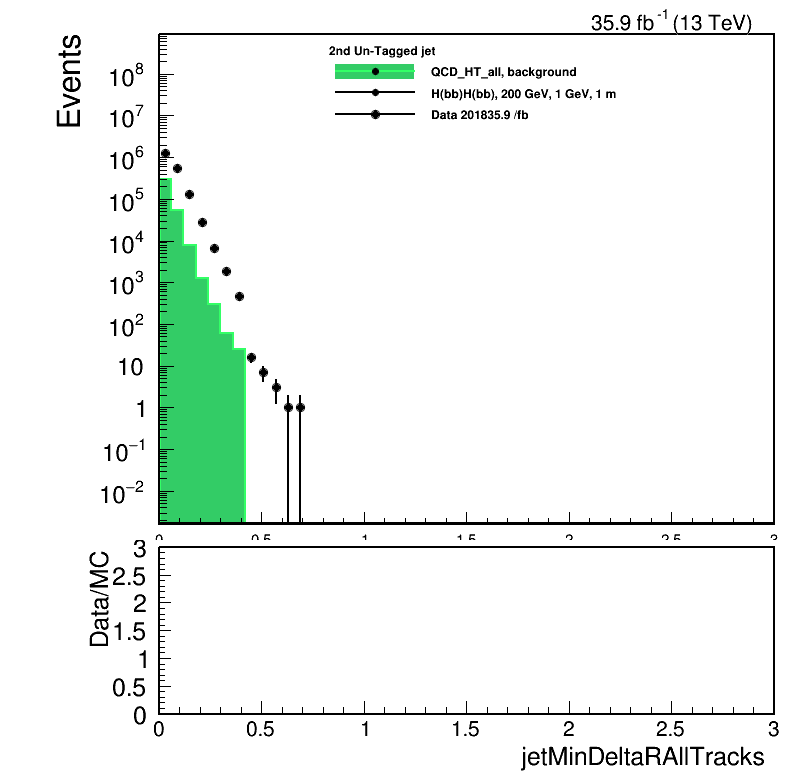

In [30]:
for cnt in range(2):
    print(cnt)
    part = cnt
    if cnt==0:
        cnt_str = '1st Un-Tagged jet'
        name_str = 'first_un_tagged_jet'
    else:
        cnt_str = '2nd Un-Tagged jet'
        name_str = 'second_un_tagged_jet'
    for var in variables:
        print('var/x_axis', var[0], 'binning', var[2], var[3], var[4])
        x_axis = var[0]
        y_axis = 'Events'
        axis_set = [x_axis, y_axis]
        bin_set = [var[2],var[3],var[4]]
        lumi = 35900 
#         outf = var[0]+'_'+name_str+'_stack_pt100.png'
        outf = var[0]+'_'+name_str+'_stack.png'

        # Plotting THStack
        c = rt.TCanvas('c','c', 800, 800)
        ht = {}
        # leg = rt.TLegend(0.59,0.70,0.97,0.93)
        leg = rt.TLegend(0.40,0.78,0.97,0.94)

        leg.SetTextSize(0.025)
        leg.SetBorderSize(0)
        leg.SetEntrySeparation(0.01)


        pad1 = rt.TPad("pad1", "pad1", 0, 0.3, 1, 0.99)
        pad1.SetBottomMargin(0.03)
        # pad1.SetGridx()
        pad1.SetLogy()
        pad1.SetLeftMargin(0.2)
        pad1.SetRightMargin(0.027)
        pad1.Draw()
        pad1.cd()

        stack = rt.THStack( "hs" , "H Stack " )
        total = rt.TH1D('total','total',3,0,3)
        color_list = [845,800,861,806,876,597,625]
        keys = ['QCD_HT_all, background']
#         keys = ['QCD_HT_all, background', 'WLNu_HT_all, background', 'ZNunu_HT_all, background', 'TT_Lep, background']
#             sig_keys = [  ]
        sig_keys = ['H(bb)H(bb), 200 GeV, 1 GeV, 1 m' ]
        data_keys = ['Data 2018']
        # sig_keys = ['H(bb)H(bb), N3N2, 200 GeV, 1 GeV, 1 m','H(bb)H(bb), N3N2, 400 GeV, 1 GeV, 1 m','H(bb)H(bb), N3N2, 127 GeV, 1 GeV, 1 m',  ]
        bkg_integral = 0.0
        max_value = 0
        i=0
        for k in keys:
            if 'background' in k or True:


                pt1 = var[1][k] 
                sel_str = np.logical_and(pt1.count()>part, 1)
                pt2 = pt1[sel_str]
                print(len(pt2))
                v = pt2[:,part]
                w = trg_jet_w[k][sel_str] 
                pu = trg_jet_puw[k][sel_str] 
                print(k,len(v),len(w))
                if 'QCD' in k:
                    sf=1.1
                else:
                    sf=1
                ht[k] = create_TH1D( v, axis_title=axis_set, name=k, binning=bin_set,weights = w*pu*lumi*sf)
                ht[k].Sumw2()
                total.Add(ht[k])
                stack.Add( ht[k])
                ht[k].SetLineColor(color_list[i]+3)
                ht[k].SetFillColor(color_list[i])
                leg.AddEntry(ht[k],k)
                max_value += ht[k].GetBinContent(ht[k].GetMaximumBin())
                bkg_integral += ht[k].Integral()

                i+=1
        stack.Draw('hist')
        # stack.SetMaximum(max_value*1.5)
        stack.SetMaximum(max_value*1e+03)
        stack.SetMinimum(10e-3)
        stack.GetYaxis().SetTitle(y_axis)
        stack.GetXaxis().SetTitle(x_axis)
        stack.GetXaxis().SetLabelSize(0.03)



        i=0
        for k in sig_keys:
            pt1 = var[1][k] 
            sel_str = np.logical_and(pt1.count()>part, 1)
            pt2 = pt1[sel_str]
            print(len(pt2))
            v = pt2[:,part]
            w = trg_jet_w[k][sel_str] 

            factor = bkg_integral/np.sum(w)
            print(k,'factor',1.0*np.sum(w[v>50])/np.sum(w))
            ht[k] = create_TH1D( v, axis_title=axis_set, name=k, binning=bin_set,weights = w*lumi)
            ht[k].Sumw2()
            ht[k].SetLineColor(std_color_list[i])
            print(k, std_color_list[i])
            ht[k].Draw("hist E same")
            leg.AddEntry(ht[k],k)
            max_value = max(ht[k].GetBinContent(ht[k].GetMaximumBin()),max_value)
            print('cnt',k,np.count_nonzero(w[v==2]),np.sum(w[v==2]))

            i+=1

        i=0
        for k in data_keys:
            pt1 = var[1][k] 
            sel_str = np.logical_and(pt1.count()>part, 1)
            pt2 = pt1[sel_str]
            print(len(pt2))
            v = pt2[:,part]
            w = trg_jet_w[k][sel_str] 

            ht[k] = create_TH1D( v, axis_title=axis_set, name=k, binning=bin_set,weights = w*1)
            ht[k].Sumw2()
            ht[k].SetLineColor(std_color_list[i])
            ht[k].SetMarkerColor(std_color_list[i])
            ht[k].SetMarkerStyle(20)
            ht[k].SetMarkerSize(1.)
            print(k, std_color_list[i])
            ht[k].Draw("p E same")
            leg.AddEntry(ht[k],k+str(lumi/1000)+' /fb')

            i+=1

        leg.SetHeader(cnt_str)
        leg.Draw()

        last = stack.GetStack().Last()
        total.SetFillStyle(3001)
        total.SetLineColor(1)
        total.SetFillColor(1)

        total.GetYaxis().SetTitleOffset(1.6)
        total.Draw("same e2")
        print("total",total.GetBinContent(1),total.GetBinError(1))

        c.cd()
        pad2 = rt.TPad("pad2", "pad2", 0, 0, 1, 0.3)
        pad2.SetTopMargin(0.03)
        pad2.SetBottomMargin(0.25)
        # pad2.SetGrid()
        pad2.SetLeftMargin(0.2)
        pad2.SetRightMargin(0.027)
        pad2.Draw()
        pad2.cd()

        h_copy = ht['Data 2018'].Clone()
        h_copy.Divide(stack.GetStack().Last())
        h_copy.GetYaxis().SetTitleOffset(0.4)
    #     h.GetYaxis().SetRangeUser(ratio_bounds[0], ratio_bounds[1])
        h_copy.GetYaxis().SetTitleSize(0.12)
        h_copy.GetYaxis().SetLabelSize(0.12)
        h_copy.GetYaxis().SetNdivisions(506)
        h_copy.SetMaximum(3)
        h_copy.SetMinimum(0)



        h_copy.GetXaxis().SetTitleOffset(1)
        h_copy.GetXaxis().SetTitleSize(0.12)
        h_copy.GetXaxis().SetLabelSize(0.10)
        h_copy.GetXaxis().SetTickSize(0.07)
        h_copy.SetYTitle('Data/MC')
        h_copy.SetTitle("")
    #        h.SetStats(0)
        h_copy.DrawCopy('E1')
        pad2.Update()




        CMS_lumi.lumi_13TeV = str(lumi/1000)+" fb^{-1}"
        CMS_lumi.cmsText = ""
        CMS_lumi.writeExtraText = False
        CMS_lumi.CMS_lumi(c,4,3)


        c.SetLeftMargin(0.2)
        c.SetRightMargin(0.027)
        c.SetLogy()
        c.Draw()
        c.SaveAs(plotDir+outf)


# Other plots

PLOTTING
QCD_HT_all, background 135417
WLNu_HT_all, background 2146411
ZNunu_HT_all, background 993218
TT_Lep, background 41928
Data 2016 1
total 20821.08850053372 268.14229844758887
20 fb^{-1} (13 TeV)


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: total (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: QCD_HT_all, background (Potential memory leak).
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Info in <TH1D::Add>: Attempt to add histograms with different number of bins - trying to use TH1::Merge
Warning in <TROOT::Append>: Replacing existing TH1: WLNu_HT_all, background (Potential memory leak).
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Info in <TH1D::Add>: Attempt to add histograms with different number of bins - trying to use TH1::Merge
Warning in <TROOT::Append>: Replacing existing TH1: ZNunu_HT_all, background (Potential memory leak).
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Info in <TH1D::Add>: Attempt to add histograms with different number of bins - trying to use TH1::Merge

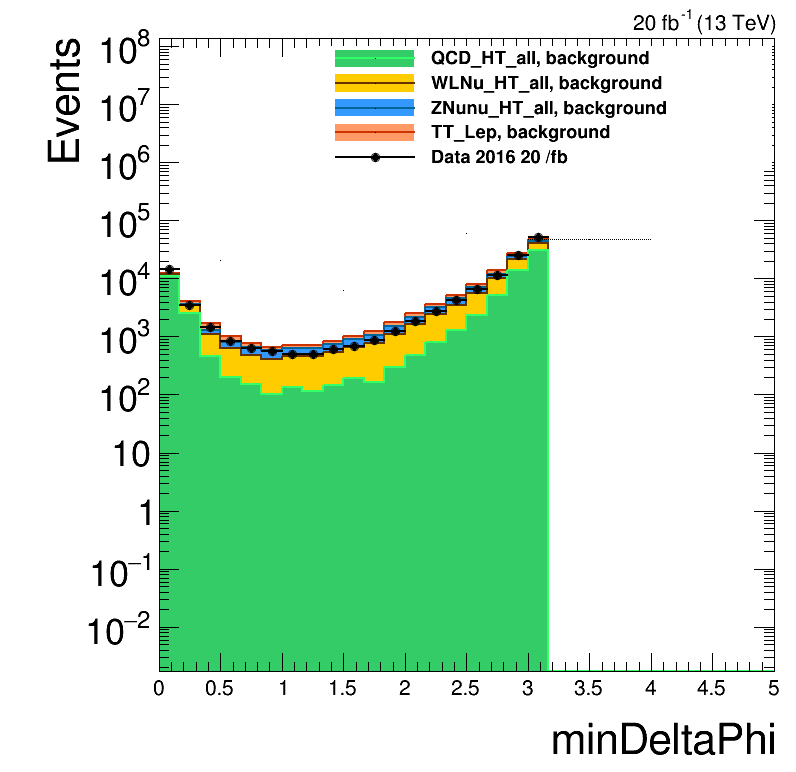

In [12]:
print('PLOTTING')

x_axis = 'minDeltaPhi'
# x_axis = 'MET [GeV]'
y_axis = 'Events'
axis_set = [x_axis, y_axis]
bin_set = [30,0,5]
# bin_set = [30,0,1000]
lumi = 20000 
# lumi = 137000 
part=0
outf = 'mdphi_ht800_stack.png'
# outf = 'met_stack.png'



# Plotting THStack
c = rt.TCanvas('c','c', 800, 800)
ht = {}
# leg = rt.TLegend(0.59,0.70,0.97,0.93)
leg = rt.TLegend(0.40,0.78,0.97,0.94)

leg.SetTextSize(0.025)
leg.SetBorderSize(0)
leg.SetEntrySeparation(0.01)
stack = rt.THStack( "hs" , "H Stack " )
total = rt.TH1D('total','total',3,0,3)
color_list = [845,800,861,806,876,597,625]
keys = ['QCD_HT_all, background', 'WLNu_HT_all, background', 'ZNunu_HT_all, background', 'TT_Lep, background']
sig_keys = []
# sig_keys = ['H(bb)H(bb), N3N2, 200 GeV, 1 GeV, 1 m' ]
data_keys = ['Data 2016']
# sig_keys = ['H(bb)H(bb), N3N2, 200 GeV, 1 GeV, 1 m','H(bb)H(bb), N3N2, 400 GeV, 1 GeV, 1 m','H(bb)H(bb), N3N2, 127 GeV, 1 GeV, 1 m',  ]
bkg_integral = 0.0
max_value = 0
i=0
for k in keys:
    if 'background' in k or True:
        
        
        pt1 = trg_jet_mdphi[k][trg_jet_ht[k]>800] 
        v = pt1 
        w = trg_jet_w[k][trg_jet_ht[k]>800]  
        print(k,len(v))
        ht[k] = create_TH1D( v, axis_title=axis_set, name=k, binning=bin_set,weights = w*lumi)
        ht[k].Sumw2()
        total.Add(ht[k])
        stack.Add( ht[k])
        ht[k].SetLineColor(color_list[i]+3)
        ht[k].SetFillColor(color_list[i])
        leg.AddEntry(ht[k],k)
        max_value += ht[k].GetBinContent(ht[k].GetMaximumBin())
        bkg_integral += ht[k].Integral()
 
        i+=1
stack.Draw('hist')
# stack.SetMaximum(max_value*1.5)
stack.SetMaximum(max_value*1e+03)
stack.SetMinimum(10e-3)
stack.GetYaxis().SetTitle(y_axis)
stack.GetXaxis().SetTitle(x_axis)
stack.GetXaxis().SetLabelSize(0.03)



i=0
for k in sig_keys:
    pt1 = trg_jet_mdphi[k][trg_jet_ht[k]>800]  
    v = pt1 
    w = trg_jet_w[k][trg_jet_ht[k]>800]  
        
    factor = bkg_integral/np.sum(w)
    print(k,'factor',1.0*np.sum(w[v>50])/np.sum(w))
    ht[k] = create_TH1D( v, axis_title=axis_set, name=k, binning=bin_set,weights = w*lumi)
    ht[k].Sumw2()
    ht[k].SetLineColor(std_color_list[i])
    print(k, std_color_list[i])
    ht[k].Draw("hist E same")
    leg.AddEntry(ht[k],k)
    max_value = max(ht[k].GetBinContent(ht[k].GetMaximumBin()),max_value)
    print('cnt',k,np.count_nonzero(w[v==2]),np.sum(w[v==2]))

    i+=1
    
i=0
for k in data_keys:
    pt1 = trg_jet_mdphi[k][trg_jet_ht[k]>800]  
    v = pt1 
    w = trg_jet_w[k][trg_jet_ht[k]>800]  
        
    ht[k] = create_TH1D( v, axis_title=axis_set, name=k, binning=bin_set,weights = w*1)
    ht[k].Sumw2()
    ht[k].SetLineColor(std_color_list[i])
    ht[k].SetMarkerColor(std_color_list[i])
    ht[k].SetMarkerStyle(20)
    ht[k].SetMarkerSize(1.)
    print(k, std_color_list[i])
    ht[k].Draw("p E same")
    leg.AddEntry(ht[k],k+' 20 /fb')

    i+=1
    
leg.Draw()

last = stack.GetStack().Last()
total.SetFillStyle(3001)
total.SetLineColor(1)
total.SetFillColor(1)

total.GetYaxis().SetTitleOffset(1.6)
total.Draw("same e2")
print("total",total.GetBinContent(1),total.GetBinError(1))





CMS_lumi.lumi_13TeV = "20 fb^{-1}"
CMS_lumi.cmsText = ""
CMS_lumi.writeExtraText = False
CMS_lumi.CMS_lumi(c,4,3)


c.SetLeftMargin(0.2)
c.SetRightMargin(0.027)
c.SetLogy()
c.Draw()
c.SaveAs(plotDir+outf)


PLOTTING
QCD_HT_all, background 23172
WLNu_HT_all, background 1403364
ZNunu_HT_all, background 5467455
TT_Lep, background 90989
Data 2016 1
total 0.0 0.0
20 fb^{-1} (13 TeV)


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: total (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: QCD_HT_all, background (Potential memory leak).
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Info in <TH1D::Add>: Attempt to add histograms with different number of bins - trying to use TH1::Merge
Error in <Merge>: Cannot merge histograms - limits are inconsistent:
 first: total (3, 0.000000, 3.000000), second: QCD_HT_all, background (30, 0.000000, 1000.000000)
Warning in <TROOT::Append>: Replacing existing TH1: WLNu_HT_all, background (Potential memory leak).
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Info in <TH1D::Add>: Attempt to add histograms with different number of bins - trying to use TH1::Merge
Error in <Merge>: Cannot merge histograms - limits are inconsistent:
 first: total (3, 0.000000, 3.000000), second: 

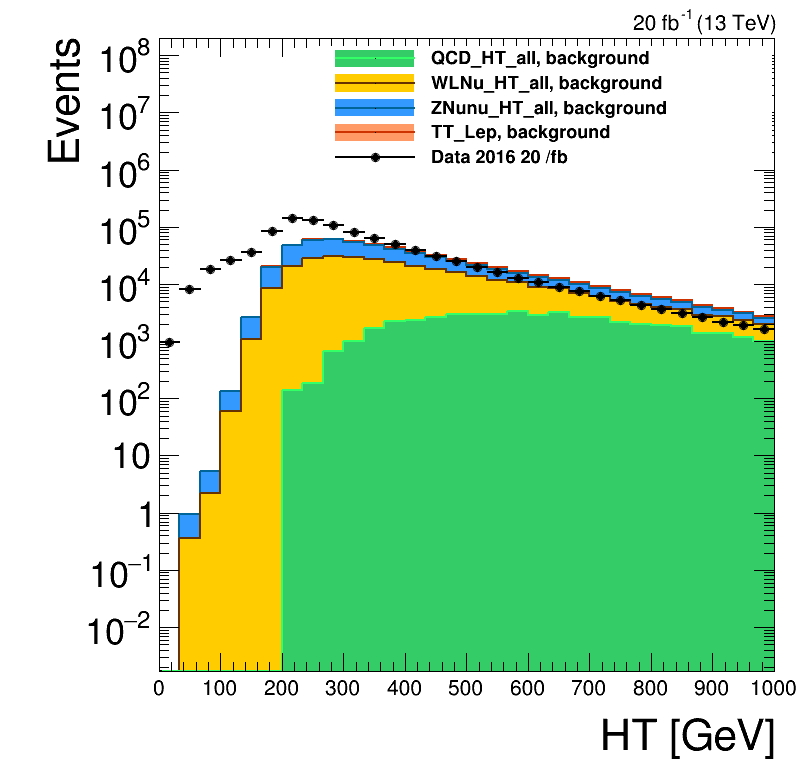

In [19]:
print('PLOTTING')

x_axis = 'HT [GeV]'
# x_axis = 'minDeltaPhi'
# x_axis = 'MET [GeV]'
y_axis = 'Events'
axis_set = [x_axis, y_axis]
# bin_set = [30,0,5]
bin_set = [30,0,1000]
lumi = 20000 
# lumi = 137000 
part=0
outf = 'HT_mdphi0p5_stack.png'
# outf = 'mdphi_ht800_stack.png'
# outf = 'met_stack.png'



# Plotting THStack
c = rt.TCanvas('c','c', 800, 800)
ht = {}
# leg = rt.TLegend(0.59,0.70,0.97,0.93)
leg = rt.TLegend(0.40,0.78,0.97,0.94)

leg.SetTextSize(0.025)
leg.SetBorderSize(0)
leg.SetEntrySeparation(0.01)
stack = rt.THStack( "hs" , "H Stack " )
total = rt.TH1D('total','total',3,0,3)
color_list = [845,800,861,806,876,597,625]
keys = ['QCD_HT_all, background', 'WLNu_HT_all, background', 'ZNunu_HT_all, background', 'TT_Lep, background']
sig_keys = []
# sig_keys = ['H(bb)H(bb), N3N2, 200 GeV, 1 GeV, 1 m' ]
data_keys = ['Data 2016']
# sig_keys = ['H(bb)H(bb), N3N2, 200 GeV, 1 GeV, 1 m','H(bb)H(bb), N3N2, 400 GeV, 1 GeV, 1 m','H(bb)H(bb), N3N2, 127 GeV, 1 GeV, 1 m',  ]
bkg_integral = 0.0
max_value = 0
i=0
for k in keys:
    if 'background' in k or True:
        
        
        pt1 = trg_jet_ht[k][trg_jet_mdphi[k]>0.5] 
        v = pt1 
        w = trg_jet_w[k][trg_jet_mdphi[k]>0.5]  
        print(k,len(v))
        ht[k] = create_TH1D( v, axis_title=axis_set, name=k, binning=bin_set,weights = w*lumi)
        ht[k].Sumw2()
        total.Add(ht[k])
        stack.Add( ht[k])
        ht[k].SetLineColor(color_list[i]+3)
        ht[k].SetFillColor(color_list[i])
        leg.AddEntry(ht[k],k)
        max_value += ht[k].GetBinContent(ht[k].GetMaximumBin())
        bkg_integral += ht[k].Integral()
 
        i+=1
stack.Draw('hist')
# stack.SetMaximum(max_value*1.5)
stack.SetMaximum(max_value*1e+03)
stack.SetMinimum(10e-3)
stack.GetYaxis().SetTitle(y_axis)
stack.GetXaxis().SetTitle(x_axis)
stack.GetXaxis().SetLabelSize(0.03)



i=0
for k in sig_keys:
    pt1 = trg_jet_ht[k][trg_jet_mdphi[k]>0.5] 
    v = pt1 
    w = trg_jet_w[k][trg_jet_mdphi[k]>0.5]  
        
    factor = bkg_integral/np.sum(w)
    print(k,'factor',1.0*np.sum(w[v>50])/np.sum(w))
    ht[k] = create_TH1D( v, axis_title=axis_set, name=k, binning=bin_set,weights = w*lumi)
    ht[k].Sumw2()
    ht[k].SetLineColor(std_color_list[i])
    print(k, std_color_list[i])
    ht[k].Draw("hist E same")
    leg.AddEntry(ht[k],k)
    max_value = max(ht[k].GetBinContent(ht[k].GetMaximumBin()),max_value)
    print('cnt',k,np.count_nonzero(w[v==2]),np.sum(w[v==2]))

    i+=1
    
i=0
for k in data_keys:
    pt1 = trg_jet_ht[k][trg_jet_mdphi[k]>0.5] 
    v = pt1 
    w = trg_jet_w[k][trg_jet_mdphi[k]>0.5]  
        
    ht[k] = create_TH1D( v, axis_title=axis_set, name=k, binning=bin_set,weights = w*1)
    ht[k].Sumw2()
    ht[k].SetLineColor(std_color_list[i])
    ht[k].SetMarkerColor(std_color_list[i])
    ht[k].SetMarkerStyle(20)
    ht[k].SetMarkerSize(1.)
    print(k, std_color_list[i])
    ht[k].Draw("p E same")
    leg.AddEntry(ht[k],k+' 20 /fb')

    i+=1
    
leg.Draw()

last = stack.GetStack().Last()
total.SetFillStyle(3001)
total.SetLineColor(1)
total.SetFillColor(1)

total.GetYaxis().SetTitleOffset(1.6)
total.Draw("same e2")
print("total",total.GetBinContent(1),total.GetBinError(1))





CMS_lumi.lumi_13TeV = "20 fb^{-1}"
CMS_lumi.cmsText = ""
CMS_lumi.writeExtraText = False
CMS_lumi.CMS_lumi(c,4,3)


c.SetLeftMargin(0.2)
c.SetRightMargin(0.027)
c.SetLogy()
c.Draw()
c.SaveAs(plotDir+outf)


H(bb)H(bb), N3N2, 200 GeV, 1 GeV, 1 m <TTree b'BDT_Tree' at 0x7f4b6eb8f278>
[610.80817 288.70084 282.1015  218.51424 235.34044 215.80617 773.87085
 325.91827 208.47023 407.9336 ]
QCD_HT_all, background <TTree b'BDT_Tree' at 0x7f4b6eb42cf8>
[253.68602 204.3412  233.23325 209.45142 314.20142 264.73697 272.68582
 204.18715 228.651   373.62445]
WLNu_HT_all, background <TTree b'BDT_Tree' at 0x7f4b6eaef1d0>
[219.44499 212.2948  209.07002 228.07384 204.8972  214.50142 201.22607
 210.68031 218.995   226.65067]
ZNunu_HT_all, background <TTree b'BDT_Tree' at 0x7f4b6eab4630>
[ 209.13554  275.6959   208.11604  408.37134  390.23483 1073.8206
  343.2648   229.78865  245.47514  375.18002]
TT_Lep, background <TTree b'BDT_Tree' at 0x7f4b6eac6390>
[262.6048  210.4145  217.54112 264.47186 243.04875 277.2153  296.05707
 355.52374 223.05655 286.61093]
Data 2016 <TTree b'BDT_Tree' at 0x7f4b5f52e0f0>
[250.41324 219.85379 408.27444 201.22621 265.27634 205.67383 215.23103
 212.79405 215.80478 225.45335]


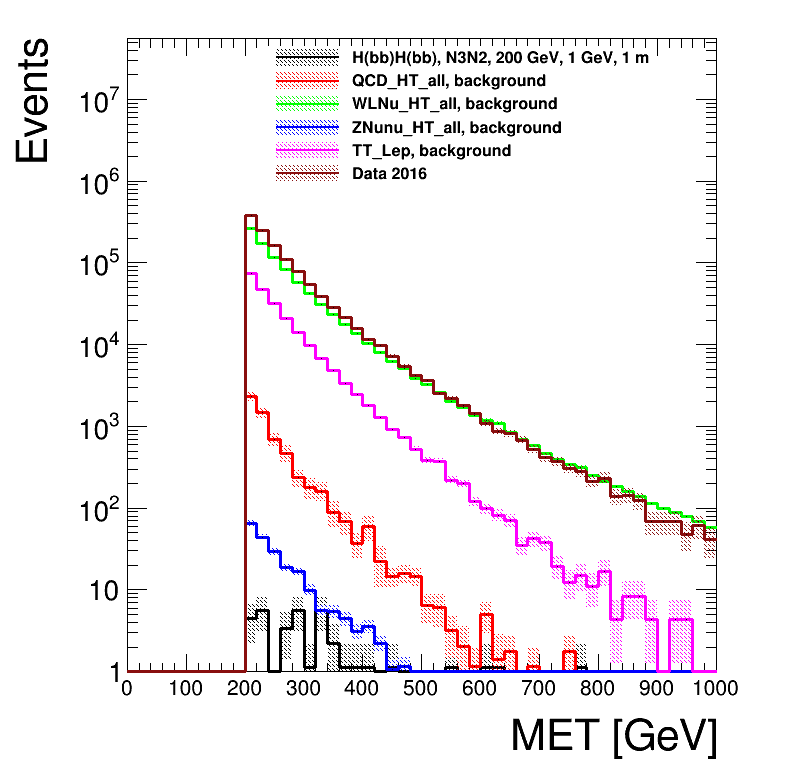

In [8]:
## PLOT

c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.33,0.76,0.78,0.94)
leg.SetTextSize(0.022)
leg.SetBorderSize(0)
leg.SetEntrySeparation(0.01)


i = 0
ht = {}
he = {}


for k,v in tree.items(): 
    print(k,v)

     
    value = trg_jet_met[k]
    print(value[:10])
    
    if 'Data' not in k:
        ws = [x*137000 for x in trg_jet_w[k]]
    else:
        ws = [x*137000/19988 for x in trg_jet_w[k]]

    ht[k] = create_TH1D( value, axis_title=['MET [GeV]', 'Events'], name="", binning=[50,-0,1000], weights=ws)
    

    if i==4:
        i+=1
    if i==6:
        i=204
        
    ht[k].SetLineWidth(3)
    ht[k].SetLineColor(i+1)
    ht[k].SetMarkerColor(i+1)
    ht[k].GetXaxis().SetLabelSize(0.03)
    ht[k].GetYaxis().SetLabelSize(0.04)
    ht[k].SetMaximum(1e+7*(ht[k].GetMaximum()))
    ht[k].SetMinimum(1)
    ht[k].Draw('histsame')
    
    he[k] = create_TH1D( value, axis_title=['MET [GeV]', 'Events'], name="", binning=[50,-0,1000], weights=ws)
    he[k].SetFillColor(i+1)
    he[k].SetLineColor(i+1)
    he[k].SetFillStyle(3018);
    he[k].Draw('e2same')
 

    leg.AddEntry(he[k], k, 'fl')

    i += 1


leg.Draw()

c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
# c.SaveAs(plotDir+'met_1lep.png')

# ht[k] = create_TH1D( value, axis_title=['MET [GeV]', 'Entries'], name="", binning=[50,-0,1000], weights=trg_jet_w[k])
# ht[k].DrawNormalized('Histsame')
